# MARCEL JONES RAYMOND

# ENSEMBLE TECHNIQUES

##  DOMAIN: Telecom

## CONTEXT: 
 A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.

## DATA DESCRIPTION: 
    
 Each row represents a customer, each column contains customer’s attributes described on the column
Metadata. The data set includes information about:
• Customers who left within the last month – the column is called Churn
• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device
protection, tech support, and streaming TV and movies
• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly
charges, and total charges
• Demographic info about customers – gender, age range, and if they have partners and dependents

## PROJECT OBJECTIVE: 
Build a model that will help to identify the potential customers who have a higher probability to churn.
This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising
customer retention

## Import LIB

In [277]:
# Mathematical Models
import numpy as np
import pandas as pd

# visualization Models
import matplotlib.pyplot as plt
import seaborn as sns

# statistical models
import  statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind,f_oneway,chi2_contingency

# model preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

# model selection
from sklearn.model_selection import train_test_split,KFold,cross_val_score,StratifiedKFold,cross_validate,GridSearchCV

# handle imbalance
from imblearn.over_sampling import SMOTE,SMOTENC 

# Regression Models 
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Classification Models 
from sklearn.naive_bayes import GaussianNB,CategoricalNB,BernoulliNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import sklearn

# ensemble model 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from xgboost import XGBClassifier,XGBRegressor
from catboost import CatBoostRegressor,CatBoostClassifier 
from lightgbm import LGBMRegressor,LGBMClassifier

# metrics
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.metrics import mean_squared_log_error,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score,auc,f1_score,recall_score
from sklearn.metrics import plot_precision_recall_curve,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve
from sklearn import metrics

# Support models for decision Tree
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
import graphviz
from IPython.display import Image
import time

# ignore warnings
import warnings 
warnings.filterwarnings('ignore')

# set figure dimension
sns.set(rc={'figure.figsize':(15,9)})
sns.set_style("whitegrid")

## Import and warehouse data:

In [ ]:
Import all the given datasets. Explore shape and size.
Merge all datasets onto one and explore final shape and size.

In [2]:
data1=pd.read_csv('TelcomCustomer-Churn_1.csv')
data1.sample(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
1709  3280-MRDOF    Male              1      No         No      30   
354   0623-IIHUG  Female              1      No         No      21   
367   7302-ZHMHP  Female              0      No         No       1   
4750  0373-AIVNJ    Male              0      No         No       9   
4222  6480-YAGIY    Male              0      No         No      45   

     PhoneService     MultipleLines InternetService       OnlineSecurity  
1709          Yes               Yes             DSL                   No  
354            No  No phone service             DSL                  Yes  
367           Yes                No              No  No internet service  
4750           No  No phone service             DSL                  Yes  
4222          Yes                No     Fiber optic                  Yes

In [3]:
display(data1.shape)

(7043, 10)

In [4]:
data2=pd.read_csv('TelcomCustomer-Churn_2.csv')
data2.sample(5)

OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
1459          Yes              Yes          No         Yes             Yes   
6271           No              Yes          No          No              No   
3744          Yes               No          No          No              No   
145           Yes               No         Yes         Yes              No   
2257           No              Yes         Yes         Yes             Yes   

      Contract PaperlessBilling              PaymentMethod  MonthlyCharges  \
1459  Two year              Yes           Electronic check           99.65   
6271  One year              Yes           Electronic check           85.90   
3744  One year               No  Bank transfer (automatic)           75.50   
145   Two year              Yes    Credit card (automatic)           99.05   
2257  One year               No    Credit card (automatic)           80.55   

     TotalCharges Churn  
1459      5941.05    No  
6271       2220.1    No  
3744       2018.1    No  
145        6416.7    No  
2257      4847.05    No

In [5]:
display(data2.shape)

(7043, 11)

In [6]:
data=pd.concat([data1,data2],axis=1 )
data.sample(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
6555  8969-PRHFK    Male              0      No         No      18   
3561  5998-VVEJY    Male              0      No         No      26   
4654  4530-NDRKU  Female              0     Yes        Yes      42   
5380  9689-PTNPG    Male              0      No         No       2   
3755  8443-ZRDBZ    Male              0      No         No       4   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
6555          Yes            No              No  No internet service  ...   
3561          Yes           Yes     Fiber optic                   No  ...   
4654          Yes            No              No  No internet service  ...   
5380          Yes            No     Fiber optic                   No  ...   
3755          Yes           Yes     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
6555  No internet service  No internet service  No internet service   
3561                   No                  Yes                   No   
4654  No internet service  No internet service  No internet service   
5380                   No                   No                  Yes   
3755                   No                   No                   No   

          StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
6555  No internet service        One year               No      Mailed check   
3561                   No  Month-to-month              Yes  Electronic check   
4654  No internet service        One year              Yes  Electronic check   
5380                   No  Month-to-month              Yes  Electronic check   
3755                   No  Month-to-month              Yes  Electronic check   

     MonthlyCharges  TotalCharges Churn  
6555          19.65        411.25    No  
3561          80.50        2088.8   Yes  
4654          19.05        761.85    No  
5380          80.25        144.55   Yes  
3755          76.05         318.9   Yes  

[5 rows x 21 columns]

In [7]:
print("Shape of the data : ",data.shape)

Shape of the data :  (7043, 21)


In [8]:
print("Size of the data: ",data.size)

Size of the data:  147903


In [9]:
print("Total number of columns : ",data.columns.nunique())

Total number of columns :  21


## Data cleansing:

In [10]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [11]:
data.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [12]:
data.sample(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
1006  9524-EGPJC  Female              0      No         No      18   
6963  9547-ITEFG    Male              0     Yes        Yes       9   
3728  6352-GIGGQ    Male              0      No         No      67   
5350  1172-VIYBP    Male              0     Yes        Yes      53   
2499  6061-GWWAV    Male              0      No        Yes      41   
5617  0816-TSPHQ    Male              0      No         No       2   
4180  5482-PLVPE  Female              1      No         No       2   
4563  4547-KQRTM  Female              0      No         No      10   
2978  2960-NKRSO    Male              0      No         No      24   
1725  5935-FCCNB  Female              1      No         No      17   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
1006          Yes               Yes     Fiber optic                   No  ...   
6963          Yes               Yes     Fiber optic                   No  ...   
3728          Yes               Yes             DSL                  Yes  ...   
5350          Yes               Yes             DSL                  Yes  ...   
2499          Yes                No             DSL                  Yes  ...   
5617          Yes                No              No  No internet service  ...   
4180           No  No phone service             DSL                   No  ...   
4563          Yes               Yes     Fiber optic                   No  ...   
2978          Yes                No     Fiber optic                   No  ...   
1725          Yes               Yes     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
1006                   No                  Yes                   No   
6963                  Yes                   No                  Yes   
3728                  Yes                  Yes                  Yes   
5350                   No                   No                   No   
2499                  Yes                   No                  Yes   
5617  No internet service  No internet service  No internet service   
4180                   No                   No                   No   
4563                   No                   No                   No   
2978                  Yes                  Yes                   No   
1725                   No                   No                  Yes   

          StreamingMovies        Contract PaperlessBilling  \
1006                  Yes  Month-to-month              Yes   
6963                  Yes  Month-to-month              Yes   
3728                  Yes        One year              Yes   
5350                  Yes        Two year               No   
2499                   No        One year               No   
5617  No internet service  Month-to-month               No   
4180                   No  Month-to-month               No   
4563                   No  Month-to-month              Yes   
2978                   No  Month-to-month              Yes   
1725                  Yes  Month-to-month              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
1006           Electronic check          90.10       1612.75   Yes  
6963    Credit card (automatic)         102.60        897.75    No  
3728  Bank transfer (automatic)          88.80       5903.15    No  
5350  Bank transfer (automatic)          69.70       3686.05    No  
2499               Mailed check          70.20       2894.55    No  
5617               Mailed check          20.75          44.2    No  
4180           Electronic check          24.35         41.85   Yes  
4563  Bank transfer (automatic)          80.05         830.7   Yes  
2978           Electronic check          85.95       2107.15    No  
1725           Electronic check          94.20       1608.15    No  

[10 rows x 21 columns]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Total charges are in objects therefore it seems that  there must be an un-natural data in the dataset

In [14]:
data.describe(include='all').T

count unique               top  freq       mean        std  \
customerID          7043   7043        6551-VLJMV     1        NaN        NaN   
gender              7043      2              Male  3555        NaN        NaN   
SeniorCitizen     7043.0    NaN               NaN   NaN   0.162147   0.368612   
Partner             7043      2                No  3641        NaN        NaN   
Dependents          7043      2                No  4933        NaN        NaN   
tenure            7043.0    NaN               NaN   NaN  32.371149  24.559481   
PhoneService        7043      2               Yes  6361        NaN        NaN   
MultipleLines       7043      3                No  3390        NaN        NaN   
InternetService     7043      3       Fiber optic  3096        NaN        NaN   
OnlineSecurity      7043      3                No  3498        NaN        NaN   
OnlineBackup        7043      3                No  3088        NaN        NaN   
DeviceProtection    7043      3                No  3095        NaN        NaN   
TechSupport         7043      3                No  3473        NaN        NaN   
StreamingTV         7043      3                No  2810        NaN        NaN   
StreamingMovies     7043      3                No  2785        NaN        NaN   
Contract            7043      3    Month-to-month  3875        NaN        NaN   
PaperlessBilling    7043      2               Yes  4171        NaN        NaN   
PaymentMethod       7043      4  Electronic check  2365        NaN        NaN   
MonthlyCharges    7043.0    NaN               NaN   NaN  64.761692  30.090047   
TotalCharges        7043   6531              20.2    11        NaN        NaN   
Churn               7043      2                No  5174        NaN        NaN   

                    min   25%    50%    75%     max  
customerID          NaN   NaN    NaN    NaN     NaN  
gender              NaN   NaN    NaN    NaN     NaN  
SeniorCitizen       0.0   0.0    0.0    0.0     1.0  
Partner             NaN   NaN    NaN    NaN     NaN  
Dependents          NaN   NaN    NaN    NaN     NaN  
tenure              0.0   9.0   29.0   55.0    72.0  
PhoneService        NaN   NaN    NaN    NaN     NaN  
MultipleLines       NaN   NaN    NaN    NaN     NaN  
InternetService     NaN   NaN    NaN    NaN     NaN  
OnlineSecurity      NaN   NaN    NaN    NaN     NaN  
OnlineBackup        NaN   NaN    NaN    NaN     NaN  
DeviceProtection    NaN   NaN    NaN    NaN     NaN  
TechSupport         NaN   NaN    NaN    NaN     NaN  
StreamingTV         NaN   NaN    NaN    NaN     NaN  
StreamingMovies     NaN   NaN    NaN    NaN     NaN  
Contract            NaN   NaN    NaN    NaN     NaN  
PaperlessBilling    NaN   NaN    NaN    NaN     NaN  
PaymentMethod       NaN   NaN    NaN    NaN     NaN  
MonthlyCharges    18.25  35.5  70.35  89.85  118.75  
TotalCharges        NaN   NaN    NaN    NaN     NaN  
Churn               NaN   NaN    NaN    NaN     NaN

#### checking for some common unusual data 

In [15]:
for i in data.columns:
    print(i,": ",sum((data[i]=="?") | (data[i]==";") | (data[i]=="-") | (data[i]==":") | (data[i]=="/")))

customerID :  0
gender :  0
SeniorCitizen :  0
Partner :  0
Dependents :  0
tenure :  0
PhoneService :  0
MultipleLines :  0
InternetService :  0
OnlineSecurity :  0
OnlineBackup :  0
DeviceProtection :  0
TechSupport :  0
StreamingTV :  0
StreamingMovies :  0
Contract :  0
PaperlessBilling :  0
PaymentMethod :  0
MonthlyCharges :  0
TotalCharges :  0
Churn :  0


In [16]:
obj=data.select_dtypes(include="object").columns

#### Evaluating the unique values

In [17]:
for i in obj:
    print("Unique values of: ",i)
    print(data[i].unique())
    print("*"*50)

Unique values of:  customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
**************************************************
Unique values of:  gender
['Female' 'Male']
**************************************************
Unique values of:  Partner
['Yes' 'No']
**************************************************
Unique values of:  Dependents
['No' 'Yes']
**************************************************
Unique values of:  PhoneService
['No' 'Yes']
**************************************************
Unique values of:  MultipleLines
['No phone service' 'No' 'Yes']
**************************************************
Unique values of:  InternetService
['DSL' 'Fiber optic' 'No']
**************************************************
Unique values of:  OnlineSecurity
['No' 'Yes' 'No internet service']
**************************************************
Unique values of:  OnlineBackup
['Yes' 'No' 'No internet service']
******************************************

#### converting the non numeric values to missing values 

In [18]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors="coerce")

In [19]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [20]:
data['TotalCharges'].dtypes

dtype('float64')

In [21]:
obj=data.select_dtypes(include="object").columns
obj

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [22]:
data[obj]=data[obj].astype('category')

In [23]:
data.drop("customerID",axis=1,inplace=True)

In [24]:
data['SeniorCitizen']=data['SeniorCitizen'].astype("category")

## Data analysis & visualisation:

<AxesSubplot:>

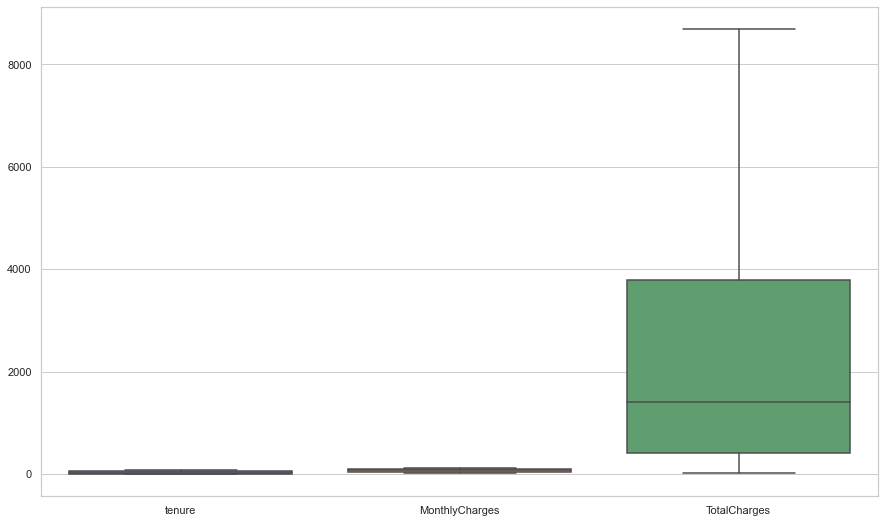

In [25]:
sns.boxplot(data=data.iloc[:,:-1])

#### Checking for distribution 

In [26]:
num_cols=data.select_dtypes(include=["int64",'float64'])

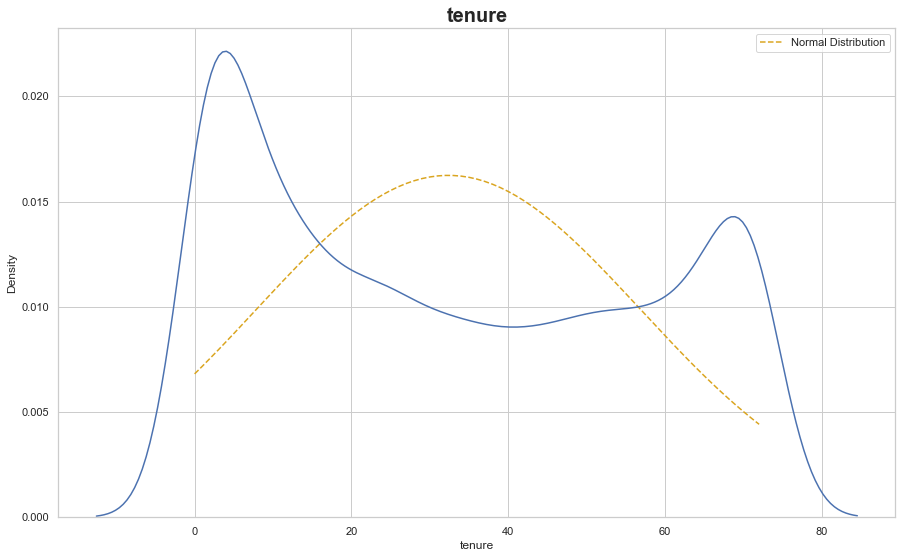

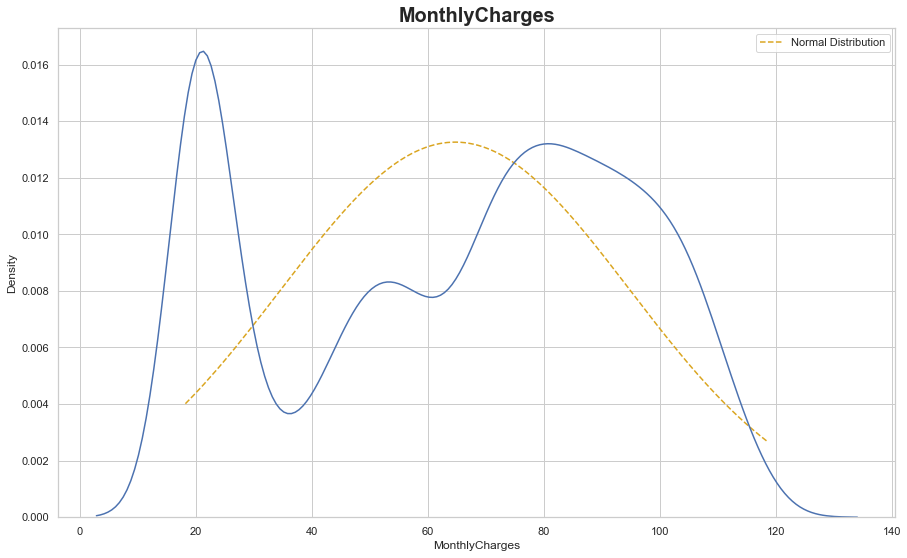

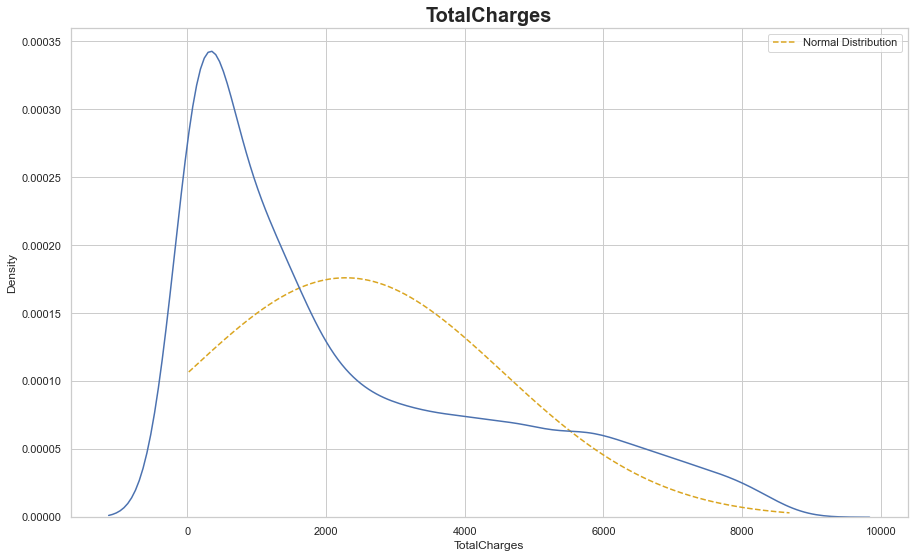

In [27]:
for i in  num_cols:
    fit=np.array(data[i])
    fit=sorted(fit)
    val=stats.norm.pdf(fit,np.mean(fit),np.std(fit))
    plt.plot(fit,val,linestyle="--",color='goldenrod',label="Normal Distribution")
    sns.kdeplot(data[i]).set_title(i,fontsize=20,fontweight='bold')
    plt.legend()
    plt.show()

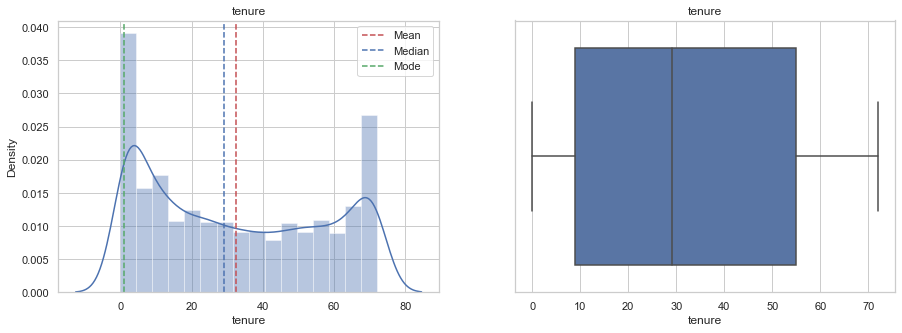

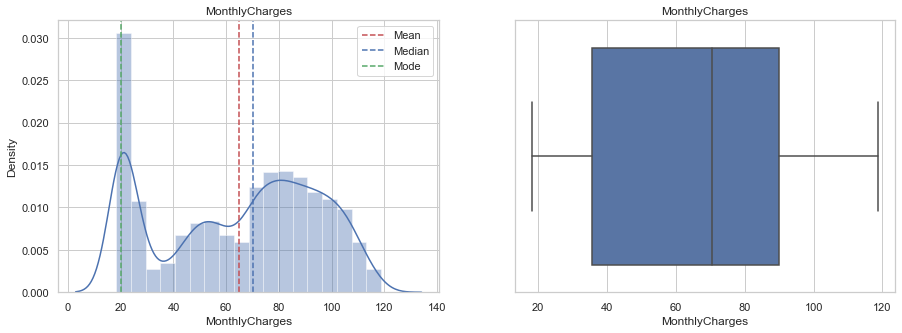

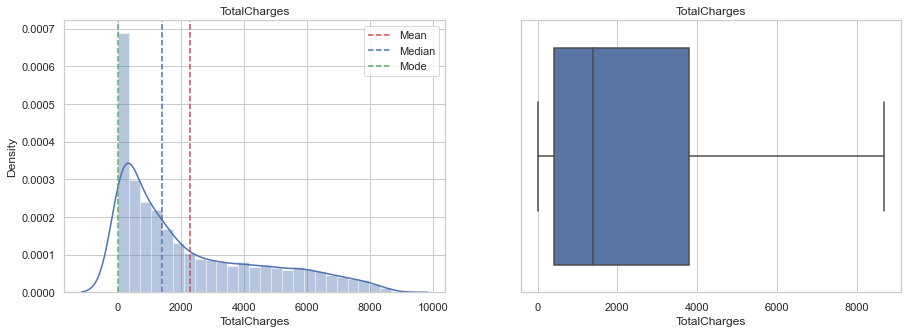

In [28]:
for i,j in enumerate(num_cols.columns):
    fig,ax=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(data[j],ax=ax[0]).set_title(j)
    ax[0].axvline(data[j].mean(),linestyle="--",color="r",label="Mean")
    ax[0].axvline(data[j].median(),linestyle="--",color="b",label="Median")
    ax[0].axvline(data[j].mode()[0],linestyle="--",color="g",label="Mode")
    sns.boxplot(data[j],ax=ax[1]).set_title(j)
    ax[0].legend()
    plt.show()

#### Its is very much clear that there is no outliers in above columns


#### BI varient analysis 

#### Target values

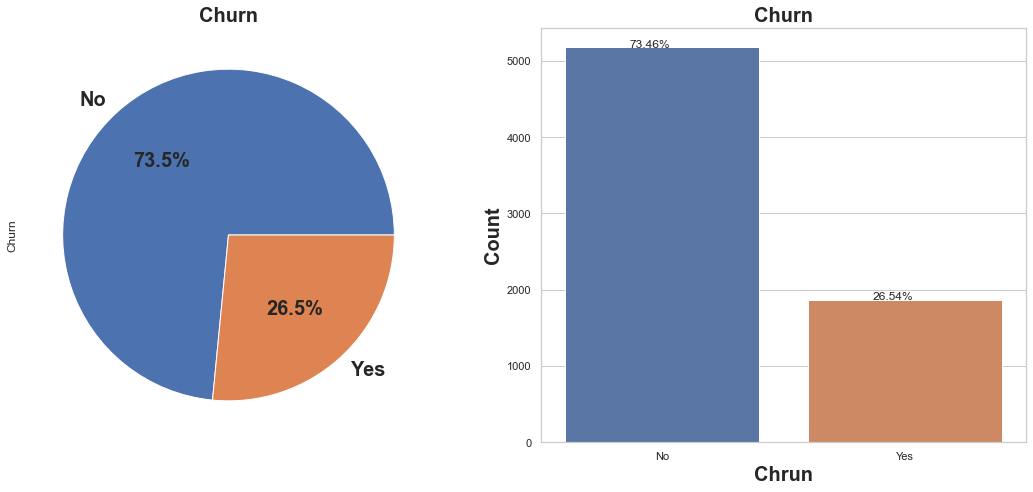

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
data['Churn'].value_counts().plot(kind='pie',ax=ax1,autopct='%1.1f%%',radius=1,textprops={'fontsize': 20, 'fontweight': 'bold'})
ax1.set_title("Churn",fontsize=20,fontweight='bold')
t=sns.countplot(data['Churn'],ax=ax2)
ax2.set_title("Churn",fontsize=20,fontweight='bold')
ax2.set_xlabel("Chrun",fontsize=20,fontweight='bold')
ax2.set_ylabel("Count",fontsize=20,fontweight='bold')
for i in t.patches:
    txt=str(((i.get_height()/len(data['Churn']))*100).round(2))+ '%'
    txt_x=i.get_x()+i.get_width()/3
    txt_y=i.get_height()
    t.text(txt_x,txt_y,txt)
plt.tight_layout()

In [30]:
cat_cols=data.select_dtypes(include='category').columns
cat_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [31]:
cat_cols=cat_cols.drop('Churn')
cat_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

#### comparing the distriution numerical cols with the target values

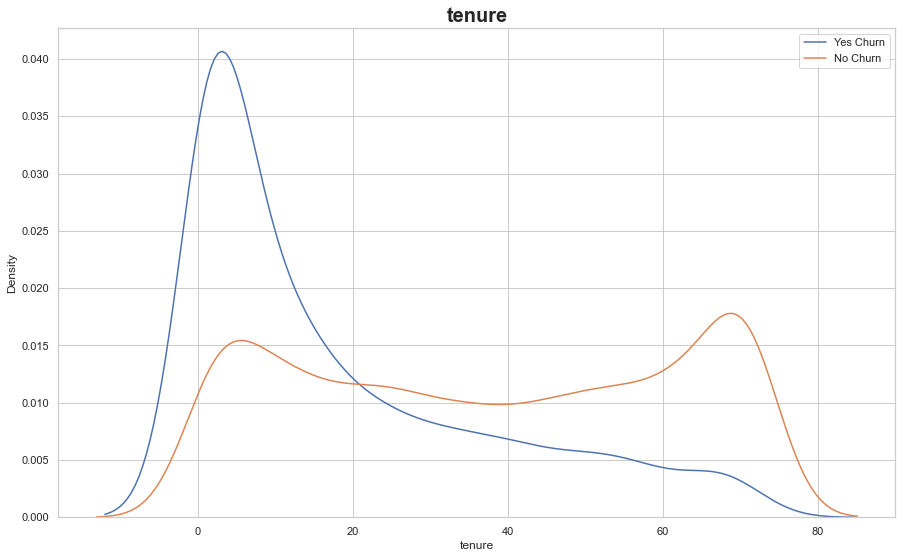

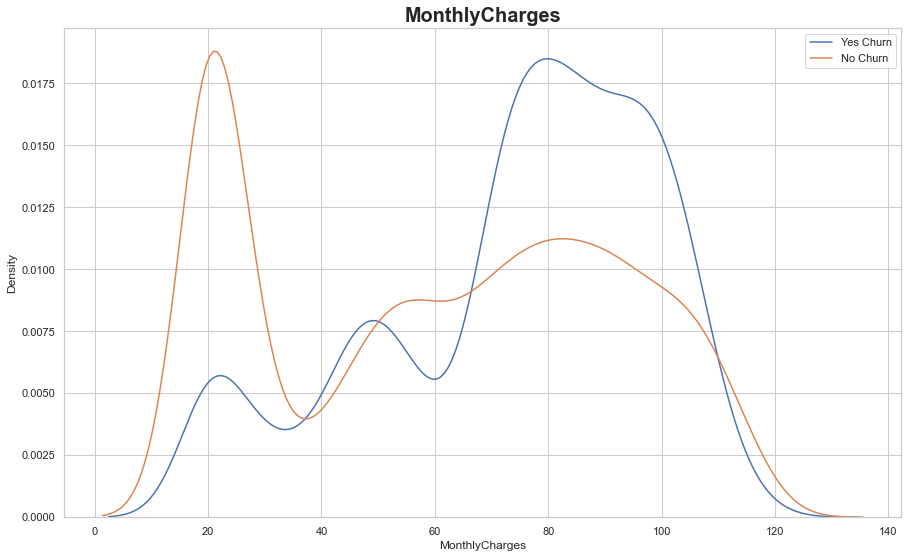

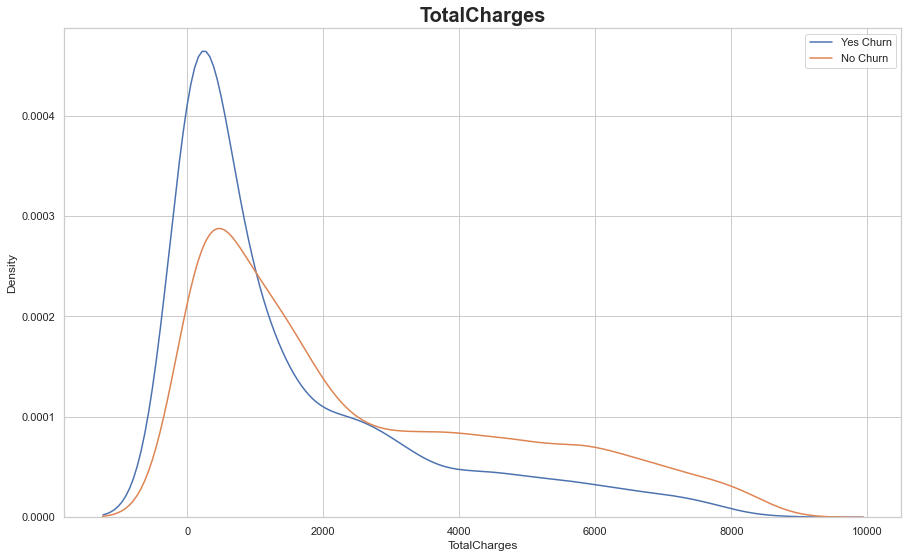

In [32]:
for i in  num_cols:
    x=data[data['Churn']=="Yes"][i]
    y=data[data['Churn']=="No"][i]
    sns.kdeplot(x,label="Yes Churn").set_title(i,fontweight = 'bold', fontsize = 20)
    sns.kdeplot(y,label="No Churn")
    plt.legend()
    plt.show()

#### comparing the distriution categorical cols with the target values

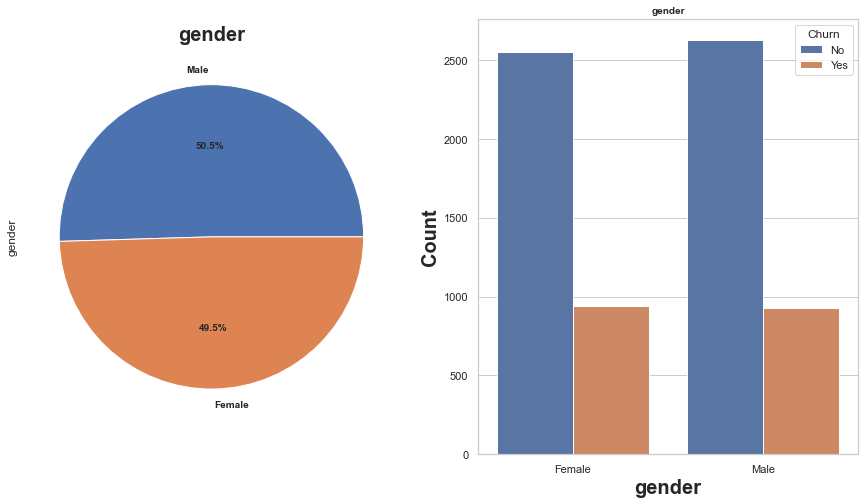

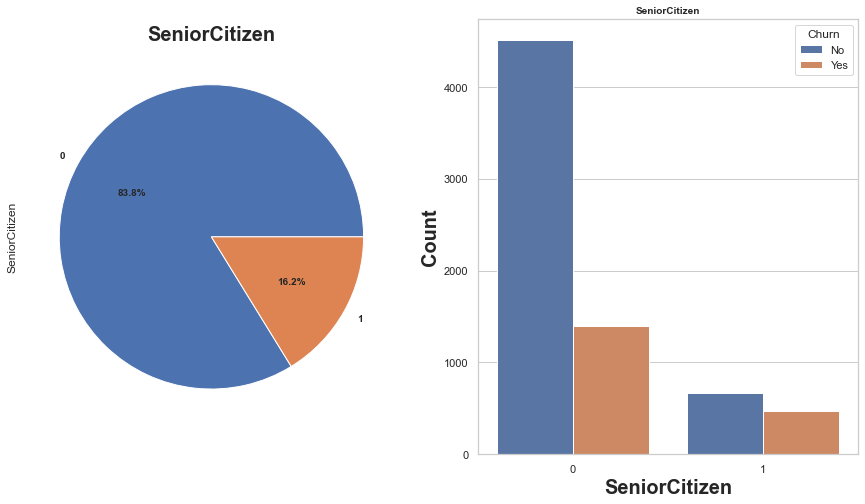

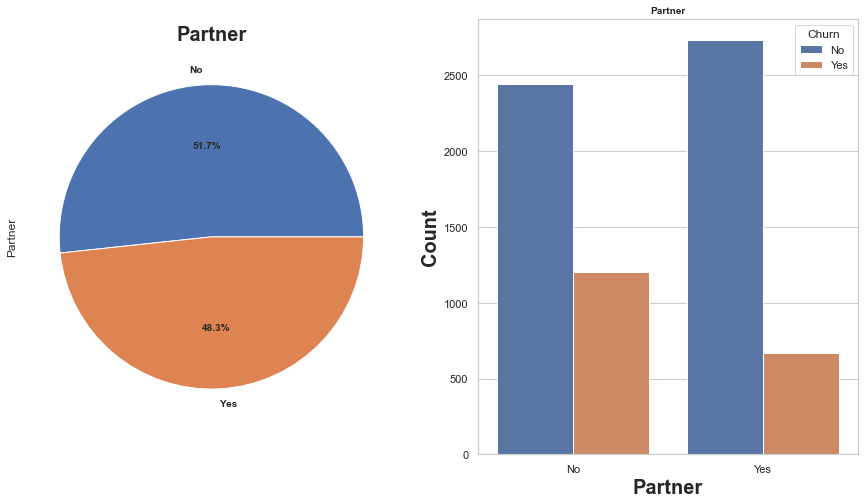

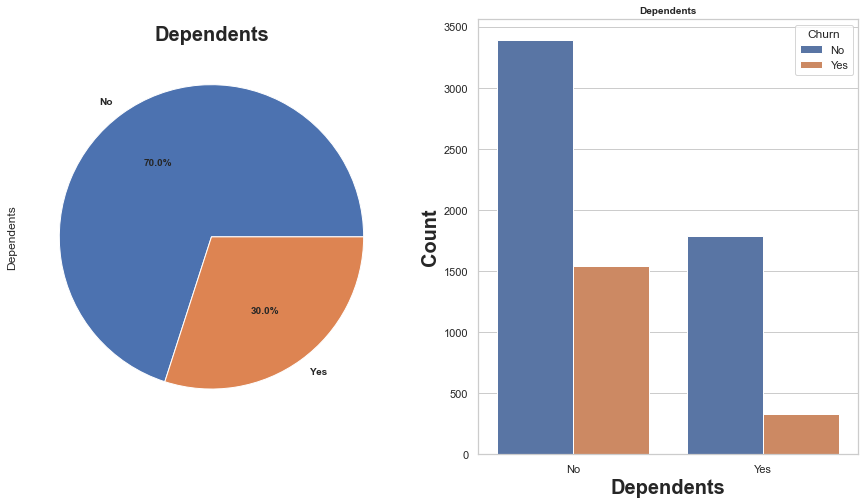

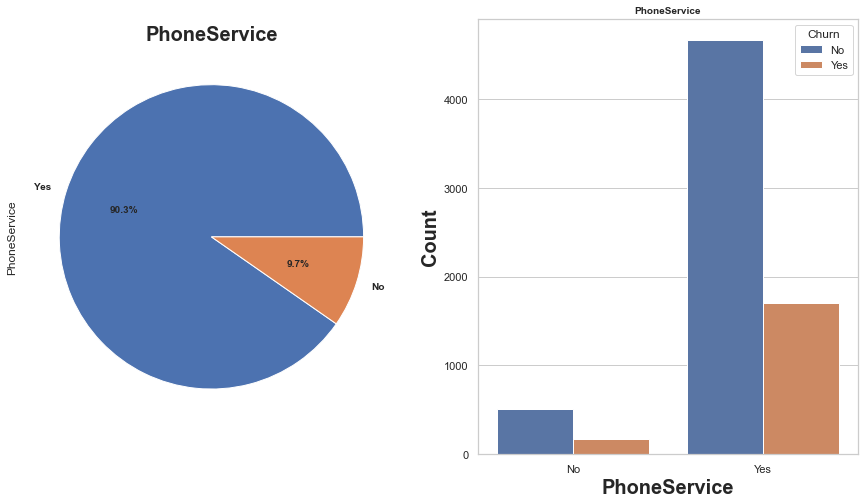

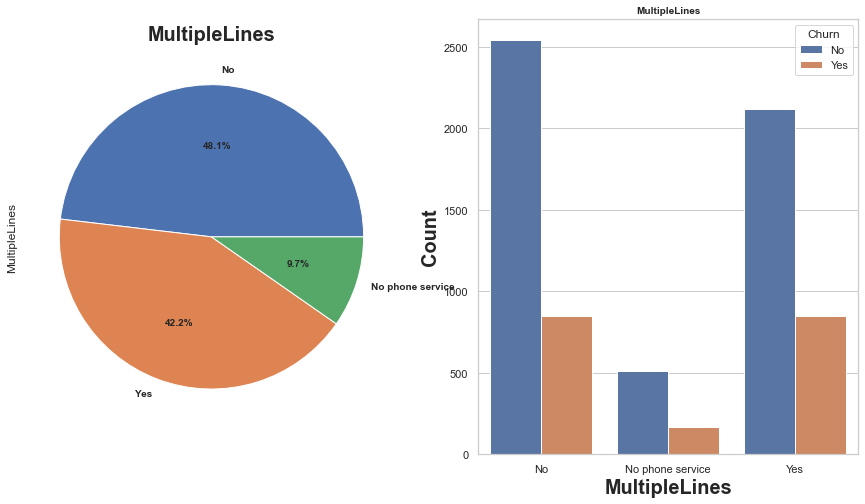

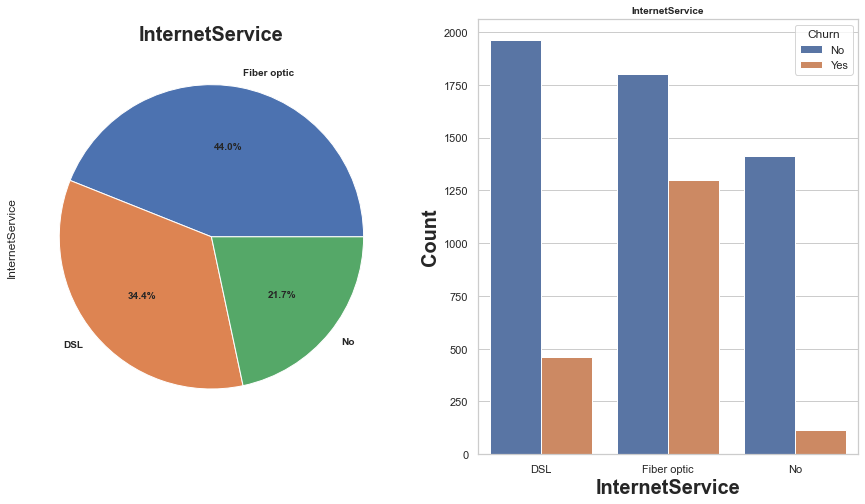

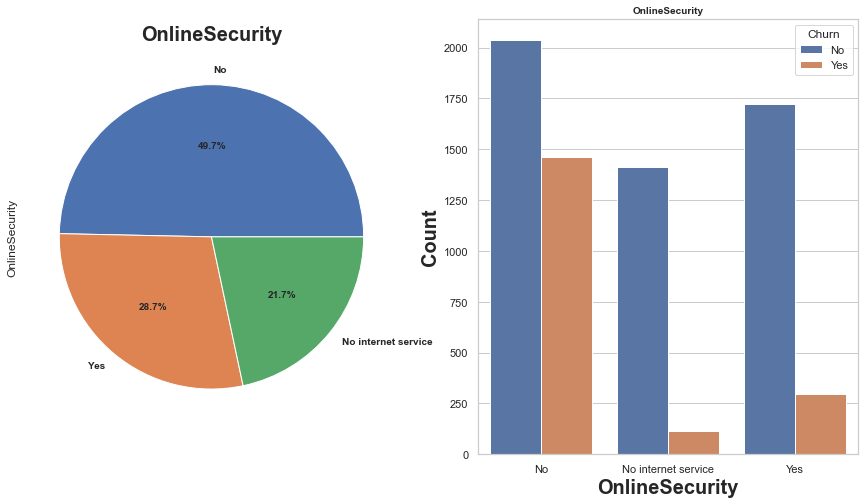

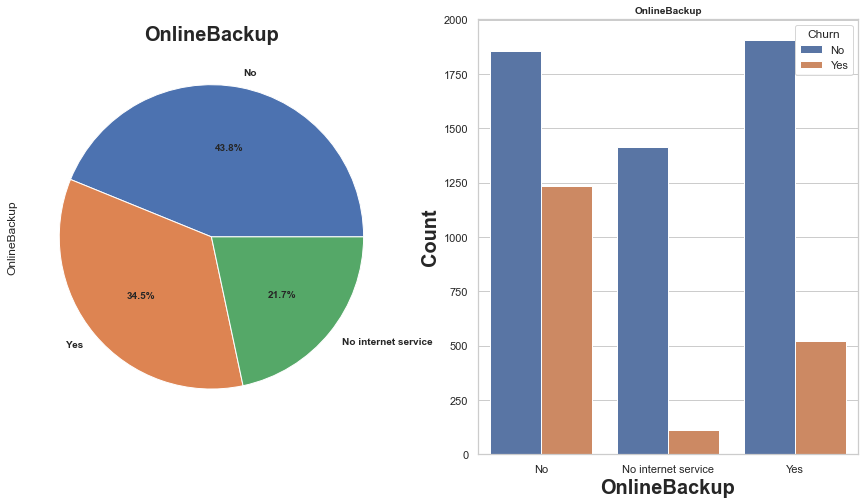

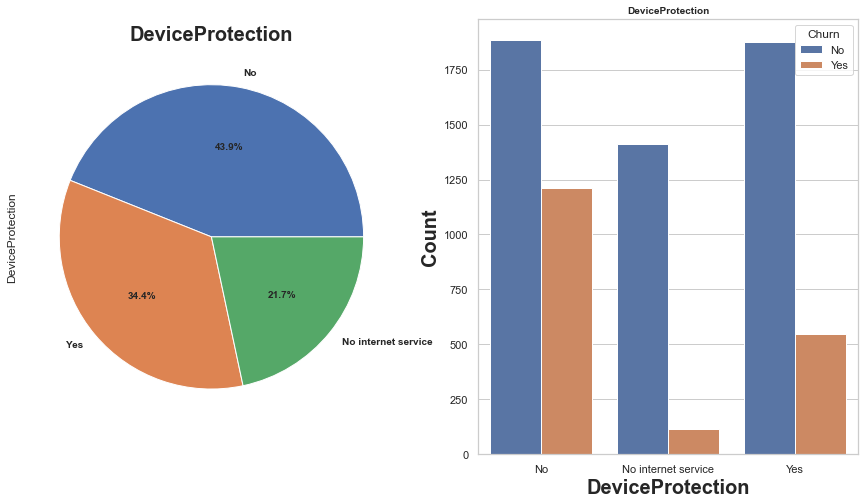

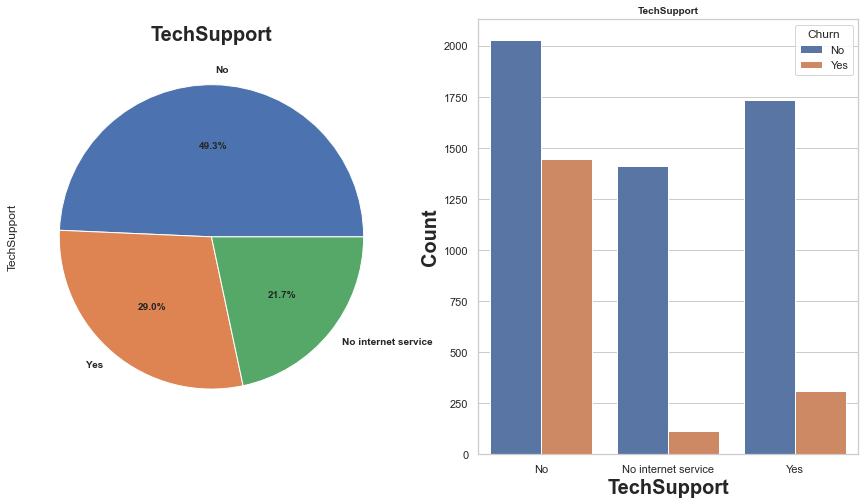

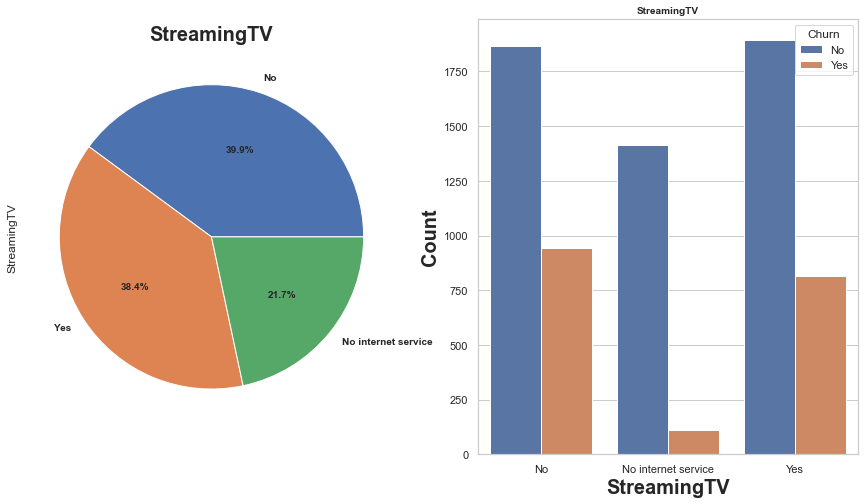

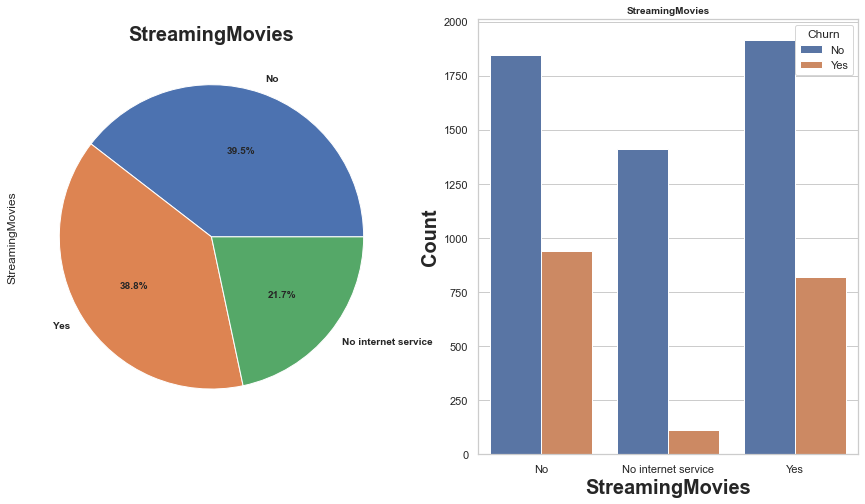

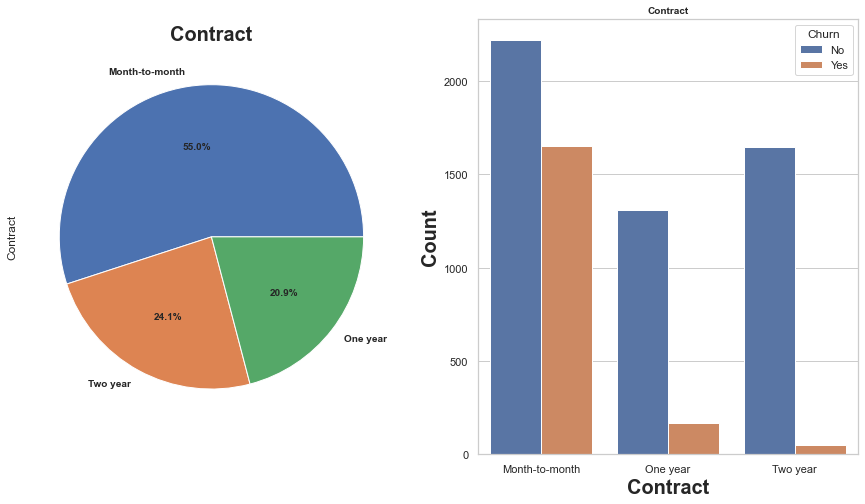

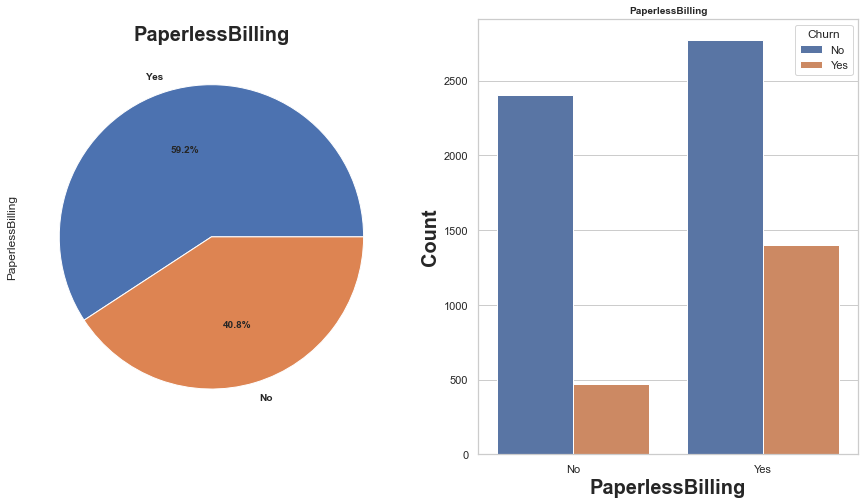

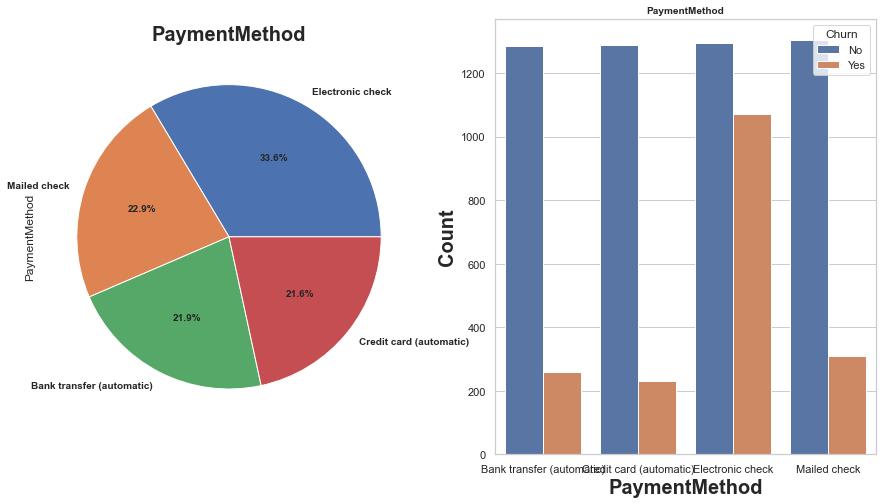

In [33]:
for i in cat_cols:
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
    data[i].value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontsize':10,'fontweight':"bold"},ax=ax1)
    ax1.set_title(i,fontsize=20,fontweight='bold')
    sns.countplot(data=data,x=data[i],hue='Churn',ax=ax2)
    ax2.set_title(i,fontsize=10,fontweight='bold')
    ax2.set_ylabel("Count",fontsize=20,fontweight='bold')
    ax2.set_xlabel(i,fontsize=20,fontweight='bold')

#### categorical vs numeric vs target

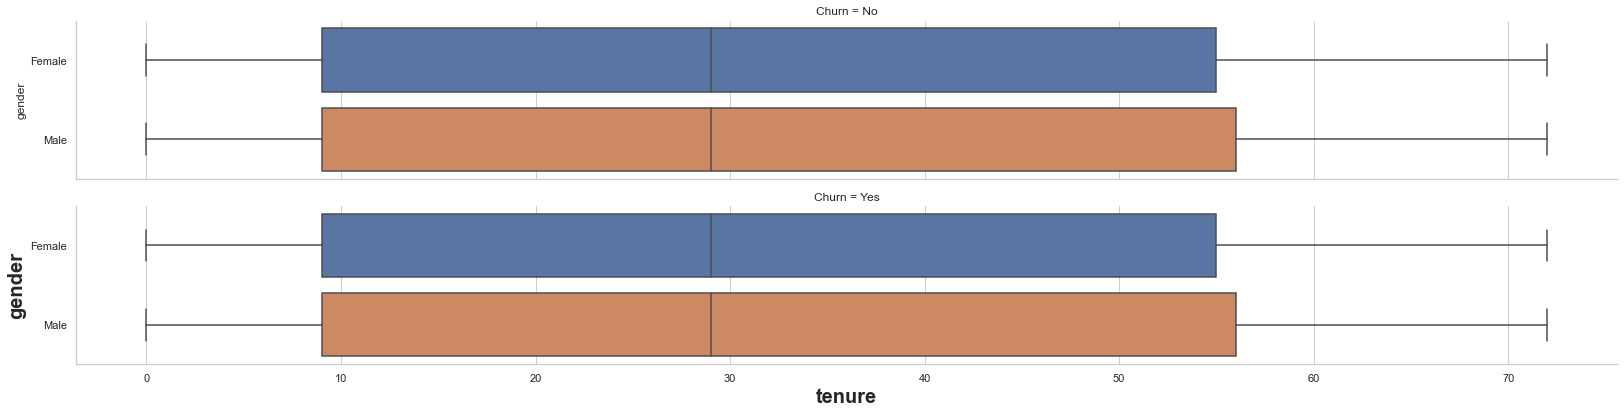

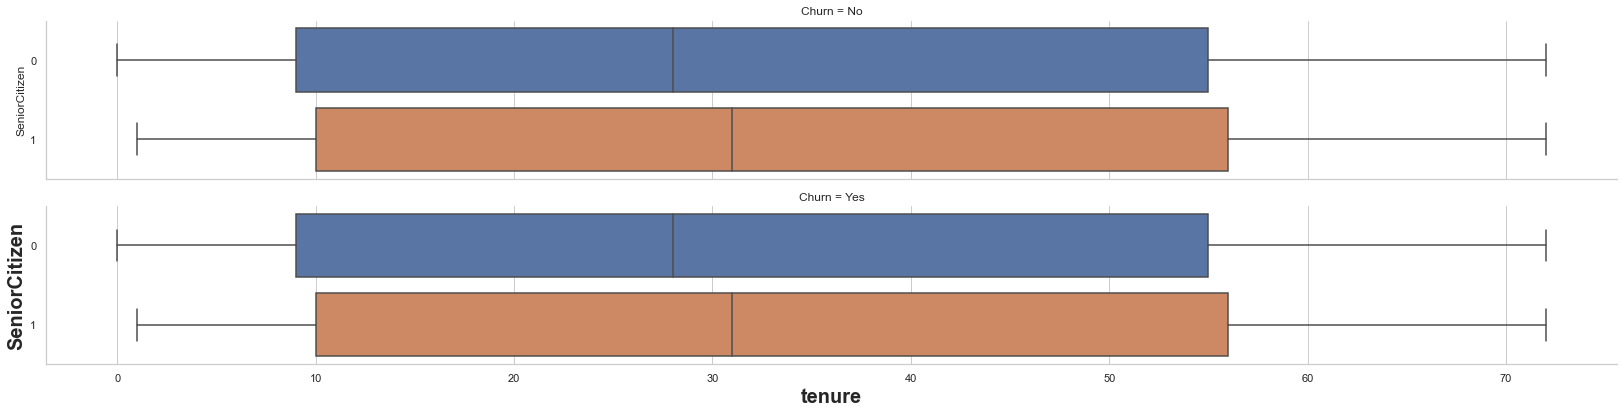

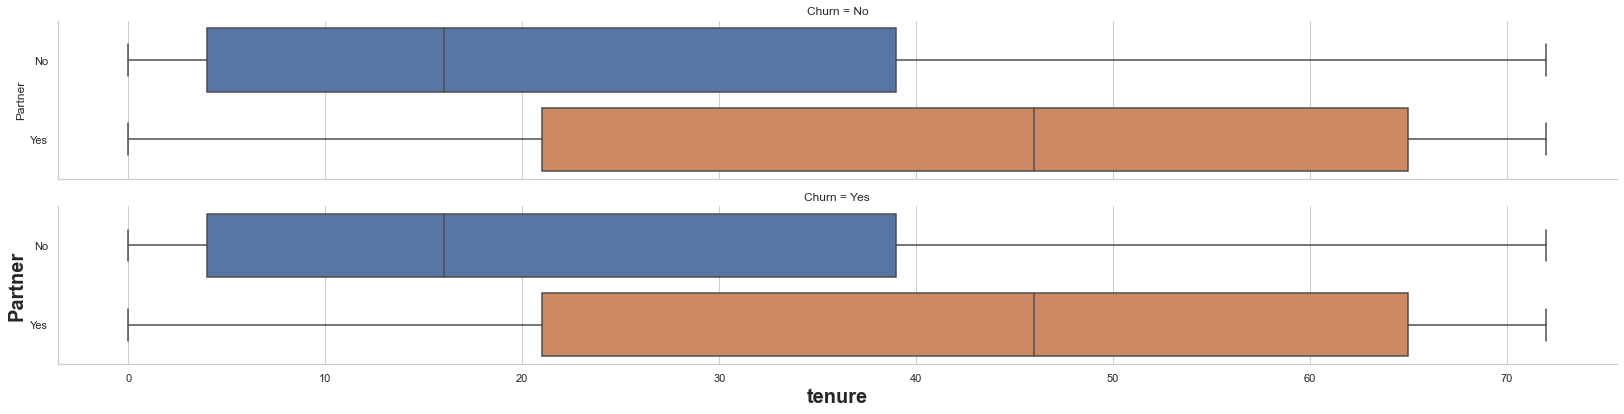

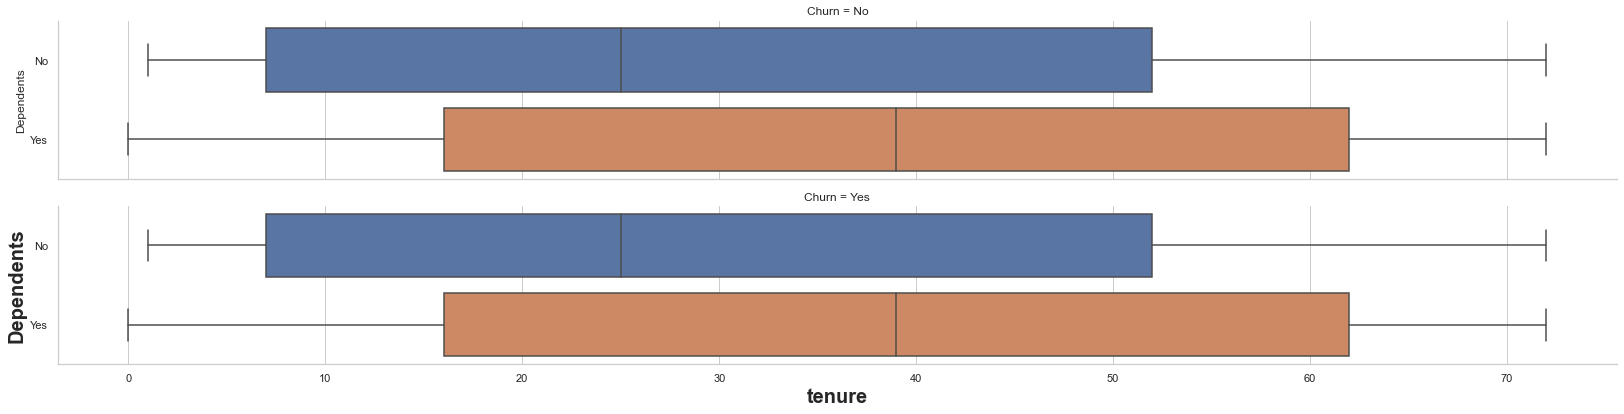

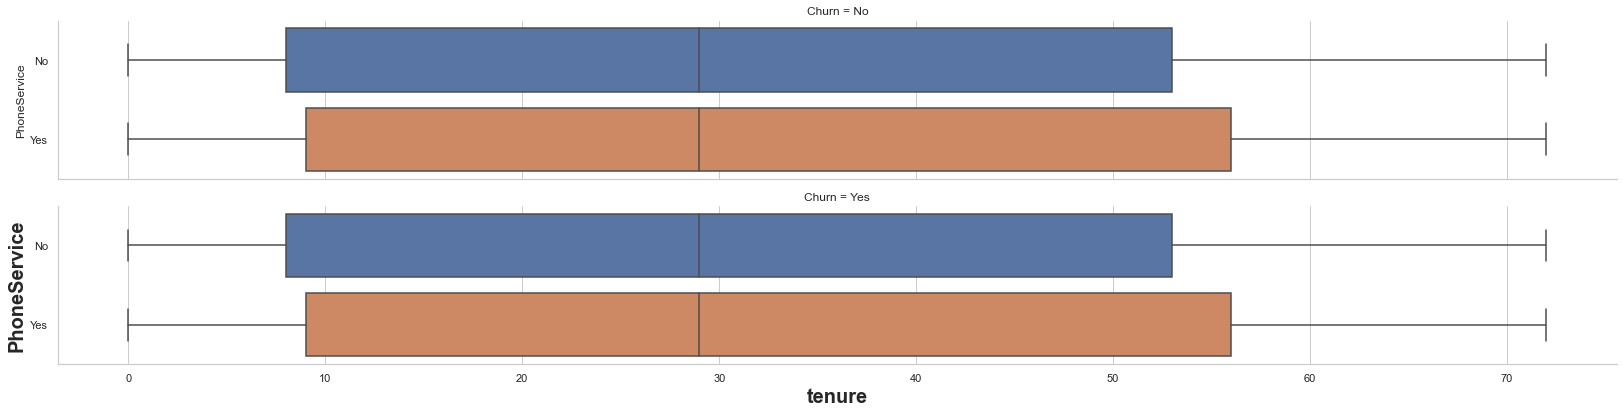

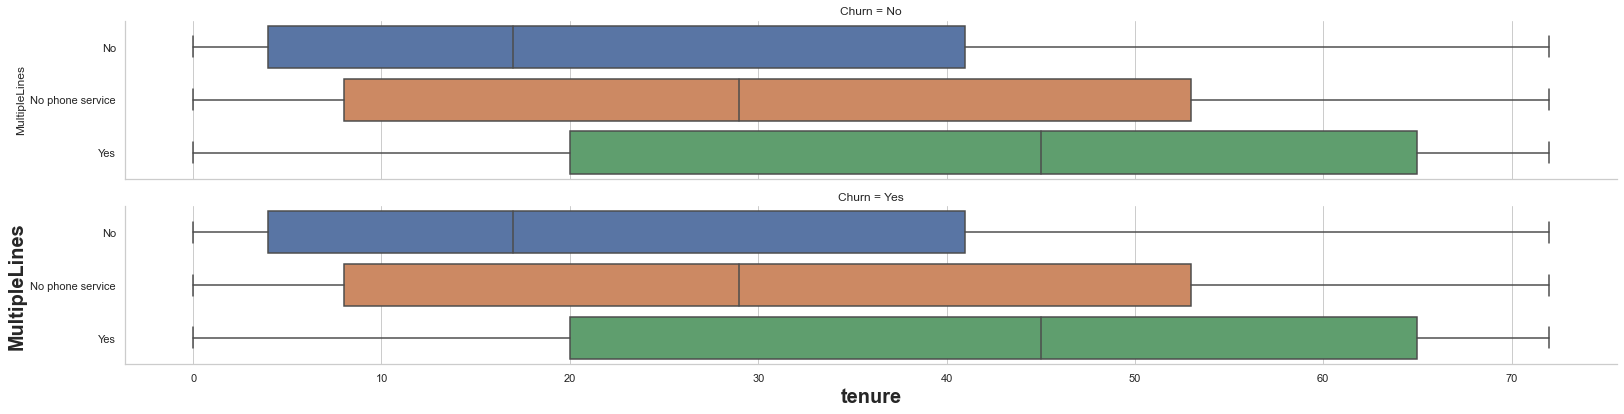

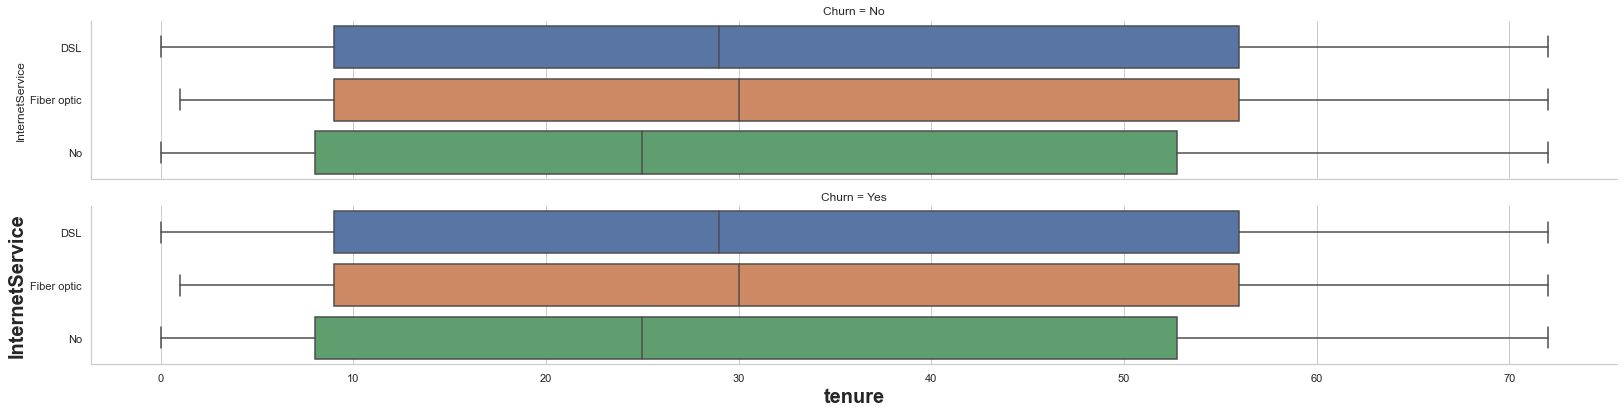

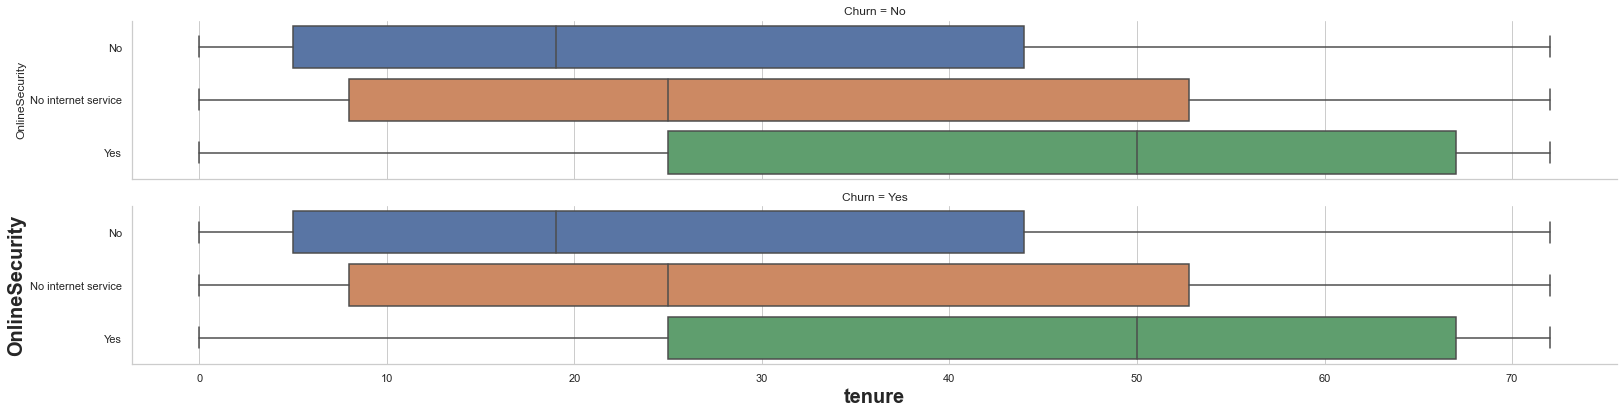

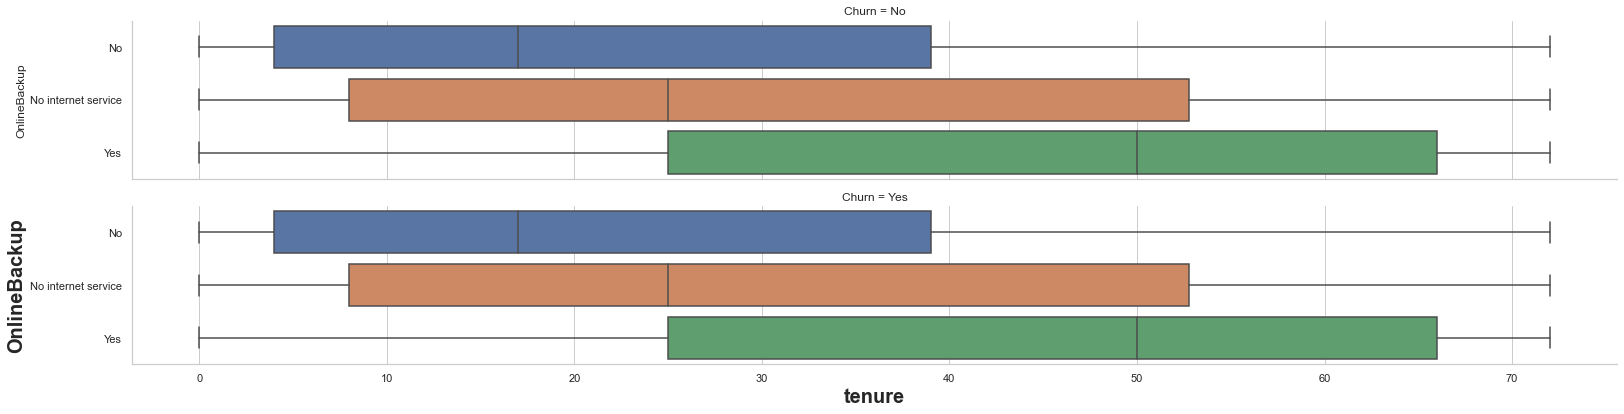

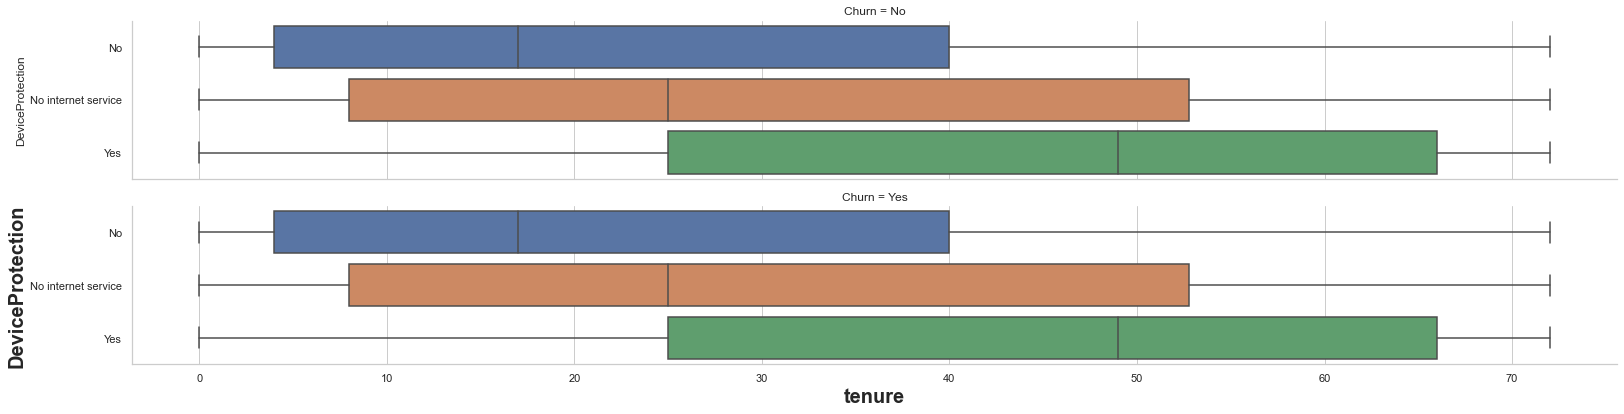

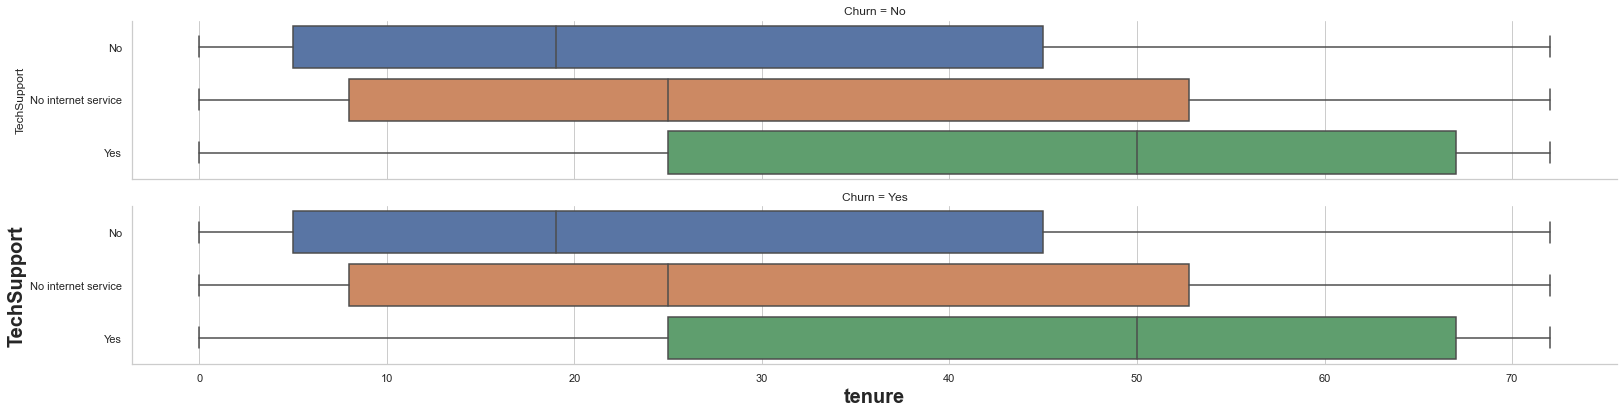

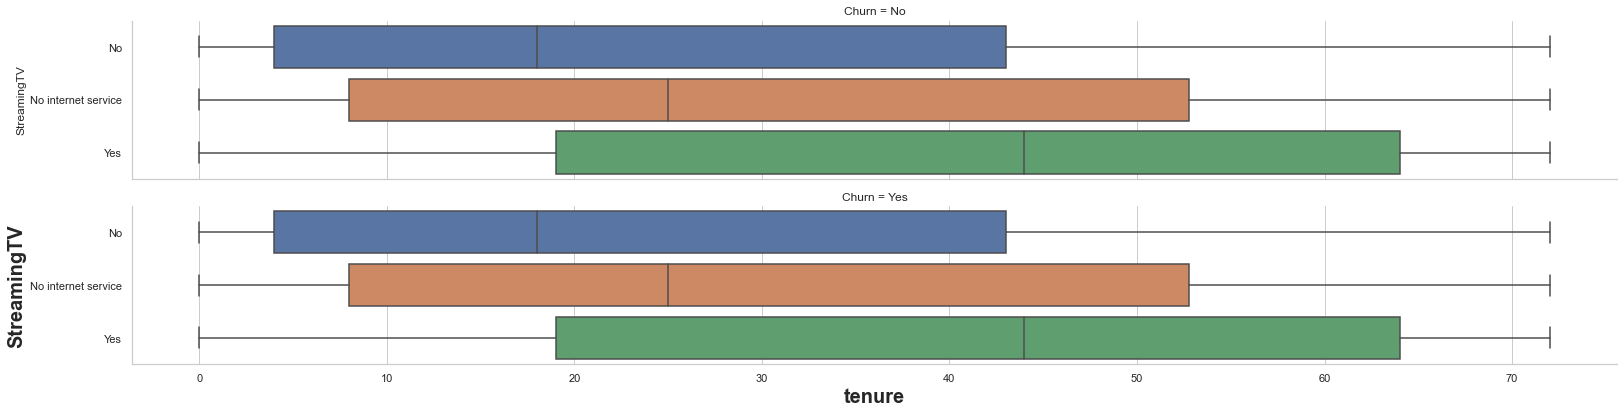

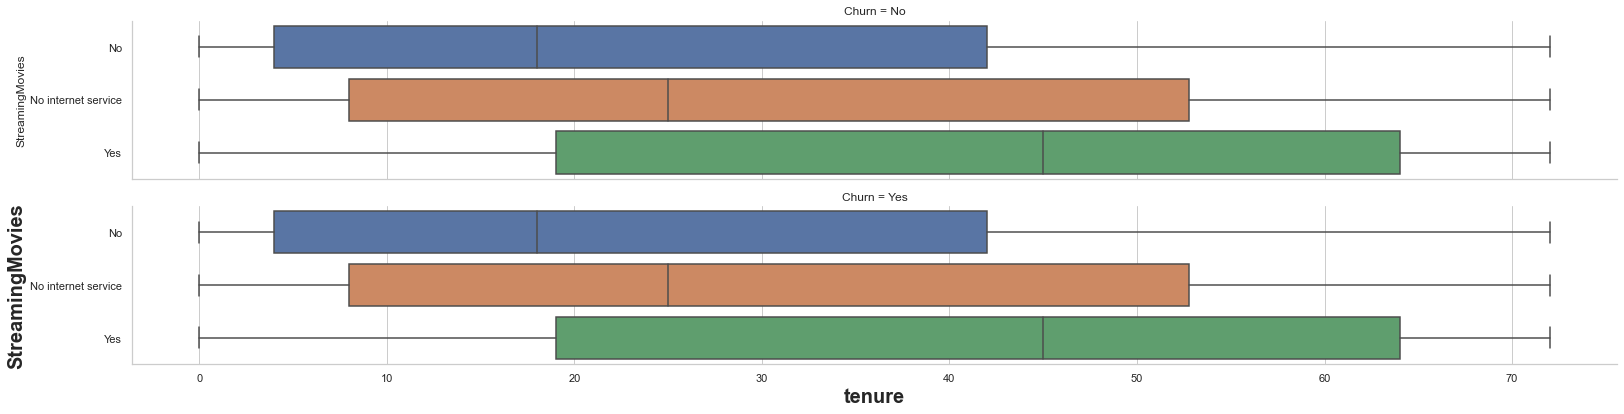

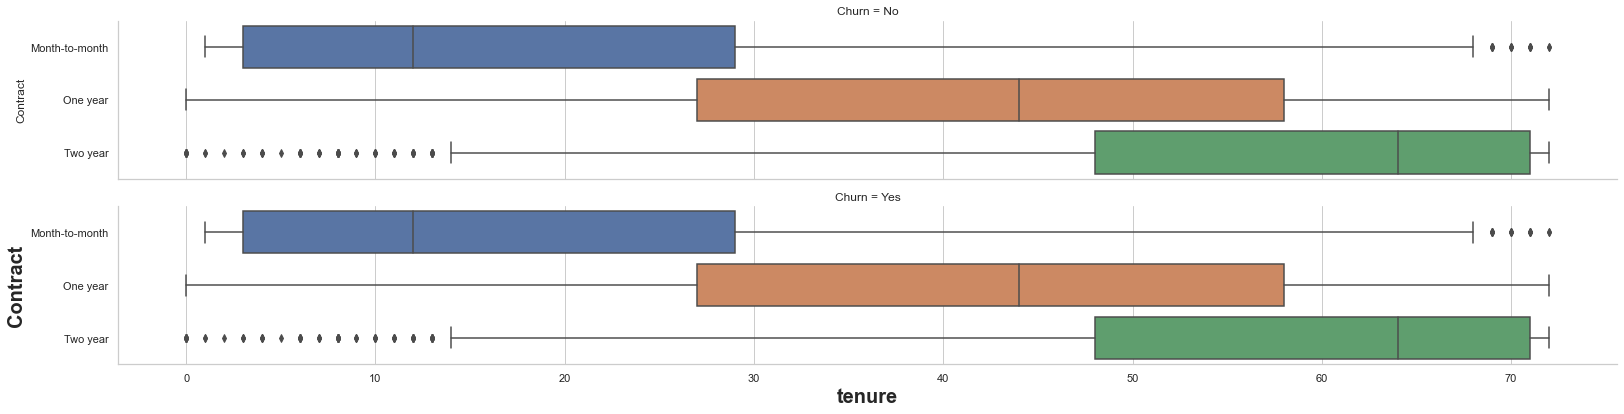

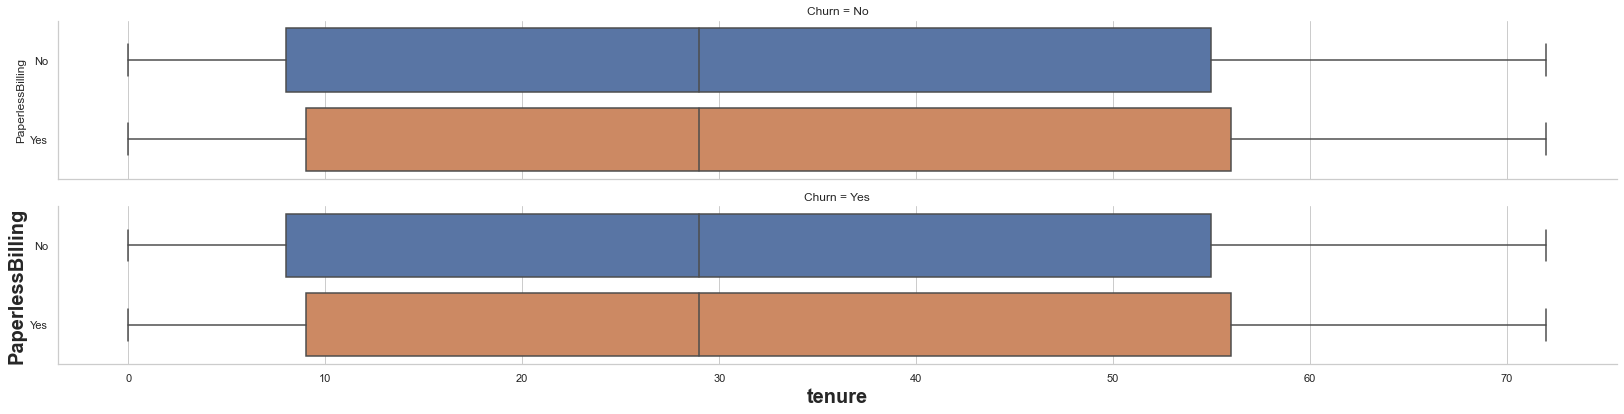

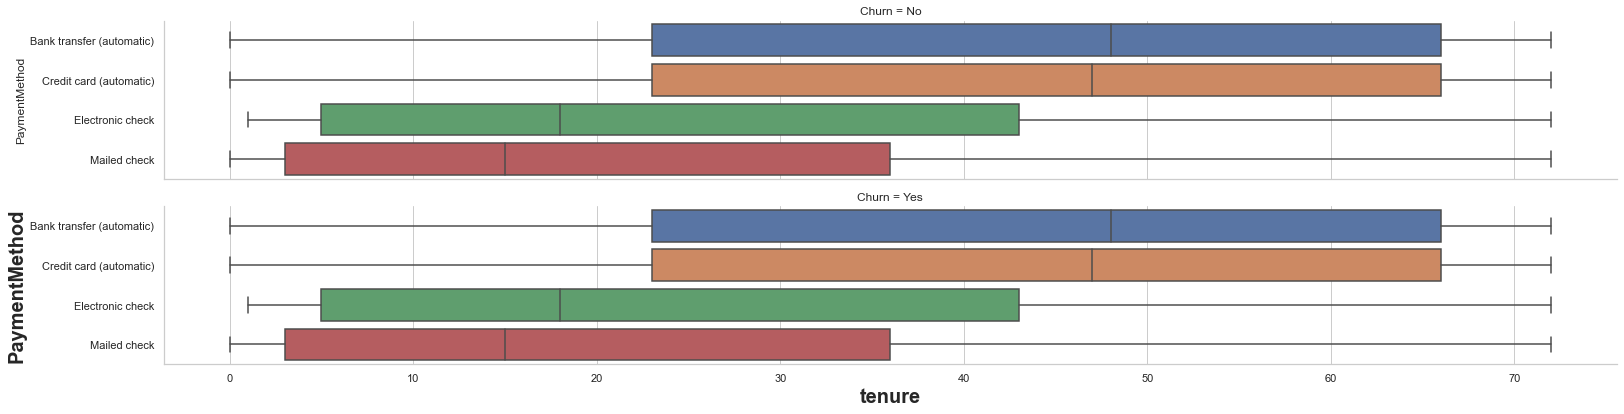

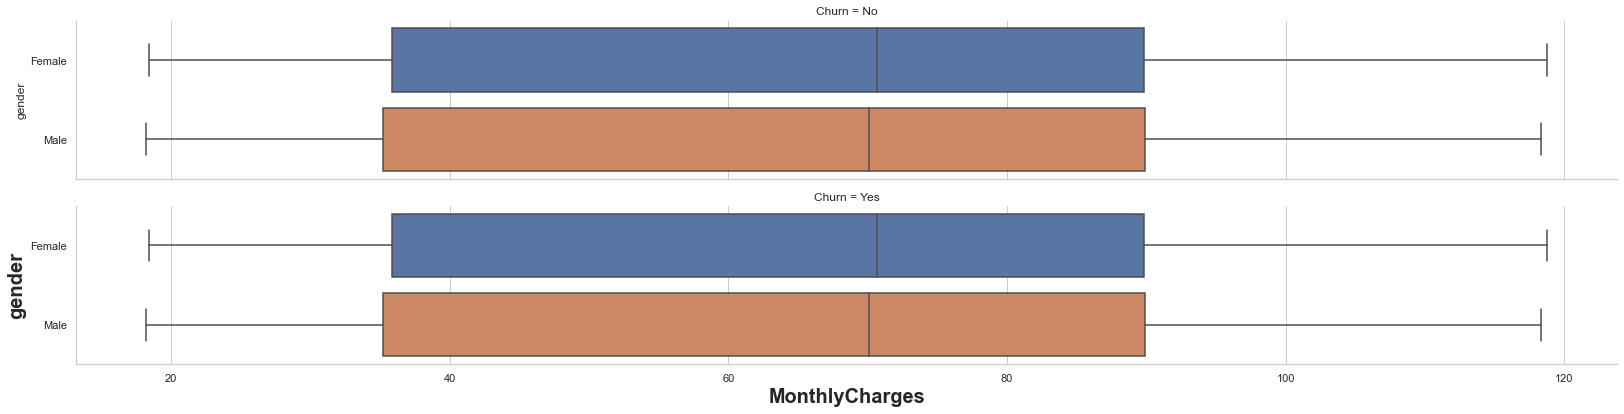

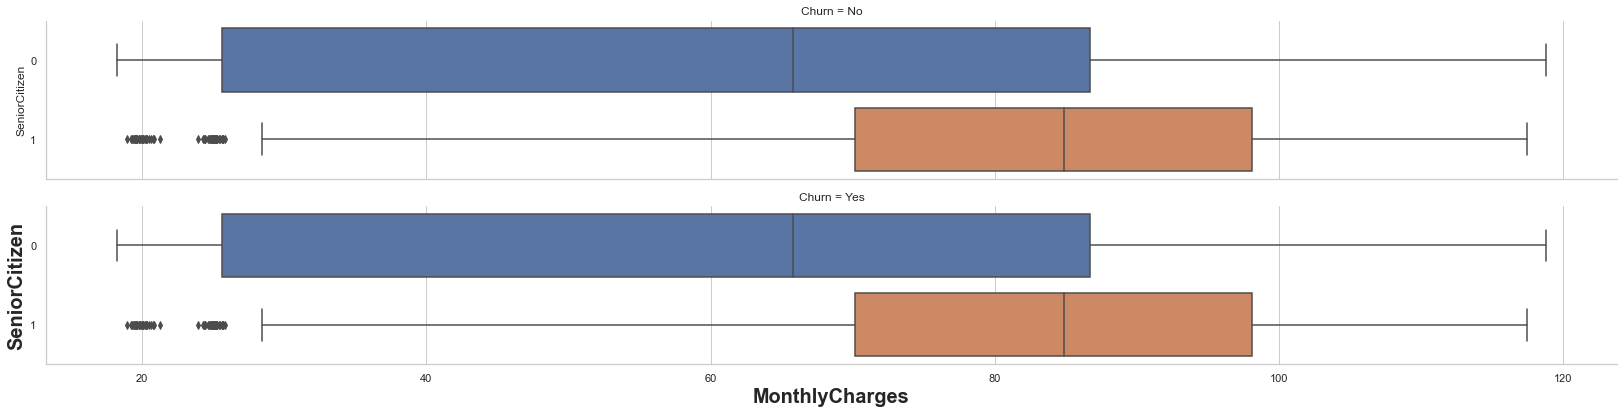

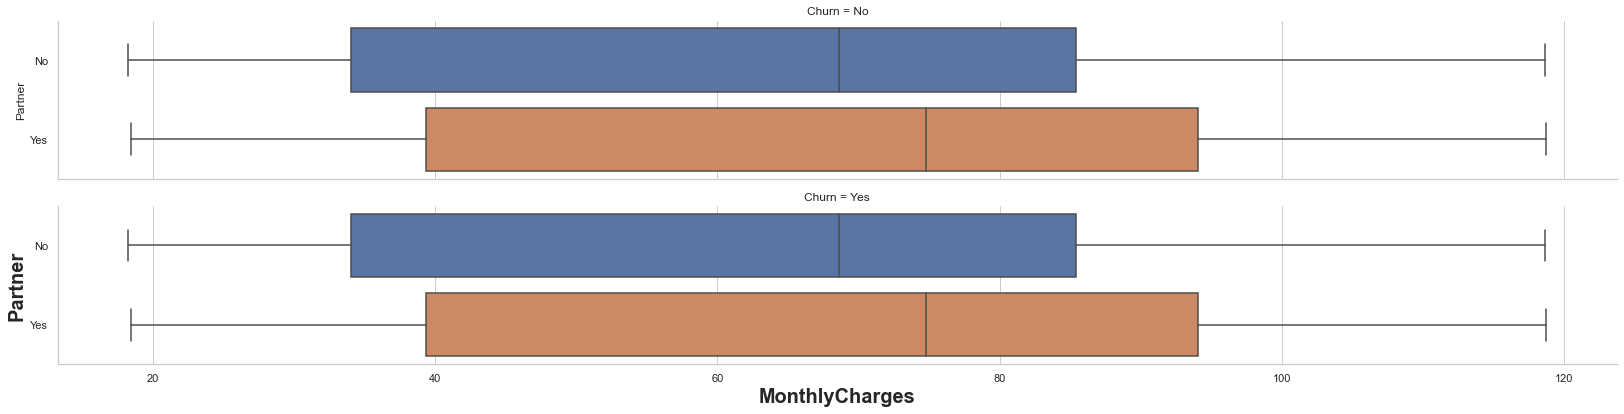

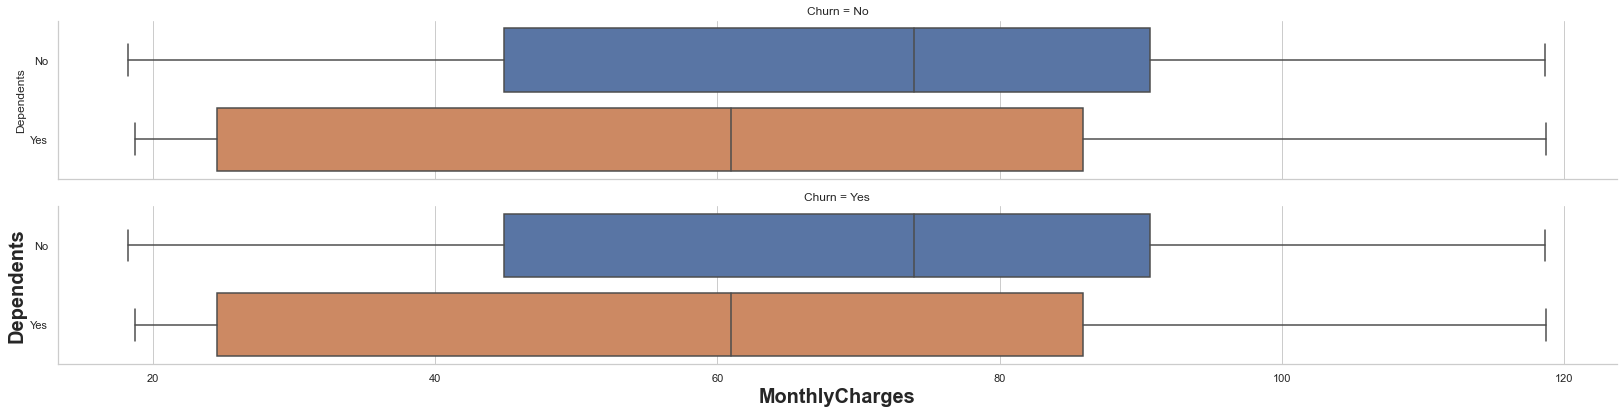

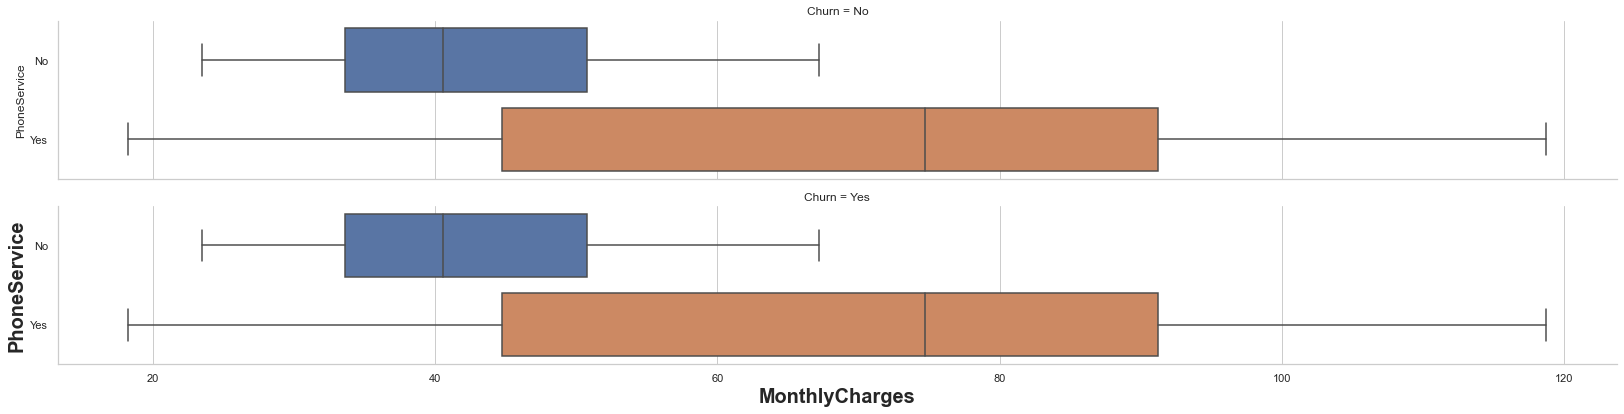

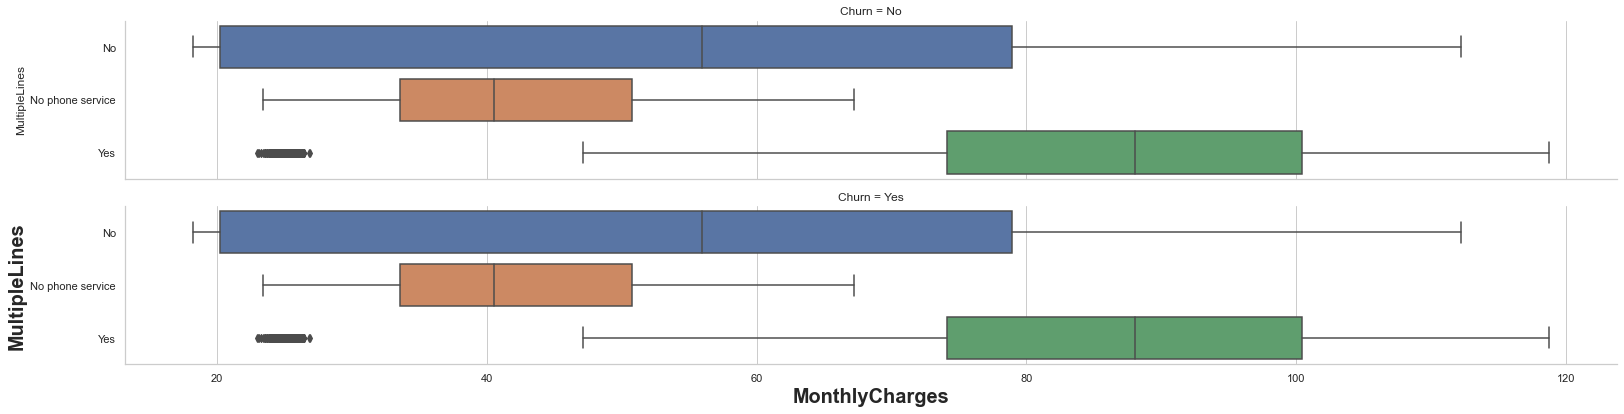

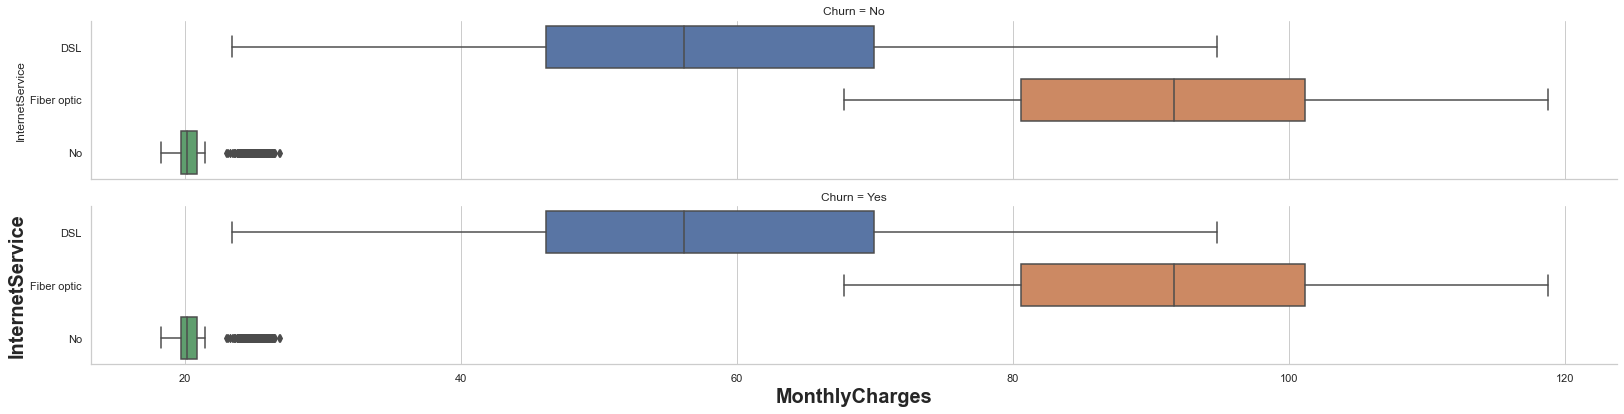

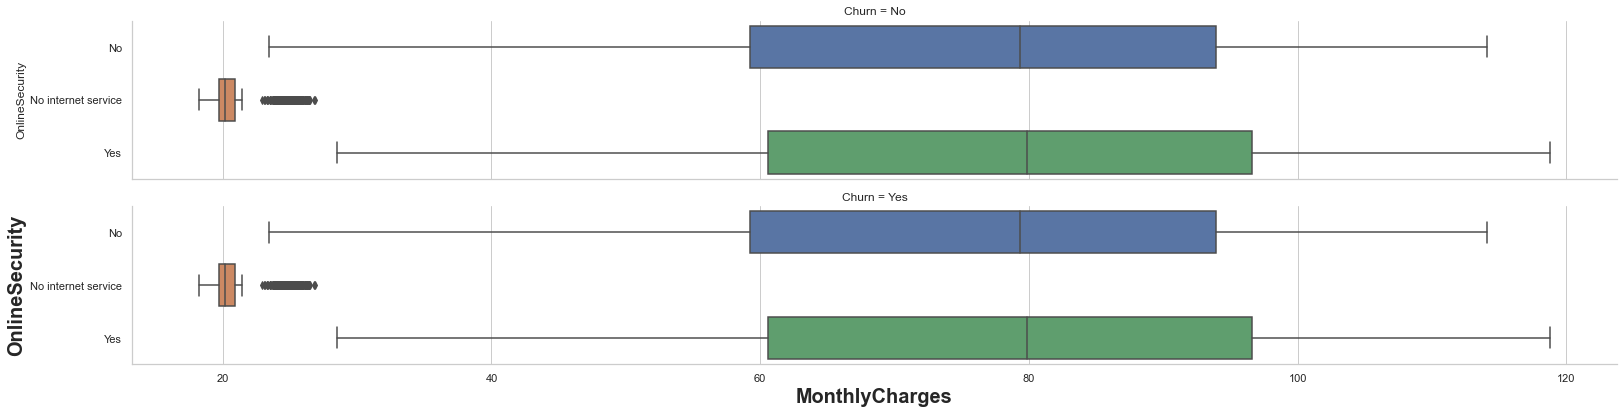

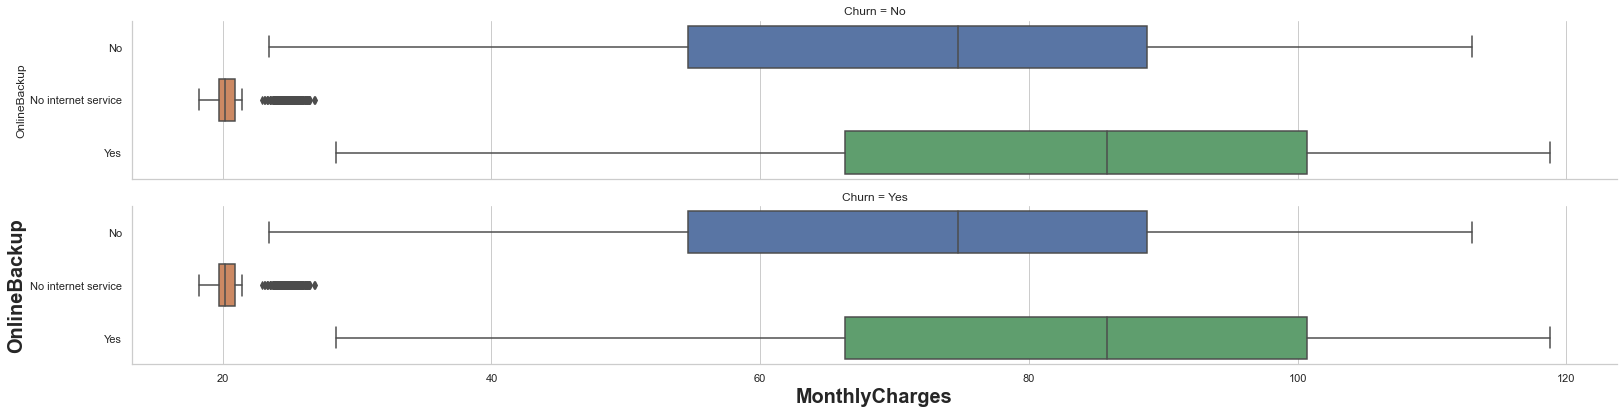

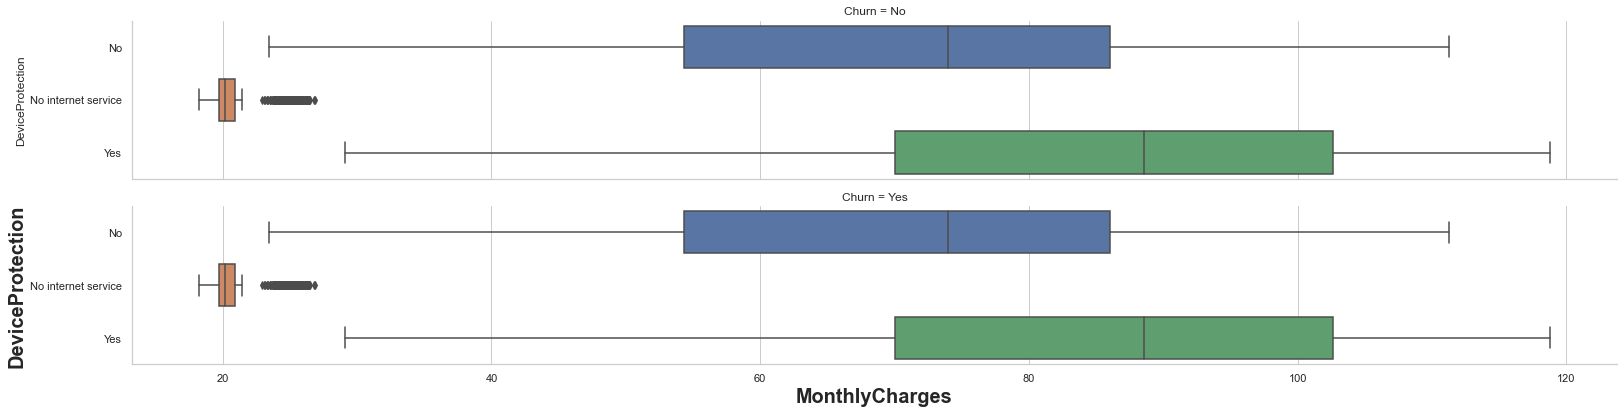

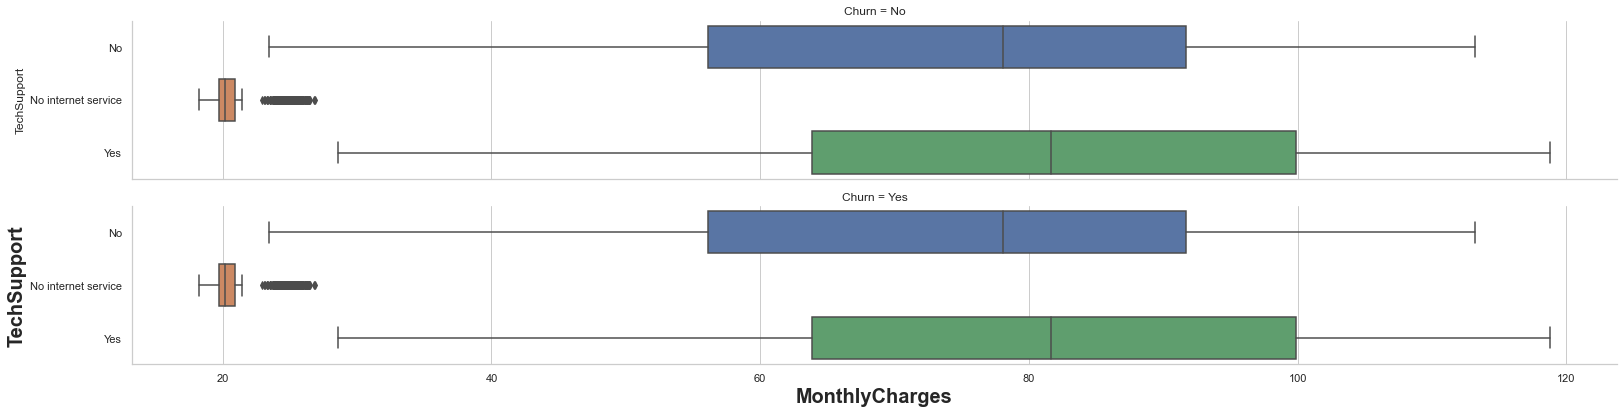

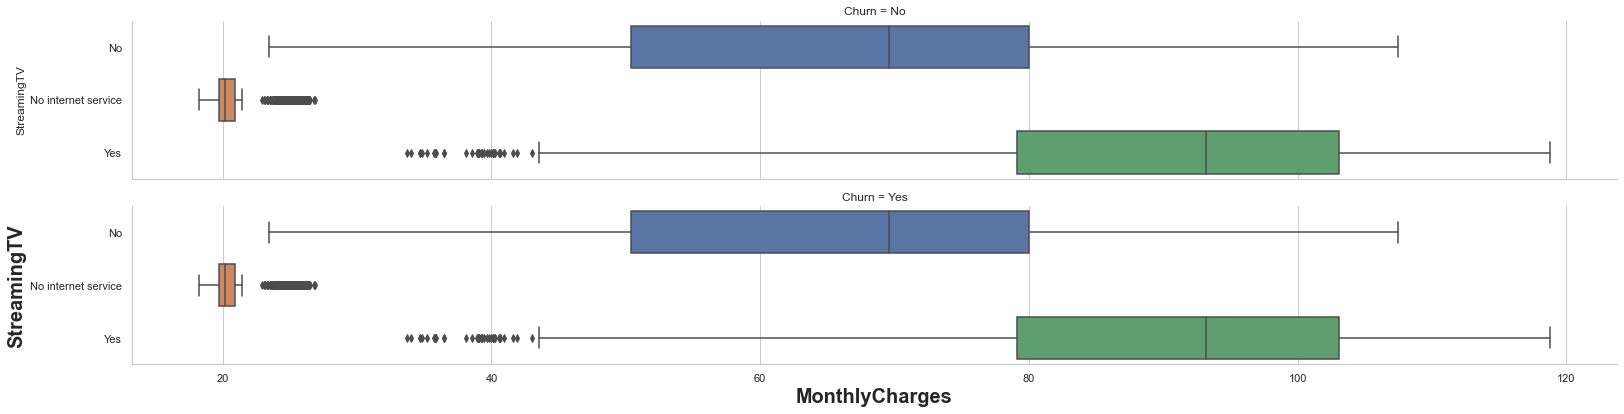

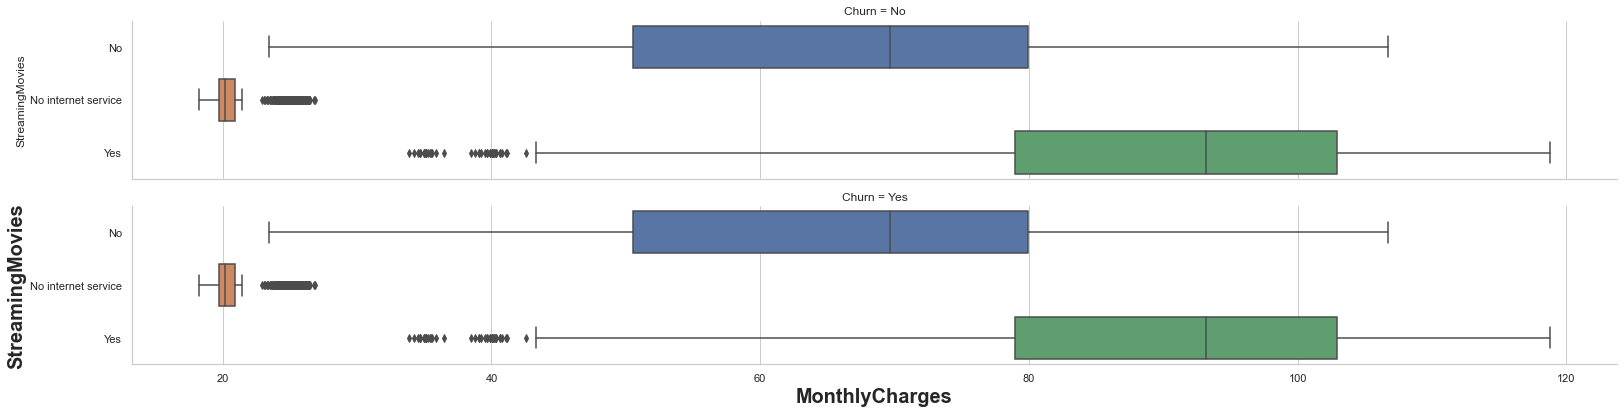

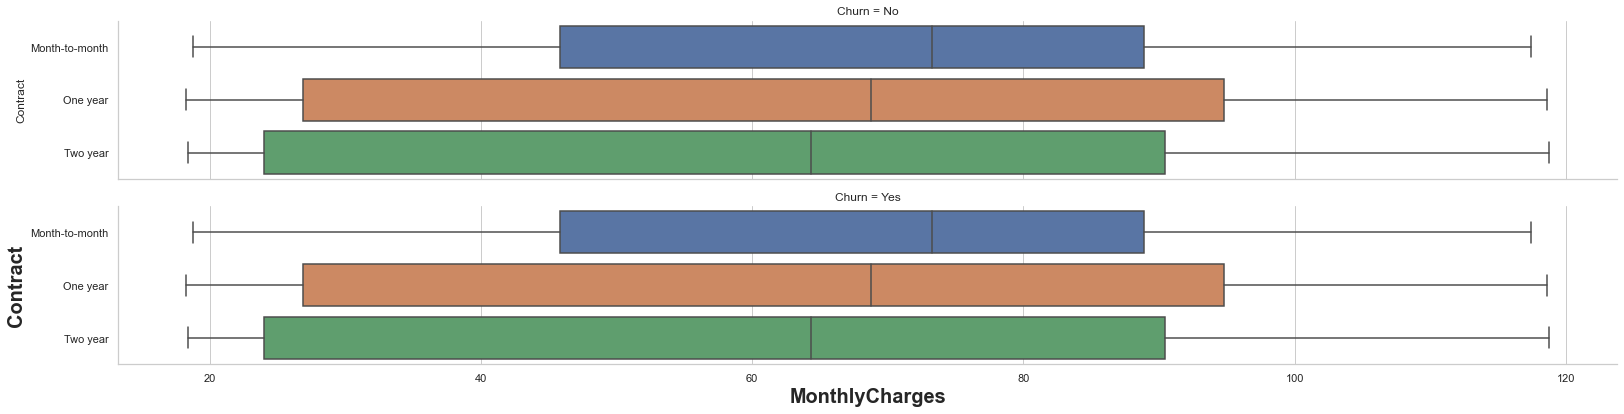

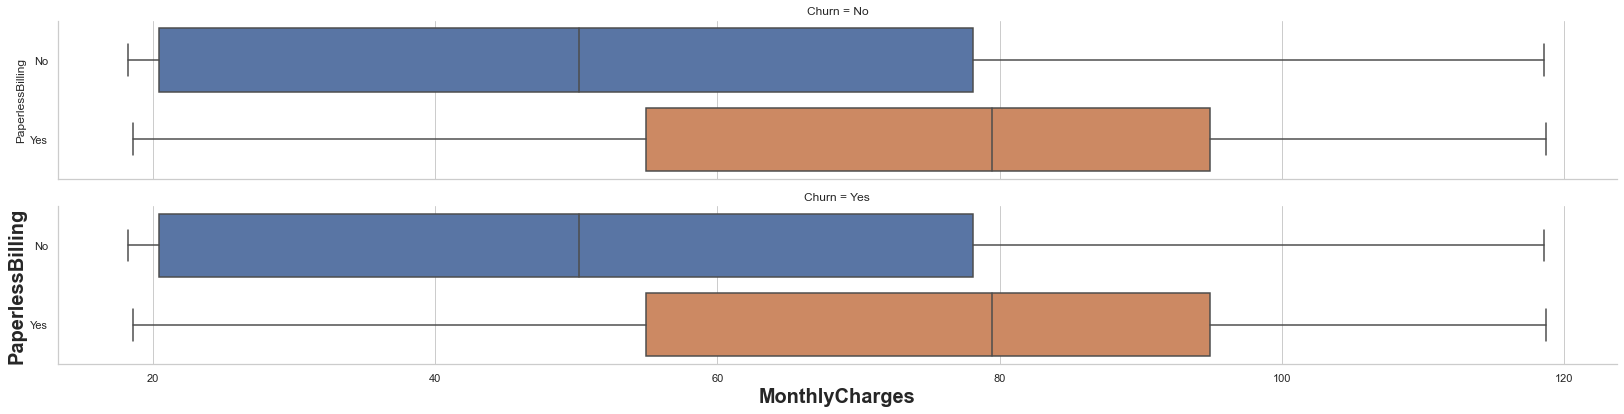

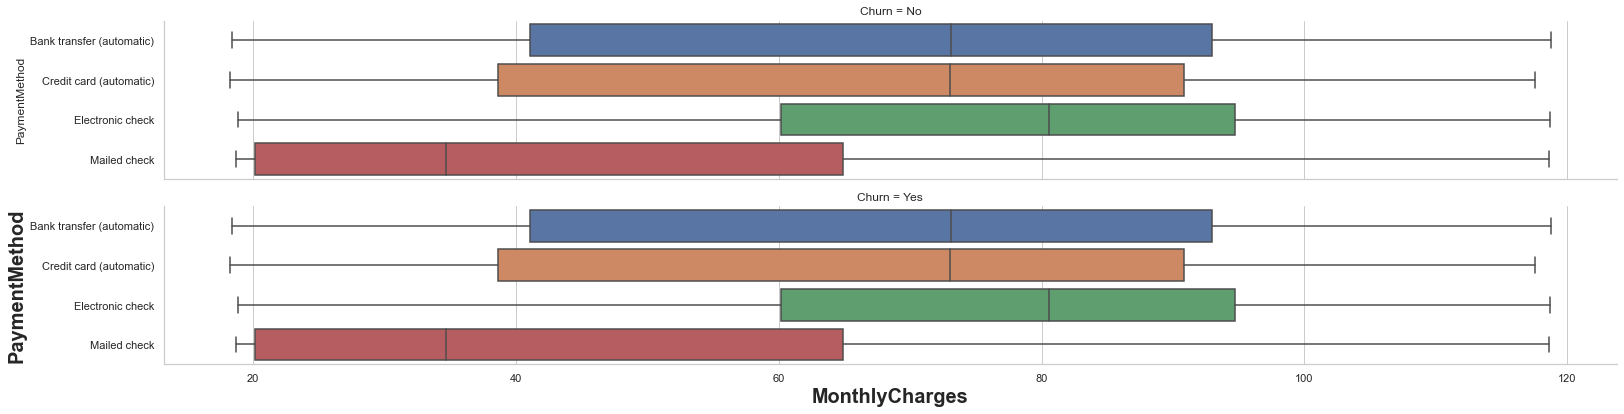

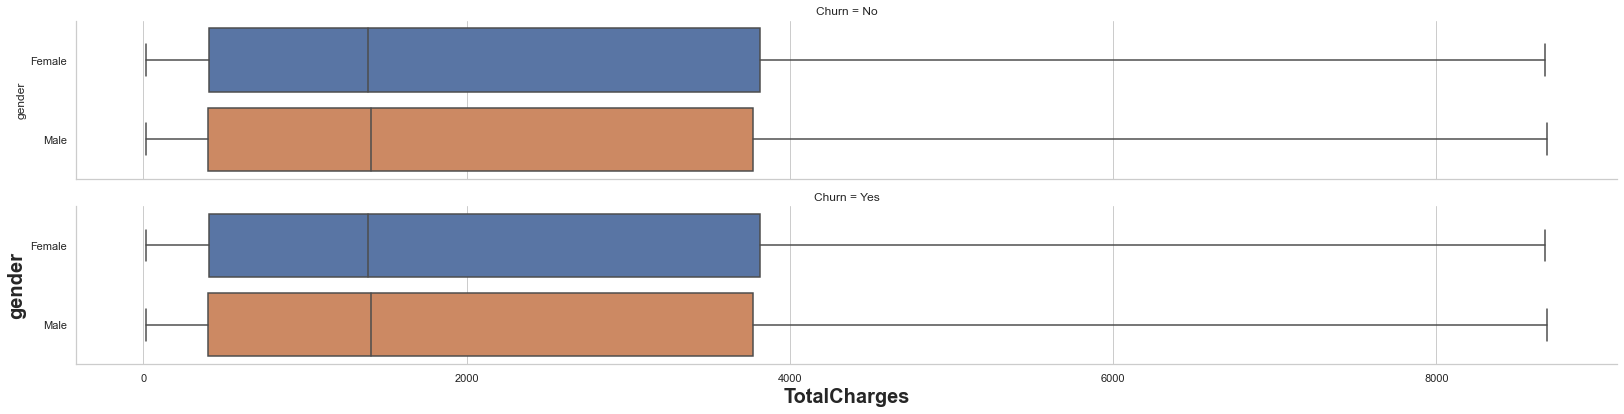

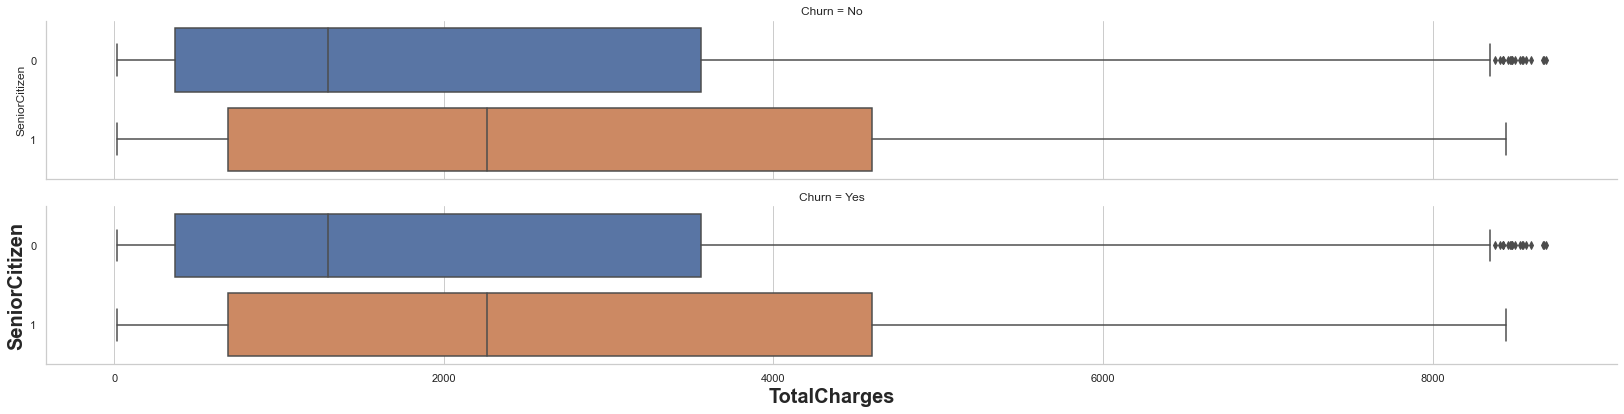

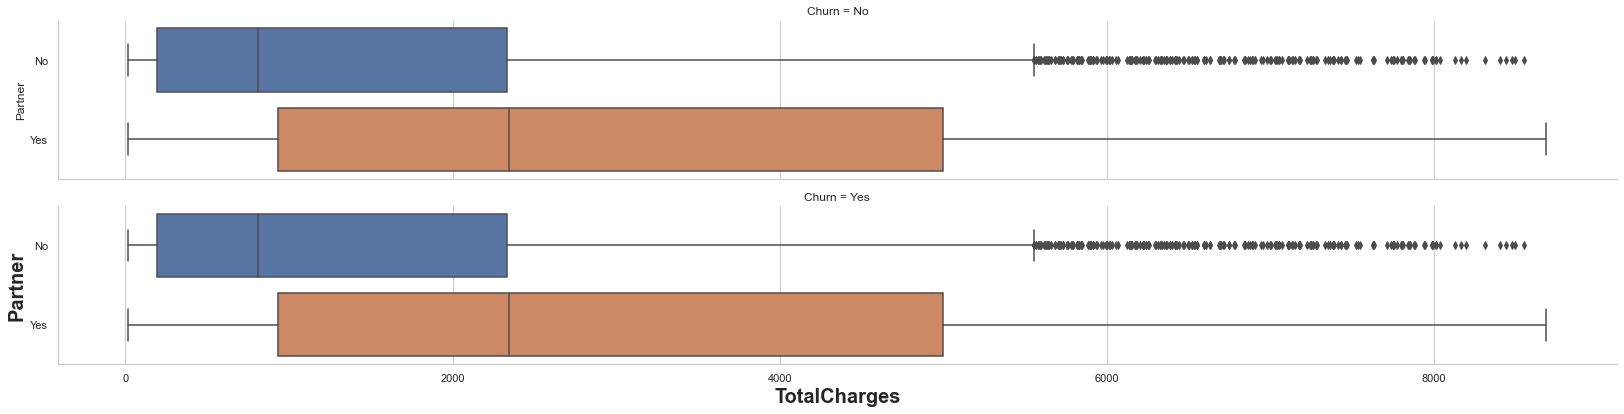

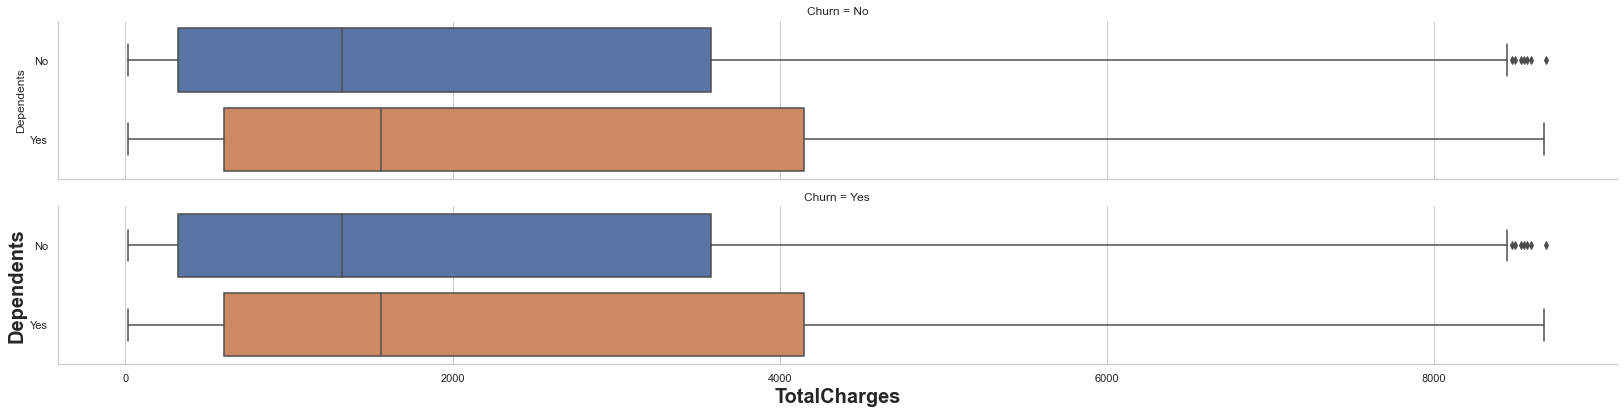

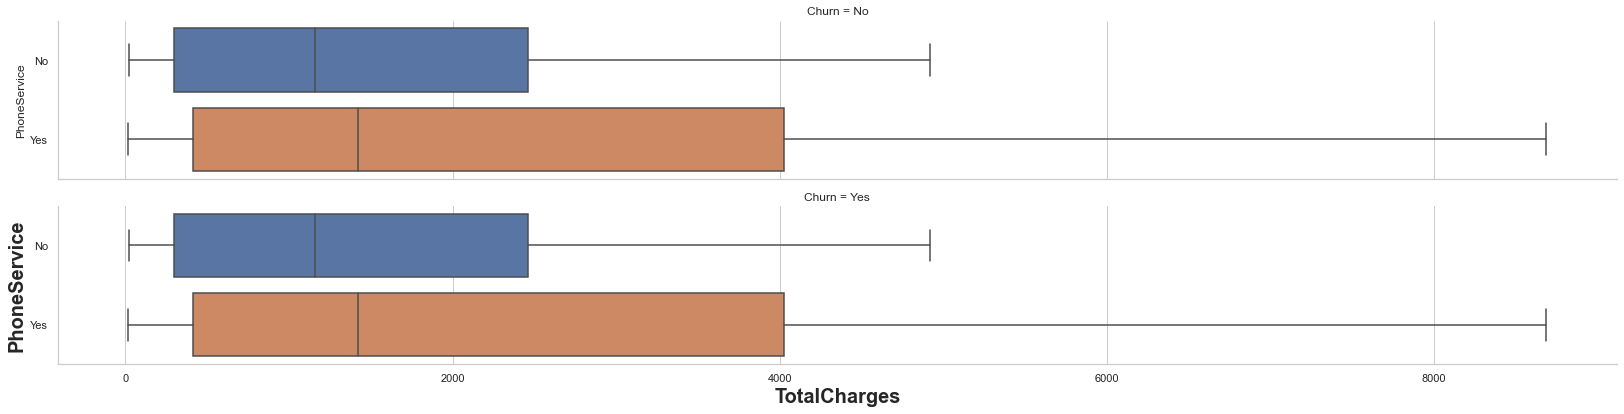

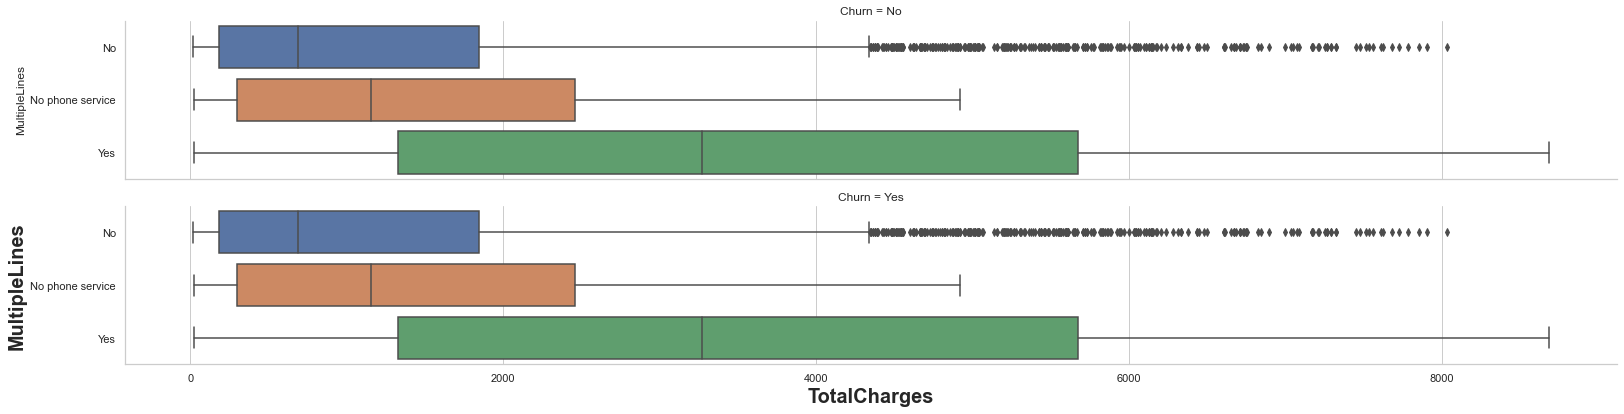

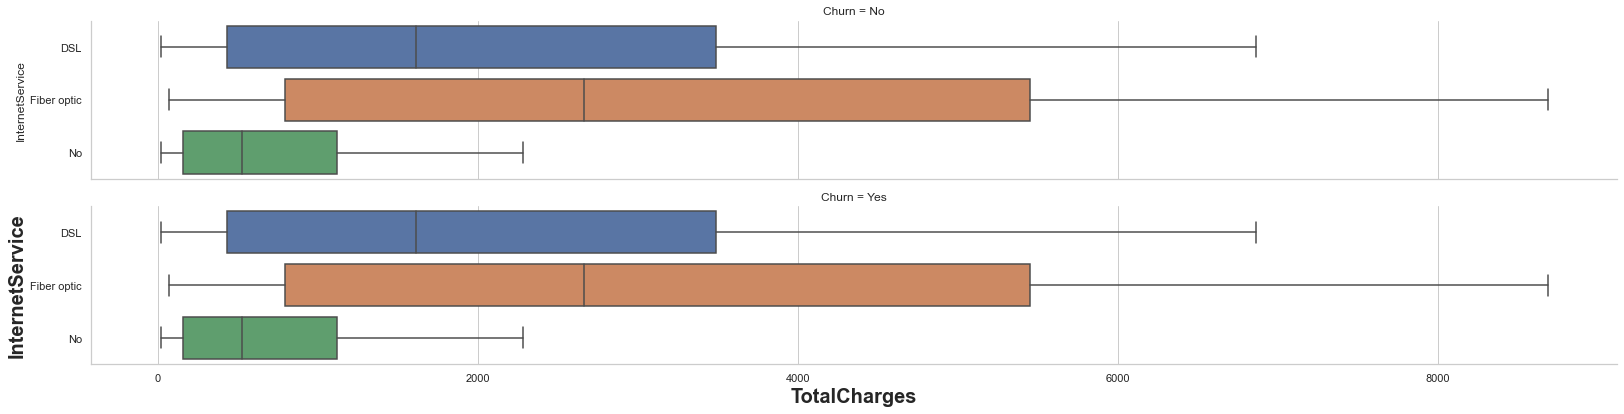

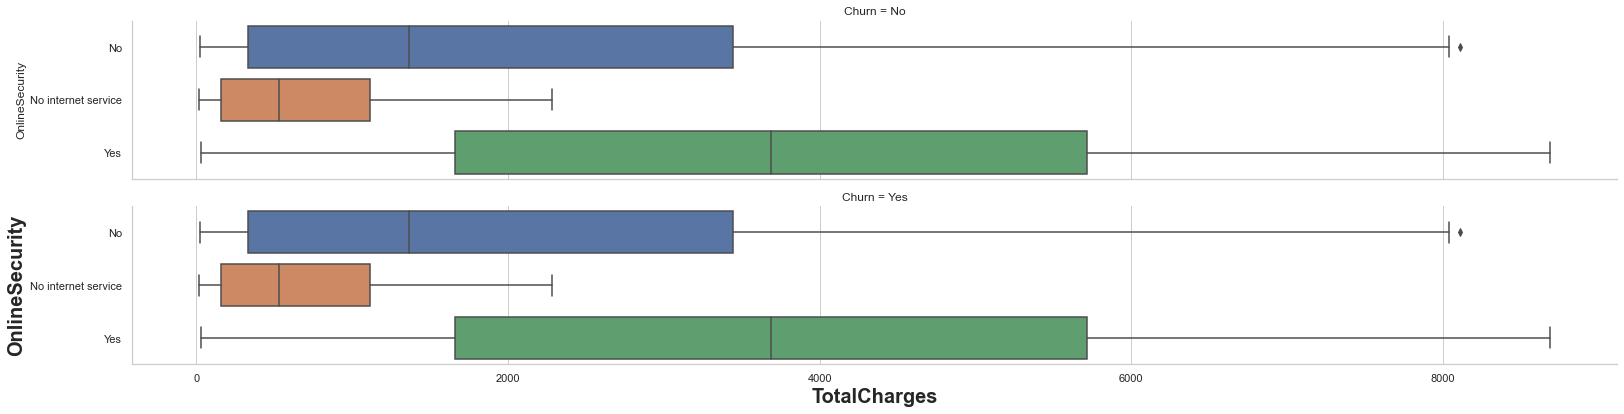

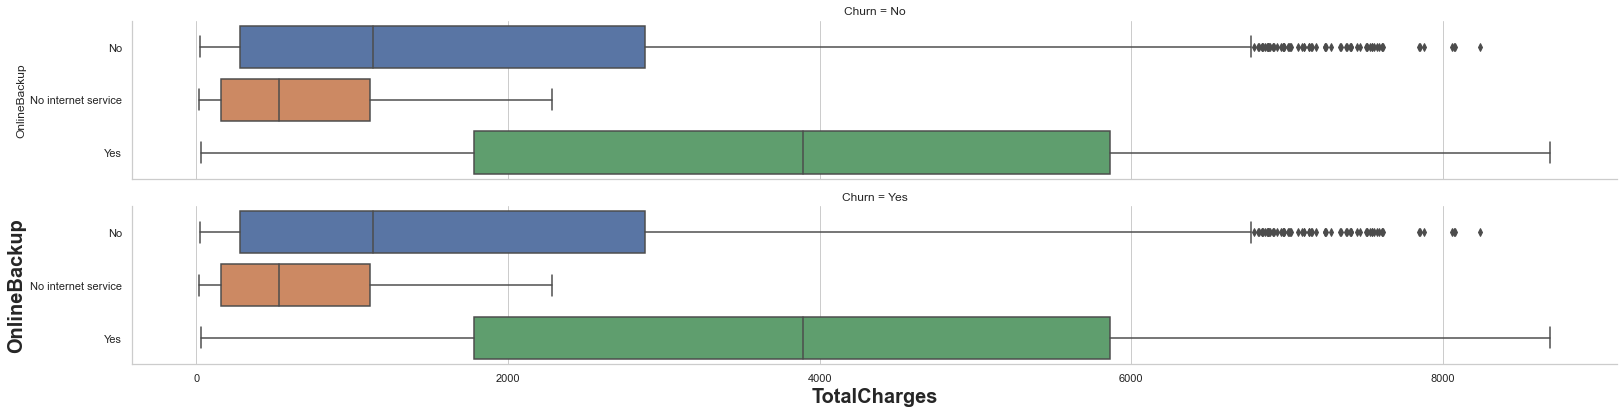

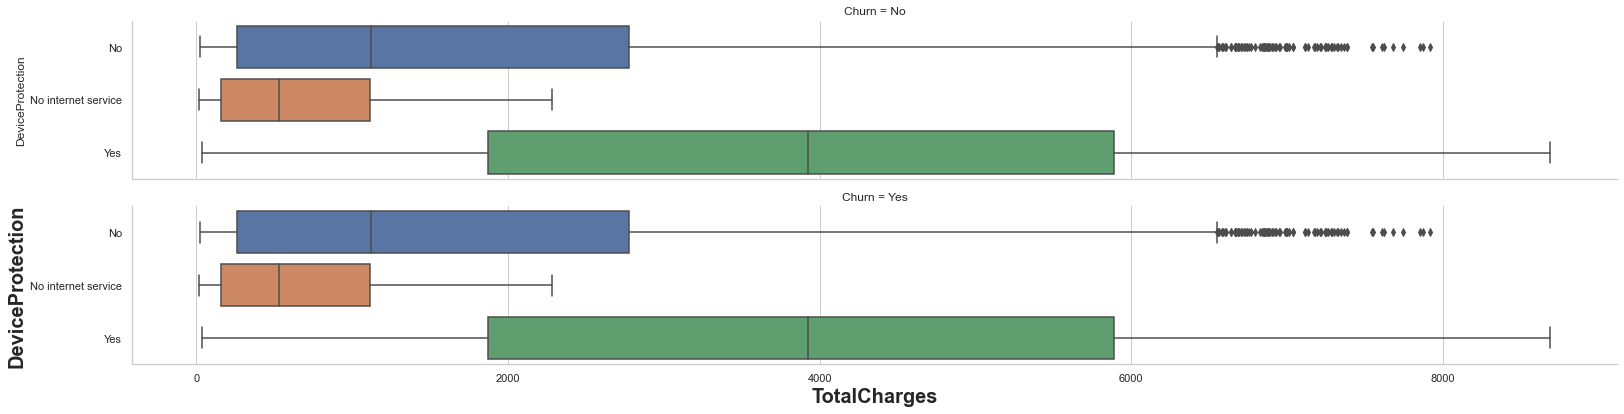

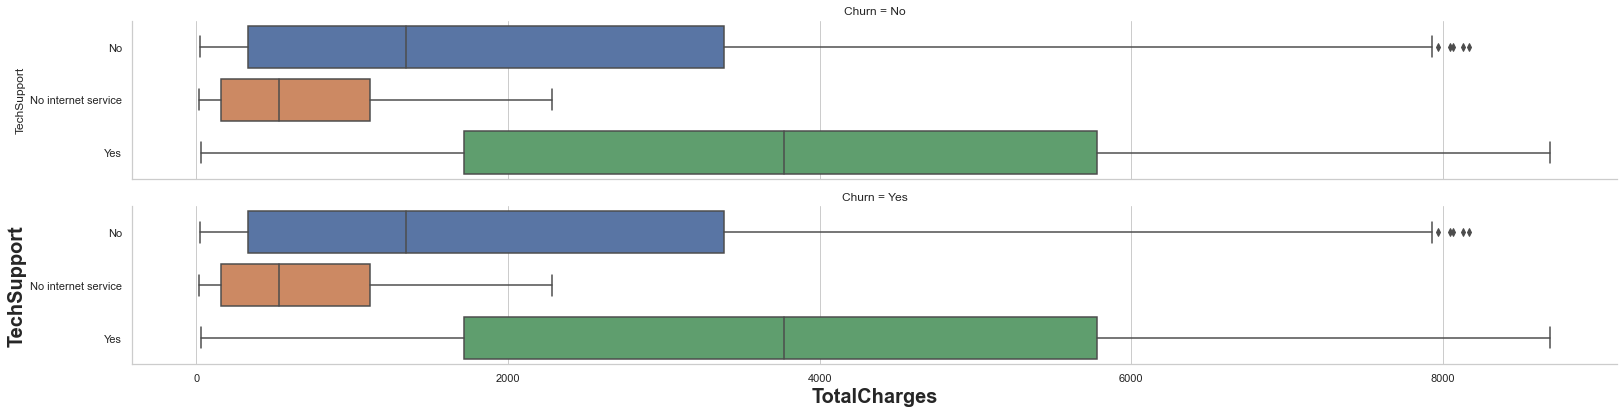

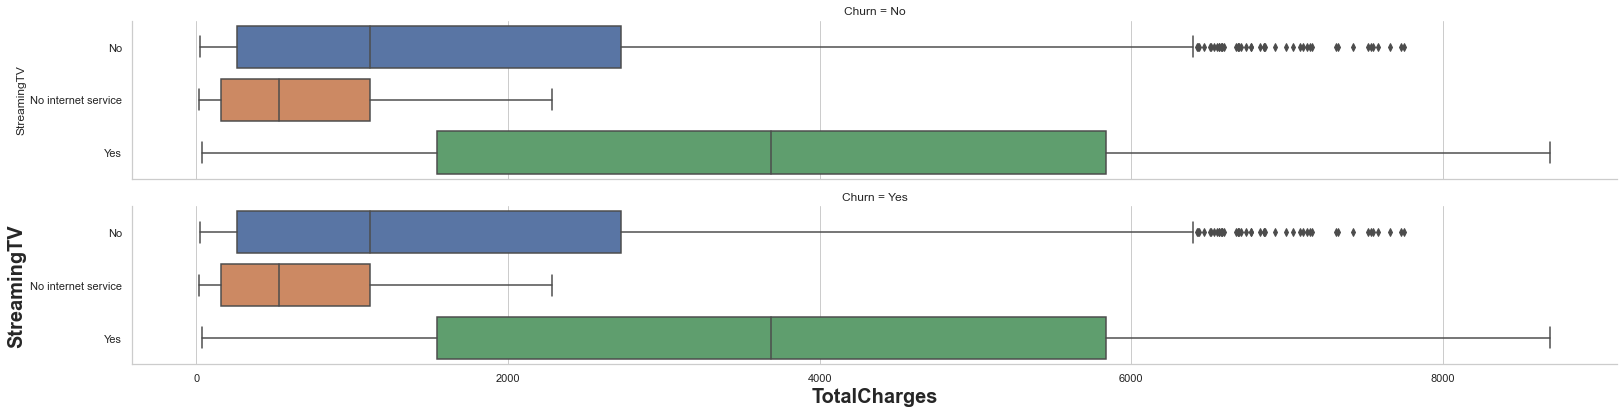

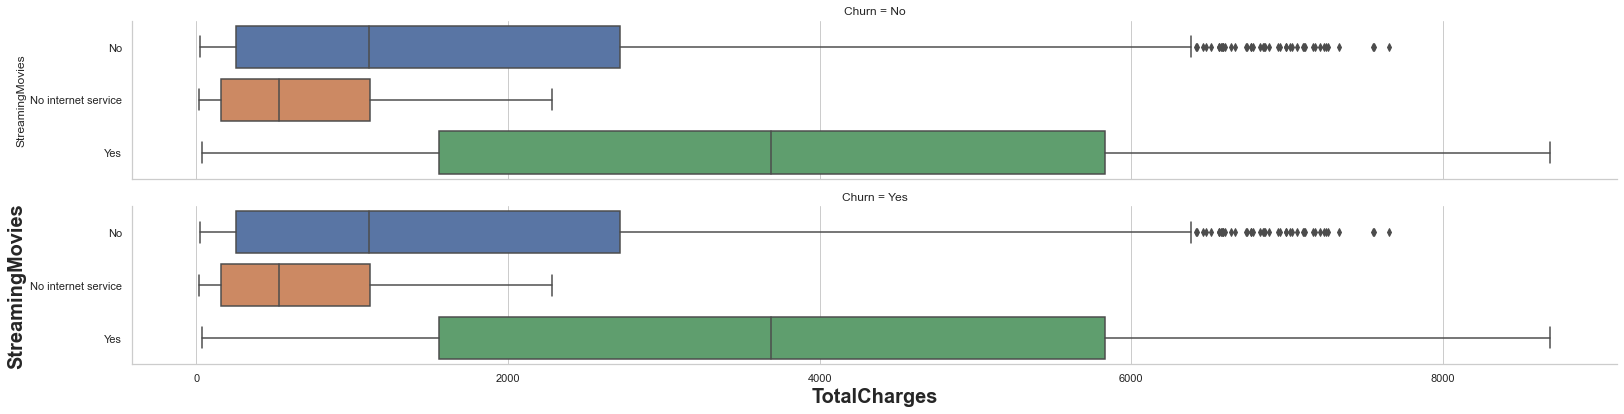

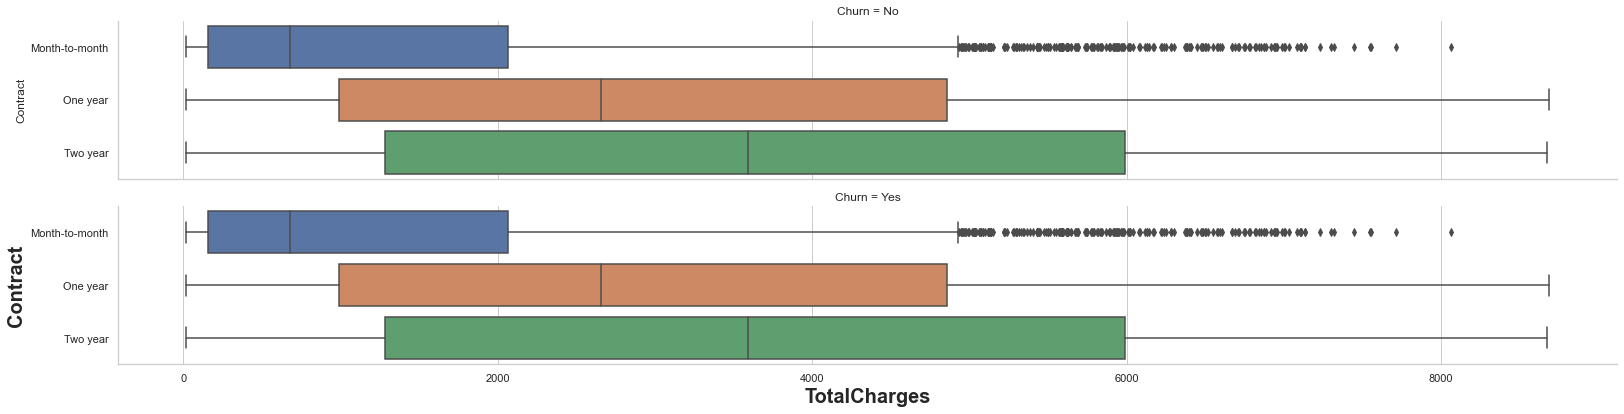

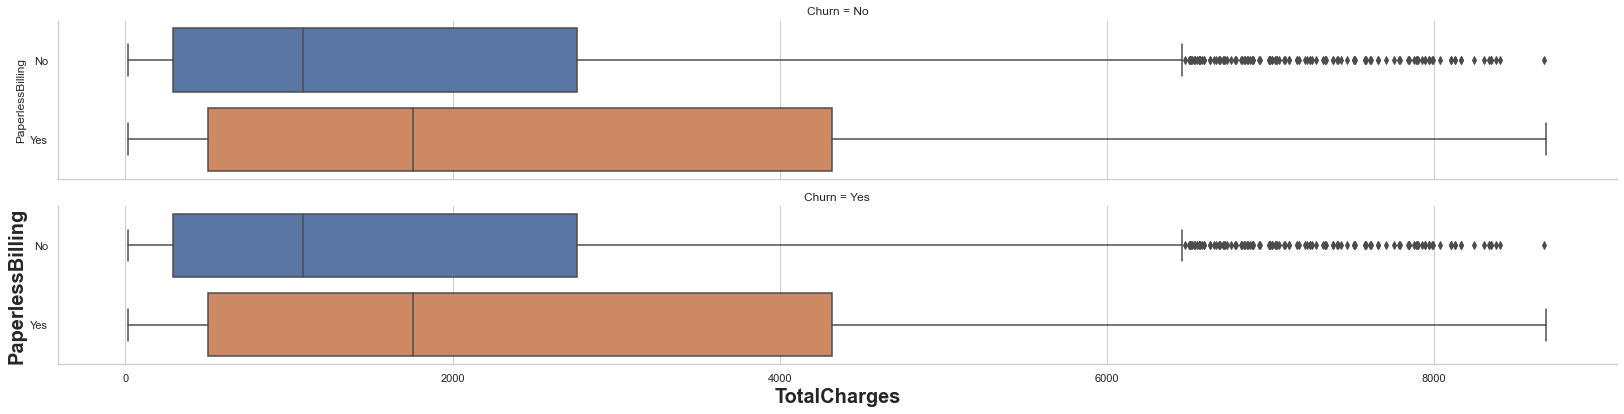

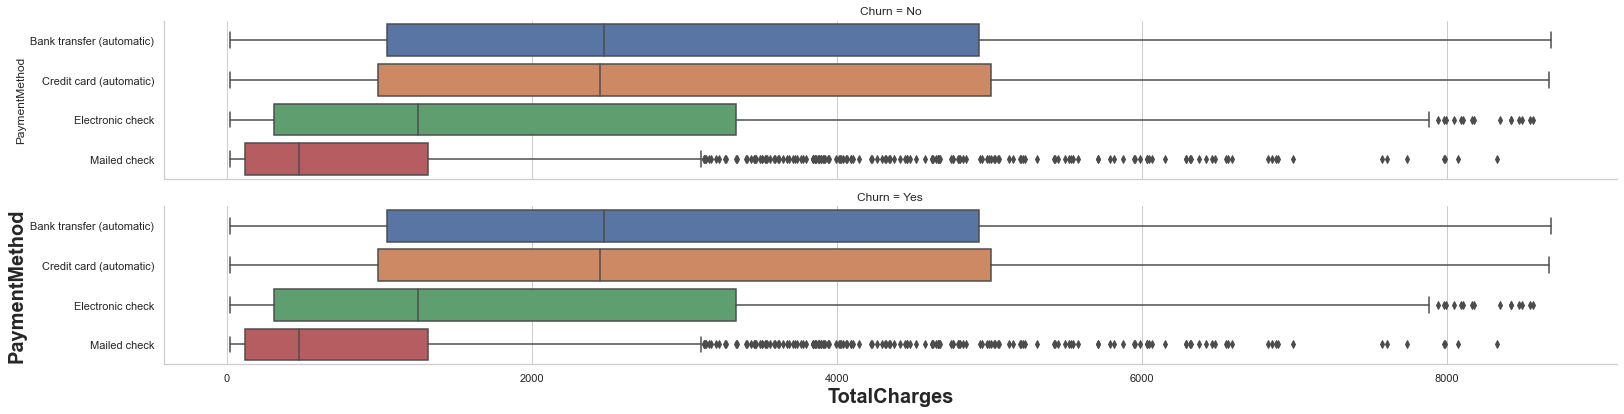

In [34]:
for i in num_cols:
    for j in cat_cols:
        sns.catplot(x = data[i], y = data[j], row = 'Churn', kind = 'box', orient = 'h', height = 2.8, aspect = 8, 
            data = data)
        plt.xlabel(i,fontsize=20,fontweight='bold')
        plt.ylabel(j,fontsize=20,fontweight='bold')
        plt.show()

### Data Analysis 

##### Analysis on categorical columns

In [35]:
for i in cat_cols:
    cross_tab=pd.crosstab(data['Churn'],data[i])
    chi_sq_Stat, p_val, deg_freedom, exp_freq=chi2_contingency(cross_tab)
    if p_val<0.05:
        print("Reject the null hypothesis of {} : {} pval".format(i,p_val),"  not the same  and has effect")
    else:
        print("Fail to Reject the null hypothesis of {} : {} pval".format(i,p_val)," are the same  and has no effect ")

Fail to Reject the null hypothesis of gender : 0.48657873605618596 pval  are the same  and has no effect 
Reject the null hypothesis of SeniorCitizen : 1.510066805092378e-36 pval   not the same  and has effect
Reject the null hypothesis of Partner : 2.1399113440759935e-36 pval   not the same  and has effect
Reject the null hypothesis of Dependents : 4.9249216612154196e-43 pval   not the same  and has effect
Fail to Reject the null hypothesis of PhoneService : 0.3387825358066928 pval  are the same  and has no effect 
Reject the null hypothesis of MultipleLines : 0.0034643829548773 pval   not the same  and has effect
Reject the null hypothesis of InternetService : 9.571788222840544e-160 pval   not the same  and has effect
Reject the null hypothesis of OnlineSecurity : 2.6611496351768565e-185 pval   not the same  and has effect
Reject the null hypothesis of OnlineBackup : 2.0797592160865457e-131 pval   not the same  and has effect
Reject the null hypothesis of DeviceProtection : 5.5052194

### Therefore gender and phoneservice is of no use 

In [36]:
data.drop(['gender','PhoneService'],axis=1,inplace=True)

#### Analysis on  Numerical columns

In [37]:
for i in num_cols:
    x=data[data['Churn']=="Yes"][i]
    y=data[data['Churn']=="No"][i]
    stats,pval=ztest(x,y)
    if pval<0.05:
        print("Reject the null hypothesis of {} since the pvalue {} ".format(i,pval))
    else:
        print("Fail to reject  the null hypothesis of {} since the pvalue {} ".format(i,pval))

Reject the null hypothesis of tenure since the pvalue 7.048598128156636e-219 
Reject the null hypothesis of MonthlyCharges since the pvalue 1.9953885912944285e-61 
Reject the null hypothesis of TotalCharges since the pvalue 2.1958906787460366e-65 


In [38]:
cat=data.select_dtypes(include="category" ).columns

#### columns which has less than 2 unique values has order therefore we convert them by using LabelEncoders

In [39]:
label=LabelEncoder()
dum=[]
for i in cat:
    if data[i].nunique()<=2 :
        data[i]=label.fit_transform(data[i])
    
    elif data[i].nunique()>2:
        dum.append(i)
    else: 
        pass

In [40]:
dum_rep=['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract']
for i in dum_rep:
    data[i]=label.fit_transform(data[i])

In [42]:
data["InternetService"]=data["InternetService"].replace(0,"No")

In [43]:
data["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

##### Therefore InternetServise and payment method has no order  therefore we convert them using onehotencoding

In [49]:
data=pd.get_dummies(data,columns=["InternetService"],drop_first=True)

In [44]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [45]:
data=pd.get_dummies(data,columns=["PaymentMethod"],drop_first=True)

In [50]:
data["Churn"]=data["Churn"].astype("category")

## Data pre-processing

##### Sepreating features and target values 

In [53]:
y=data[['Churn']]
x=data.drop("Churn",axis=1)

##### Remove the unwanted features and check for multi collinearity

In [59]:
X=sm.add_constant(x)
result=sm.Logit(y,X).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.413934
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7022
Method:                           MLE   Df Model:                           20
Date:                Wed, 29 Sep 2021   Pseudo R-squ.:                  0.2846
Time:                        21:48:39   Log-Likelihood:                -2915.3
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.5178      0.271      1.908      0.056      -0.014       1.050
SeniorCitizen                             0.2137      0.085      2.528      0.011       0.048       0.379
Partner                                  -0.0027      0.078     -0.035      0.972      -0.155       0.150
Dependents                               -0.1552      0.090     -1.731      0.084      -0.331       0.021
tenure                                   -0.0584      0.006     -9.701      0.000      -0.070      -0.047
MultipleLines                             0.1792      0.040      4.435      0.000       0.100       0.258
OnlineSecurity                           -0.1454      0.045     -3.242      0.001      -0.233      -0.058
OnlineBackup                             -0.0299      0.041     -0.735      0.462      -0.109       0.050
DeviceProtection                          0.0309      0.042      0.744      0.457      -0.051       0.112
TechSupport                              -0.1329      0.045     -2.934      0.003      -0.222      -0.044
StreamingTV                               0.2092      0.048      4.332      0.000       0.115       0.304
StreamingMovies                           0.2159      0.048      4.511      0.000       0.122       0.310
Contract                                 -0.6874      0.077     -8.930      0.000      -0.838      -0.537
PaperlessBilling                          0.3425      0.074      4.601      0.000       0.197       0.488
MonthlyCharges                           -0.0228      0.006     -3.945      0.000      -0.034      -0.011
TotalCharges                              0.0003   6.88e-05      4.462      0.000       0.000       0.000
PaymentMethod_Credit card (automatic)    -0.0866      0.114     -0.759      0.448      -0.310       0.137
PaymentMethod_Electronic check            0.3054      0.094      3.233      0.001       0.120       0.491
PaymentMethod_Mailed check               -0.0560      0.115     -0.488      0.626      -0.281       0.169
InternetService_Fiber optic               1.3228      0.201      6.593      0.000       0.930       1.716
InternetService_No                       -1.4952      0.252     -5.938      0.000      -1.989      -1.002
=========================================================================================================
"""

In [71]:
df=pd.DataFrame()
df["Feature"]=x.columns
df["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])] 
df["VIF"]=round(df["VIF"],2)
df=df.sort_values(by="VIF",ascending=False)
df

Feature    VIF
13                         MonthlyCharges  37.22
14                           TotalCharges  17.67
3                                  tenure  17.31
18            InternetService_Fiber optic   8.90
19                     InternetService_No   4.65
11                               Contract   4.20
10                        StreamingMovies   3.63
9                             StreamingTV   3.59
12                       PaperlessBilling   2.90
7                        DeviceProtection   2.84
1                                 Partner   2.83
16         PaymentMethod_Electronic check   2.78
8                             TechSupport   2.75
4                           MultipleLines   2.75
6                            OnlineBackup   2.74
5                          OnlineSecurity   2.65
17             PaymentMethod_Mailed check   2.21
2                              Dependents   1.97
15  PaymentMethod_Credit card (automatic)   1.92
0                           SeniorCitizen   1.37

##### Since MonthlyCharges has more VIF than any other features we drop the value

In [72]:
x.drop("MonthlyCharges",axis=1,inplace=True)

In [73]:
df=pd.DataFrame()
df["Feature"]=x.columns
df["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])] 
df["VIF"]=round(df["VIF"],2)
df=df.sort_values(by="VIF",ascending=False)
df

Feature    VIF
13                           TotalCharges  17.05
3                                  tenure  16.41
11                               Contract   4.19
17            InternetService_Fiber optic   3.35
10                        StreamingMovies   3.15
9                             StreamingTV   3.13
1                                 Partner   2.81
18                     InternetService_No   2.79
12                       PaperlessBilling   2.70
7                        DeviceProtection   2.65
4                           MultipleLines   2.56
6                            OnlineBackup   2.51
8                             TechSupport   2.43
5                          OnlineSecurity   2.29
15         PaymentMethod_Electronic check   2.28
2                              Dependents   1.96
16             PaymentMethod_Mailed check   1.72
14  PaymentMethod_Credit card (automatic)   1.71
0                           SeniorCitizen   1.37

#### Similarly TotalCharges

In [74]:
x.drop("TotalCharges",axis=1,inplace=True)

In [75]:
df=pd.DataFrame()
df["Feature"]=x.columns
df["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])] 
df["VIF"]=round(df["VIF"],2)
df=df.sort_values(by="VIF",ascending=False)
df

Feature   VIF
3                                  tenure  7.38
11                               Contract  4.18
10                        StreamingMovies  3.03
9                             StreamingTV  3.01
1                                 Partner  2.81
16            InternetService_Fiber optic  2.74
12                       PaperlessBilling  2.65
7                        DeviceProtection  2.59
4                           MultipleLines  2.55
6                            OnlineBackup  2.41
8                             TechSupport  2.40
5                          OnlineSecurity  2.25
14         PaymentMethod_Electronic check  2.12
2                              Dependents  1.95
17                     InternetService_No  1.74
15             PaymentMethod_Mailed check  1.69
13  PaymentMethod_Credit card (automatic)  1.67
0                           SeniorCitizen  1.36

##### Similarly tenure

In [76]:
x.drop("tenure",axis=1,inplace=True)

In [77]:
df=pd.DataFrame()
df["Feature"]=x.columns
df["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])] 
df["VIF"]=round(df["VIF"],2)
df=df.sort_values(by="VIF",ascending=False)
df

Feature   VIF
9                         StreamingMovies  3.02
8                             StreamingTV  3.00
10                               Contract  3.00
15            InternetService_Fiber optic  2.70
1                                 Partner  2.69
11                       PaperlessBilling  2.63
6                        DeviceProtection  2.55
3                           MultipleLines  2.39
7                             TechSupport  2.38
5                            OnlineBackup  2.28
4                          OnlineSecurity  2.19
13         PaymentMethod_Electronic check  2.11
2                              Dependents  1.95
16                     InternetService_No  1.73
12  PaymentMethod_Credit card (automatic)  1.67
14             PaymentMethod_Mailed check  1.66
0                           SeniorCitizen  1.36

##### Now we can see that there is a no correlation between the values

<AxesSubplot:>

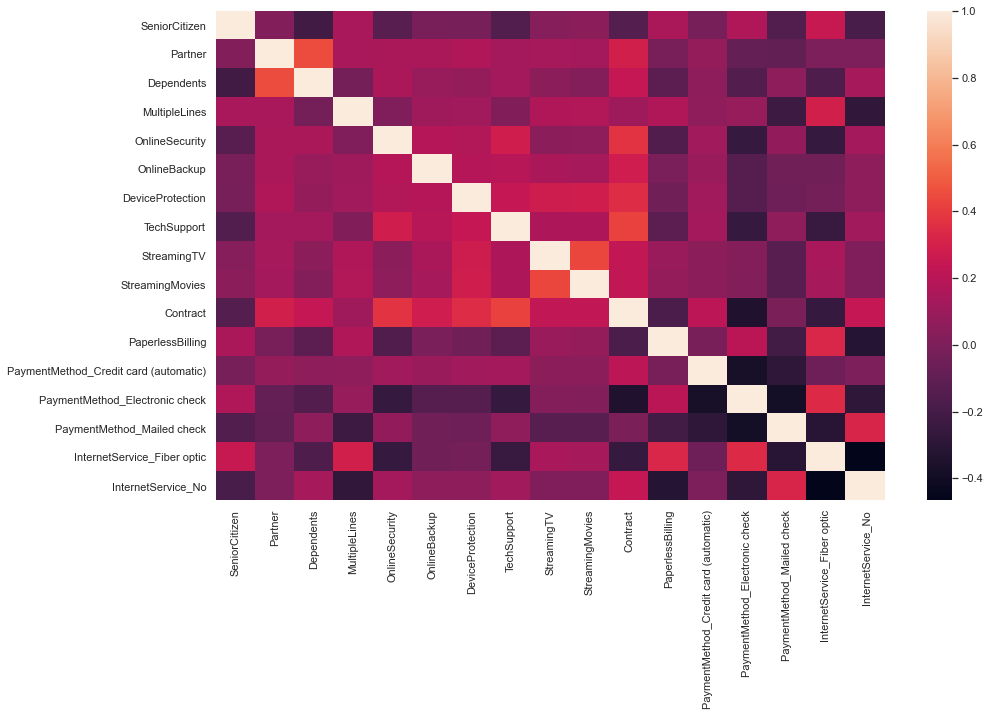

In [105]:
sns.heatmap(x.corr())

In [81]:
x.corr().style.background_gradient("magma")

#### now we can clearly see that there is no correlation between the variables 

#### Check for target balancing and fix it if found imbalanced

<AxesSubplot:ylabel='None'>

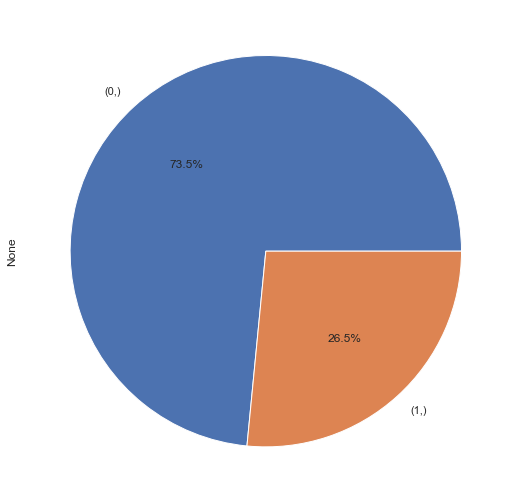

In [90]:
y.value_counts().plot.pie(autopct="%1.1f%%",radius=1)

#### • Perform train-test split.

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.30)

In [97]:
stats,pval=ztest(x.all(),x_train.all())
if pval<0.5:
    print("Values are different from the mean")
else:
    print("Values are not differnt from the mean ")

Values are not differnt from the mean 


In [98]:
stats,pval=ztest(x.all(),x_test.all())
if pval<0.5:
    print("Values are different from the mean")
else:
    print("Values are not differnt from the mean ")

Values are not differnt from the mean 


#### Handiling data imbalance of the system

In [ ]:
sm=SMOTE()
X_train_sm,Y_train_sm=sm.resample(x_train,y_train)

In [112]:
kfold=StratifiedKFold(n_splits=10)
for train,test in kfold.split(x,y):
    X_train,X_test=x.iloc[train],x.iloc[test]
    Y_train,Y_test=y.iloc[train],y.iloc[test]
    sm=SMOTE()
    X_train_sm,Y_train_sm=sm.fit_resample(X_train,Y_train)

Text(0.5, 1.0, 'Balanced Data')

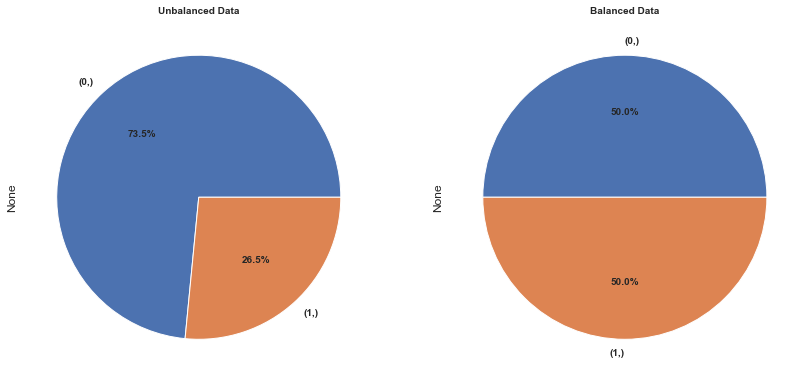

In [125]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,8))
Y_train.value_counts().plot(kind='pie',autopct='%1.1f%%',ax=ax1,radius=1,textprops={'fontsize':10,'fontweight':'bold'})
ax1.set_title('Unbalanced Data',fontweight='bold',fontsize=10)
Y_train_sm.value_counts().plot(kind='pie',autopct='%1.1f%%',ax=ax2,radius=1,textprops={'fontsize':10,'fontweight':'bold'})
ax2.set_title('Balanced Data',fontweight='bold',fontsize=10)

##### Model training, testing and tuning

In [130]:
models=[]
log_reg=LogisticRegression()
naive_gaus=GaussianNB()
categorial_nb=CategoricalNB()
knn=KNeighborsClassifier()
svm=SVC()
dtree=DecisionTreeClassifier()
bagg=BaggingClassifier()
adaboost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
rfc=RandomForestClassifier()
catboost=CatBoostClassifier()
lGBM=LGBMClassifier()
XGboost=XGBClassifier()

In [131]:
models.append(('Logistic',log_reg))
models.append(('Naive_NB',naive_gaus))
models.append(('Categorical_NB',categorial_nb))
models.append(('KNN',knn))
models.append(('SVC',svm))
models.append(('DTREE',dtree))
models.append(('BAGGING',bagg))
models.append(('AdaBoost',adaboost))
models.append(('GradientBOOST',gboost))
models.append(('RandomForest',rfc))
models.append(('CatBoost',catboost))
models.append(('LightGBM',lGBM))
models.append(('XGBoost',XGboost))

In [175]:
def score(model,x_train,x_test,y_train,y_test):
    start=time.time()
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    f1_score=metrics.f1_score(y_test,yhat)
    recall_score=metrics.recall_score(y_test,yhat)
    roc_auc_score=metrics.roc_auc_score(y_test,yhat)
    end=time.time()
    duration=round(end-start,4)
    return train_score,test_score,f1_score,recall_score,roc_auc_score,duration
values={}
for name,model in models :
    values[name]=score(model,X_train_sm,X_test,Y_train_sm,Y_test)

Learning rate set to 0.026715
0:	learn: 0.6800606	total: 9.1ms	remaining: 9.09s
1:	learn: 0.6678954	total: 18.1ms	remaining: 9.05s
2:	learn: 0.6562332	total: 27ms	remaining: 8.98s
3:	learn: 0.6446211	total: 35.6ms	remaining: 8.86s
4:	learn: 0.6346217	total: 44.8ms	remaining: 8.91s
5:	learn: 0.6254028	total: 54.6ms	remaining: 9.05s
6:	learn: 0.6178013	total: 61.2ms	remaining: 8.69s
7:	learn: 0.6097132	total: 69.7ms	remaining: 8.64s
8:	learn: 0.6023234	total: 78.2ms	remaining: 8.61s
9:	learn: 0.5941379	total: 87.1ms	remaining: 8.62s
10:	learn: 0.5873968	total: 95.8ms	remaining: 8.61s
11:	learn: 0.5809008	total: 105ms	remaining: 8.62s
12:	learn: 0.5747948	total: 114ms	remaining: 8.62s
13:	learn: 0.5692706	total: 122ms	remaining: 8.61s
14:	learn: 0.5637217	total: 131ms	remaining: 8.6s
15:	learn: 0.5582333	total: 140ms	remaining: 8.6s
16:	learn: 0.5538414	total: 149ms	remaining: 8.63s
17:	learn: 0.5493955	total: 158ms	remaining: 8.6s
18:	learn: 0.5454034	total: 166ms	remaining: 8.58s
19:	le

162:	learn: 0.4391121	total: 1.57s	remaining: 8.08s
163:	learn: 0.4389592	total: 1.58s	remaining: 8.07s
164:	learn: 0.4387308	total: 1.59s	remaining: 8.07s
165:	learn: 0.4385192	total: 1.6s	remaining: 8.06s
166:	learn: 0.4383027	total: 1.61s	remaining: 8.05s
167:	learn: 0.4381049	total: 1.62s	remaining: 8.04s
168:	learn: 0.4378363	total: 1.63s	remaining: 8.03s
169:	learn: 0.4376442	total: 1.64s	remaining: 8.02s
170:	learn: 0.4374612	total: 1.65s	remaining: 8s
171:	learn: 0.4372824	total: 1.66s	remaining: 7.99s
172:	learn: 0.4369889	total: 1.67s	remaining: 7.97s
173:	learn: 0.4367784	total: 1.68s	remaining: 7.96s
174:	learn: 0.4364765	total: 1.69s	remaining: 7.95s
175:	learn: 0.4363715	total: 1.69s	remaining: 7.93s
176:	learn: 0.4361775	total: 1.7s	remaining: 7.92s
177:	learn: 0.4359296	total: 1.71s	remaining: 7.91s
178:	learn: 0.4359288	total: 1.72s	remaining: 7.88s
179:	learn: 0.4358057	total: 1.73s	remaining: 7.87s
180:	learn: 0.4356623	total: 1.74s	remaining: 7.86s
181:	learn: 0.435

332:	learn: 0.4140410	total: 3.1s	remaining: 6.22s
333:	learn: 0.4139642	total: 3.11s	remaining: 6.21s
334:	learn: 0.4137949	total: 3.13s	remaining: 6.2s
335:	learn: 0.4136567	total: 3.13s	remaining: 6.19s
336:	learn: 0.4135786	total: 3.14s	remaining: 6.18s
337:	learn: 0.4134385	total: 3.15s	remaining: 6.17s
338:	learn: 0.4132973	total: 3.16s	remaining: 6.16s
339:	learn: 0.4131770	total: 3.17s	remaining: 6.15s
340:	learn: 0.4130092	total: 3.18s	remaining: 6.14s
341:	learn: 0.4128719	total: 3.19s	remaining: 6.13s
342:	learn: 0.4127145	total: 3.19s	remaining: 6.12s
343:	learn: 0.4125643	total: 3.2s	remaining: 6.11s
344:	learn: 0.4125057	total: 3.21s	remaining: 6.1s
345:	learn: 0.4123998	total: 3.22s	remaining: 6.09s
346:	learn: 0.4122775	total: 3.23s	remaining: 6.08s
347:	learn: 0.4121421	total: 3.24s	remaining: 6.07s
348:	learn: 0.4120030	total: 3.25s	remaining: 6.06s
349:	learn: 0.4119049	total: 3.26s	remaining: 6.05s
350:	learn: 0.4118875	total: 3.27s	remaining: 6.04s
351:	learn: 0.41

503:	learn: 0.3927589	total: 4.68s	remaining: 4.6s
504:	learn: 0.3926422	total: 4.69s	remaining: 4.6s
505:	learn: 0.3925514	total: 4.7s	remaining: 4.59s
506:	learn: 0.3924705	total: 4.71s	remaining: 4.58s
507:	learn: 0.3923375	total: 4.72s	remaining: 4.57s
508:	learn: 0.3922448	total: 4.73s	remaining: 4.56s
509:	learn: 0.3921339	total: 4.74s	remaining: 4.55s
510:	learn: 0.3920247	total: 4.74s	remaining: 4.54s
511:	learn: 0.3918901	total: 4.75s	remaining: 4.53s
512:	learn: 0.3917855	total: 4.76s	remaining: 4.52s
513:	learn: 0.3916905	total: 4.77s	remaining: 4.51s
514:	learn: 0.3916012	total: 4.78s	remaining: 4.5s
515:	learn: 0.3914866	total: 4.79s	remaining: 4.49s
516:	learn: 0.3914176	total: 4.8s	remaining: 4.48s
517:	learn: 0.3913004	total: 4.81s	remaining: 4.47s
518:	learn: 0.3911875	total: 4.82s	remaining: 4.46s
519:	learn: 0.3911079	total: 4.83s	remaining: 4.45s
520:	learn: 0.3910120	total: 4.83s	remaining: 4.44s
521:	learn: 0.3909265	total: 4.84s	remaining: 4.43s
522:	learn: 0.390

670:	learn: 0.3775903	total: 6.22s	remaining: 3.05s
671:	learn: 0.3775137	total: 6.23s	remaining: 3.04s
672:	learn: 0.3774784	total: 6.24s	remaining: 3.03s
673:	learn: 0.3774397	total: 6.25s	remaining: 3.02s
674:	learn: 0.3773853	total: 6.26s	remaining: 3.01s
675:	learn: 0.3773190	total: 6.27s	remaining: 3s
676:	learn: 0.3772361	total: 6.28s	remaining: 3s
677:	learn: 0.3772032	total: 6.29s	remaining: 2.98s
678:	learn: 0.3771326	total: 6.29s	remaining: 2.98s
679:	learn: 0.3770186	total: 6.3s	remaining: 2.97s
680:	learn: 0.3769406	total: 6.31s	remaining: 2.96s
681:	learn: 0.3768740	total: 6.32s	remaining: 2.95s
682:	learn: 0.3768284	total: 6.33s	remaining: 2.94s
683:	learn: 0.3767095	total: 6.34s	remaining: 2.93s
684:	learn: 0.3766649	total: 6.35s	remaining: 2.92s
685:	learn: 0.3766330	total: 6.36s	remaining: 2.91s
686:	learn: 0.3765618	total: 6.37s	remaining: 2.9s
687:	learn: 0.3764721	total: 6.38s	remaining: 2.89s
688:	learn: 0.3763975	total: 6.38s	remaining: 2.88s
689:	learn: 0.376324

841:	learn: 0.3656178	total: 7.8s	remaining: 1.46s
842:	learn: 0.3655386	total: 7.82s	remaining: 1.46s
843:	learn: 0.3654643	total: 7.83s	remaining: 1.45s
844:	learn: 0.3654115	total: 7.83s	remaining: 1.44s
845:	learn: 0.3653860	total: 7.84s	remaining: 1.43s
846:	learn: 0.3653259	total: 7.85s	remaining: 1.42s
847:	learn: 0.3653094	total: 7.86s	remaining: 1.41s
848:	learn: 0.3652224	total: 7.87s	remaining: 1.4s
849:	learn: 0.3651657	total: 7.88s	remaining: 1.39s
850:	learn: 0.3650984	total: 7.89s	remaining: 1.38s
851:	learn: 0.3650162	total: 7.9s	remaining: 1.37s
852:	learn: 0.3649227	total: 7.91s	remaining: 1.36s
853:	learn: 0.3648871	total: 7.92s	remaining: 1.35s
854:	learn: 0.3648165	total: 7.93s	remaining: 1.34s
855:	learn: 0.3647579	total: 7.94s	remaining: 1.33s
856:	learn: 0.3647010	total: 7.95s	remaining: 1.32s
857:	learn: 0.3646536	total: 7.95s	remaining: 1.32s
858:	learn: 0.3646013	total: 7.96s	remaining: 1.31s
859:	learn: 0.3645783	total: 7.97s	remaining: 1.3s
860:	learn: 0.36

[15:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [177]:
pd.DataFrame(values,index=['train_score','test_score','f1_score','recall_score','roc_auc_score','Duration']).T.sort_values(by=["Duration","f1_score","roc_auc_score"],ascending=True)

train_score  test_score  f1_score  recall_score  \
Categorical_NB     0.751557    0.680398  0.576271      0.818182   
Naive_NB           0.763045    0.731534  0.602105      0.764706   
DTREE              0.898003    0.710227  0.511962      0.572193   
Logistic           0.773889    0.738636  0.615063      0.786096   
BAGGING            0.894030    0.714489  0.535797      0.620321   
LightGBM           0.824673    0.750000  0.603604      0.716578   
AdaBoost           0.773996    0.730114  0.605809      0.780749   
GradientBOOST      0.784733    0.750000  0.610619      0.737968   
XGBoost            0.862036    0.731534  0.571429      0.673797   
RandomForest       0.897896    0.741477  0.564593      0.631016   
KNN                0.828108    0.705966  0.560510      0.705882   
CatBoost           0.846790    0.742898  0.583908      0.679144   
SVC                0.797831    0.737216  0.595186      0.727273   

                roc_auc_score  Duration  
Categorical_NB       0.724371    0.0447  
Naive_NB             0.742121    0.0501  
DTREE                0.666174    0.0562  
Logistic             0.753783    0.1146  
BAGGING              0.684435    0.2867  
LightGBM             0.739333    0.3288  
AdaBoost             0.746274    0.5920  
GradientBOOST        0.746160    1.1353  
XGBoost              0.713107    1.1429  
RandomForest         0.706224    1.4054  
KNN                  0.705939    3.5805  
CatBoost             0.722551    9.5974  
SVC                  0.734043   15.4510

##### it is very much clear that the ensemble models are doing better than other models in terms of scores but they do take some time to process the information comparably 

In [182]:
for name,model in models:
    print("Model Name :",name.upper())
    model.fit(X_train_sm,Y_train_sm)
    yhat=model.predict(X_test)
    print("Confusion Matric \n",confusion_matrix(Y_test,yhat))
    print("Classification Report:\n",classification_report(Y_test,yhat))
    print("*"*50)

Model Name : LOGISTIC
Confusion Matric 
 [[373 144]
 [ 40 147]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80       517
           1       0.51      0.79      0.62       187

    accuracy                           0.74       704
   macro avg       0.70      0.75      0.71       704
weighted avg       0.80      0.74      0.75       704

**************************************************
Model Name : NAIVE_NB
Confusion Matric 
 [[372 145]
 [ 44 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80       517
           1       0.50      0.76      0.60       187

    accuracy                           0.73       704
   macro avg       0.70      0.74      0.70       704
weighted avg       0.79      0.73      0.75       704

**************************************************
Model Name : CATEGORICAL_NB
Confusion Matric 
 [[326 191]
 [ 34 153]

72:	learn: 0.4651769	total: 739ms	remaining: 9.38s
73:	learn: 0.4646867	total: 749ms	remaining: 9.38s
74:	learn: 0.4641718	total: 761ms	remaining: 9.38s
75:	learn: 0.4636990	total: 770ms	remaining: 9.36s
76:	learn: 0.4632136	total: 779ms	remaining: 9.34s
77:	learn: 0.4627021	total: 789ms	remaining: 9.32s
78:	learn: 0.4622416	total: 797ms	remaining: 9.3s
79:	learn: 0.4618195	total: 806ms	remaining: 9.27s
80:	learn: 0.4613957	total: 815ms	remaining: 9.25s
81:	learn: 0.4609001	total: 824ms	remaining: 9.22s
82:	learn: 0.4604784	total: 833ms	remaining: 9.2s
83:	learn: 0.4600417	total: 842ms	remaining: 9.18s
84:	learn: 0.4596810	total: 851ms	remaining: 9.16s
85:	learn: 0.4592668	total: 860ms	remaining: 9.14s
86:	learn: 0.4588454	total: 869ms	remaining: 9.12s
87:	learn: 0.4585089	total: 878ms	remaining: 9.1s
88:	learn: 0.4581315	total: 887ms	remaining: 9.08s
89:	learn: 0.4577074	total: 896ms	remaining: 9.06s
90:	learn: 0.4573234	total: 905ms	remaining: 9.04s
91:	learn: 0.4572340	total: 912ms	

236:	learn: 0.4263090	total: 2.27s	remaining: 7.33s
237:	learn: 0.4261853	total: 2.29s	remaining: 7.32s
238:	learn: 0.4260947	total: 2.3s	remaining: 7.32s
239:	learn: 0.4259672	total: 2.31s	remaining: 7.3s
240:	learn: 0.4258717	total: 2.32s	remaining: 7.29s
241:	learn: 0.4258543	total: 2.32s	remaining: 7.28s
242:	learn: 0.4256665	total: 2.33s	remaining: 7.26s
243:	learn: 0.4254806	total: 2.34s	remaining: 7.25s
244:	learn: 0.4254144	total: 2.35s	remaining: 7.24s
245:	learn: 0.4251932	total: 2.36s	remaining: 7.23s
246:	learn: 0.4250816	total: 2.37s	remaining: 7.22s
247:	learn: 0.4250018	total: 2.38s	remaining: 7.21s
248:	learn: 0.4248544	total: 2.38s	remaining: 7.2s
249:	learn: 0.4247510	total: 2.39s	remaining: 7.18s
250:	learn: 0.4247482	total: 2.4s	remaining: 7.16s
251:	learn: 0.4246259	total: 2.41s	remaining: 7.15s
252:	learn: 0.4245604	total: 2.42s	remaining: 7.14s
253:	learn: 0.4245579	total: 2.42s	remaining: 7.11s
254:	learn: 0.4244658	total: 2.43s	remaining: 7.1s
255:	learn: 0.424

406:	learn: 0.4042662	total: 3.81s	remaining: 5.56s
407:	learn: 0.4041097	total: 3.82s	remaining: 5.55s
408:	learn: 0.4039572	total: 3.83s	remaining: 5.54s
409:	learn: 0.4038539	total: 3.84s	remaining: 5.53s
410:	learn: 0.4037682	total: 3.85s	remaining: 5.52s
411:	learn: 0.4036265	total: 3.86s	remaining: 5.51s
412:	learn: 0.4034979	total: 3.87s	remaining: 5.5s
413:	learn: 0.4033842	total: 3.88s	remaining: 5.49s
414:	learn: 0.4032666	total: 3.89s	remaining: 5.48s
415:	learn: 0.4031753	total: 3.9s	remaining: 5.47s
416:	learn: 0.4030249	total: 3.91s	remaining: 5.46s
417:	learn: 0.4029154	total: 3.92s	remaining: 5.45s
418:	learn: 0.4027351	total: 3.93s	remaining: 5.44s
419:	learn: 0.4025696	total: 3.93s	remaining: 5.43s
420:	learn: 0.4023934	total: 3.94s	remaining: 5.42s
421:	learn: 0.4023115	total: 3.95s	remaining: 5.41s
422:	learn: 0.4021987	total: 3.96s	remaining: 5.4s
423:	learn: 0.4020090	total: 3.97s	remaining: 5.39s
424:	learn: 0.4018933	total: 3.98s	remaining: 5.38s
425:	learn: 0.4

569:	learn: 0.3862922	total: 5.32s	remaining: 4.01s
570:	learn: 0.3862071	total: 5.33s	remaining: 4s
571:	learn: 0.3861335	total: 5.34s	remaining: 4s
572:	learn: 0.3860320	total: 5.35s	remaining: 3.99s
573:	learn: 0.3859248	total: 5.36s	remaining: 3.98s
574:	learn: 0.3858513	total: 5.37s	remaining: 3.97s
575:	learn: 0.3857987	total: 5.38s	remaining: 3.96s
576:	learn: 0.3856952	total: 5.39s	remaining: 3.95s
577:	learn: 0.3856107	total: 5.4s	remaining: 3.94s
578:	learn: 0.3855687	total: 5.41s	remaining: 3.93s
579:	learn: 0.3854861	total: 5.42s	remaining: 3.92s
580:	learn: 0.3854146	total: 5.43s	remaining: 3.92s
581:	learn: 0.3852993	total: 5.44s	remaining: 3.9s
582:	learn: 0.3852347	total: 5.45s	remaining: 3.9s
583:	learn: 0.3851498	total: 5.46s	remaining: 3.89s
584:	learn: 0.3850387	total: 5.46s	remaining: 3.88s
585:	learn: 0.3849304	total: 5.47s	remaining: 3.87s
586:	learn: 0.3848366	total: 5.48s	remaining: 3.86s
587:	learn: 0.3847917	total: 5.49s	remaining: 3.85s
588:	learn: 0.3847010

735:	learn: 0.3732026	total: 6.86s	remaining: 2.46s
736:	learn: 0.3731110	total: 6.87s	remaining: 2.45s
737:	learn: 0.3730071	total: 6.88s	remaining: 2.44s
738:	learn: 0.3729378	total: 6.89s	remaining: 2.43s
739:	learn: 0.3728379	total: 6.9s	remaining: 2.42s
740:	learn: 0.3727717	total: 6.91s	remaining: 2.42s
741:	learn: 0.3727051	total: 6.92s	remaining: 2.41s
742:	learn: 0.3726244	total: 6.93s	remaining: 2.4s
743:	learn: 0.3725539	total: 6.94s	remaining: 2.39s
744:	learn: 0.3724234	total: 6.95s	remaining: 2.38s
745:	learn: 0.3723440	total: 6.96s	remaining: 2.37s
746:	learn: 0.3722824	total: 6.97s	remaining: 2.36s
747:	learn: 0.3722196	total: 6.99s	remaining: 2.35s
748:	learn: 0.3721077	total: 7s	remaining: 2.34s
749:	learn: 0.3720073	total: 7s	remaining: 2.33s
750:	learn: 0.3719286	total: 7.02s	remaining: 2.33s
751:	learn: 0.3718485	total: 7.03s	remaining: 2.32s
752:	learn: 0.3717536	total: 7.04s	remaining: 2.31s
753:	learn: 0.3716533	total: 7.05s	remaining: 2.3s
754:	learn: 0.3715725

899:	learn: 0.3616997	total: 8.42s	remaining: 936ms
900:	learn: 0.3616226	total: 8.43s	remaining: 926ms
901:	learn: 0.3615321	total: 8.44s	remaining: 917ms
902:	learn: 0.3614411	total: 8.45s	remaining: 908ms
903:	learn: 0.3613761	total: 8.46s	remaining: 899ms
904:	learn: 0.3613190	total: 8.47s	remaining: 889ms
905:	learn: 0.3612835	total: 8.48s	remaining: 880ms
906:	learn: 0.3612590	total: 8.49s	remaining: 871ms
907:	learn: 0.3612018	total: 8.5s	remaining: 861ms
908:	learn: 0.3611431	total: 8.51s	remaining: 852ms
909:	learn: 0.3611059	total: 8.52s	remaining: 842ms
910:	learn: 0.3610278	total: 8.53s	remaining: 833ms
911:	learn: 0.3610099	total: 8.54s	remaining: 824ms
912:	learn: 0.3609378	total: 8.54s	remaining: 814ms
913:	learn: 0.3608651	total: 8.55s	remaining: 805ms
914:	learn: 0.3608463	total: 8.56s	remaining: 795ms
915:	learn: 0.3607771	total: 8.57s	remaining: 786ms
916:	learn: 0.3607592	total: 8.58s	remaining: 777ms
917:	learn: 0.3606978	total: 8.59s	remaining: 767ms
918:	learn: 0

#### Apply all the possible tuning techniques to train the best model for the given data.

##### Hyper parameter

#### LOGISTIC REGRESSION

In [196]:
lg=LogisticRegression()
param_log={
    'penalty':['l2','l1'],
    'class_weight':['balanced'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag','sga'],
    "C":[100,10,1,0.1,0.001]
}
cv=KFold(n_splits=10)
hyper_log=GridSearchCV(lg,param_log,cv=cv,scoring="roc_auc")
hyper_log.fit(X_train_sm,Y_train_sm)
print("Best params: ",hyper_log.best_params_)

Best params:  {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}


AUC curve:  0.8110965152721894
Best Threshold:  0.5027391674151396


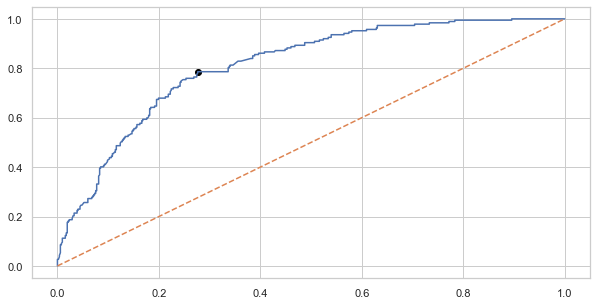

In [210]:
plt.figure(figsize=(10,5))
log=LogisticRegression(C=100, class_weight= 'balanced', penalty= 'l2', solver= 'newton-cg')
LG=log.fit(X_train_sm,Y_train_sm).predict_proba(X_test)
FPR,TPR,Threshold=roc_curve(Y_test,LG[:,1])
print("AUC curve: ",auc(FPR,TPR))
Gmean=np.sqrt(TPR*(1-FPR))
mx=np.argmax(Gmean)
plt.plot(FPR,TPR)
plt.scatter(FPR[mx],TPR[mx],color="black")
plt.plot([0,1],linestyle="--")
print("Best Threshold: ",Threshold[mx])

#### Naive Bayes Classifier

In [243]:
naive=GaussianNB()
params= {'var_smoothing': np.logspace(0,-9, num=100),
    }
                    
cv=KFold(n_splits=10)
hyper_naive=GridSearchCV(naive,params,cv=cv,scoring="roc_auc")
hyper_naive.fit(X_train_sm,Y_train_sm)
print("Best Params: ",hyper_naive.best_params_)

Best Params:  {'var_smoothing': 1.0}


AUC curve:  0.817788764881722
Threshold : 0.6412049987382333


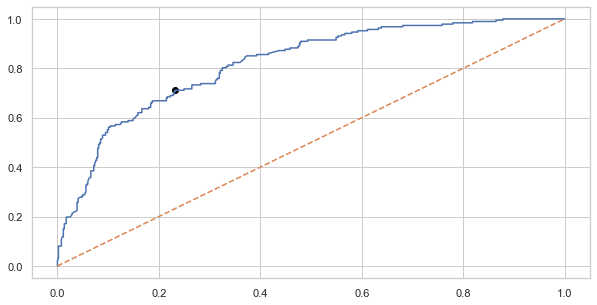

In [244]:
plt.figure(figsize=(10,5))
gnb=GaussianNB(var_smoothing= 1.0)
GNB=gnb.fit(X_train_sm,Y_train_sm).predict_proba(X_test)
yhat=gnb.predict(X_test)
FPR,TPR,Threshold=roc_curve(Y_test,GNB[:,1])
print("AUC curve: ",auc(FPR,TPR))
plt.plot(FPR,TPR)
plt.plot([0,1],linestyle="--")
Gmean=np.sqrt(TPR*(1-FPR))
mx=np.argmax(Gmean)
plt.scatter(FPR[mx],TPR[mx],color="black")
print("Threshold :",Threshold[mx])

#### CategoricalNB

In [234]:
cat_naive=CategoricalNB()
params={
    'alpha':[100,10,1,0.1,0.001],
    'fit_prior':[True,False]
}
cv=KFold(n_splits=10)
cat_naive_hyper=GridSearchCV(cat_naive,params,cv=cv,scoring="roc_auc")
cat_naive_hyper.fit(X_train_sm,Y_train_sm)
print("Best Params :",cat_naive_hyper.best_params_)

Best Params : {'alpha': 100, 'fit_prior': True}


Best Auc score:  0.8157821243496519
Best Threshold Values : 0.9255134833477621


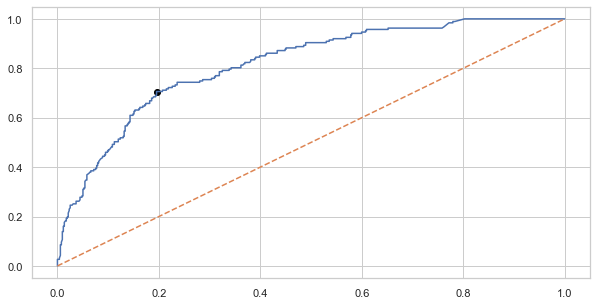

In [239]:
plt.figure(figsize=(10,5))
cat_nb=CategoricalNB(alpha= 100, fit_prior= True)
CAT_NB=cat_nb.fit(X_train_sm,Y_train_sm).predict_proba(X_test)
yhat=cat_nb.predict(X_test)
FPR,TPR,Threshold=roc_curve(Y_test,CAT_NB[:,1])
print("Best Auc score: ",auc(FPR,TPR))
plt.plot(FPR,TPR)
plt.plot([0,1],linestyle="--")
Gmean=np.sqrt(TPR*(1-FPR))
mx=np.argmax(Gmean)
plt.scatter(FPR[mx],TPR[mx],color="black")
print("Best Threshold Values :",Threshold[mx])

#### KNN

In [245]:
knn=KNeighborsClassifier()
params={
    'n_neighbors':np.arange(3,30,2),
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree'],
    'metric':['minkowski','euclidean'],
}
cv=KFold(n_splits=10)
knn_hyper=GridSearchCV(knn,params,cv=cv,scoring="roc_auc")
knn_hyper.fit(X_train_sm,Y_train_sm)
print("Best Param: ",knn_hyper.best_params_)

Best Param:  {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}


In [ ]:
knn=KNeighborsClassifier(algorithm= 'auto', metric= 'minkowski', n_neighbors= 3,weights= 'uniform')


Best Score:  3


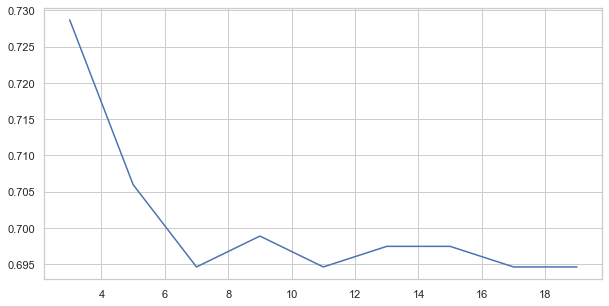

In [257]:
plt.figure(figsize=(10,5))
knn_score=[]
k_neighbors=np.arange(3,20,2)
for i in k_neighbors:
    knn=KNeighborsClassifier(n_neighbors=i,algorithm= 'auto', metric= 'minkowski',weights= 'uniform')
    knn.fit(X_train_sm,Y_train_sm)
    yhat=knn.predict(X_test)
    knn_score.append(accuracy_score(Y_test,yhat))
MSE=[1-i for i in knn_score]
print("Best Score: ",k_neighbors[MSE.index(min(MSE))])
plt.plot(k_neighbors,knn_score)

#### SVC

In [ ]:
svc=SVC()
params={'C': [0.1, 1], 
              'gamma': [1, 0.1, 0.01,],
              'kernel': ['rbf']} 

cv=KFold(n_splits=10)
svc_hyper=GridSearchCV(svc,params,cv=cv,scoring="roc_auc")
svc_hyper.fit(X_train_sm,Y_train_sm)
print("Best params: ",svc_hyper.best_params_)

Best  Auc Curve:  0.8183576578160718
Best Threshold:  0.6740600439089874


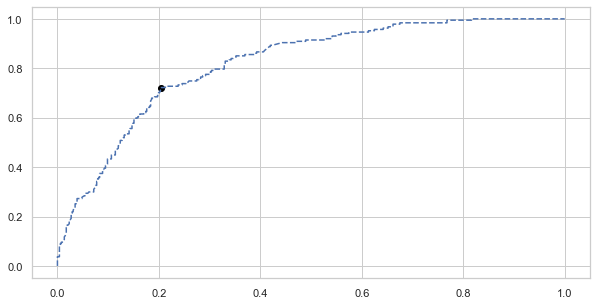

In [280]:
plt.figure(figsize=(10,5))
SVM=sklearn.svm.SVC(C=1, kernel='rbf', gamma=0.01,probability=True)
SVC=SVM.fit(X_train_sm,Y_train_sm).predict_proba(X_test)
FPR,TPR,Threshold=roc_curve(Y_test,SVC[:,1])
print("Best  Auc Curve: ",auc(FPR,TPR))
Gammma=np.sqrt(TPR*(1-FPR))
mx=np.argmax(Gammma)
plt.plot(FPR,TPR,linestyle="--")
plt.scatter(FPR[mx],TPR[mx],color="black")
print("Best Threshold: ",Threshold[mx])

#### DecisionTreeClassifier

In [283]:
dtree=DecisionTreeClassifier()
params={"max_depth": [3, None],
              "max_features":np.arange(1, 9),
              "min_samples_leaf":np.arange(1, 9),
              "criterion": ["gini", "entropy"]}
cv=KFold(n_splits=10)
dtree_hyper=GridSearchCV(dtree,params,scoring="roc_auc",cv=cv)
dtree_hyper.fit(X_train_sm,Y_train_sm)
print("Best params ",dtree_hyper.best_params_)

Best params  {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1}


<Figure size 720x360 with 0 Axes>

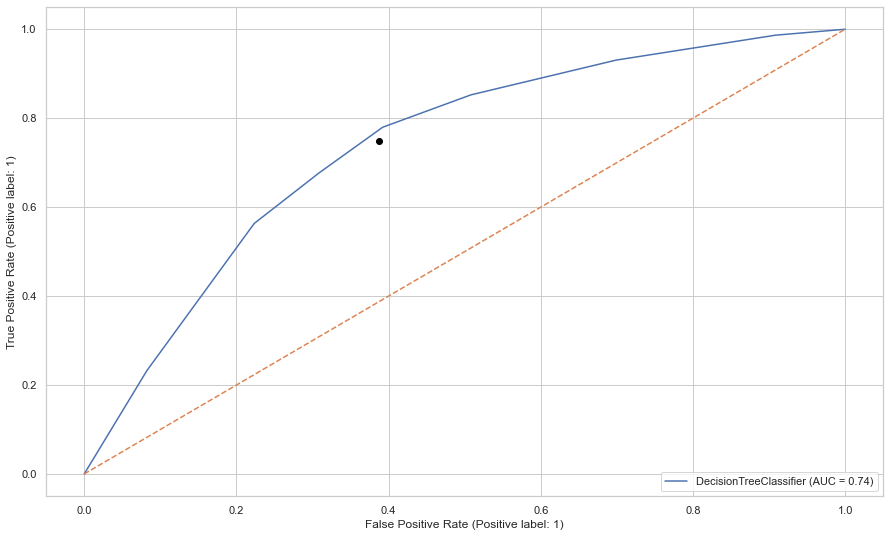

In [291]:
plt.figure(figsize=(10,5))
dtree=DecisionTreeClassifier(criterion= 'gini', max_depth= 3, max_features= 1, min_samples_leaf= 1)
dtree.fit(X_train_sm,Y_train_sm)
DT=dtree.fit(X_train_sm,Y_train_sm).predict_proba(X_test)
FPR,TPR,Threshold=roc_curve(Y_test,DT[:,1])
Gmean=np.sqrt(TPR*(1-FPR))
mx=np.argmax(Gmean)
plot_roc_curve(dtree,X_train_sm,Y_train_sm)
plt.plot([0,1],linestyle='--')
plt.scatter(FPR[mx],TPR[mx],color="black")


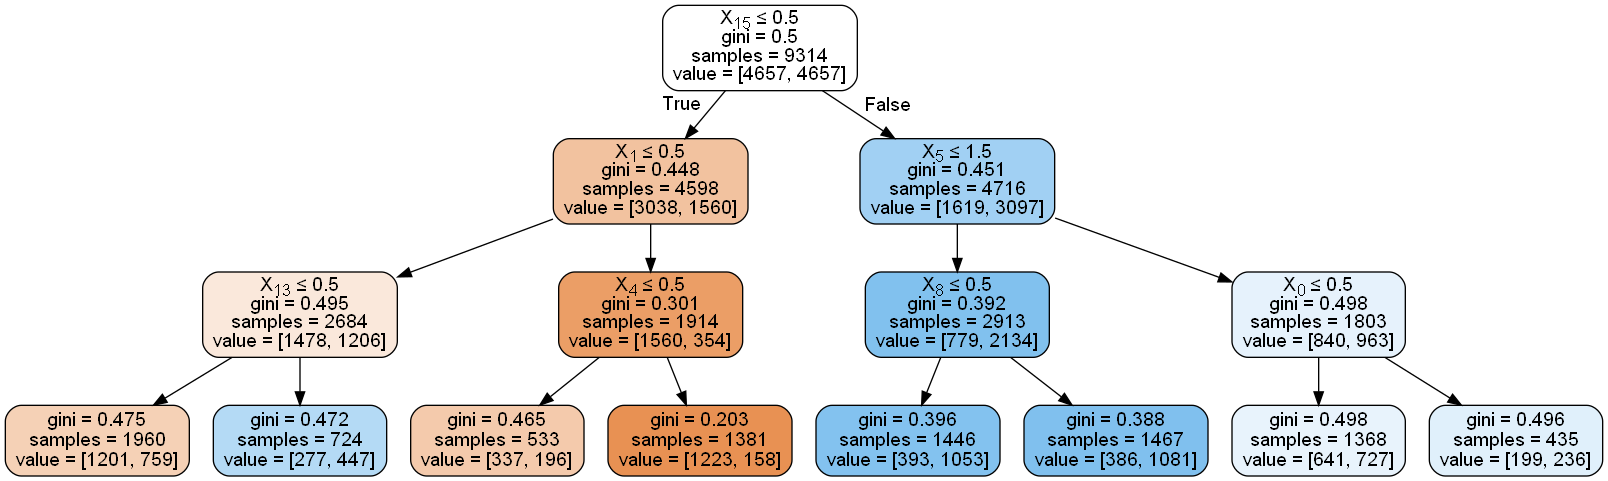

In [483]:
dtree=DecisionTreeClassifier(criterion= 'gini', max_depth= 3, max_features= 1, min_samples_leaf= 1)
dtree.fit(X_train_sm,Y_train_sm)
dot_data=StringIO()
feature=X_train_sm.columns
export_graphviz(dtree,out_file=dot_data,filled=True, rounded=True,
                special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### BaggingClassifier

In [301]:
dtree=DecisionTreeClassifier( max_depth=3)
Bagg=BaggingClassifier()
params={'base_estimator':[dtree],
        'n_estimators':[100,200,300],
        "max_features":np.arange(1,9),
        'max_samples':np.arange(1,9)}

cv=KFold(n_splits=10)
Bagg_hyper=GridSearchCV(Bagg,params,scoring="roc_auc",cv=cv)
Bagg_hyper.fit(X_train_sm,Y_train_sm)
print("Best params ",Bagg_hyper.best_params_)

Best params  {'base_estimator': DecisionTreeClassifier(max_depth=3), 'max_features': 1, 'max_samples': 1, 'n_estimators': 100}


#### AdaBoostClassifier

In [312]:
dtree=DecisionTreeClassifier( max_depth=3)
adaboost=AdaBoostClassifier()
params={
    'base_estimator':[dtree],
    'n_estimators':[50,100,200],
    'learning_rate':[.001,0.01,.1]
}
cv=KFold(n_splits=10)
adaboost_hyper=GridSearchCV(adaboost,params ,scoring='roc_auc',cv=cv)
adaboost_hyper.fit(X_train_sm,Y_train_sm)
print("Best params: ",adaboost_hyper.best_params_)

Best params:  {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.001, 'n_estimators': 100}


#### GradientBoostingClassifier

In [313]:
gboost=GradientBoostingClassifier()
params={
    "n_estimators":[100,300,500],
    "learning_rate":[0.1,1,.001,0.01],
    "min_samples_split": np.linspace(0.1, 0.5, 2),
    "min_samples_leaf": np.linspace(0.1, 0.5, 2),
    "max_depth":[3]
   
}
cv=KFold(n_splits=10)
gboost_hyper=GridSearchCV(gboost,params ,scoring='roc_auc',cv=cv)
gboost_hyper.fit(X_train_sm,Y_train_sm)
print("Best params: ",gboost_hyper.best_params_)

Best params:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 100}


#### RandomForestClassifier

In [318]:
rfc=RandomForestClassifier()
params={

    'n_estimators': [100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6]
    'criterion' :['gini', 'entropy']
}
cv=KFold(n_splits=10)
rfc_hyper=GridSearchCV(rfc,params ,scoring='roc_auc',cv=cv)
rfc_hyper.fit(X_train_sm,Y_train_sm)
print("Best params: ",rfc_hyper.best_params_)

Best params:  {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}


#### CatBoostClassifier

In [320]:
cbc=CatBoostClassifier()
params={
    
    'iterations':[100,200,300],
    'learning_rate':[0.01,0.02,0.03],
    'depth':[4,5,6,7,8,9, 10]}
cv=KFold(n_splits=10)
cbc_hyper=GridSearchCV(cbc,params ,scoring='roc_auc',cv=cv)
cbc_hyper.fit(X_train_sm,Y_train_sm)
print("Best params: ",cbc_hyper.best_params_)

0:	learn: 0.6898235	total: 13.7ms	remaining: 1.36s
1:	learn: 0.6864978	total: 21.3ms	remaining: 1.05s
2:	learn: 0.6833932	total: 28.3ms	remaining: 914ms
3:	learn: 0.6802578	total: 35.7ms	remaining: 856ms
4:	learn: 0.6772046	total: 42.1ms	remaining: 800ms
5:	learn: 0.6742426	total: 48.6ms	remaining: 761ms
6:	learn: 0.6712107	total: 53.1ms	remaining: 705ms
7:	learn: 0.6683444	total: 57.2ms	remaining: 658ms
8:	learn: 0.6655344	total: 61.1ms	remaining: 618ms
9:	learn: 0.6626772	total: 65.5ms	remaining: 589ms
10:	learn: 0.6599230	total: 69ms	remaining: 559ms
11:	learn: 0.6573071	total: 74ms	remaining: 543ms
12:	learn: 0.6545840	total: 78.6ms	remaining: 526ms
13:	learn: 0.6519913	total: 83ms	remaining: 510ms
14:	learn: 0.6494048	total: 86.9ms	remaining: 493ms
15:	learn: 0.6468366	total: 90.7ms	remaining: 476ms
16:	learn: 0.6443523	total: 95.5ms	remaining: 466ms
17:	learn: 0.6419084	total: 99.2ms	remaining: 452ms
18:	learn: 0.6394656	total: 103ms	remaining: 439ms
19:	learn: 0.6372004	total: 1

79:	learn: 0.5482209	total: 365ms	remaining: 91.1ms
80:	learn: 0.5471966	total: 369ms	remaining: 86.5ms
81:	learn: 0.5462668	total: 375ms	remaining: 82.3ms
82:	learn: 0.5454546	total: 379ms	remaining: 77.7ms
83:	learn: 0.5445353	total: 384ms	remaining: 73.2ms
84:	learn: 0.5436991	total: 389ms	remaining: 68.7ms
85:	learn: 0.5429035	total: 394ms	remaining: 64.1ms
86:	learn: 0.5420680	total: 398ms	remaining: 59.5ms
87:	learn: 0.5412395	total: 403ms	remaining: 55ms
88:	learn: 0.5403464	total: 408ms	remaining: 50.4ms
89:	learn: 0.5395197	total: 413ms	remaining: 45.8ms
90:	learn: 0.5387660	total: 417ms	remaining: 41.3ms
91:	learn: 0.5379949	total: 422ms	remaining: 36.7ms
92:	learn: 0.5371563	total: 426ms	remaining: 32.1ms
93:	learn: 0.5363770	total: 432ms	remaining: 27.6ms
94:	learn: 0.5355793	total: 437ms	remaining: 23ms
95:	learn: 0.5348707	total: 441ms	remaining: 18.4ms
96:	learn: 0.5340970	total: 446ms	remaining: 13.8ms
97:	learn: 0.5333557	total: 451ms	remaining: 9.2ms
98:	learn: 0.5325

48:	learn: 0.5834809	total: 188ms	remaining: 196ms
49:	learn: 0.5821192	total: 193ms	remaining: 193ms
50:	learn: 0.5807008	total: 197ms	remaining: 189ms
51:	learn: 0.5792780	total: 201ms	remaining: 186ms
52:	learn: 0.5778440	total: 206ms	remaining: 182ms
53:	learn: 0.5766100	total: 210ms	remaining: 179ms
54:	learn: 0.5753326	total: 214ms	remaining: 175ms
55:	learn: 0.5739546	total: 218ms	remaining: 172ms
56:	learn: 0.5726384	total: 223ms	remaining: 168ms
57:	learn: 0.5713109	total: 228ms	remaining: 165ms
58:	learn: 0.5700597	total: 232ms	remaining: 161ms
59:	learn: 0.5687841	total: 237ms	remaining: 158ms
60:	learn: 0.5674701	total: 241ms	remaining: 154ms
61:	learn: 0.5662778	total: 245ms	remaining: 150ms
62:	learn: 0.5651407	total: 248ms	remaining: 146ms
63:	learn: 0.5639847	total: 252ms	remaining: 142ms
64:	learn: 0.5628499	total: 255ms	remaining: 138ms
65:	learn: 0.5618055	total: 259ms	remaining: 134ms
66:	learn: 0.5607074	total: 263ms	remaining: 129ms
67:	learn: 0.5596194	total: 266

32:	learn: 0.6094858	total: 133ms	remaining: 271ms
33:	learn: 0.6076468	total: 138ms	remaining: 267ms
34:	learn: 0.6057891	total: 142ms	remaining: 263ms
35:	learn: 0.6039956	total: 146ms	remaining: 260ms
36:	learn: 0.6022416	total: 151ms	remaining: 257ms
37:	learn: 0.6004417	total: 155ms	remaining: 253ms
38:	learn: 0.5986837	total: 159ms	remaining: 249ms
39:	learn: 0.5969334	total: 164ms	remaining: 246ms
40:	learn: 0.5952911	total: 169ms	remaining: 243ms
41:	learn: 0.5936789	total: 174ms	remaining: 241ms
42:	learn: 0.5919989	total: 180ms	remaining: 239ms
43:	learn: 0.5903710	total: 185ms	remaining: 235ms
44:	learn: 0.5887410	total: 189ms	remaining: 232ms
45:	learn: 0.5872839	total: 194ms	remaining: 228ms
46:	learn: 0.5857661	total: 198ms	remaining: 224ms
47:	learn: 0.5842498	total: 203ms	remaining: 220ms
48:	learn: 0.5827880	total: 207ms	remaining: 215ms
49:	learn: 0.5814092	total: 212ms	remaining: 212ms
50:	learn: 0.5799601	total: 216ms	remaining: 208ms
51:	learn: 0.5785297	total: 221

0:	learn: 0.6899535	total: 4.41ms	remaining: 436ms
1:	learn: 0.6867812	total: 8.43ms	remaining: 413ms
2:	learn: 0.6838130	total: 12.9ms	remaining: 416ms
3:	learn: 0.6808516	total: 17.1ms	remaining: 409ms
4:	learn: 0.6779537	total: 22.5ms	remaining: 428ms
5:	learn: 0.6750577	total: 27.7ms	remaining: 434ms
6:	learn: 0.6722193	total: 32.1ms	remaining: 427ms
7:	learn: 0.6695179	total: 36.8ms	remaining: 423ms
8:	learn: 0.6668737	total: 42ms	remaining: 424ms
9:	learn: 0.6641650	total: 47.4ms	remaining: 426ms
10:	learn: 0.6615079	total: 51.8ms	remaining: 419ms
11:	learn: 0.6589205	total: 55.4ms	remaining: 406ms
12:	learn: 0.6563631	total: 59ms	remaining: 395ms
13:	learn: 0.6539012	total: 63.6ms	remaining: 391ms
14:	learn: 0.6514236	total: 67.3ms	remaining: 382ms
15:	learn: 0.6490553	total: 71.1ms	remaining: 373ms
16:	learn: 0.6466581	total: 74.6ms	remaining: 364ms
17:	learn: 0.6442745	total: 79.1ms	remaining: 361ms
18:	learn: 0.6419450	total: 82.7ms	remaining: 353ms
19:	learn: 0.6397761	total

96:	learn: 0.5406107	total: 691ms	remaining: 21.4ms
97:	learn: 0.5398559	total: 696ms	remaining: 14.2ms
98:	learn: 0.5391303	total: 700ms	remaining: 7.07ms
99:	learn: 0.5384229	total: 705ms	remaining: 0us
0:	learn: 0.6899777	total: 4.58ms	remaining: 454ms
1:	learn: 0.6868855	total: 8.87ms	remaining: 435ms
2:	learn: 0.6839220	total: 13.3ms	remaining: 430ms
3:	learn: 0.6809733	total: 17.5ms	remaining: 420ms
4:	learn: 0.6780864	total: 23.1ms	remaining: 440ms
5:	learn: 0.6752159	total: 27.3ms	remaining: 427ms
6:	learn: 0.6723799	total: 31.2ms	remaining: 415ms
7:	learn: 0.6696781	total: 36.2ms	remaining: 416ms
8:	learn: 0.6670320	total: 40.2ms	remaining: 406ms
9:	learn: 0.6643406	total: 44.5ms	remaining: 401ms
10:	learn: 0.6617055	total: 48.8ms	remaining: 395ms
11:	learn: 0.6591389	total: 53.5ms	remaining: 392ms
12:	learn: 0.6565888	total: 58.1ms	remaining: 389ms
13:	learn: 0.6541359	total: 62.2ms	remaining: 382ms
14:	learn: 0.6516722	total: 67.3ms	remaining: 381ms
15:	learn: 0.6492166	tota

69:	learn: 0.5094840	total: 358ms	remaining: 154ms
70:	learn: 0.5086671	total: 363ms	remaining: 148ms
71:	learn: 0.5077894	total: 370ms	remaining: 144ms
72:	learn: 0.5070171	total: 374ms	remaining: 138ms
73:	learn: 0.5060840	total: 379ms	remaining: 133ms
74:	learn: 0.5052498	total: 385ms	remaining: 128ms
75:	learn: 0.5044975	total: 389ms	remaining: 123ms
76:	learn: 0.5036593	total: 395ms	remaining: 118ms
77:	learn: 0.5029601	total: 400ms	remaining: 113ms
78:	learn: 0.5021913	total: 405ms	remaining: 108ms
79:	learn: 0.5014966	total: 410ms	remaining: 103ms
80:	learn: 0.5007879	total: 415ms	remaining: 97.4ms
81:	learn: 0.5001169	total: 420ms	remaining: 92.2ms
82:	learn: 0.4994276	total: 424ms	remaining: 86.9ms
83:	learn: 0.4987706	total: 429ms	remaining: 81.7ms
84:	learn: 0.4981863	total: 434ms	remaining: 76.6ms
85:	learn: 0.4976661	total: 439ms	remaining: 71.4ms
86:	learn: 0.4970855	total: 443ms	remaining: 66.2ms
87:	learn: 0.4964630	total: 448ms	remaining: 61ms
88:	learn: 0.4958792	tota

44:	learn: 0.5391337	total: 224ms	remaining: 273ms
45:	learn: 0.5376330	total: 228ms	remaining: 268ms
46:	learn: 0.5360927	total: 233ms	remaining: 263ms
47:	learn: 0.5347211	total: 237ms	remaining: 257ms
48:	learn: 0.5333004	total: 242ms	remaining: 252ms
49:	learn: 0.5320132	total: 246ms	remaining: 246ms
50:	learn: 0.5305436	total: 251ms	remaining: 241ms
51:	learn: 0.5291522	total: 255ms	remaining: 235ms
52:	learn: 0.5278218	total: 264ms	remaining: 234ms
53:	learn: 0.5265632	total: 269ms	remaining: 230ms
54:	learn: 0.5254210	total: 274ms	remaining: 224ms
55:	learn: 0.5240988	total: 279ms	remaining: 219ms
56:	learn: 0.5229489	total: 283ms	remaining: 213ms
57:	learn: 0.5217790	total: 287ms	remaining: 208ms
58:	learn: 0.5206874	total: 293ms	remaining: 203ms
59:	learn: 0.5195735	total: 297ms	remaining: 198ms
60:	learn: 0.5183249	total: 302ms	remaining: 193ms
61:	learn: 0.5172557	total: 306ms	remaining: 188ms
62:	learn: 0.5163210	total: 311ms	remaining: 182ms
63:	learn: 0.5153669	total: 315

20:	learn: 0.5905600	total: 175ms	remaining: 658ms
21:	learn: 0.5871628	total: 180ms	remaining: 640ms
22:	learn: 0.5840348	total: 187ms	remaining: 627ms
23:	learn: 0.5808543	total: 193ms	remaining: 610ms
24:	learn: 0.5777633	total: 198ms	remaining: 595ms
25:	learn: 0.5749276	total: 205ms	remaining: 583ms
26:	learn: 0.5721046	total: 210ms	remaining: 568ms
27:	learn: 0.5694828	total: 217ms	remaining: 559ms
28:	learn: 0.5667219	total: 226ms	remaining: 554ms
29:	learn: 0.5642253	total: 234ms	remaining: 546ms
30:	learn: 0.5618659	total: 240ms	remaining: 534ms
31:	learn: 0.5596578	total: 245ms	remaining: 521ms
32:	learn: 0.5572552	total: 253ms	remaining: 513ms
33:	learn: 0.5550738	total: 276ms	remaining: 536ms
34:	learn: 0.5528578	total: 282ms	remaining: 524ms
35:	learn: 0.5508843	total: 288ms	remaining: 512ms
36:	learn: 0.5486955	total: 294ms	remaining: 501ms
37:	learn: 0.5465877	total: 304ms	remaining: 496ms
38:	learn: 0.5445799	total: 315ms	remaining: 492ms
39:	learn: 0.5425980	total: 321

90:	learn: 0.4924105	total: 459ms	remaining: 45.4ms
91:	learn: 0.4918301	total: 463ms	remaining: 40.3ms
92:	learn: 0.4912159	total: 468ms	remaining: 35.2ms
93:	learn: 0.4906980	total: 473ms	remaining: 30.2ms
94:	learn: 0.4901086	total: 477ms	remaining: 25.1ms
95:	learn: 0.4895995	total: 482ms	remaining: 20.1ms
96:	learn: 0.4891142	total: 486ms	remaining: 15ms
97:	learn: 0.4886216	total: 491ms	remaining: 10ms
98:	learn: 0.4881386	total: 496ms	remaining: 5ms
99:	learn: 0.4877786	total: 501ms	remaining: 0us
0:	learn: 0.6865803	total: 3.84ms	remaining: 381ms
1:	learn: 0.6803062	total: 7.77ms	remaining: 381ms
2:	learn: 0.6744077	total: 12.4ms	remaining: 400ms
3:	learn: 0.6685555	total: 16.5ms	remaining: 396ms
4:	learn: 0.6629728	total: 23ms	remaining: 437ms
5:	learn: 0.6576688	total: 27ms	remaining: 423ms
6:	learn: 0.6522463	total: 31.8ms	remaining: 422ms
7:	learn: 0.6473045	total: 35.8ms	remaining: 412ms
8:	learn: 0.6425406	total: 40.5ms	remaining: 409ms
9:	learn: 0.6377130	total: 44.5ms	r

77:	learn: 0.5098643	total: 405ms	remaining: 114ms
78:	learn: 0.5091080	total: 410ms	remaining: 109ms
79:	learn: 0.5084198	total: 414ms	remaining: 104ms
80:	learn: 0.5076544	total: 419ms	remaining: 98.4ms
81:	learn: 0.5069626	total: 424ms	remaining: 93.1ms
82:	learn: 0.5062932	total: 430ms	remaining: 88ms
83:	learn: 0.5056501	total: 434ms	remaining: 82.7ms
84:	learn: 0.5050682	total: 439ms	remaining: 77.5ms
85:	learn: 0.5045445	total: 445ms	remaining: 72.4ms
86:	learn: 0.5039685	total: 450ms	remaining: 67.2ms
87:	learn: 0.5033776	total: 454ms	remaining: 61.9ms
88:	learn: 0.5027925	total: 459ms	remaining: 56.8ms
89:	learn: 0.5021984	total: 465ms	remaining: 51.6ms
90:	learn: 0.5017081	total: 469ms	remaining: 46.4ms
91:	learn: 0.5012257	total: 473ms	remaining: 41.2ms
92:	learn: 0.5006480	total: 479ms	remaining: 36ms
93:	learn: 0.5001216	total: 483ms	remaining: 30.8ms
94:	learn: 0.4995486	total: 487ms	remaining: 25.7ms
95:	learn: 0.4990649	total: 492ms	remaining: 20.5ms
96:	learn: 0.498604

41:	learn: 0.5504891	total: 353ms	remaining: 487ms
42:	learn: 0.5487016	total: 359ms	remaining: 476ms
43:	learn: 0.5470021	total: 372ms	remaining: 473ms
44:	learn: 0.5453694	total: 381ms	remaining: 466ms
45:	learn: 0.5439816	total: 387ms	remaining: 455ms
46:	learn: 0.5424355	total: 393ms	remaining: 444ms
47:	learn: 0.5409226	total: 400ms	remaining: 433ms
48:	learn: 0.5395403	total: 423ms	remaining: 440ms
49:	learn: 0.5382768	total: 429ms	remaining: 429ms
50:	learn: 0.5368513	total: 437ms	remaining: 420ms
51:	learn: 0.5354844	total: 448ms	remaining: 414ms
52:	learn: 0.5341788	total: 455ms	remaining: 403ms
53:	learn: 0.5331576	total: 460ms	remaining: 392ms
54:	learn: 0.5319715	total: 468ms	remaining: 383ms
55:	learn: 0.5308493	total: 474ms	remaining: 373ms
56:	learn: 0.5296989	total: 480ms	remaining: 362ms
57:	learn: 0.5286043	total: 487ms	remaining: 353ms
58:	learn: 0.5275188	total: 493ms	remaining: 343ms
59:	learn: 0.5264087	total: 499ms	remaining: 333ms
60:	learn: 0.5251871	total: 506

13:	learn: 0.5941472	total: 61.9ms	remaining: 381ms
14:	learn: 0.5894367	total: 66.6ms	remaining: 377ms
15:	learn: 0.5852942	total: 71ms	remaining: 373ms
16:	learn: 0.5808428	total: 78.9ms	remaining: 385ms
17:	learn: 0.5765598	total: 86.1ms	remaining: 392ms
18:	learn: 0.5724347	total: 92.1ms	remaining: 393ms
19:	learn: 0.5685775	total: 97.5ms	remaining: 390ms
20:	learn: 0.5649833	total: 103ms	remaining: 386ms
21:	learn: 0.5613143	total: 107ms	remaining: 381ms
22:	learn: 0.5580009	total: 112ms	remaining: 376ms
23:	learn: 0.5547396	total: 117ms	remaining: 371ms
24:	learn: 0.5516619	total: 122ms	remaining: 366ms
25:	learn: 0.5488968	total: 127ms	remaining: 360ms
26:	learn: 0.5461632	total: 132ms	remaining: 357ms
27:	learn: 0.5436542	total: 137ms	remaining: 353ms
28:	learn: 0.5409274	total: 144ms	remaining: 352ms
29:	learn: 0.5384731	total: 149ms	remaining: 347ms
30:	learn: 0.5363490	total: 153ms	remaining: 341ms
31:	learn: 0.5344519	total: 157ms	remaining: 334ms
32:	learn: 0.5322631	total

81:	learn: 0.4818669	total: 381ms	remaining: 83.7ms
82:	learn: 0.4814200	total: 386ms	remaining: 79ms
83:	learn: 0.4809711	total: 391ms	remaining: 74.4ms
84:	learn: 0.4806353	total: 395ms	remaining: 69.6ms
85:	learn: 0.4801707	total: 402ms	remaining: 65.4ms
86:	learn: 0.4798097	total: 406ms	remaining: 60.7ms
87:	learn: 0.4793883	total: 411ms	remaining: 56ms
88:	learn: 0.4788596	total: 415ms	remaining: 51.3ms
89:	learn: 0.4784752	total: 420ms	remaining: 46.7ms
90:	learn: 0.4781194	total: 426ms	remaining: 42.1ms
91:	learn: 0.4777827	total: 431ms	remaining: 37.4ms
92:	learn: 0.4775400	total: 435ms	remaining: 32.7ms
93:	learn: 0.4772260	total: 439ms	remaining: 28ms
94:	learn: 0.4768129	total: 443ms	remaining: 23.3ms
95:	learn: 0.4764585	total: 448ms	remaining: 18.7ms
96:	learn: 0.4761624	total: 452ms	remaining: 14ms
97:	learn: 0.4757773	total: 457ms	remaining: 9.32ms
98:	learn: 0.4754520	total: 461ms	remaining: 4.65ms
99:	learn: 0.4752201	total: 465ms	remaining: 0us
0:	learn: 0.6832634	tot

58:	learn: 0.4897809	total: 564ms	remaining: 392ms
59:	learn: 0.4887196	total: 570ms	remaining: 380ms
60:	learn: 0.4876399	total: 576ms	remaining: 368ms
61:	learn: 0.4868234	total: 598ms	remaining: 367ms
62:	learn: 0.4860290	total: 605ms	remaining: 355ms
63:	learn: 0.4852508	total: 611ms	remaining: 344ms
64:	learn: 0.4845836	total: 617ms	remaining: 332ms
65:	learn: 0.4839584	total: 624ms	remaining: 321ms
66:	learn: 0.4832566	total: 658ms	remaining: 324ms
67:	learn: 0.4825993	total: 678ms	remaining: 319ms
68:	learn: 0.4819868	total: 684ms	remaining: 308ms
69:	learn: 0.4814282	total: 690ms	remaining: 296ms
70:	learn: 0.4808243	total: 696ms	remaining: 284ms
71:	learn: 0.4800792	total: 702ms	remaining: 273ms
72:	learn: 0.4795239	total: 707ms	remaining: 261ms
73:	learn: 0.4787731	total: 721ms	remaining: 253ms
74:	learn: 0.4782056	total: 727ms	remaining: 242ms
75:	learn: 0.4776508	total: 734ms	remaining: 232ms
76:	learn: 0.4770371	total: 740ms	remaining: 221ms
77:	learn: 0.4765327	total: 750

22:	learn: 0.5587825	total: 107ms	remaining: 357ms
23:	learn: 0.5555504	total: 111ms	remaining: 352ms
24:	learn: 0.5524669	total: 117ms	remaining: 350ms
25:	learn: 0.5497085	total: 124ms	remaining: 352ms
26:	learn: 0.5469412	total: 128ms	remaining: 347ms
27:	learn: 0.5443169	total: 133ms	remaining: 343ms
28:	learn: 0.5416012	total: 138ms	remaining: 338ms
29:	learn: 0.5391591	total: 145ms	remaining: 338ms
30:	learn: 0.5369356	total: 151ms	remaining: 336ms
31:	learn: 0.5350076	total: 156ms	remaining: 332ms
32:	learn: 0.5328690	total: 163ms	remaining: 331ms
33:	learn: 0.5308796	total: 168ms	remaining: 326ms
34:	learn: 0.5288818	total: 174ms	remaining: 324ms
35:	learn: 0.5269903	total: 180ms	remaining: 320ms
36:	learn: 0.5250884	total: 185ms	remaining: 315ms
37:	learn: 0.5233103	total: 192ms	remaining: 313ms
38:	learn: 0.5215358	total: 197ms	remaining: 308ms
39:	learn: 0.5199273	total: 202ms	remaining: 303ms
40:	learn: 0.5183999	total: 206ms	remaining: 297ms
41:	learn: 0.5169285	total: 211

0:	learn: 0.6839214	total: 4.91ms	remaining: 486ms
1:	learn: 0.6747679	total: 9.15ms	remaining: 449ms
2:	learn: 0.6665790	total: 13.4ms	remaining: 432ms
3:	learn: 0.6587019	total: 18.8ms	remaining: 451ms
4:	learn: 0.6512528	total: 23ms	remaining: 436ms
5:	learn: 0.6441873	total: 27.1ms	remaining: 424ms
6:	learn: 0.6373591	total: 31.5ms	remaining: 418ms
7:	learn: 0.6310990	total: 35.3ms	remaining: 406ms
8:	learn: 0.6251483	total: 39.3ms	remaining: 398ms
9:	learn: 0.6192625	total: 42.8ms	remaining: 385ms
10:	learn: 0.6136419	total: 47.1ms	remaining: 381ms
11:	learn: 0.6084087	total: 51.8ms	remaining: 380ms
12:	learn: 0.6033527	total: 56.1ms	remaining: 376ms
13:	learn: 0.5986151	total: 60.3ms	remaining: 371ms
14:	learn: 0.5939727	total: 64.9ms	remaining: 368ms
15:	learn: 0.5894421	total: 69ms	remaining: 362ms
16:	learn: 0.5852624	total: 73.4ms	remaining: 358ms
17:	learn: 0.5810775	total: 78ms	remaining: 355ms
18:	learn: 0.5771461	total: 82.4ms	remaining: 351ms
19:	learn: 0.5736066	total: 

65:	learn: 0.4986970	total: 449ms	remaining: 231ms
66:	learn: 0.4979977	total: 455ms	remaining: 224ms
67:	learn: 0.4972031	total: 460ms	remaining: 217ms
68:	learn: 0.4967484	total: 467ms	remaining: 210ms
69:	learn: 0.4962445	total: 473ms	remaining: 203ms
70:	learn: 0.4956165	total: 480ms	remaining: 196ms
71:	learn: 0.4949088	total: 487ms	remaining: 189ms
72:	learn: 0.4943298	total: 495ms	remaining: 183ms
73:	learn: 0.4936037	total: 500ms	remaining: 176ms
74:	learn: 0.4930381	total: 506ms	remaining: 169ms
75:	learn: 0.4925143	total: 536ms	remaining: 169ms
76:	learn: 0.4919412	total: 543ms	remaining: 162ms
77:	learn: 0.4915029	total: 549ms	remaining: 155ms
78:	learn: 0.4909110	total: 555ms	remaining: 148ms
79:	learn: 0.4903719	total: 565ms	remaining: 141ms
80:	learn: 0.4899058	total: 574ms	remaining: 135ms
81:	learn: 0.4892896	total: 580ms	remaining: 127ms
82:	learn: 0.4888855	total: 590ms	remaining: 121ms
83:	learn: 0.4886161	total: 595ms	remaining: 113ms
84:	learn: 0.4882749	total: 602

46:	learn: 0.5854587	total: 229ms	remaining: 259ms
47:	learn: 0.5839829	total: 235ms	remaining: 255ms
48:	learn: 0.5824872	total: 241ms	remaining: 251ms
49:	learn: 0.5810521	total: 248ms	remaining: 248ms
50:	learn: 0.5796071	total: 253ms	remaining: 243ms
51:	learn: 0.5781841	total: 258ms	remaining: 239ms
52:	learn: 0.5768275	total: 268ms	remaining: 237ms
53:	learn: 0.5754606	total: 275ms	remaining: 234ms
54:	learn: 0.5741056	total: 280ms	remaining: 229ms
55:	learn: 0.5728080	total: 285ms	remaining: 224ms
56:	learn: 0.5714071	total: 290ms	remaining: 219ms
57:	learn: 0.5701247	total: 296ms	remaining: 214ms
58:	learn: 0.5687884	total: 301ms	remaining: 209ms
59:	learn: 0.5674631	total: 306ms	remaining: 204ms
60:	learn: 0.5661807	total: 311ms	remaining: 199ms
61:	learn: 0.5649372	total: 316ms	remaining: 194ms
62:	learn: 0.5637404	total: 321ms	remaining: 189ms
63:	learn: 0.5625305	total: 329ms	remaining: 185ms
64:	learn: 0.5612833	total: 334ms	remaining: 180ms
65:	learn: 0.5601655	total: 339

18:	learn: 0.6387733	total: 122ms	remaining: 520ms
19:	learn: 0.6363219	total: 130ms	remaining: 519ms
20:	learn: 0.6339485	total: 137ms	remaining: 514ms
21:	learn: 0.6316794	total: 142ms	remaining: 502ms
22:	learn: 0.6294506	total: 146ms	remaining: 490ms
23:	learn: 0.6272545	total: 151ms	remaining: 479ms
24:	learn: 0.6251154	total: 156ms	remaining: 467ms
25:	learn: 0.6229856	total: 160ms	remaining: 454ms
26:	learn: 0.6208719	total: 164ms	remaining: 443ms
27:	learn: 0.6187580	total: 169ms	remaining: 434ms
28:	learn: 0.6167209	total: 173ms	remaining: 424ms
29:	learn: 0.6146970	total: 177ms	remaining: 413ms
30:	learn: 0.6127362	total: 183ms	remaining: 408ms
31:	learn: 0.6109552	total: 187ms	remaining: 397ms
32:	learn: 0.6091492	total: 191ms	remaining: 388ms
33:	learn: 0.6072310	total: 195ms	remaining: 378ms
34:	learn: 0.6053780	total: 199ms	remaining: 370ms
35:	learn: 0.6035543	total: 204ms	remaining: 363ms
36:	learn: 0.6016729	total: 209ms	remaining: 356ms
37:	learn: 0.5998911	total: 214

91:	learn: 0.5294860	total: 453ms	remaining: 39.4ms
92:	learn: 0.5286502	total: 458ms	remaining: 34.5ms
93:	learn: 0.5278497	total: 463ms	remaining: 29.6ms
94:	learn: 0.5270128	total: 468ms	remaining: 24.6ms
95:	learn: 0.5262331	total: 473ms	remaining: 19.7ms
96:	learn: 0.5254370	total: 479ms	remaining: 14.8ms
97:	learn: 0.5246923	total: 484ms	remaining: 9.88ms
98:	learn: 0.5238825	total: 491ms	remaining: 4.96ms
99:	learn: 0.5231389	total: 502ms	remaining: 0us
0:	learn: 0.6898190	total: 5.07ms	remaining: 502ms
1:	learn: 0.6864578	total: 10.4ms	remaining: 510ms
2:	learn: 0.6831654	total: 16.9ms	remaining: 547ms
3:	learn: 0.6800060	total: 21.6ms	remaining: 518ms
4:	learn: 0.6768652	total: 27.8ms	remaining: 528ms
5:	learn: 0.6737808	total: 32.6ms	remaining: 511ms
6:	learn: 0.6708229	total: 38.8ms	remaining: 516ms
7:	learn: 0.6678227	total: 45.5ms	remaining: 523ms
8:	learn: 0.6649790	total: 52ms	remaining: 525ms
9:	learn: 0.6621200	total: 56.9ms	remaining: 512ms
10:	learn: 0.6593143	total:

53:	learn: 0.5761544	total: 404ms	remaining: 344ms
54:	learn: 0.5748118	total: 409ms	remaining: 334ms
55:	learn: 0.5734605	total: 414ms	remaining: 325ms
56:	learn: 0.5720744	total: 419ms	remaining: 316ms
57:	learn: 0.5707170	total: 424ms	remaining: 307ms
58:	learn: 0.5694026	total: 430ms	remaining: 298ms
59:	learn: 0.5680840	total: 434ms	remaining: 289ms
60:	learn: 0.5668250	total: 440ms	remaining: 281ms
61:	learn: 0.5655960	total: 451ms	remaining: 276ms
62:	learn: 0.5644169	total: 456ms	remaining: 268ms
63:	learn: 0.5632031	total: 462ms	remaining: 260ms
64:	learn: 0.5619656	total: 466ms	remaining: 251ms
65:	learn: 0.5608535	total: 470ms	remaining: 242ms
66:	learn: 0.5597322	total: 476ms	remaining: 234ms
67:	learn: 0.5585843	total: 480ms	remaining: 226ms
68:	learn: 0.5574831	total: 485ms	remaining: 218ms
69:	learn: 0.5564541	total: 489ms	remaining: 209ms
70:	learn: 0.5554506	total: 494ms	remaining: 202ms
71:	learn: 0.5544033	total: 498ms	remaining: 194ms
72:	learn: 0.5533787	total: 503

18:	learn: 0.6417097	total: 196ms	remaining: 836ms
19:	learn: 0.6393472	total: 204ms	remaining: 815ms
20:	learn: 0.6370392	total: 216ms	remaining: 812ms
21:	learn: 0.6347819	total: 222ms	remaining: 787ms
22:	learn: 0.6325706	total: 230ms	remaining: 769ms
23:	learn: 0.6303898	total: 237ms	remaining: 750ms
24:	learn: 0.6283048	total: 244ms	remaining: 732ms
25:	learn: 0.6262824	total: 251ms	remaining: 715ms
26:	learn: 0.6242508	total: 263ms	remaining: 712ms
27:	learn: 0.6222529	total: 271ms	remaining: 697ms
28:	learn: 0.6202725	total: 277ms	remaining: 679ms
29:	learn: 0.6183056	total: 283ms	remaining: 661ms
30:	learn: 0.6163896	total: 289ms	remaining: 644ms
31:	learn: 0.6146843	total: 296ms	remaining: 630ms
32:	learn: 0.6129600	total: 302ms	remaining: 613ms
33:	learn: 0.6111131	total: 309ms	remaining: 600ms
34:	learn: 0.6093124	total: 315ms	remaining: 585ms
35:	learn: 0.6075618	total: 319ms	remaining: 567ms
36:	learn: 0.6058299	total: 324ms	remaining: 552ms
37:	learn: 0.6041198	total: 329

79:	learn: 0.5515898	total: 411ms	remaining: 103ms
80:	learn: 0.5506432	total: 417ms	remaining: 97.7ms
81:	learn: 0.5497963	total: 422ms	remaining: 92.6ms
82:	learn: 0.5489170	total: 427ms	remaining: 87.4ms
83:	learn: 0.5480059	total: 432ms	remaining: 82.2ms
84:	learn: 0.5470806	total: 438ms	remaining: 77.3ms
85:	learn: 0.5462169	total: 443ms	remaining: 72.1ms
86:	learn: 0.5453797	total: 448ms	remaining: 67ms
87:	learn: 0.5446582	total: 454ms	remaining: 61.9ms
88:	learn: 0.5438493	total: 459ms	remaining: 56.7ms
89:	learn: 0.5430095	total: 464ms	remaining: 51.5ms
90:	learn: 0.5421969	total: 469ms	remaining: 46.4ms
91:	learn: 0.5414337	total: 473ms	remaining: 41.2ms
92:	learn: 0.5406483	total: 478ms	remaining: 36ms
93:	learn: 0.5398100	total: 482ms	remaining: 30.8ms
94:	learn: 0.5391186	total: 487ms	remaining: 25.6ms
95:	learn: 0.5383523	total: 493ms	remaining: 20.6ms
96:	learn: 0.5375463	total: 497ms	remaining: 15.4ms
97:	learn: 0.5368217	total: 502ms	remaining: 10.2ms
98:	learn: 0.5360

40:	learn: 0.5437409	total: 218ms	remaining: 313ms
41:	learn: 0.5418339	total: 222ms	remaining: 307ms
42:	learn: 0.5400535	total: 227ms	remaining: 301ms
43:	learn: 0.5384063	total: 232ms	remaining: 296ms
44:	learn: 0.5366558	total: 237ms	remaining: 290ms
45:	learn: 0.5349300	total: 242ms	remaining: 284ms
46:	learn: 0.5332463	total: 247ms	remaining: 278ms
47:	learn: 0.5317218	total: 252ms	remaining: 273ms
48:	learn: 0.5301766	total: 259ms	remaining: 270ms
49:	learn: 0.5287008	total: 264ms	remaining: 264ms
50:	learn: 0.5272854	total: 270ms	remaining: 259ms
51:	learn: 0.5257457	total: 274ms	remaining: 253ms
52:	learn: 0.5243577	total: 278ms	remaining: 247ms
53:	learn: 0.5230471	total: 283ms	remaining: 241ms
54:	learn: 0.5217391	total: 287ms	remaining: 235ms
55:	learn: 0.5203577	total: 292ms	remaining: 229ms
56:	learn: 0.5190558	total: 296ms	remaining: 224ms
57:	learn: 0.5178182	total: 301ms	remaining: 218ms
58:	learn: 0.5166549	total: 308ms	remaining: 214ms
59:	learn: 0.5154881	total: 312

1:	learn: 0.6800442	total: 10.1ms	remaining: 496ms
2:	learn: 0.6737657	total: 14.8ms	remaining: 478ms
3:	learn: 0.6677874	total: 19.6ms	remaining: 470ms
4:	learn: 0.6618368	total: 25.2ms	remaining: 479ms
5:	learn: 0.6563721	total: 29.8ms	remaining: 466ms
6:	learn: 0.6513302	total: 33.3ms	remaining: 443ms
7:	learn: 0.6460894	total: 38.4ms	remaining: 441ms
8:	learn: 0.6410362	total: 42.8ms	remaining: 433ms
9:	learn: 0.6360976	total: 48ms	remaining: 432ms
10:	learn: 0.6314548	total: 52.3ms	remaining: 423ms
11:	learn: 0.6269800	total: 58ms	remaining: 425ms
12:	learn: 0.6224759	total: 62.9ms	remaining: 421ms
13:	learn: 0.6182924	total: 67.6ms	remaining: 415ms
14:	learn: 0.6143310	total: 72.8ms	remaining: 413ms
15:	learn: 0.6103227	total: 77.5ms	remaining: 407ms
16:	learn: 0.6064747	total: 82.2ms	remaining: 401ms
17:	learn: 0.6026742	total: 87.3ms	remaining: 398ms
18:	learn: 0.5991519	total: 94.5ms	remaining: 403ms
19:	learn: 0.5955642	total: 99.4ms	remaining: 398ms
20:	learn: 0.5921534	tota

63:	learn: 0.5048069	total: 359ms	remaining: 202ms
64:	learn: 0.5036457	total: 365ms	remaining: 197ms
65:	learn: 0.5026319	total: 370ms	remaining: 191ms
66:	learn: 0.5016120	total: 377ms	remaining: 186ms
67:	learn: 0.5005968	total: 382ms	remaining: 180ms
68:	learn: 0.4996906	total: 388ms	remaining: 174ms
69:	learn: 0.4988949	total: 395ms	remaining: 169ms
70:	learn: 0.4979923	total: 401ms	remaining: 164ms
71:	learn: 0.4971936	total: 406ms	remaining: 158ms
72:	learn: 0.4963546	total: 413ms	remaining: 153ms
73:	learn: 0.4954222	total: 421ms	remaining: 148ms
74:	learn: 0.4946431	total: 428ms	remaining: 143ms
75:	learn: 0.4940036	total: 433ms	remaining: 137ms
76:	learn: 0.4931896	total: 438ms	remaining: 131ms
77:	learn: 0.4923848	total: 442ms	remaining: 125ms
78:	learn: 0.4916569	total: 446ms	remaining: 119ms
79:	learn: 0.4907976	total: 451ms	remaining: 113ms
80:	learn: 0.4900840	total: 455ms	remaining: 107ms
81:	learn: 0.4893807	total: 462ms	remaining: 101ms
82:	learn: 0.4886311	total: 466

31:	learn: 0.5632644	total: 394ms	remaining: 837ms
32:	learn: 0.5611417	total: 401ms	remaining: 814ms
33:	learn: 0.5588891	total: 407ms	remaining: 791ms
34:	learn: 0.5567220	total: 415ms	remaining: 770ms
35:	learn: 0.5546050	total: 423ms	remaining: 752ms
36:	learn: 0.5524443	total: 468ms	remaining: 797ms
37:	learn: 0.5504542	total: 476ms	remaining: 777ms
38:	learn: 0.5485444	total: 483ms	remaining: 756ms
39:	learn: 0.5465442	total: 491ms	remaining: 736ms
40:	learn: 0.5447152	total: 505ms	remaining: 727ms
41:	learn: 0.5428306	total: 512ms	remaining: 707ms
42:	learn: 0.5410722	total: 520ms	remaining: 689ms
43:	learn: 0.5394202	total: 527ms	remaining: 670ms
44:	learn: 0.5376671	total: 534ms	remaining: 652ms
45:	learn: 0.5359287	total: 548ms	remaining: 643ms
46:	learn: 0.5342351	total: 555ms	remaining: 626ms
47:	learn: 0.5327043	total: 565ms	remaining: 613ms
48:	learn: 0.5311560	total: 573ms	remaining: 596ms
49:	learn: 0.5295208	total: 581ms	remaining: 581ms
50:	learn: 0.5281060	total: 587

97:	learn: 0.4942157	total: 649ms	remaining: 13.2ms
98:	learn: 0.4937769	total: 654ms	remaining: 6.61ms
99:	learn: 0.4932033	total: 659ms	remaining: 0us
0:	learn: 0.6870097	total: 4.56ms	remaining: 452ms
1:	learn: 0.6808416	total: 9.62ms	remaining: 472ms
2:	learn: 0.6748600	total: 14.4ms	remaining: 465ms
3:	learn: 0.6690936	total: 19.4ms	remaining: 465ms
4:	learn: 0.6634712	total: 24ms	remaining: 455ms
5:	learn: 0.6583062	total: 28.8ms	remaining: 451ms
6:	learn: 0.6534796	total: 32.5ms	remaining: 431ms
7:	learn: 0.6484092	total: 37.5ms	remaining: 431ms
8:	learn: 0.6436303	total: 42.1ms	remaining: 426ms
9:	learn: 0.6388988	total: 47.1ms	remaining: 424ms
10:	learn: 0.6345277	total: 51.8ms	remaining: 419ms
11:	learn: 0.6303040	total: 56.6ms	remaining: 415ms
12:	learn: 0.6260058	total: 61ms	remaining: 408ms
13:	learn: 0.6221969	total: 66.7ms	remaining: 410ms
14:	learn: 0.6183857	total: 71.4ms	remaining: 405ms
15:	learn: 0.6146492	total: 76.7ms	remaining: 403ms
16:	learn: 0.6109923	total: 8

70:	learn: 0.5124402	total: 368ms	remaining: 150ms
71:	learn: 0.5116312	total: 373ms	remaining: 145ms
72:	learn: 0.5107625	total: 379ms	remaining: 140ms
73:	learn: 0.5098817	total: 384ms	remaining: 135ms
74:	learn: 0.5091000	total: 388ms	remaining: 129ms
75:	learn: 0.5084212	total: 392ms	remaining: 124ms
76:	learn: 0.5078008	total: 398ms	remaining: 119ms
77:	learn: 0.5069658	total: 404ms	remaining: 114ms
78:	learn: 0.5062570	total: 408ms	remaining: 109ms
79:	learn: 0.5054839	total: 413ms	remaining: 103ms
80:	learn: 0.5047562	total: 418ms	remaining: 97.9ms
81:	learn: 0.5040489	total: 422ms	remaining: 92.7ms
82:	learn: 0.5033394	total: 427ms	remaining: 87.5ms
83:	learn: 0.5026501	total: 432ms	remaining: 82.2ms
84:	learn: 0.5020137	total: 436ms	remaining: 76.9ms
85:	learn: 0.5013483	total: 441ms	remaining: 71.7ms
86:	learn: 0.5006736	total: 445ms	remaining: 66.5ms
87:	learn: 0.5000582	total: 449ms	remaining: 61.3ms
88:	learn: 0.4995045	total: 453ms	remaining: 56ms
89:	learn: 0.4989397	tot

43:	learn: 0.5088814	total: 219ms	remaining: 278ms
44:	learn: 0.5073999	total: 225ms	remaining: 275ms
45:	learn: 0.5058508	total: 234ms	remaining: 275ms
46:	learn: 0.5044489	total: 241ms	remaining: 271ms
47:	learn: 0.5032582	total: 246ms	remaining: 266ms
48:	learn: 0.5020395	total: 251ms	remaining: 261ms
49:	learn: 0.5008049	total: 256ms	remaining: 256ms
50:	learn: 0.4996536	total: 264ms	remaining: 254ms
51:	learn: 0.4985883	total: 270ms	remaining: 249ms
52:	learn: 0.4975882	total: 274ms	remaining: 243ms
53:	learn: 0.4965194	total: 279ms	remaining: 238ms
54:	learn: 0.4956646	total: 283ms	remaining: 232ms
55:	learn: 0.4945457	total: 288ms	remaining: 226ms
56:	learn: 0.4937449	total: 292ms	remaining: 220ms
57:	learn: 0.4929019	total: 297ms	remaining: 215ms
58:	learn: 0.4920379	total: 302ms	remaining: 210ms
59:	learn: 0.4910192	total: 307ms	remaining: 205ms
60:	learn: 0.4900217	total: 313ms	remaining: 200ms
61:	learn: 0.4893724	total: 318ms	remaining: 195ms
62:	learn: 0.4886570	total: 324

16:	learn: 0.5780301	total: 187ms	remaining: 915ms
17:	learn: 0.5738657	total: 194ms	remaining: 884ms
18:	learn: 0.5699081	total: 206ms	remaining: 877ms
19:	learn: 0.5658948	total: 215ms	remaining: 860ms
20:	learn: 0.5621354	total: 228ms	remaining: 858ms
21:	learn: 0.5585546	total: 240ms	remaining: 849ms
22:	learn: 0.5551863	total: 247ms	remaining: 828ms
23:	learn: 0.5519504	total: 255ms	remaining: 806ms
24:	learn: 0.5489732	total: 260ms	remaining: 781ms
25:	learn: 0.5459680	total: 266ms	remaining: 756ms
26:	learn: 0.5430608	total: 272ms	remaining: 734ms
27:	learn: 0.5403376	total: 278ms	remaining: 715ms
28:	learn: 0.5376228	total: 286ms	remaining: 699ms
29:	learn: 0.5351258	total: 293ms	remaining: 683ms
30:	learn: 0.5325642	total: 299ms	remaining: 665ms
31:	learn: 0.5303092	total: 307ms	remaining: 652ms
32:	learn: 0.5281564	total: 314ms	remaining: 638ms
33:	learn: 0.5260015	total: 320ms	remaining: 621ms
34:	learn: 0.5237206	total: 326ms	remaining: 605ms
35:	learn: 0.5216932	total: 331

0:	learn: 0.6832596	total: 4.28ms	remaining: 424ms
1:	learn: 0.6736411	total: 10.2ms	remaining: 499ms
2:	learn: 0.6645411	total: 15ms	remaining: 486ms
3:	learn: 0.6560067	total: 19.1ms	remaining: 457ms
4:	learn: 0.6478784	total: 23.8ms	remaining: 453ms
5:	learn: 0.6401893	total: 27.9ms	remaining: 438ms
6:	learn: 0.6331102	total: 33ms	remaining: 439ms
7:	learn: 0.6261503	total: 37.1ms	remaining: 427ms
8:	learn: 0.6197775	total: 41.4ms	remaining: 418ms
9:	learn: 0.6135005	total: 46ms	remaining: 414ms
10:	learn: 0.6076158	total: 50.4ms	remaining: 408ms
11:	learn: 0.6021315	total: 54.4ms	remaining: 399ms
12:	learn: 0.5969793	total: 58.4ms	remaining: 391ms
13:	learn: 0.5916907	total: 63.3ms	remaining: 389ms
14:	learn: 0.5867705	total: 68.3ms	remaining: 387ms
15:	learn: 0.5821655	total: 72.6ms	remaining: 381ms
16:	learn: 0.5775950	total: 78.1ms	remaining: 381ms
17:	learn: 0.5734853	total: 84.7ms	remaining: 386ms
18:	learn: 0.5691535	total: 89.2ms	remaining: 380ms
19:	learn: 0.5654109	total: 

78:	learn: 0.4791885	total: 715ms	remaining: 190ms
79:	learn: 0.4786209	total: 723ms	remaining: 181ms
80:	learn: 0.4781519	total: 731ms	remaining: 171ms
81:	learn: 0.4776834	total: 739ms	remaining: 162ms
82:	learn: 0.4771647	total: 772ms	remaining: 158ms
83:	learn: 0.4767253	total: 781ms	remaining: 149ms
84:	learn: 0.4763140	total: 789ms	remaining: 139ms
85:	learn: 0.4757605	total: 798ms	remaining: 130ms
86:	learn: 0.4753011	total: 817ms	remaining: 122ms
87:	learn: 0.4748760	total: 837ms	remaining: 114ms
88:	learn: 0.4745504	total: 847ms	remaining: 105ms
89:	learn: 0.4741796	total: 854ms	remaining: 94.8ms
90:	learn: 0.4737827	total: 862ms	remaining: 85.2ms
91:	learn: 0.4733627	total: 867ms	remaining: 75.4ms
92:	learn: 0.4730013	total: 873ms	remaining: 65.7ms
93:	learn: 0.4726014	total: 879ms	remaining: 56.1ms
94:	learn: 0.4723078	total: 885ms	remaining: 46.6ms
95:	learn: 0.4719807	total: 890ms	remaining: 37.1ms
96:	learn: 0.4716490	total: 898ms	remaining: 27.8ms
97:	learn: 0.4712800	to

39:	learn: 0.5235252	total: 294ms	remaining: 441ms
40:	learn: 0.5218955	total: 300ms	remaining: 432ms
41:	learn: 0.5201334	total: 306ms	remaining: 423ms
42:	learn: 0.5186258	total: 311ms	remaining: 413ms
43:	learn: 0.5172525	total: 317ms	remaining: 404ms
44:	learn: 0.5157531	total: 325ms	remaining: 397ms
45:	learn: 0.5144312	total: 334ms	remaining: 392ms
46:	learn: 0.5130696	total: 339ms	remaining: 383ms
47:	learn: 0.5118072	total: 345ms	remaining: 373ms
48:	learn: 0.5106334	total: 350ms	remaining: 364ms
49:	learn: 0.5092980	total: 356ms	remaining: 356ms
50:	learn: 0.5081877	total: 361ms	remaining: 347ms
51:	learn: 0.5070443	total: 367ms	remaining: 339ms
52:	learn: 0.5058522	total: 373ms	remaining: 331ms
53:	learn: 0.5048050	total: 378ms	remaining: 322ms
54:	learn: 0.5040132	total: 382ms	remaining: 313ms
55:	learn: 0.5030232	total: 388ms	remaining: 305ms
56:	learn: 0.5020062	total: 393ms	remaining: 296ms
57:	learn: 0.5010931	total: 398ms	remaining: 288ms
58:	learn: 0.5002951	total: 404

1:	learn: 0.6864483	total: 23.1ms	remaining: 1.13s
2:	learn: 0.6833037	total: 55.7ms	remaining: 1.8s
3:	learn: 0.6800625	total: 63.7ms	remaining: 1.53s
4:	learn: 0.6769396	total: 73.1ms	remaining: 1.39s
5:	learn: 0.6738661	total: 81.2ms	remaining: 1.27s
6:	learn: 0.6709897	total: 93.5ms	remaining: 1.24s
7:	learn: 0.6680491	total: 104ms	remaining: 1.19s
8:	learn: 0.6652231	total: 128ms	remaining: 1.29s
9:	learn: 0.6623677	total: 139ms	remaining: 1.25s
10:	learn: 0.6595659	total: 157ms	remaining: 1.27s
11:	learn: 0.6567614	total: 167ms	remaining: 1.22s
12:	learn: 0.6540998	total: 176ms	remaining: 1.18s
13:	learn: 0.6515201	total: 185ms	remaining: 1.13s
14:	learn: 0.6488287	total: 204ms	remaining: 1.16s
15:	learn: 0.6461909	total: 212ms	remaining: 1.11s
16:	learn: 0.6435487	total: 221ms	remaining: 1.08s
17:	learn: 0.6410258	total: 247ms	remaining: 1.13s
18:	learn: 0.6386188	total: 256ms	remaining: 1.09s
19:	learn: 0.6361474	total: 266ms	remaining: 1.06s
20:	learn: 0.6337341	total: 277ms	r

74:	learn: 0.5489489	total: 457ms	remaining: 152ms
75:	learn: 0.5478426	total: 463ms	remaining: 146ms
76:	learn: 0.5467685	total: 471ms	remaining: 141ms
77:	learn: 0.5458281	total: 477ms	remaining: 135ms
78:	learn: 0.5449337	total: 482ms	remaining: 128ms
79:	learn: 0.5439340	total: 488ms	remaining: 122ms
80:	learn: 0.5429883	total: 496ms	remaining: 116ms
81:	learn: 0.5420655	total: 503ms	remaining: 110ms
82:	learn: 0.5410920	total: 508ms	remaining: 104ms
83:	learn: 0.5401893	total: 514ms	remaining: 97.8ms
84:	learn: 0.5392025	total: 520ms	remaining: 91.7ms
85:	learn: 0.5382594	total: 526ms	remaining: 85.5ms
86:	learn: 0.5372672	total: 531ms	remaining: 79.4ms
87:	learn: 0.5363897	total: 537ms	remaining: 73.2ms
88:	learn: 0.5355113	total: 542ms	remaining: 67ms
89:	learn: 0.5346920	total: 549ms	remaining: 61ms
90:	learn: 0.5339135	total: 554ms	remaining: 54.8ms
91:	learn: 0.5331013	total: 560ms	remaining: 48.7ms
92:	learn: 0.5322394	total: 568ms	remaining: 42.8ms
93:	learn: 0.5315589	tota

40:	learn: 0.5937910	total: 234ms	remaining: 337ms
41:	learn: 0.5920452	total: 242ms	remaining: 334ms
42:	learn: 0.5904355	total: 248ms	remaining: 329ms
43:	learn: 0.5887948	total: 255ms	remaining: 325ms
44:	learn: 0.5871412	total: 262ms	remaining: 320ms
45:	learn: 0.5855682	total: 270ms	remaining: 317ms
46:	learn: 0.5839797	total: 277ms	remaining: 312ms
47:	learn: 0.5825356	total: 281ms	remaining: 304ms
48:	learn: 0.5810376	total: 288ms	remaining: 300ms
49:	learn: 0.5795175	total: 295ms	remaining: 295ms
50:	learn: 0.5780348	total: 304ms	remaining: 292ms
51:	learn: 0.5766023	total: 310ms	remaining: 287ms
52:	learn: 0.5750866	total: 316ms	remaining: 280ms
53:	learn: 0.5737165	total: 323ms	remaining: 275ms
54:	learn: 0.5723070	total: 328ms	remaining: 268ms
55:	learn: 0.5709051	total: 334ms	remaining: 263ms
56:	learn: 0.5695501	total: 341ms	remaining: 257ms
57:	learn: 0.5681972	total: 347ms	remaining: 251ms
58:	learn: 0.5669192	total: 352ms	remaining: 245ms
59:	learn: 0.5656584	total: 357

16:	learn: 0.6431345	total: 92.3ms	remaining: 451ms
17:	learn: 0.6405502	total: 98.1ms	remaining: 447ms
18:	learn: 0.6381283	total: 104ms	remaining: 445ms
19:	learn: 0.6356670	total: 111ms	remaining: 445ms
20:	learn: 0.6332478	total: 117ms	remaining: 440ms
21:	learn: 0.6308611	total: 126ms	remaining: 446ms
22:	learn: 0.6286046	total: 131ms	remaining: 438ms
23:	learn: 0.6265235	total: 135ms	remaining: 427ms
24:	learn: 0.6243384	total: 142ms	remaining: 425ms
25:	learn: 0.6220886	total: 147ms	remaining: 418ms
26:	learn: 0.6198950	total: 152ms	remaining: 412ms
27:	learn: 0.6177679	total: 161ms	remaining: 415ms
28:	learn: 0.6157521	total: 166ms	remaining: 406ms
29:	learn: 0.6137615	total: 171ms	remaining: 399ms
30:	learn: 0.6117323	total: 176ms	remaining: 393ms
31:	learn: 0.6097418	total: 182ms	remaining: 386ms
32:	learn: 0.6077751	total: 188ms	remaining: 381ms
33:	learn: 0.6057999	total: 193ms	remaining: 374ms
34:	learn: 0.6038768	total: 199ms	remaining: 369ms
35:	learn: 0.6020200	total: 2

84:	learn: 0.5404213	total: 563ms	remaining: 99.3ms
85:	learn: 0.5394610	total: 570ms	remaining: 92.7ms
86:	learn: 0.5384684	total: 576ms	remaining: 86ms
87:	learn: 0.5375701	total: 582ms	remaining: 79.3ms
88:	learn: 0.5366840	total: 589ms	remaining: 72.8ms
89:	learn: 0.5358606	total: 597ms	remaining: 66.4ms
90:	learn: 0.5350921	total: 606ms	remaining: 59.9ms
91:	learn: 0.5342166	total: 612ms	remaining: 53.2ms
92:	learn: 0.5333487	total: 619ms	remaining: 46.6ms
93:	learn: 0.5326622	total: 624ms	remaining: 39.8ms
94:	learn: 0.5318439	total: 629ms	remaining: 33.1ms
95:	learn: 0.5310159	total: 636ms	remaining: 26.5ms
96:	learn: 0.5302483	total: 642ms	remaining: 19.9ms
97:	learn: 0.5294612	total: 647ms	remaining: 13.2ms
98:	learn: 0.5286610	total: 654ms	remaining: 6.6ms
99:	learn: 0.5278695	total: 661ms	remaining: 0us
0:	learn: 0.6900244	total: 7.82ms	remaining: 775ms
1:	learn: 0.6868462	total: 12.7ms	remaining: 625ms
2:	learn: 0.6838214	total: 18.7ms	remaining: 605ms
3:	learn: 0.6808291	t

54:	learn: 0.5789064	total: 655ms	remaining: 536ms
55:	learn: 0.5776152	total: 662ms	remaining: 520ms
56:	learn: 0.5762823	total: 672ms	remaining: 507ms
57:	learn: 0.5749998	total: 685ms	remaining: 496ms
58:	learn: 0.5737562	total: 693ms	remaining: 482ms
59:	learn: 0.5725340	total: 700ms	remaining: 467ms
60:	learn: 0.5712760	total: 710ms	remaining: 454ms
61:	learn: 0.5700345	total: 727ms	remaining: 446ms
62:	learn: 0.5688885	total: 737ms	remaining: 433ms
63:	learn: 0.5677514	total: 749ms	remaining: 421ms
64:	learn: 0.5665671	total: 758ms	remaining: 408ms
65:	learn: 0.5653898	total: 774ms	remaining: 399ms
66:	learn: 0.5644092	total: 781ms	remaining: 385ms
67:	learn: 0.5632635	total: 815ms	remaining: 384ms
68:	learn: 0.5621029	total: 826ms	remaining: 371ms
69:	learn: 0.5610219	total: 836ms	remaining: 358ms
70:	learn: 0.5599385	total: 852ms	remaining: 348ms
71:	learn: 0.5588809	total: 861ms	remaining: 335ms
72:	learn: 0.5577803	total: 872ms	remaining: 322ms
73:	learn: 0.5567452	total: 882

30:	learn: 0.5626622	total: 197ms	remaining: 439ms
31:	learn: 0.5602100	total: 205ms	remaining: 435ms
32:	learn: 0.5578961	total: 215ms	remaining: 436ms
33:	learn: 0.5558291	total: 220ms	remaining: 426ms
34:	learn: 0.5535022	total: 226ms	remaining: 421ms
35:	learn: 0.5513487	total: 237ms	remaining: 422ms
36:	learn: 0.5491535	total: 246ms	remaining: 419ms
37:	learn: 0.5471269	total: 254ms	remaining: 414ms
38:	learn: 0.5450560	total: 265ms	remaining: 415ms
39:	learn: 0.5430962	total: 274ms	remaining: 411ms
40:	learn: 0.5410412	total: 284ms	remaining: 408ms
41:	learn: 0.5391199	total: 292ms	remaining: 404ms
42:	learn: 0.5373284	total: 300ms	remaining: 398ms
43:	learn: 0.5355092	total: 307ms	remaining: 391ms
44:	learn: 0.5337922	total: 314ms	remaining: 384ms
45:	learn: 0.5321216	total: 322ms	remaining: 378ms
46:	learn: 0.5304511	total: 329ms	remaining: 371ms
47:	learn: 0.5290584	total: 334ms	remaining: 362ms
48:	learn: 0.5275597	total: 342ms	remaining: 356ms
49:	learn: 0.5260373	total: 349

98:	learn: 0.4827383	total: 748ms	remaining: 7.55ms
99:	learn: 0.4822770	total: 757ms	remaining: 0us
0:	learn: 0.6864927	total: 6.02ms	remaining: 596ms
1:	learn: 0.6799467	total: 12ms	remaining: 586ms
2:	learn: 0.6739267	total: 18.2ms	remaining: 587ms
3:	learn: 0.6678440	total: 24.2ms	remaining: 580ms
4:	learn: 0.6620393	total: 30.1ms	remaining: 573ms
5:	learn: 0.6564841	total: 36.4ms	remaining: 571ms
6:	learn: 0.6513471	total: 42ms	remaining: 558ms
7:	learn: 0.6461365	total: 47.7ms	remaining: 549ms
8:	learn: 0.6413366	total: 54.7ms	remaining: 553ms
9:	learn: 0.6364620	total: 60.4ms	remaining: 544ms
10:	learn: 0.6319024	total: 69.7ms	remaining: 564ms
11:	learn: 0.6272503	total: 75.1ms	remaining: 550ms
12:	learn: 0.6229410	total: 80.7ms	remaining: 540ms
13:	learn: 0.6188373	total: 86.8ms	remaining: 533ms
14:	learn: 0.6145839	total: 92.1ms	remaining: 522ms
15:	learn: 0.6104915	total: 97.4ms	remaining: 512ms
16:	learn: 0.6064440	total: 103ms	remaining: 504ms
17:	learn: 0.6026356	total: 11

63:	learn: 0.5078165	total: 370ms	remaining: 208ms
64:	learn: 0.5067302	total: 377ms	remaining: 203ms
65:	learn: 0.5056232	total: 384ms	remaining: 198ms
66:	learn: 0.5045554	total: 393ms	remaining: 193ms
67:	learn: 0.5036925	total: 399ms	remaining: 188ms
68:	learn: 0.5026849	total: 406ms	remaining: 182ms
69:	learn: 0.5017176	total: 419ms	remaining: 180ms
70:	learn: 0.5007022	total: 425ms	remaining: 174ms
71:	learn: 0.4997860	total: 431ms	remaining: 167ms
72:	learn: 0.4988065	total: 437ms	remaining: 162ms
73:	learn: 0.4978156	total: 443ms	remaining: 156ms
74:	learn: 0.4969101	total: 449ms	remaining: 150ms
75:	learn: 0.4960845	total: 455ms	remaining: 144ms
76:	learn: 0.4952556	total: 460ms	remaining: 137ms
77:	learn: 0.4942457	total: 466ms	remaining: 131ms
78:	learn: 0.4934566	total: 471ms	remaining: 125ms
79:	learn: 0.4926000	total: 477ms	remaining: 119ms
80:	learn: 0.4918879	total: 482ms	remaining: 113ms
81:	learn: 0.4911696	total: 488ms	remaining: 107ms
82:	learn: 0.4904776	total: 493

30:	learn: 0.5618487	total: 190ms	remaining: 422ms
31:	learn: 0.5592209	total: 200ms	remaining: 424ms
32:	learn: 0.5568420	total: 208ms	remaining: 423ms
33:	learn: 0.5546147	total: 217ms	remaining: 422ms
34:	learn: 0.5523165	total: 226ms	remaining: 419ms
35:	learn: 0.5502143	total: 232ms	remaining: 413ms
36:	learn: 0.5479867	total: 238ms	remaining: 404ms
37:	learn: 0.5459188	total: 243ms	remaining: 397ms
38:	learn: 0.5438216	total: 250ms	remaining: 390ms
39:	learn: 0.5418462	total: 256ms	remaining: 384ms
40:	learn: 0.5397762	total: 262ms	remaining: 377ms
41:	learn: 0.5378421	total: 267ms	remaining: 369ms
42:	learn: 0.5360906	total: 273ms	remaining: 362ms
43:	learn: 0.5342995	total: 278ms	remaining: 354ms
44:	learn: 0.5325728	total: 284ms	remaining: 347ms
45:	learn: 0.5308807	total: 289ms	remaining: 340ms
46:	learn: 0.5291812	total: 295ms	remaining: 333ms
47:	learn: 0.5277759	total: 299ms	remaining: 324ms
48:	learn: 0.5262567	total: 305ms	remaining: 317ms
49:	learn: 0.5247128	total: 310

0:	learn: 0.6869310	total: 7.83ms	remaining: 775ms
1:	learn: 0.6807174	total: 15.9ms	remaining: 781ms
2:	learn: 0.6749049	total: 24.3ms	remaining: 787ms
3:	learn: 0.6692575	total: 33.6ms	remaining: 807ms
4:	learn: 0.6637513	total: 46.1ms	remaining: 876ms
5:	learn: 0.6583326	total: 63.7ms	remaining: 997ms
6:	learn: 0.6534243	total: 76.7ms	remaining: 1.02s
7:	learn: 0.6484365	total: 84.5ms	remaining: 972ms
8:	learn: 0.6437801	total: 93.4ms	remaining: 944ms
9:	learn: 0.6391280	total: 104ms	remaining: 940ms
10:	learn: 0.6346386	total: 113ms	remaining: 914ms
11:	learn: 0.6301999	total: 122ms	remaining: 895ms
12:	learn: 0.6260656	total: 131ms	remaining: 880ms
13:	learn: 0.6221453	total: 141ms	remaining: 868ms
14:	learn: 0.6180567	total: 150ms	remaining: 848ms
15:	learn: 0.6141569	total: 159ms	remaining: 833ms
16:	learn: 0.6102810	total: 176ms	remaining: 858ms
17:	learn: 0.6065896	total: 187ms	remaining: 850ms
18:	learn: 0.6030948	total: 196ms	remaining: 835ms
19:	learn: 0.5996870	total: 204m

83:	learn: 0.5006974	total: 485ms	remaining: 92.4ms
84:	learn: 0.5000301	total: 492ms	remaining: 86.8ms
85:	learn: 0.4993461	total: 498ms	remaining: 81ms
86:	learn: 0.4987598	total: 504ms	remaining: 75.2ms
87:	learn: 0.4981292	total: 512ms	remaining: 69.8ms
88:	learn: 0.4974690	total: 519ms	remaining: 64.2ms
89:	learn: 0.4968266	total: 528ms	remaining: 58.7ms
90:	learn: 0.4961379	total: 535ms	remaining: 52.9ms
91:	learn: 0.4956103	total: 544ms	remaining: 47.3ms
92:	learn: 0.4950539	total: 550ms	remaining: 41.4ms
93:	learn: 0.4945156	total: 557ms	remaining: 35.6ms
94:	learn: 0.4939468	total: 564ms	remaining: 29.7ms
95:	learn: 0.4933230	total: 571ms	remaining: 23.8ms
96:	learn: 0.4926972	total: 579ms	remaining: 17.9ms
97:	learn: 0.4921939	total: 586ms	remaining: 12ms
98:	learn: 0.4917121	total: 593ms	remaining: 5.99ms
99:	learn: 0.4911596	total: 599ms	remaining: 0us
0:	learn: 0.6868355	total: 5.04ms	remaining: 500ms
1:	learn: 0.6806537	total: 10.4ms	remaining: 511ms
2:	learn: 0.6747133	t

52:	learn: 0.4942978	total: 689ms	remaining: 611ms
53:	learn: 0.4932228	total: 711ms	remaining: 606ms
54:	learn: 0.4922273	total: 729ms	remaining: 597ms
55:	learn: 0.4912352	total: 744ms	remaining: 585ms
56:	learn: 0.4902302	total: 758ms	remaining: 572ms
57:	learn: 0.4891745	total: 766ms	remaining: 555ms
58:	learn: 0.4882423	total: 777ms	remaining: 540ms
59:	learn: 0.4872469	total: 796ms	remaining: 530ms
60:	learn: 0.4863207	total: 809ms	remaining: 517ms
61:	learn: 0.4858209	total: 816ms	remaining: 500ms
62:	learn: 0.4848112	total: 825ms	remaining: 485ms
63:	learn: 0.4839007	total: 832ms	remaining: 468ms
64:	learn: 0.4831660	total: 839ms	remaining: 452ms
65:	learn: 0.4823169	total: 849ms	remaining: 437ms
66:	learn: 0.4815402	total: 858ms	remaining: 423ms
67:	learn: 0.4807030	total: 865ms	remaining: 407ms
68:	learn: 0.4799871	total: 871ms	remaining: 391ms
69:	learn: 0.4793060	total: 877ms	remaining: 376ms
70:	learn: 0.4785466	total: 884ms	remaining: 361ms
71:	learn: 0.4777409	total: 890

30:	learn: 0.5313120	total: 198ms	remaining: 441ms
31:	learn: 0.5288897	total: 206ms	remaining: 437ms
32:	learn: 0.5265063	total: 217ms	remaining: 441ms
33:	learn: 0.5244657	total: 223ms	remaining: 433ms
34:	learn: 0.5221483	total: 230ms	remaining: 428ms
35:	learn: 0.5199748	total: 238ms	remaining: 423ms
36:	learn: 0.5181494	total: 246ms	remaining: 419ms
37:	learn: 0.5162398	total: 253ms	remaining: 413ms
38:	learn: 0.5145505	total: 261ms	remaining: 408ms
39:	learn: 0.5126052	total: 267ms	remaining: 400ms
40:	learn: 0.5108594	total: 275ms	remaining: 396ms
41:	learn: 0.5091301	total: 282ms	remaining: 390ms
42:	learn: 0.5074226	total: 288ms	remaining: 382ms
43:	learn: 0.5060120	total: 295ms	remaining: 376ms
44:	learn: 0.5050951	total: 299ms	remaining: 365ms
45:	learn: 0.5037190	total: 307ms	remaining: 360ms
46:	learn: 0.5025282	total: 312ms	remaining: 352ms
47:	learn: 0.5011500	total: 318ms	remaining: 344ms
48:	learn: 0.4998596	total: 323ms	remaining: 337ms
49:	learn: 0.4984268	total: 330

0:	learn: 0.6829136	total: 8.54ms	remaining: 846ms
1:	learn: 0.6730215	total: 14.6ms	remaining: 716ms
2:	learn: 0.6639885	total: 20.2ms	remaining: 652ms
3:	learn: 0.6550653	total: 26.5ms	remaining: 636ms
4:	learn: 0.6467402	total: 33.1ms	remaining: 629ms
5:	learn: 0.6387965	total: 38.6ms	remaining: 604ms
6:	learn: 0.6316158	total: 43.9ms	remaining: 583ms
7:	learn: 0.6244397	total: 49.4ms	remaining: 568ms
8:	learn: 0.6180183	total: 54.7ms	remaining: 553ms
9:	learn: 0.6115675	total: 60.3ms	remaining: 543ms
10:	learn: 0.6056497	total: 66.3ms	remaining: 536ms
11:	learn: 0.5996749	total: 71.8ms	remaining: 527ms
12:	learn: 0.5942502	total: 77.2ms	remaining: 517ms
13:	learn: 0.5891212	total: 82.4ms	remaining: 506ms
14:	learn: 0.5837506	total: 87.6ms	remaining: 497ms
15:	learn: 0.5786694	total: 93ms	remaining: 488ms
16:	learn: 0.5736505	total: 98.2ms	remaining: 479ms
17:	learn: 0.5689217	total: 104ms	remaining: 473ms
18:	learn: 0.5647594	total: 109ms	remaining: 466ms
19:	learn: 0.5605770	total

69:	learn: 0.4770544	total: 441ms	remaining: 189ms
70:	learn: 0.4762419	total: 447ms	remaining: 183ms
71:	learn: 0.4753940	total: 453ms	remaining: 176ms
72:	learn: 0.4748243	total: 459ms	remaining: 170ms
73:	learn: 0.4741814	total: 466ms	remaining: 164ms
74:	learn: 0.4735686	total: 472ms	remaining: 157ms
75:	learn: 0.4729705	total: 479ms	remaining: 151ms
76:	learn: 0.4724209	total: 485ms	remaining: 145ms
77:	learn: 0.4718531	total: 491ms	remaining: 138ms
78:	learn: 0.4712795	total: 497ms	remaining: 132ms
79:	learn: 0.4706735	total: 503ms	remaining: 126ms
80:	learn: 0.4701445	total: 508ms	remaining: 119ms
81:	learn: 0.4695313	total: 514ms	remaining: 113ms
82:	learn: 0.4688793	total: 519ms	remaining: 106ms
83:	learn: 0.4685254	total: 525ms	remaining: 99.9ms
84:	learn: 0.4678786	total: 531ms	remaining: 93.7ms
85:	learn: 0.4672160	total: 536ms	remaining: 87.3ms
86:	learn: 0.4666916	total: 542ms	remaining: 81ms
87:	learn: 0.4661621	total: 549ms	remaining: 74.9ms
88:	learn: 0.4656965	total: 

34:	learn: 0.5295715	total: 195ms	remaining: 361ms
35:	learn: 0.5273919	total: 200ms	remaining: 356ms
36:	learn: 0.5255695	total: 206ms	remaining: 351ms
37:	learn: 0.5236334	total: 213ms	remaining: 347ms
38:	learn: 0.5218279	total: 219ms	remaining: 342ms
39:	learn: 0.5200698	total: 225ms	remaining: 337ms
40:	learn: 0.5184066	total: 231ms	remaining: 333ms
41:	learn: 0.5167998	total: 237ms	remaining: 327ms
42:	learn: 0.5153147	total: 243ms	remaining: 322ms
43:	learn: 0.5139745	total: 248ms	remaining: 316ms
44:	learn: 0.5130234	total: 252ms	remaining: 308ms
45:	learn: 0.5115675	total: 258ms	remaining: 302ms
46:	learn: 0.5103763	total: 262ms	remaining: 296ms
47:	learn: 0.5091189	total: 268ms	remaining: 290ms
48:	learn: 0.5078181	total: 274ms	remaining: 285ms
49:	learn: 0.5066197	total: 279ms	remaining: 279ms
50:	learn: 0.5055302	total: 287ms	remaining: 276ms
51:	learn: 0.5043101	total: 294ms	remaining: 271ms
52:	learn: 0.5031839	total: 299ms	remaining: 265ms
53:	learn: 0.5021876	total: 305

0:	learn: 0.6837244	total: 7.75ms	remaining: 767ms
1:	learn: 0.6746622	total: 17.7ms	remaining: 867ms
2:	learn: 0.6660970	total: 25.4ms	remaining: 822ms
3:	learn: 0.6581223	total: 34.9ms	remaining: 837ms
4:	learn: 0.6505255	total: 43.6ms	remaining: 827ms
5:	learn: 0.6432279	total: 53.4ms	remaining: 836ms
6:	learn: 0.6367032	total: 60.5ms	remaining: 804ms
7:	learn: 0.6300906	total: 69.1ms	remaining: 794ms
8:	learn: 0.6240537	total: 77.7ms	remaining: 785ms
9:	learn: 0.6180889	total: 87ms	remaining: 783ms
10:	learn: 0.6125817	total: 98.8ms	remaining: 799ms
11:	learn: 0.6070660	total: 110ms	remaining: 806ms
12:	learn: 0.6020218	total: 121ms	remaining: 809ms
13:	learn: 0.5972741	total: 129ms	remaining: 791ms
14:	learn: 0.5923504	total: 137ms	remaining: 775ms
15:	learn: 0.5877065	total: 147ms	remaining: 769ms
16:	learn: 0.5831543	total: 155ms	remaining: 756ms
17:	learn: 0.5789074	total: 169ms	remaining: 772ms
18:	learn: 0.5750256	total: 178ms	remaining: 759ms
19:	learn: 0.5711953	total: 194m

79:	learn: 0.5419882	total: 654ms	remaining: 163ms
80:	learn: 0.5411505	total: 659ms	remaining: 154ms
81:	learn: 0.5401439	total: 670ms	remaining: 147ms
82:	learn: 0.5392001	total: 679ms	remaining: 139ms
83:	learn: 0.5381998	total: 686ms	remaining: 131ms
84:	learn: 0.5371458	total: 695ms	remaining: 123ms
85:	learn: 0.5361981	total: 705ms	remaining: 115ms
86:	learn: 0.5352421	total: 715ms	remaining: 107ms
87:	learn: 0.5343691	total: 721ms	remaining: 98.4ms
88:	learn: 0.5334663	total: 729ms	remaining: 90.1ms
89:	learn: 0.5325693	total: 736ms	remaining: 81.8ms
90:	learn: 0.5317057	total: 744ms	remaining: 73.6ms
91:	learn: 0.5308742	total: 752ms	remaining: 65.4ms
92:	learn: 0.5300194	total: 760ms	remaining: 57.2ms
93:	learn: 0.5291973	total: 768ms	remaining: 49ms
94:	learn: 0.5283936	total: 775ms	remaining: 40.8ms
95:	learn: 0.5275377	total: 783ms	remaining: 32.6ms
96:	learn: 0.5266931	total: 791ms	remaining: 24.5ms
97:	learn: 0.5258704	total: 800ms	remaining: 16.3ms
98:	learn: 0.5250700	t

50:	learn: 0.5783865	total: 373ms	remaining: 358ms
51:	learn: 0.5768802	total: 384ms	remaining: 354ms
52:	learn: 0.5754027	total: 392ms	remaining: 347ms
53:	learn: 0.5739400	total: 399ms	remaining: 340ms
54:	learn: 0.5725021	total: 406ms	remaining: 333ms
55:	learn: 0.5711224	total: 414ms	remaining: 325ms
56:	learn: 0.5697318	total: 421ms	remaining: 318ms
57:	learn: 0.5683954	total: 428ms	remaining: 310ms
58:	learn: 0.5669836	total: 435ms	remaining: 302ms
59:	learn: 0.5656589	total: 441ms	remaining: 294ms
60:	learn: 0.5643859	total: 448ms	remaining: 287ms
61:	learn: 0.5631890	total: 456ms	remaining: 279ms
62:	learn: 0.5619357	total: 462ms	remaining: 272ms
63:	learn: 0.5607074	total: 469ms	remaining: 264ms
64:	learn: 0.5594447	total: 477ms	remaining: 257ms
65:	learn: 0.5582736	total: 482ms	remaining: 248ms
66:	learn: 0.5570972	total: 489ms	remaining: 241ms
67:	learn: 0.5559352	total: 496ms	remaining: 233ms
68:	learn: 0.5547948	total: 503ms	remaining: 226ms
69:	learn: 0.5535936	total: 510

14:	learn: 0.6474961	total: 107ms	remaining: 605ms
15:	learn: 0.6448010	total: 115ms	remaining: 601ms
16:	learn: 0.6422100	total: 119ms	remaining: 583ms
17:	learn: 0.6395971	total: 126ms	remaining: 575ms
18:	learn: 0.6372192	total: 134ms	remaining: 571ms
19:	learn: 0.6347125	total: 142ms	remaining: 567ms
20:	learn: 0.6322701	total: 151ms	remaining: 566ms
21:	learn: 0.6298398	total: 159ms	remaining: 562ms
22:	learn: 0.6275660	total: 167ms	remaining: 560ms
23:	learn: 0.6252730	total: 174ms	remaining: 550ms
24:	learn: 0.6230303	total: 182ms	remaining: 547ms
25:	learn: 0.6207694	total: 191ms	remaining: 544ms
26:	learn: 0.6185487	total: 198ms	remaining: 535ms
27:	learn: 0.6163429	total: 204ms	remaining: 526ms
28:	learn: 0.6142236	total: 214ms	remaining: 524ms
29:	learn: 0.6120732	total: 222ms	remaining: 518ms
30:	learn: 0.6099857	total: 231ms	remaining: 514ms
31:	learn: 0.6078988	total: 239ms	remaining: 507ms
32:	learn: 0.6059000	total: 246ms	remaining: 499ms
33:	learn: 0.6038839	total: 253

81:	learn: 0.5387204	total: 592ms	remaining: 130ms
82:	learn: 0.5377395	total: 600ms	remaining: 123ms
83:	learn: 0.5367053	total: 608ms	remaining: 116ms
84:	learn: 0.5357573	total: 616ms	remaining: 109ms
85:	learn: 0.5348090	total: 623ms	remaining: 101ms
86:	learn: 0.5338681	total: 632ms	remaining: 94.4ms
87:	learn: 0.5329454	total: 640ms	remaining: 87.3ms
88:	learn: 0.5320265	total: 647ms	remaining: 79.9ms
89:	learn: 0.5311249	total: 654ms	remaining: 72.6ms
90:	learn: 0.5302787	total: 658ms	remaining: 65.1ms
91:	learn: 0.5294305	total: 665ms	remaining: 57.8ms
92:	learn: 0.5286106	total: 672ms	remaining: 50.6ms
93:	learn: 0.5277574	total: 679ms	remaining: 43.3ms
94:	learn: 0.5268261	total: 686ms	remaining: 36.1ms
95:	learn: 0.5259406	total: 693ms	remaining: 28.9ms
96:	learn: 0.5250888	total: 700ms	remaining: 21.6ms
97:	learn: 0.5243480	total: 704ms	remaining: 14.4ms
98:	learn: 0.5234690	total: 711ms	remaining: 7.18ms
99:	learn: 0.5227207	total: 719ms	remaining: 0us
0:	learn: 0.6899077	

63:	learn: 0.5670440	total: 441ms	remaining: 248ms
64:	learn: 0.5658616	total: 447ms	remaining: 241ms
65:	learn: 0.5647671	total: 453ms	remaining: 233ms
66:	learn: 0.5636287	total: 461ms	remaining: 227ms
67:	learn: 0.5624673	total: 468ms	remaining: 220ms
68:	learn: 0.5613142	total: 475ms	remaining: 214ms
69:	learn: 0.5602120	total: 483ms	remaining: 207ms
70:	learn: 0.5591204	total: 491ms	remaining: 201ms
71:	learn: 0.5580466	total: 499ms	remaining: 194ms
72:	learn: 0.5569553	total: 508ms	remaining: 188ms
73:	learn: 0.5559118	total: 513ms	remaining: 180ms
74:	learn: 0.5548834	total: 520ms	remaining: 173ms
75:	learn: 0.5538620	total: 526ms	remaining: 166ms
76:	learn: 0.5528205	total: 533ms	remaining: 159ms
77:	learn: 0.5517642	total: 540ms	remaining: 152ms
78:	learn: 0.5507758	total: 547ms	remaining: 145ms
79:	learn: 0.5497988	total: 553ms	remaining: 138ms
80:	learn: 0.5488296	total: 560ms	remaining: 131ms
81:	learn: 0.5478267	total: 567ms	remaining: 125ms
82:	learn: 0.5468470	total: 576

31:	learn: 0.6149034	total: 239ms	remaining: 509ms
32:	learn: 0.6130681	total: 247ms	remaining: 501ms
33:	learn: 0.6112086	total: 255ms	remaining: 494ms
34:	learn: 0.6094200	total: 262ms	remaining: 487ms
35:	learn: 0.6076912	total: 270ms	remaining: 480ms
36:	learn: 0.6059306	total: 278ms	remaining: 474ms
37:	learn: 0.6041775	total: 286ms	remaining: 467ms
38:	learn: 0.6025081	total: 294ms	remaining: 460ms
39:	learn: 0.6008760	total: 301ms	remaining: 452ms
40:	learn: 0.5991938	total: 309ms	remaining: 445ms
41:	learn: 0.5975346	total: 316ms	remaining: 437ms
42:	learn: 0.5959271	total: 321ms	remaining: 426ms
43:	learn: 0.5943534	total: 328ms	remaining: 418ms
44:	learn: 0.5927782	total: 335ms	remaining: 410ms
45:	learn: 0.5912250	total: 340ms	remaining: 399ms
46:	learn: 0.5897036	total: 349ms	remaining: 393ms
47:	learn: 0.5881856	total: 357ms	remaining: 386ms
48:	learn: 0.5867955	total: 361ms	remaining: 376ms
49:	learn: 0.5853647	total: 366ms	remaining: 366ms
50:	learn: 0.5839260	total: 373

1:	learn: 0.6802385	total: 18.3ms	remaining: 896ms
2:	learn: 0.6741431	total: 26.7ms	remaining: 862ms
3:	learn: 0.6681453	total: 36.6ms	remaining: 879ms
4:	learn: 0.6624973	total: 48.6ms	remaining: 923ms
5:	learn: 0.6568887	total: 59ms	remaining: 924ms
6:	learn: 0.6515606	total: 68.4ms	remaining: 908ms
7:	learn: 0.6464557	total: 76.6ms	remaining: 881ms
8:	learn: 0.6413375	total: 84.3ms	remaining: 852ms
9:	learn: 0.6366215	total: 92.4ms	remaining: 832ms
10:	learn: 0.6321057	total: 96.6ms	remaining: 782ms
11:	learn: 0.6274069	total: 104ms	remaining: 761ms
12:	learn: 0.6229940	total: 110ms	remaining: 738ms
13:	learn: 0.6187884	total: 119ms	remaining: 728ms
14:	learn: 0.6146630	total: 129ms	remaining: 731ms
15:	learn: 0.6106749	total: 146ms	remaining: 768ms
16:	learn: 0.6068585	total: 158ms	remaining: 774ms
17:	learn: 0.6029886	total: 176ms	remaining: 802ms
18:	learn: 0.5995545	total: 187ms	remaining: 796ms
19:	learn: 0.5959562	total: 198ms	remaining: 792ms
20:	learn: 0.5924356	total: 236m

84:	learn: 0.4879701	total: 607ms	remaining: 107ms
85:	learn: 0.4872371	total: 619ms	remaining: 101ms
86:	learn: 0.4865885	total: 630ms	remaining: 94.2ms
87:	learn: 0.4858402	total: 640ms	remaining: 87.2ms
88:	learn: 0.4851157	total: 648ms	remaining: 80.1ms
89:	learn: 0.4844397	total: 658ms	remaining: 73.1ms
90:	learn: 0.4837005	total: 666ms	remaining: 65.9ms
91:	learn: 0.4829646	total: 677ms	remaining: 58.8ms
92:	learn: 0.4823407	total: 686ms	remaining: 51.7ms
93:	learn: 0.4818097	total: 696ms	remaining: 44.4ms
94:	learn: 0.4811168	total: 705ms	remaining: 37.1ms
95:	learn: 0.4805620	total: 713ms	remaining: 29.7ms
96:	learn: 0.4800546	total: 720ms	remaining: 22.3ms
97:	learn: 0.4795861	total: 727ms	remaining: 14.8ms
98:	learn: 0.4790393	total: 736ms	remaining: 7.43ms
99:	learn: 0.4784654	total: 744ms	remaining: 0us
0:	learn: 0.6866610	total: 7.5ms	remaining: 742ms
1:	learn: 0.6802582	total: 18.4ms	remaining: 901ms
2:	learn: 0.6740343	total: 27.4ms	remaining: 885ms
3:	learn: 0.6680126	t

56:	learn: 0.5086182	total: 402ms	remaining: 304ms
57:	learn: 0.5072944	total: 410ms	remaining: 297ms
58:	learn: 0.5059679	total: 418ms	remaining: 290ms
59:	learn: 0.5045635	total: 425ms	remaining: 284ms
60:	learn: 0.5032426	total: 434ms	remaining: 278ms
61:	learn: 0.5019267	total: 443ms	remaining: 271ms
62:	learn: 0.5008014	total: 452ms	remaining: 265ms
63:	learn: 0.4997229	total: 456ms	remaining: 257ms
64:	learn: 0.4985201	total: 463ms	remaining: 249ms
65:	learn: 0.4973728	total: 470ms	remaining: 242ms
66:	learn: 0.4962066	total: 477ms	remaining: 235ms
67:	learn: 0.4950733	total: 484ms	remaining: 228ms
68:	learn: 0.4940523	total: 490ms	remaining: 220ms
69:	learn: 0.4931017	total: 497ms	remaining: 213ms
70:	learn: 0.4920743	total: 503ms	remaining: 206ms
71:	learn: 0.4910723	total: 510ms	remaining: 198ms
72:	learn: 0.4901401	total: 517ms	remaining: 191ms
73:	learn: 0.4891679	total: 525ms	remaining: 184ms
74:	learn: 0.4882453	total: 532ms	remaining: 177ms
75:	learn: 0.4877067	total: 535

27:	learn: 0.5720040	total: 200ms	remaining: 513ms
28:	learn: 0.5694510	total: 207ms	remaining: 507ms
29:	learn: 0.5667863	total: 217ms	remaining: 506ms
30:	learn: 0.5642122	total: 314ms	remaining: 699ms
31:	learn: 0.5616976	total: 325ms	remaining: 691ms
32:	learn: 0.5591119	total: 335ms	remaining: 681ms
33:	learn: 0.5566489	total: 372ms	remaining: 722ms
34:	learn: 0.5545569	total: 385ms	remaining: 715ms
35:	learn: 0.5524831	total: 396ms	remaining: 705ms
36:	learn: 0.5501732	total: 432ms	remaining: 736ms
37:	learn: 0.5480642	total: 452ms	remaining: 737ms
38:	learn: 0.5460062	total: 463ms	remaining: 724ms
39:	learn: 0.5438262	total: 494ms	remaining: 741ms
40:	learn: 0.5418777	total: 505ms	remaining: 727ms
41:	learn: 0.5399382	total: 517ms	remaining: 714ms
42:	learn: 0.5381644	total: 544ms	remaining: 721ms
43:	learn: 0.5362792	total: 567ms	remaining: 721ms
44:	learn: 0.5344651	total: 580ms	remaining: 709ms
45:	learn: 0.5327480	total: 602ms	remaining: 706ms
46:	learn: 0.5308997	total: 612

0:	learn: 0.6869470	total: 6.8ms	remaining: 673ms
1:	learn: 0.6809909	total: 15.3ms	remaining: 750ms
2:	learn: 0.6749252	total: 23.1ms	remaining: 748ms
3:	learn: 0.6691724	total: 30.7ms	remaining: 738ms
4:	learn: 0.6636592	total: 36.5ms	remaining: 693ms
5:	learn: 0.6584233	total: 41ms	remaining: 642ms
6:	learn: 0.6533179	total: 47.9ms	remaining: 637ms
7:	learn: 0.6483098	total: 56.1ms	remaining: 645ms
8:	learn: 0.6435721	total: 63.5ms	remaining: 642ms
9:	learn: 0.6388603	total: 70.3ms	remaining: 632ms
10:	learn: 0.6343747	total: 76.7ms	remaining: 620ms
11:	learn: 0.6299666	total: 83.7ms	remaining: 614ms
12:	learn: 0.6257967	total: 90.3ms	remaining: 604ms
13:	learn: 0.6217942	total: 100ms	remaining: 616ms
14:	learn: 0.6178891	total: 108ms	remaining: 611ms
15:	learn: 0.6140653	total: 115ms	remaining: 605ms
16:	learn: 0.6103909	total: 122ms	remaining: 596ms
17:	learn: 0.6067441	total: 131ms	remaining: 596ms
18:	learn: 0.6035219	total: 140ms	remaining: 598ms
19:	learn: 0.6000276	total: 150

75:	learn: 0.5027637	total: 570ms	remaining: 180ms
76:	learn: 0.5019170	total: 579ms	remaining: 173ms
77:	learn: 0.5011219	total: 590ms	remaining: 166ms
78:	learn: 0.5003113	total: 598ms	remaining: 159ms
79:	learn: 0.4995399	total: 605ms	remaining: 151ms
80:	learn: 0.4989107	total: 612ms	remaining: 143ms
81:	learn: 0.4981218	total: 619ms	remaining: 136ms
82:	learn: 0.4973562	total: 626ms	remaining: 128ms
83:	learn: 0.4966717	total: 633ms	remaining: 121ms
84:	learn: 0.4959097	total: 640ms	remaining: 113ms
85:	learn: 0.4951924	total: 647ms	remaining: 105ms
86:	learn: 0.4944384	total: 654ms	remaining: 97.7ms
87:	learn: 0.4937611	total: 662ms	remaining: 90.3ms
88:	learn: 0.4930166	total: 668ms	remaining: 82.6ms
89:	learn: 0.4923684	total: 675ms	remaining: 75ms
90:	learn: 0.4916554	total: 682ms	remaining: 67.4ms
91:	learn: 0.4910270	total: 689ms	remaining: 59.9ms
92:	learn: 0.4903956	total: 696ms	remaining: 52.4ms
93:	learn: 0.4897866	total: 705ms	remaining: 45ms
94:	learn: 0.4891557	total:

42:	learn: 0.5059890	total: 495ms	remaining: 656ms
43:	learn: 0.5044578	total: 505ms	remaining: 643ms
44:	learn: 0.5028916	total: 521ms	remaining: 637ms
45:	learn: 0.5013386	total: 533ms	remaining: 626ms
46:	learn: 0.4998735	total: 544ms	remaining: 613ms
47:	learn: 0.4984662	total: 564ms	remaining: 611ms
48:	learn: 0.4969637	total: 607ms	remaining: 632ms
49:	learn: 0.4955564	total: 626ms	remaining: 626ms
50:	learn: 0.4943261	total: 637ms	remaining: 612ms
51:	learn: 0.4928937	total: 652ms	remaining: 602ms
52:	learn: 0.4916572	total: 676ms	remaining: 599ms
53:	learn: 0.4903421	total: 696ms	remaining: 593ms
54:	learn: 0.4892806	total: 711ms	remaining: 582ms
55:	learn: 0.4881486	total: 721ms	remaining: 567ms
56:	learn: 0.4870491	total: 734ms	remaining: 553ms
57:	learn: 0.4859966	total: 749ms	remaining: 542ms
58:	learn: 0.4849272	total: 762ms	remaining: 530ms
59:	learn: 0.4839725	total: 774ms	remaining: 516ms
60:	learn: 0.4829583	total: 785ms	remaining: 502ms
61:	learn: 0.4824029	total: 790

14:	learn: 0.5860200	total: 121ms	remaining: 687ms
15:	learn: 0.5810488	total: 131ms	remaining: 685ms
16:	learn: 0.5762467	total: 141ms	remaining: 690ms
17:	learn: 0.5721036	total: 147ms	remaining: 671ms
18:	learn: 0.5682311	total: 153ms	remaining: 653ms
19:	learn: 0.5646539	total: 158ms	remaining: 632ms
20:	learn: 0.5607415	total: 166ms	remaining: 625ms
21:	learn: 0.5574329	total: 171ms	remaining: 605ms
22:	learn: 0.5537262	total: 178ms	remaining: 595ms
23:	learn: 0.5501863	total: 188ms	remaining: 596ms
24:	learn: 0.5468041	total: 198ms	remaining: 594ms
25:	learn: 0.5434254	total: 207ms	remaining: 589ms
26:	learn: 0.5404476	total: 215ms	remaining: 581ms
27:	learn: 0.5377955	total: 221ms	remaining: 568ms
28:	learn: 0.5350609	total: 229ms	remaining: 560ms
29:	learn: 0.5322356	total: 237ms	remaining: 552ms
30:	learn: 0.5296318	total: 245ms	remaining: 544ms
31:	learn: 0.5271828	total: 253ms	remaining: 537ms
32:	learn: 0.5247417	total: 261ms	remaining: 530ms
33:	learn: 0.5223030	total: 268

79:	learn: 0.4616324	total: 568ms	remaining: 142ms
80:	learn: 0.4608844	total: 576ms	remaining: 135ms
81:	learn: 0.4601695	total: 583ms	remaining: 128ms
82:	learn: 0.4598157	total: 588ms	remaining: 120ms
83:	learn: 0.4592267	total: 596ms	remaining: 113ms
84:	learn: 0.4587931	total: 608ms	remaining: 107ms
85:	learn: 0.4582560	total: 616ms	remaining: 100ms
86:	learn: 0.4576711	total: 624ms	remaining: 93.2ms
87:	learn: 0.4570221	total: 630ms	remaining: 85.9ms
88:	learn: 0.4565836	total: 638ms	remaining: 78.9ms
89:	learn: 0.4560922	total: 646ms	remaining: 71.7ms
90:	learn: 0.4555799	total: 652ms	remaining: 64.5ms
91:	learn: 0.4550227	total: 659ms	remaining: 57.3ms
92:	learn: 0.4544734	total: 665ms	remaining: 50.1ms
93:	learn: 0.4539195	total: 672ms	remaining: 42.9ms
94:	learn: 0.4534465	total: 679ms	remaining: 35.7ms
95:	learn: 0.4528894	total: 686ms	remaining: 28.6ms
96:	learn: 0.4524980	total: 692ms	remaining: 21.4ms
97:	learn: 0.4519722	total: 701ms	remaining: 14.3ms
98:	learn: 0.451473

47:	learn: 0.4995307	total: 501ms	remaining: 543ms
48:	learn: 0.4984423	total: 508ms	remaining: 529ms
49:	learn: 0.4972643	total: 515ms	remaining: 515ms
50:	learn: 0.4958291	total: 528ms	remaining: 508ms
51:	learn: 0.4944324	total: 540ms	remaining: 498ms
52:	learn: 0.4931120	total: 550ms	remaining: 487ms
53:	learn: 0.4918750	total: 589ms	remaining: 502ms
54:	learn: 0.4907234	total: 601ms	remaining: 492ms
55:	learn: 0.4895641	total: 612ms	remaining: 481ms
56:	learn: 0.4887001	total: 626ms	remaining: 473ms
57:	learn: 0.4877828	total: 635ms	remaining: 460ms
58:	learn: 0.4866806	total: 649ms	remaining: 451ms
59:	learn: 0.4856691	total: 661ms	remaining: 441ms
60:	learn: 0.4847302	total: 678ms	remaining: 434ms
61:	learn: 0.4837955	total: 692ms	remaining: 424ms
62:	learn: 0.4828901	total: 704ms	remaining: 413ms
63:	learn: 0.4823714	total: 710ms	remaining: 399ms
64:	learn: 0.4815370	total: 732ms	remaining: 394ms
65:	learn: 0.4807762	total: 743ms	remaining: 383ms
66:	learn: 0.4798793	total: 754

28:	learn: 0.5431001	total: 266ms	remaining: 651ms
29:	learn: 0.5403257	total: 283ms	remaining: 659ms
30:	learn: 0.5378535	total: 323ms	remaining: 720ms
31:	learn: 0.5353376	total: 358ms	remaining: 762ms
32:	learn: 0.5331351	total: 367ms	remaining: 745ms
33:	learn: 0.5309063	total: 375ms	remaining: 729ms
34:	learn: 0.5288480	total: 384ms	remaining: 713ms
35:	learn: 0.5269119	total: 392ms	remaining: 697ms
36:	learn: 0.5248412	total: 400ms	remaining: 681ms
37:	learn: 0.5229001	total: 407ms	remaining: 663ms
38:	learn: 0.5210924	total: 413ms	remaining: 646ms
39:	learn: 0.5192949	total: 421ms	remaining: 631ms
40:	learn: 0.5174906	total: 427ms	remaining: 615ms
41:	learn: 0.5158061	total: 435ms	remaining: 600ms
42:	learn: 0.5141423	total: 441ms	remaining: 585ms
43:	learn: 0.5124924	total: 449ms	remaining: 571ms
44:	learn: 0.5109342	total: 457ms	remaining: 559ms
45:	learn: 0.5093146	total: 469ms	remaining: 550ms
46:	learn: 0.5079705	total: 476ms	remaining: 536ms
47:	learn: 0.5066689	total: 483

89:	learn: 0.4714708	total: 682ms	remaining: 75.7ms
90:	learn: 0.4710270	total: 689ms	remaining: 68.1ms
91:	learn: 0.4705057	total: 697ms	remaining: 60.6ms
92:	learn: 0.4700435	total: 704ms	remaining: 53ms
93:	learn: 0.4696825	total: 712ms	remaining: 45.4ms
94:	learn: 0.4690956	total: 721ms	remaining: 37.9ms
95:	learn: 0.4686763	total: 730ms	remaining: 30.4ms
96:	learn: 0.4682691	total: 738ms	remaining: 22.8ms
97:	learn: 0.4679034	total: 745ms	remaining: 15.2ms
98:	learn: 0.4674291	total: 752ms	remaining: 7.6ms
99:	learn: 0.4669107	total: 759ms	remaining: 0us
0:	learn: 0.6898799	total: 8.75ms	remaining: 866ms
1:	learn: 0.6868345	total: 17.2ms	remaining: 845ms
2:	learn: 0.6836405	total: 25.9ms	remaining: 838ms
3:	learn: 0.6806302	total: 34.8ms	remaining: 834ms
4:	learn: 0.6776219	total: 38.9ms	remaining: 739ms
5:	learn: 0.6745040	total: 43.2ms	remaining: 677ms
6:	learn: 0.6716138	total: 53.5ms	remaining: 711ms
7:	learn: 0.6686886	total: 62.7ms	remaining: 721ms
8:	learn: 0.6658020	total:

53:	learn: 0.5746112	total: 667ms	remaining: 568ms
54:	learn: 0.5731806	total: 682ms	remaining: 558ms
55:	learn: 0.5717643	total: 699ms	remaining: 549ms
56:	learn: 0.5702852	total: 723ms	remaining: 545ms
57:	learn: 0.5688702	total: 739ms	remaining: 535ms
58:	learn: 0.5675116	total: 781ms	remaining: 543ms
59:	learn: 0.5661489	total: 795ms	remaining: 530ms
60:	learn: 0.5648361	total: 815ms	remaining: 521ms
61:	learn: 0.5635348	total: 828ms	remaining: 508ms
62:	learn: 0.5622602	total: 866ms	remaining: 509ms
63:	learn: 0.5609117	total: 880ms	remaining: 495ms
64:	learn: 0.5597894	total: 905ms	remaining: 487ms
65:	learn: 0.5585972	total: 925ms	remaining: 476ms
66:	learn: 0.5573599	total: 952ms	remaining: 469ms
67:	learn: 0.5562383	total: 976ms	remaining: 459ms
68:	learn: 0.5550417	total: 986ms	remaining: 443ms
69:	learn: 0.5538832	total: 1.02s	remaining: 438ms
70:	learn: 0.5527511	total: 1.04s	remaining: 424ms
71:	learn: 0.5516035	total: 1.05s	remaining: 407ms
72:	learn: 0.5504592	total: 1.0

26:	learn: 0.6215415	total: 293ms	remaining: 793ms
27:	learn: 0.6193533	total: 300ms	remaining: 771ms
28:	learn: 0.6172344	total: 312ms	remaining: 765ms
29:	learn: 0.6150964	total: 325ms	remaining: 759ms
30:	learn: 0.6130666	total: 338ms	remaining: 752ms
31:	learn: 0.6110386	total: 348ms	remaining: 741ms
32:	learn: 0.6090776	total: 353ms	remaining: 718ms
33:	learn: 0.6071441	total: 363ms	remaining: 704ms
34:	learn: 0.6051726	total: 371ms	remaining: 690ms
35:	learn: 0.6032243	total: 382ms	remaining: 680ms
36:	learn: 0.6013677	total: 392ms	remaining: 667ms
37:	learn: 0.5995214	total: 401ms	remaining: 653ms
38:	learn: 0.5976142	total: 410ms	remaining: 642ms
39:	learn: 0.5958587	total: 419ms	remaining: 628ms
40:	learn: 0.5940931	total: 425ms	remaining: 611ms
41:	learn: 0.5923265	total: 433ms	remaining: 598ms
42:	learn: 0.5906112	total: 442ms	remaining: 586ms
43:	learn: 0.5888996	total: 451ms	remaining: 574ms
44:	learn: 0.5871581	total: 460ms	remaining: 562ms
45:	learn: 0.5854968	total: 471

89:	learn: 0.5275053	total: 813ms	remaining: 90.4ms
90:	learn: 0.5265176	total: 822ms	remaining: 81.3ms
91:	learn: 0.5256931	total: 826ms	remaining: 71.8ms
92:	learn: 0.5247433	total: 836ms	remaining: 62.9ms
93:	learn: 0.5237955	total: 850ms	remaining: 54.3ms
94:	learn: 0.5228980	total: 861ms	remaining: 45.3ms
95:	learn: 0.5221108	total: 866ms	remaining: 36.1ms
96:	learn: 0.5212117	total: 876ms	remaining: 27.1ms
97:	learn: 0.5203318	total: 886ms	remaining: 18.1ms
98:	learn: 0.5194763	total: 896ms	remaining: 9.05ms
99:	learn: 0.5187353	total: 902ms	remaining: 0us
0:	learn: 0.6899557	total: 8.92ms	remaining: 883ms
1:	learn: 0.6869344	total: 17.8ms	remaining: 872ms
2:	learn: 0.6837444	total: 29.4ms	remaining: 950ms
3:	learn: 0.6805895	total: 41.9ms	remaining: 1.01s
4:	learn: 0.6775688	total: 46.9ms	remaining: 891ms
5:	learn: 0.6744348	total: 52.7ms	remaining: 826ms
6:	learn: 0.6714948	total: 62ms	remaining: 823ms
7:	learn: 0.6685640	total: 73.6ms	remaining: 846ms
8:	learn: 0.6656576	total

61:	learn: 0.5640722	total: 984ms	remaining: 603ms
62:	learn: 0.5627964	total: 999ms	remaining: 587ms
63:	learn: 0.5616304	total: 1.01s	remaining: 568ms
64:	learn: 0.5603059	total: 1.02s	remaining: 550ms
65:	learn: 0.5590910	total: 1.03s	remaining: 531ms
66:	learn: 0.5577880	total: 1.04s	remaining: 512ms
67:	learn: 0.5566093	total: 1.05s	remaining: 494ms
68:	learn: 0.5554268	total: 1.06s	remaining: 476ms
69:	learn: 0.5542627	total: 1.07s	remaining: 458ms
70:	learn: 0.5530749	total: 1.08s	remaining: 440ms
71:	learn: 0.5519128	total: 1.09s	remaining: 423ms
72:	learn: 0.5508433	total: 1.1s	remaining: 406ms
73:	learn: 0.5497501	total: 1.1s	remaining: 388ms
74:	learn: 0.5485420	total: 1.11s	remaining: 371ms
75:	learn: 0.5474950	total: 1.12s	remaining: 354ms
76:	learn: 0.5464529	total: 1.13s	remaining: 338ms
77:	learn: 0.5453922	total: 1.14s	remaining: 322ms
78:	learn: 0.5443629	total: 1.15s	remaining: 306ms
79:	learn: 0.5434917	total: 1.15s	remaining: 289ms
80:	learn: 0.5425300	total: 1.16s

23:	learn: 0.6315854	total: 219ms	remaining: 692ms
24:	learn: 0.6295217	total: 230ms	remaining: 690ms
25:	learn: 0.6274616	total: 244ms	remaining: 695ms
26:	learn: 0.6253485	total: 266ms	remaining: 720ms
27:	learn: 0.6233302	total: 277ms	remaining: 711ms
28:	learn: 0.6213915	total: 286ms	remaining: 700ms
29:	learn: 0.6194306	total: 291ms	remaining: 679ms
30:	learn: 0.6174638	total: 296ms	remaining: 658ms
31:	learn: 0.6155312	total: 300ms	remaining: 638ms
32:	learn: 0.6135981	total: 306ms	remaining: 621ms
33:	learn: 0.6117607	total: 314ms	remaining: 610ms
34:	learn: 0.6099118	total: 318ms	remaining: 591ms
35:	learn: 0.6080949	total: 322ms	remaining: 573ms
36:	learn: 0.6063203	total: 330ms	remaining: 562ms
37:	learn: 0.6045415	total: 336ms	remaining: 549ms
38:	learn: 0.6028814	total: 341ms	remaining: 533ms
39:	learn: 0.6012028	total: 349ms	remaining: 523ms
40:	learn: 0.5995866	total: 354ms	remaining: 510ms
41:	learn: 0.5979335	total: 363ms	remaining: 501ms
42:	learn: 0.5963512	total: 372

98:	learn: 0.5331341	total: 1.51s	remaining: 15.3ms
99:	learn: 0.5323313	total: 1.52s	remaining: 0us
0:	learn: 0.6866423	total: 9.63ms	remaining: 953ms
1:	learn: 0.6806763	total: 19.8ms	remaining: 970ms
2:	learn: 0.6745219	total: 30.5ms	remaining: 985ms
3:	learn: 0.6688136	total: 39.9ms	remaining: 957ms
4:	learn: 0.6632202	total: 46.8ms	remaining: 890ms
5:	learn: 0.6575105	total: 51.7ms	remaining: 811ms
6:	learn: 0.6522913	total: 61.1ms	remaining: 812ms
7:	learn: 0.6470900	total: 70.6ms	remaining: 812ms
8:	learn: 0.6420652	total: 79ms	remaining: 798ms
9:	learn: 0.6372775	total: 88.6ms	remaining: 797ms
10:	learn: 0.6326409	total: 98.8ms	remaining: 799ms
11:	learn: 0.6282017	total: 110ms	remaining: 803ms
12:	learn: 0.6236535	total: 120ms	remaining: 804ms
13:	learn: 0.6194121	total: 125ms	remaining: 770ms
14:	learn: 0.6153679	total: 135ms	remaining: 765ms
15:	learn: 0.6113773	total: 145ms	remaining: 759ms
16:	learn: 0.6073857	total: 155ms	remaining: 755ms
17:	learn: 0.6034189	total: 165ms

70:	learn: 0.4964721	total: 787ms	remaining: 322ms
71:	learn: 0.4954228	total: 798ms	remaining: 310ms
72:	learn: 0.4944549	total: 811ms	remaining: 300ms
73:	learn: 0.4934995	total: 821ms	remaining: 288ms
74:	learn: 0.4925194	total: 828ms	remaining: 276ms
75:	learn: 0.4914968	total: 839ms	remaining: 265ms
76:	learn: 0.4905238	total: 850ms	remaining: 254ms
77:	learn: 0.4896511	total: 862ms	remaining: 243ms
78:	learn: 0.4887309	total: 872ms	remaining: 232ms
79:	learn: 0.4879929	total: 885ms	remaining: 221ms
80:	learn: 0.4873077	total: 892ms	remaining: 209ms
81:	learn: 0.4864938	total: 904ms	remaining: 198ms
82:	learn: 0.4857806	total: 914ms	remaining: 187ms
83:	learn: 0.4850134	total: 923ms	remaining: 176ms
84:	learn: 0.4841874	total: 933ms	remaining: 165ms
85:	learn: 0.4833351	total: 941ms	remaining: 153ms
86:	learn: 0.4826772	total: 945ms	remaining: 141ms
87:	learn: 0.4820574	total: 950ms	remaining: 130ms
88:	learn: 0.4813231	total: 959ms	remaining: 119ms
89:	learn: 0.4806302	total: 970

37:	learn: 0.5460927	total: 611ms	remaining: 997ms
38:	learn: 0.5437632	total: 624ms	remaining: 976ms
39:	learn: 0.5415734	total: 665ms	remaining: 997ms
40:	learn: 0.5397242	total: 673ms	remaining: 968ms
41:	learn: 0.5377817	total: 687ms	remaining: 948ms
42:	learn: 0.5358097	total: 698ms	remaining: 926ms
43:	learn: 0.5338511	total: 726ms	remaining: 924ms
44:	learn: 0.5319728	total: 741ms	remaining: 905ms
45:	learn: 0.5301553	total: 756ms	remaining: 887ms
46:	learn: 0.5284043	total: 778ms	remaining: 877ms
47:	learn: 0.5266787	total: 797ms	remaining: 864ms
48:	learn: 0.5251099	total: 816ms	remaining: 850ms
49:	learn: 0.5236912	total: 824ms	remaining: 824ms
50:	learn: 0.5219974	total: 875ms	remaining: 840ms
51:	learn: 0.5203310	total: 895ms	remaining: 826ms
52:	learn: 0.5188256	total: 926ms	remaining: 821ms
53:	learn: 0.5173192	total: 940ms	remaining: 801ms
54:	learn: 0.5157944	total: 960ms	remaining: 785ms
55:	learn: 0.5146675	total: 973ms	remaining: 765ms
56:	learn: 0.5133122	total: 989

0:	learn: 0.6867922	total: 11.3ms	remaining: 1.12s
1:	learn: 0.6808732	total: 24.8ms	remaining: 1.21s
2:	learn: 0.6747233	total: 37.1ms	remaining: 1.2s
3:	learn: 0.6687380	total: 48.5ms	remaining: 1.16s
4:	learn: 0.6631230	total: 53.6ms	remaining: 1.02s
5:	learn: 0.6573801	total: 58.9ms	remaining: 922ms
6:	learn: 0.6520690	total: 71.5ms	remaining: 950ms
7:	learn: 0.6468581	total: 83.2ms	remaining: 956ms
8:	learn: 0.6418016	total: 91ms	remaining: 920ms
9:	learn: 0.6369921	total: 101ms	remaining: 912ms
10:	learn: 0.6323761	total: 114ms	remaining: 921ms
11:	learn: 0.6278008	total: 125ms	remaining: 913ms
12:	learn: 0.6232096	total: 135ms	remaining: 903ms
13:	learn: 0.6188967	total: 141ms	remaining: 863ms
14:	learn: 0.6148358	total: 152ms	remaining: 860ms
15:	learn: 0.6107885	total: 162ms	remaining: 853ms
16:	learn: 0.6068380	total: 175ms	remaining: 855ms
17:	learn: 0.6029490	total: 185ms	remaining: 845ms
18:	learn: 0.5994253	total: 194ms	remaining: 827ms
19:	learn: 0.5955784	total: 201ms	r

64:	learn: 0.5044771	total: 640ms	remaining: 344ms
65:	learn: 0.5033615	total: 651ms	remaining: 336ms
66:	learn: 0.5021952	total: 662ms	remaining: 326ms
67:	learn: 0.5010332	total: 672ms	remaining: 316ms
68:	learn: 0.4999669	total: 679ms	remaining: 305ms
69:	learn: 0.4988920	total: 689ms	remaining: 295ms
70:	learn: 0.4978476	total: 698ms	remaining: 285ms
71:	learn: 0.4967768	total: 706ms	remaining: 275ms
72:	learn: 0.4958053	total: 715ms	remaining: 265ms
73:	learn: 0.4948098	total: 727ms	remaining: 255ms
74:	learn: 0.4938273	total: 736ms	remaining: 245ms
75:	learn: 0.4929112	total: 745ms	remaining: 235ms
76:	learn: 0.4919979	total: 754ms	remaining: 225ms
77:	learn: 0.4910808	total: 764ms	remaining: 215ms
78:	learn: 0.4902131	total: 773ms	remaining: 205ms
79:	learn: 0.4892559	total: 781ms	remaining: 195ms
80:	learn: 0.4884302	total: 790ms	remaining: 185ms
81:	learn: 0.4875294	total: 799ms	remaining: 175ms
82:	learn: 0.4867834	total: 809ms	remaining: 166ms
83:	learn: 0.4859385	total: 818

35:	learn: 0.5581021	total: 434ms	remaining: 771ms
36:	learn: 0.5558555	total: 444ms	remaining: 756ms
37:	learn: 0.5537346	total: 454ms	remaining: 740ms
38:	learn: 0.5516523	total: 463ms	remaining: 725ms
39:	learn: 0.5496743	total: 475ms	remaining: 713ms
40:	learn: 0.5476432	total: 486ms	remaining: 699ms
41:	learn: 0.5457861	total: 491ms	remaining: 678ms
42:	learn: 0.5439096	total: 499ms	remaining: 661ms
43:	learn: 0.5421310	total: 508ms	remaining: 646ms
44:	learn: 0.5403606	total: 516ms	remaining: 631ms
45:	learn: 0.5387632	total: 521ms	remaining: 611ms
46:	learn: 0.5372303	total: 525ms	remaining: 592ms
47:	learn: 0.5355530	total: 530ms	remaining: 574ms
48:	learn: 0.5339096	total: 539ms	remaining: 561ms
49:	learn: 0.5323223	total: 548ms	remaining: 548ms
50:	learn: 0.5307981	total: 553ms	remaining: 532ms
51:	learn: 0.5292736	total: 563ms	remaining: 519ms
52:	learn: 0.5278415	total: 572ms	remaining: 507ms
53:	learn: 0.5263498	total: 581ms	remaining: 495ms
54:	learn: 0.5249489	total: 589

1:	learn: 0.6746692	total: 28.9ms	remaining: 1.42s
2:	learn: 0.6657747	total: 39.8ms	remaining: 1.29s
3:	learn: 0.6576538	total: 50ms	remaining: 1.2s
4:	learn: 0.6498495	total: 54.3ms	remaining: 1.03s
5:	learn: 0.6419982	total: 62.6ms	remaining: 981ms
6:	learn: 0.6349093	total: 73.5ms	remaining: 977ms
7:	learn: 0.6279523	total: 81.9ms	remaining: 941ms
8:	learn: 0.6213695	total: 89.6ms	remaining: 906ms
9:	learn: 0.6151329	total: 100ms	remaining: 903ms
10:	learn: 0.6091834	total: 111ms	remaining: 902ms
11:	learn: 0.6035634	total: 120ms	remaining: 881ms
12:	learn: 0.5976954	total: 129ms	remaining: 862ms
13:	learn: 0.5928063	total: 133ms	remaining: 816ms
14:	learn: 0.5878975	total: 142ms	remaining: 806ms
15:	learn: 0.5831704	total: 151ms	remaining: 794ms
16:	learn: 0.5784422	total: 160ms	remaining: 779ms
17:	learn: 0.5741093	total: 165ms	remaining: 753ms
18:	learn: 0.5696841	total: 174ms	remaining: 744ms
19:	learn: 0.5659786	total: 178ms	remaining: 712ms
20:	learn: 0.5619763	total: 187ms	r

70:	learn: 0.4704943	total: 818ms	remaining: 334ms
71:	learn: 0.4696203	total: 861ms	remaining: 335ms
72:	learn: 0.4688015	total: 879ms	remaining: 325ms
73:	learn: 0.4679511	total: 902ms	remaining: 317ms
74:	learn: 0.4671401	total: 925ms	remaining: 308ms
75:	learn: 0.4662735	total: 946ms	remaining: 299ms
76:	learn: 0.4655382	total: 961ms	remaining: 287ms
77:	learn: 0.4648157	total: 975ms	remaining: 275ms
78:	learn: 0.4645019	total: 992ms	remaining: 264ms
79:	learn: 0.4637843	total: 1.01s	remaining: 252ms
80:	learn: 0.4629889	total: 1.02s	remaining: 240ms
81:	learn: 0.4624051	total: 1.05s	remaining: 231ms
82:	learn: 0.4617902	total: 1.07s	remaining: 219ms
83:	learn: 0.4611698	total: 1.08s	remaining: 206ms
84:	learn: 0.4606530	total: 1.09s	remaining: 193ms
85:	learn: 0.4600639	total: 1.11s	remaining: 181ms
86:	learn: 0.4594054	total: 1.12s	remaining: 168ms
87:	learn: 0.4587282	total: 1.15s	remaining: 157ms
88:	learn: 0.4579658	total: 1.18s	remaining: 146ms
89:	learn: 0.4577373	total: 1.1

40:	learn: 0.5076106	total: 385ms	remaining: 554ms
41:	learn: 0.5057676	total: 396ms	remaining: 546ms
42:	learn: 0.5037501	total: 406ms	remaining: 538ms
43:	learn: 0.5019946	total: 418ms	remaining: 532ms
44:	learn: 0.5003058	total: 428ms	remaining: 523ms
45:	learn: 0.4992878	total: 432ms	remaining: 507ms
46:	learn: 0.4976085	total: 441ms	remaining: 497ms
47:	learn: 0.4959382	total: 458ms	remaining: 496ms
48:	learn: 0.4943936	total: 467ms	remaining: 486ms
49:	learn: 0.4928038	total: 476ms	remaining: 476ms
50:	learn: 0.4913649	total: 485ms	remaining: 466ms
51:	learn: 0.4898284	total: 493ms	remaining: 455ms
52:	learn: 0.4886304	total: 502ms	remaining: 445ms
53:	learn: 0.4871568	total: 511ms	remaining: 435ms
54:	learn: 0.4858079	total: 519ms	remaining: 425ms
55:	learn: 0.4847062	total: 529ms	remaining: 415ms
56:	learn: 0.4833822	total: 537ms	remaining: 405ms
57:	learn: 0.4820930	total: 546ms	remaining: 395ms
58:	learn: 0.4810521	total: 553ms	remaining: 384ms
59:	learn: 0.4797323	total: 562

19:	learn: 0.5644810	total: 197ms	remaining: 790ms
20:	learn: 0.5605233	total: 209ms	remaining: 785ms
21:	learn: 0.5566648	total: 219ms	remaining: 775ms
22:	learn: 0.5531276	total: 228ms	remaining: 764ms
23:	learn: 0.5496505	total: 239ms	remaining: 758ms
24:	learn: 0.5463347	total: 249ms	remaining: 748ms
25:	learn: 0.5430163	total: 258ms	remaining: 735ms
26:	learn: 0.5402937	total: 262ms	remaining: 708ms
27:	learn: 0.5371564	total: 271ms	remaining: 696ms
28:	learn: 0.5342823	total: 280ms	remaining: 685ms
29:	learn: 0.5313074	total: 292ms	remaining: 682ms
30:	learn: 0.5286509	total: 300ms	remaining: 667ms
31:	learn: 0.5259013	total: 308ms	remaining: 655ms
32:	learn: 0.5233500	total: 318ms	remaining: 646ms
33:	learn: 0.5208737	total: 328ms	remaining: 636ms
34:	learn: 0.5184105	total: 338ms	remaining: 628ms
35:	learn: 0.5162906	total: 342ms	remaining: 608ms
36:	learn: 0.5140807	total: 351ms	remaining: 597ms
37:	learn: 0.5118912	total: 359ms	remaining: 586ms
38:	learn: 0.5097450	total: 368

88:	learn: 0.4576048	total: 961ms	remaining: 119ms
89:	learn: 0.4571706	total: 966ms	remaining: 107ms
90:	learn: 0.4565040	total: 979ms	remaining: 96.8ms
91:	learn: 0.4558362	total: 990ms	remaining: 86.1ms
92:	learn: 0.4552865	total: 1s	remaining: 75.5ms
93:	learn: 0.4549184	total: 1.01s	remaining: 64.5ms
94:	learn: 0.4544491	total: 1.02s	remaining: 53.8ms
95:	learn: 0.4538887	total: 1.03s	remaining: 43.1ms
96:	learn: 0.4532982	total: 1.05s	remaining: 32.4ms
97:	learn: 0.4527831	total: 1.06s	remaining: 21.6ms
98:	learn: 0.4522098	total: 1.07s	remaining: 10.8ms
99:	learn: 0.4515262	total: 1.08s	remaining: 0us
0:	learn: 0.6844418	total: 13.5ms	remaining: 1.33s
1:	learn: 0.6762037	total: 29.2ms	remaining: 1.43s
2:	learn: 0.6676554	total: 39.1ms	remaining: 1.26s
3:	learn: 0.6597545	total: 50.3ms	remaining: 1.21s
4:	learn: 0.6520528	total: 66.2ms	remaining: 1.26s
5:	learn: 0.6448973	total: 76.5ms	remaining: 1.2s
6:	learn: 0.6382039	total: 84.7ms	remaining: 1.12s
7:	learn: 0.6315354	total: 9

63:	learn: 0.4854306	total: 582ms	remaining: 328ms
64:	learn: 0.4843648	total: 594ms	remaining: 320ms
65:	learn: 0.4833955	total: 609ms	remaining: 314ms
66:	learn: 0.4824236	total: 623ms	remaining: 307ms
67:	learn: 0.4815113	total: 635ms	remaining: 299ms
68:	learn: 0.4808095	total: 642ms	remaining: 288ms
69:	learn: 0.4799214	total: 654ms	remaining: 280ms
70:	learn: 0.4791597	total: 665ms	remaining: 272ms
71:	learn: 0.4783893	total: 674ms	remaining: 262ms
72:	learn: 0.4777194	total: 683ms	remaining: 253ms
73:	learn: 0.4770419	total: 692ms	remaining: 243ms
74:	learn: 0.4762187	total: 700ms	remaining: 233ms
75:	learn: 0.4755339	total: 709ms	remaining: 224ms
76:	learn: 0.4747769	total: 718ms	remaining: 214ms
77:	learn: 0.4741136	total: 726ms	remaining: 205ms
78:	learn: 0.4733101	total: 736ms	remaining: 196ms
79:	learn: 0.4725669	total: 747ms	remaining: 187ms
80:	learn: 0.4717340	total: 758ms	remaining: 178ms
81:	learn: 0.4711200	total: 783ms	remaining: 172ms
82:	learn: 0.4704921	total: 798

31:	learn: 0.6114590	total: 390ms	remaining: 829ms
32:	learn: 0.6094253	total: 401ms	remaining: 813ms
33:	learn: 0.6074897	total: 414ms	remaining: 804ms
34:	learn: 0.6056152	total: 419ms	remaining: 778ms
35:	learn: 0.6036964	total: 426ms	remaining: 757ms
36:	learn: 0.6018325	total: 440ms	remaining: 748ms
37:	learn: 0.5999903	total: 452ms	remaining: 738ms
38:	learn: 0.5982078	total: 457ms	remaining: 715ms
39:	learn: 0.5965062	total: 471ms	remaining: 706ms
40:	learn: 0.5947634	total: 486ms	remaining: 699ms
41:	learn: 0.5930653	total: 505ms	remaining: 697ms
42:	learn: 0.5913452	total: 520ms	remaining: 689ms
43:	learn: 0.5896345	total: 533ms	remaining: 679ms
44:	learn: 0.5879762	total: 540ms	remaining: 660ms
45:	learn: 0.5863972	total: 546ms	remaining: 640ms
46:	learn: 0.5847280	total: 559ms	remaining: 630ms
47:	learn: 0.5831392	total: 572ms	remaining: 619ms
48:	learn: 0.5815381	total: 587ms	remaining: 611ms
49:	learn: 0.5799435	total: 601ms	remaining: 601ms
50:	learn: 0.5783956	total: 607

94:	learn: 0.5277920	total: 1.22s	remaining: 64.2ms
95:	learn: 0.5269694	total: 1.23s	remaining: 51.2ms
96:	learn: 0.5261070	total: 1.24s	remaining: 38.3ms
97:	learn: 0.5252562	total: 1.25s	remaining: 25.6ms
98:	learn: 0.5244986	total: 1.27s	remaining: 12.8ms
99:	learn: 0.5236635	total: 1.28s	remaining: 0us
0:	learn: 0.6900227	total: 11.8ms	remaining: 1.17s
1:	learn: 0.6870933	total: 24.2ms	remaining: 1.19s
2:	learn: 0.6839749	total: 37.5ms	remaining: 1.21s
3:	learn: 0.6811007	total: 50.5ms	remaining: 1.21s
4:	learn: 0.6781265	total: 62.5ms	remaining: 1.19s
5:	learn: 0.6750686	total: 74.3ms	remaining: 1.16s
6:	learn: 0.6719594	total: 84.9ms	remaining: 1.13s
7:	learn: 0.6691907	total: 98.4ms	remaining: 1.13s
8:	learn: 0.6664239	total: 115ms	remaining: 1.16s
9:	learn: 0.6636917	total: 126ms	remaining: 1.14s
10:	learn: 0.6608582	total: 139ms	remaining: 1.12s
11:	learn: 0.6582270	total: 143ms	remaining: 1.05s
12:	learn: 0.6555196	total: 156ms	remaining: 1.04s
13:	learn: 0.6529726	total: 16

58:	learn: 0.5668300	total: 1.01s	remaining: 704ms
59:	learn: 0.5654983	total: 1.02s	remaining: 680ms
60:	learn: 0.5640957	total: 1.03s	remaining: 662ms
61:	learn: 0.5627890	total: 1.05s	remaining: 641ms
62:	learn: 0.5613833	total: 1.05s	remaining: 618ms
63:	learn: 0.5600808	total: 1.07s	remaining: 600ms
64:	learn: 0.5588049	total: 1.08s	remaining: 581ms
65:	learn: 0.5575306	total: 1.09s	remaining: 562ms
66:	learn: 0.5562758	total: 1.1s	remaining: 542ms
67:	learn: 0.5550364	total: 1.11s	remaining: 524ms
68:	learn: 0.5538748	total: 1.13s	remaining: 506ms
69:	learn: 0.5526812	total: 1.14s	remaining: 488ms
70:	learn: 0.5515109	total: 1.15s	remaining: 471ms
71:	learn: 0.5503022	total: 1.16s	remaining: 453ms
72:	learn: 0.5490997	total: 1.18s	remaining: 436ms
73:	learn: 0.5479385	total: 1.19s	remaining: 419ms
74:	learn: 0.5468372	total: 1.2s	remaining: 402ms
75:	learn: 0.5458177	total: 1.21s	remaining: 382ms
76:	learn: 0.5447093	total: 1.22s	remaining: 365ms
77:	learn: 0.5436365	total: 1.23s

19:	learn: 0.6371835	total: 270ms	remaining: 1.08s
20:	learn: 0.6348513	total: 277ms	remaining: 1.04s
21:	learn: 0.6324575	total: 302ms	remaining: 1.07s
22:	learn: 0.6301705	total: 308ms	remaining: 1.03s
23:	learn: 0.6277839	total: 323ms	remaining: 1.02s
24:	learn: 0.6255531	total: 374ms	remaining: 1.12s
25:	learn: 0.6233051	total: 425ms	remaining: 1.21s
26:	learn: 0.6211877	total: 450ms	remaining: 1.22s
27:	learn: 0.6190586	total: 471ms	remaining: 1.21s
28:	learn: 0.6170353	total: 491ms	remaining: 1.2s
29:	learn: 0.6149675	total: 505ms	remaining: 1.18s
30:	learn: 0.6130057	total: 526ms	remaining: 1.17s
31:	learn: 0.6110684	total: 534ms	remaining: 1.13s
32:	learn: 0.6091069	total: 555ms	remaining: 1.13s
33:	learn: 0.6072456	total: 578ms	remaining: 1.12s
34:	learn: 0.6054584	total: 585ms	remaining: 1.08s
35:	learn: 0.6035519	total: 603ms	remaining: 1.07s
36:	learn: 0.6017318	total: 610ms	remaining: 1.04s
37:	learn: 0.5998449	total: 634ms	remaining: 1.03s
38:	learn: 0.5980783	total: 663m

85:	learn: 0.5371996	total: 1.22s	remaining: 198ms
86:	learn: 0.5362535	total: 1.25s	remaining: 186ms
87:	learn: 0.5352738	total: 1.26s	remaining: 172ms
88:	learn: 0.5342626	total: 1.28s	remaining: 158ms
89:	learn: 0.5333136	total: 1.29s	remaining: 144ms
90:	learn: 0.5323519	total: 1.31s	remaining: 129ms
91:	learn: 0.5313969	total: 1.32s	remaining: 115ms
92:	learn: 0.5304036	total: 1.34s	remaining: 101ms
93:	learn: 0.5295136	total: 1.35s	remaining: 85.9ms
94:	learn: 0.5286555	total: 1.36s	remaining: 71.6ms
95:	learn: 0.5277664	total: 1.37s	remaining: 57.2ms
96:	learn: 0.5269143	total: 1.39s	remaining: 42.9ms
97:	learn: 0.5260932	total: 1.4s	remaining: 28.5ms
98:	learn: 0.5253430	total: 1.4s	remaining: 14.2ms
99:	learn: 0.5244972	total: 1.42s	remaining: 0us
0:	learn: 0.6902787	total: 12.4ms	remaining: 1.23s
1:	learn: 0.6875455	total: 24.8ms	remaining: 1.21s
2:	learn: 0.6844411	total: 32.2ms	remaining: 1.04s
3:	learn: 0.6816457	total: 44.7ms	remaining: 1.07s
4:	learn: 0.6786737	total: 49

55:	learn: 0.5788744	total: 694ms	remaining: 545ms
56:	learn: 0.5774079	total: 706ms	remaining: 533ms
57:	learn: 0.5760822	total: 724ms	remaining: 524ms
58:	learn: 0.5747657	total: 741ms	remaining: 515ms
59:	learn: 0.5734624	total: 756ms	remaining: 504ms
60:	learn: 0.5721560	total: 762ms	remaining: 487ms
61:	learn: 0.5709183	total: 778ms	remaining: 477ms
62:	learn: 0.5696476	total: 783ms	remaining: 460ms
63:	learn: 0.5683274	total: 788ms	remaining: 444ms
64:	learn: 0.5671643	total: 804ms	remaining: 433ms
65:	learn: 0.5659738	total: 817ms	remaining: 421ms
66:	learn: 0.5648986	total: 822ms	remaining: 405ms
67:	learn: 0.5637148	total: 826ms	remaining: 389ms
68:	learn: 0.5625533	total: 840ms	remaining: 377ms
69:	learn: 0.5614153	total: 854ms	remaining: 366ms
70:	learn: 0.5603356	total: 858ms	remaining: 351ms
71:	learn: 0.5592008	total: 871ms	remaining: 339ms
72:	learn: 0.5581554	total: 887ms	remaining: 328ms
73:	learn: 0.5570410	total: 903ms	remaining: 317ms
74:	learn: 0.5559441	total: 924

18:	learn: 0.5998379	total: 243ms	remaining: 1.04s
19:	learn: 0.5961052	total: 257ms	remaining: 1.03s
20:	learn: 0.5926139	total: 274ms	remaining: 1.03s
21:	learn: 0.5892569	total: 289ms	remaining: 1.03s
22:	learn: 0.5859912	total: 303ms	remaining: 1.01s
23:	learn: 0.5828158	total: 316ms	remaining: 1s
24:	learn: 0.5796591	total: 321ms	remaining: 962ms
25:	learn: 0.5765064	total: 333ms	remaining: 947ms
26:	learn: 0.5734466	total: 345ms	remaining: 932ms
27:	learn: 0.5706554	total: 350ms	remaining: 901ms
28:	learn: 0.5677511	total: 362ms	remaining: 886ms
29:	learn: 0.5651690	total: 366ms	remaining: 855ms
30:	learn: 0.5624437	total: 378ms	remaining: 841ms
31:	learn: 0.5598580	total: 383ms	remaining: 814ms
32:	learn: 0.5572917	total: 397ms	remaining: 807ms
33:	learn: 0.5547803	total: 410ms	remaining: 795ms
34:	learn: 0.5522231	total: 422ms	remaining: 784ms
35:	learn: 0.5498728	total: 439ms	remaining: 780ms
36:	learn: 0.5474834	total: 453ms	remaining: 771ms
37:	learn: 0.5452187	total: 469ms	

92:	learn: 0.4758635	total: 1.6s	remaining: 121ms
93:	learn: 0.4749963	total: 1.62s	remaining: 103ms
94:	learn: 0.4743241	total: 1.63s	remaining: 85.9ms
95:	learn: 0.4736975	total: 1.65s	remaining: 68.8ms
96:	learn: 0.4733040	total: 1.66s	remaining: 51.2ms
97:	learn: 0.4724923	total: 1.68s	remaining: 34.2ms
98:	learn: 0.4717885	total: 1.69s	remaining: 17.1ms
99:	learn: 0.4710722	total: 1.7s	remaining: 0us
0:	learn: 0.6869244	total: 13.7ms	remaining: 1.35s
1:	learn: 0.6811809	total: 30.1ms	remaining: 1.47s
2:	learn: 0.6751608	total: 56.1ms	remaining: 1.81s
3:	learn: 0.6697016	total: 71.5ms	remaining: 1.72s
4:	learn: 0.6639322	total: 85ms	remaining: 1.61s
5:	learn: 0.6583020	total: 94.3ms	remaining: 1.48s
6:	learn: 0.6525734	total: 101ms	remaining: 1.34s
7:	learn: 0.6475377	total: 113ms	remaining: 1.3s
8:	learn: 0.6427373	total: 126ms	remaining: 1.27s
9:	learn: 0.6380686	total: 138ms	remaining: 1.24s
10:	learn: 0.6332305	total: 151ms	remaining: 1.22s
11:	learn: 0.6288295	total: 156ms	rem

61:	learn: 0.5042395	total: 814ms	remaining: 499ms
62:	learn: 0.5029139	total: 830ms	remaining: 487ms
63:	learn: 0.5015614	total: 845ms	remaining: 475ms
64:	learn: 0.5003583	total: 860ms	remaining: 463ms
65:	learn: 0.4990510	total: 875ms	remaining: 451ms
66:	learn: 0.4978829	total: 881ms	remaining: 434ms
67:	learn: 0.4966758	total: 894ms	remaining: 421ms
68:	learn: 0.4954687	total: 917ms	remaining: 412ms
69:	learn: 0.4942299	total: 930ms	remaining: 399ms
70:	learn: 0.4931128	total: 945ms	remaining: 386ms
71:	learn: 0.4920447	total: 957ms	remaining: 372ms
72:	learn: 0.4909358	total: 970ms	remaining: 359ms
73:	learn: 0.4898300	total: 983ms	remaining: 346ms
74:	learn: 0.4887472	total: 995ms	remaining: 332ms
75:	learn: 0.4877626	total: 1.01s	remaining: 318ms
76:	learn: 0.4868455	total: 1.01s	remaining: 303ms
77:	learn: 0.4857293	total: 1.03s	remaining: 290ms
78:	learn: 0.4847323	total: 1.04s	remaining: 278ms
79:	learn: 0.4837784	total: 1.06s	remaining: 264ms
80:	learn: 0.4829077	total: 1.0

22:	learn: 0.5854177	total: 624ms	remaining: 2.09s
23:	learn: 0.5820984	total: 643ms	remaining: 2.04s
24:	learn: 0.5790554	total: 650ms	remaining: 1.95s
25:	learn: 0.5759392	total: 663ms	remaining: 1.89s
26:	learn: 0.5728906	total: 679ms	remaining: 1.83s
27:	learn: 0.5698807	total: 691ms	remaining: 1.78s
28:	learn: 0.5670424	total: 703ms	remaining: 1.72s
29:	learn: 0.5642125	total: 716ms	remaining: 1.67s
30:	learn: 0.5615768	total: 728ms	remaining: 1.62s
31:	learn: 0.5590157	total: 742ms	remaining: 1.58s
32:	learn: 0.5562857	total: 758ms	remaining: 1.54s
33:	learn: 0.5537737	total: 771ms	remaining: 1.5s
34:	learn: 0.5514629	total: 776ms	remaining: 1.44s
35:	learn: 0.5491839	total: 788ms	remaining: 1.4s
36:	learn: 0.5468704	total: 801ms	remaining: 1.36s
37:	learn: 0.5445596	total: 816ms	remaining: 1.33s
38:	learn: 0.5423345	total: 830ms	remaining: 1.3s
39:	learn: 0.5402524	total: 846ms	remaining: 1.27s
40:	learn: 0.5382490	total: 856ms	remaining: 1.23s
41:	learn: 0.5362335	total: 861ms	

0:	learn: 0.6874341	total: 95ms	remaining: 9.4s
1:	learn: 0.6820735	total: 123ms	remaining: 6.02s
2:	learn: 0.6760789	total: 132ms	remaining: 4.26s
3:	learn: 0.6707636	total: 176ms	remaining: 4.23s
4:	learn: 0.6652049	total: 184ms	remaining: 3.49s
5:	learn: 0.6598496	total: 191ms	remaining: 2.99s
6:	learn: 0.6548651	total: 238ms	remaining: 3.16s
7:	learn: 0.6501121	total: 280ms	remaining: 3.22s
8:	learn: 0.6452419	total: 287ms	remaining: 2.9s
9:	learn: 0.6407564	total: 294ms	remaining: 2.65s
10:	learn: 0.6365628	total: 327ms	remaining: 2.65s
11:	learn: 0.6324820	total: 347ms	remaining: 2.54s
12:	learn: 0.6283323	total: 354ms	remaining: 2.37s
13:	learn: 0.6240888	total: 376ms	remaining: 2.31s
14:	learn: 0.6201980	total: 399ms	remaining: 2.26s
15:	learn: 0.6165422	total: 421ms	remaining: 2.21s
16:	learn: 0.6129840	total: 464ms	remaining: 2.27s
17:	learn: 0.6092130	total: 485ms	remaining: 2.21s
18:	learn: 0.6057070	total: 492ms	remaining: 2.1s
19:	learn: 0.6024351	total: 515ms	remaining: 

68:	learn: 0.5072924	total: 908ms	remaining: 408ms
69:	learn: 0.5062115	total: 923ms	remaining: 396ms
70:	learn: 0.5051221	total: 941ms	remaining: 384ms
71:	learn: 0.5041116	total: 962ms	remaining: 374ms
72:	learn: 0.5030334	total: 976ms	remaining: 361ms
73:	learn: 0.5020124	total: 988ms	remaining: 347ms
74:	learn: 0.5009209	total: 1s	remaining: 334ms
75:	learn: 0.4999884	total: 1.02s	remaining: 323ms
76:	learn: 0.4990278	total: 1.03s	remaining: 309ms
77:	learn: 0.4979687	total: 1.05s	remaining: 296ms
78:	learn: 0.4971529	total: 1.05s	remaining: 280ms
79:	learn: 0.4962562	total: 1.07s	remaining: 267ms
80:	learn: 0.4953606	total: 1.08s	remaining: 253ms
81:	learn: 0.4943979	total: 1.09s	remaining: 240ms
82:	learn: 0.4935127	total: 1.1s	remaining: 226ms
83:	learn: 0.4927603	total: 1.11s	remaining: 212ms
84:	learn: 0.4919332	total: 1.13s	remaining: 200ms
85:	learn: 0.4911109	total: 1.14s	remaining: 186ms
86:	learn: 0.4902799	total: 1.16s	remaining: 173ms
87:	learn: 0.4894979	total: 1.18s	r

34:	learn: 0.5174203	total: 434ms	remaining: 807ms
35:	learn: 0.5150675	total: 450ms	remaining: 800ms
36:	learn: 0.5127554	total: 467ms	remaining: 794ms
37:	learn: 0.5105887	total: 482ms	remaining: 787ms
38:	learn: 0.5082750	total: 499ms	remaining: 781ms
39:	learn: 0.5062721	total: 588ms	remaining: 882ms
40:	learn: 0.5041803	total: 644ms	remaining: 927ms
41:	learn: 0.5022446	total: 673ms	remaining: 929ms
42:	learn: 0.5003601	total: 692ms	remaining: 918ms
43:	learn: 0.4984940	total: 725ms	remaining: 922ms
44:	learn: 0.4966439	total: 745ms	remaining: 911ms
45:	learn: 0.4948922	total: 781ms	remaining: 917ms
46:	learn: 0.4931850	total: 809ms	remaining: 913ms
47:	learn: 0.4920258	total: 814ms	remaining: 882ms
48:	learn: 0.4903799	total: 833ms	remaining: 867ms
49:	learn: 0.4887893	total: 866ms	remaining: 866ms
50:	learn: 0.4873049	total: 907ms	remaining: 871ms
51:	learn: 0.4858112	total: 928ms	remaining: 857ms
52:	learn: 0.4842982	total: 983ms	remaining: 872ms
53:	learn: 0.4829909	total: 997

0:	learn: 0.6838523	total: 13.9ms	remaining: 1.37s
1:	learn: 0.6754071	total: 29.2ms	remaining: 1.43s
2:	learn: 0.6666899	total: 43.9ms	remaining: 1.42s
3:	learn: 0.6589100	total: 56.3ms	remaining: 1.35s
4:	learn: 0.6508037	total: 69.7ms	remaining: 1.32s
5:	learn: 0.6430142	total: 78.5ms	remaining: 1.23s
6:	learn: 0.6351871	total: 85ms	remaining: 1.13s
7:	learn: 0.6283948	total: 97.1ms	remaining: 1.12s
8:	learn: 0.6220265	total: 110ms	remaining: 1.11s
9:	learn: 0.6159464	total: 122ms	remaining: 1.09s
10:	learn: 0.6097097	total: 137ms	remaining: 1.11s
11:	learn: 0.6038841	total: 142ms	remaining: 1.04s
12:	learn: 0.5984616	total: 154ms	remaining: 1.03s
13:	learn: 0.5933107	total: 158ms	remaining: 972ms
14:	learn: 0.5881144	total: 170ms	remaining: 962ms
15:	learn: 0.5831351	total: 182ms	remaining: 956ms
16:	learn: 0.5781141	total: 192ms	remaining: 935ms
17:	learn: 0.5740187	total: 197ms	remaining: 897ms
18:	learn: 0.5699345	total: 211ms	remaining: 901ms
19:	learn: 0.5658148	total: 226ms	r

65:	learn: 0.4681783	total: 855ms	remaining: 440ms
66:	learn: 0.4673367	total: 860ms	remaining: 424ms
67:	learn: 0.4663224	total: 878ms	remaining: 413ms
68:	learn: 0.4652580	total: 892ms	remaining: 401ms
69:	learn: 0.4644737	total: 903ms	remaining: 387ms
70:	learn: 0.4634295	total: 918ms	remaining: 375ms
71:	learn: 0.4624677	total: 932ms	remaining: 362ms
72:	learn: 0.4615674	total: 944ms	remaining: 349ms
73:	learn: 0.4606365	total: 956ms	remaining: 336ms
74:	learn: 0.4599326	total: 962ms	remaining: 321ms
75:	learn: 0.4589658	total: 974ms	remaining: 308ms
76:	learn: 0.4582510	total: 981ms	remaining: 293ms
77:	learn: 0.4572006	total: 995ms	remaining: 281ms
78:	learn: 0.4565369	total: 1s	remaining: 267ms
79:	learn: 0.4557160	total: 1.02s	remaining: 254ms
80:	learn: 0.4548366	total: 1.03s	remaining: 241ms
81:	learn: 0.4540349	total: 1.04s	remaining: 229ms
82:	learn: 0.4531981	total: 1.06s	remaining: 216ms
83:	learn: 0.4524872	total: 1.07s	remaining: 204ms
84:	learn: 0.4517762	total: 1.08s	

32:	learn: 0.5215674	total: 384ms	remaining: 780ms
33:	learn: 0.5189801	total: 398ms	remaining: 773ms
34:	learn: 0.5165142	total: 412ms	remaining: 766ms
35:	learn: 0.5139914	total: 425ms	remaining: 755ms
36:	learn: 0.5117282	total: 434ms	remaining: 740ms
37:	learn: 0.5095526	total: 447ms	remaining: 729ms
38:	learn: 0.5073544	total: 460ms	remaining: 719ms
39:	learn: 0.5052080	total: 472ms	remaining: 709ms
40:	learn: 0.5031800	total: 487ms	remaining: 700ms
41:	learn: 0.5012403	total: 502ms	remaining: 693ms
42:	learn: 0.4992167	total: 515ms	remaining: 683ms
43:	learn: 0.4972815	total: 527ms	remaining: 671ms
44:	learn: 0.4956147	total: 534ms	remaining: 653ms
45:	learn: 0.4937928	total: 547ms	remaining: 642ms
46:	learn: 0.4921789	total: 560ms	remaining: 632ms
47:	learn: 0.4904982	total: 575ms	remaining: 623ms
48:	learn: 0.4889623	total: 600ms	remaining: 624ms
49:	learn: 0.4873285	total: 620ms	remaining: 620ms
50:	learn: 0.4857816	total: 637ms	remaining: 612ms
51:	learn: 0.4841816	total: 651

2:	learn: 0.6680458	total: 33.8ms	remaining: 1.09s
3:	learn: 0.6604620	total: 48.1ms	remaining: 1.15s
4:	learn: 0.6526577	total: 53.6ms	remaining: 1.02s
5:	learn: 0.6452877	total: 59.1ms	remaining: 927ms
6:	learn: 0.6385012	total: 72.6ms	remaining: 965ms
7:	learn: 0.6321220	total: 87.3ms	remaining: 1s
8:	learn: 0.6257036	total: 92.7ms	remaining: 937ms
9:	learn: 0.6199077	total: 97.1ms	remaining: 874ms
10:	learn: 0.6144797	total: 110ms	remaining: 891ms
11:	learn: 0.6092491	total: 123ms	remaining: 900ms
12:	learn: 0.6041039	total: 129ms	remaining: 864ms
13:	learn: 0.5987490	total: 139ms	remaining: 855ms
14:	learn: 0.5939657	total: 152ms	remaining: 859ms
15:	learn: 0.5894071	total: 167ms	remaining: 878ms
16:	learn: 0.5851802	total: 181ms	remaining: 883ms
17:	learn: 0.5807322	total: 195ms	remaining: 889ms
18:	learn: 0.5768588	total: 201ms	remaining: 857ms
19:	learn: 0.5730138	total: 215ms	remaining: 861ms
20:	learn: 0.5693205	total: 234ms	remaining: 879ms
21:	learn: 0.5655956	total: 250ms	

69:	learn: 0.4786388	total: 858ms	remaining: 368ms
70:	learn: 0.4776321	total: 873ms	remaining: 357ms
71:	learn: 0.4767211	total: 890ms	remaining: 346ms
72:	learn: 0.4760310	total: 897ms	remaining: 332ms
73:	learn: 0.4750064	total: 912ms	remaining: 320ms
74:	learn: 0.4740910	total: 924ms	remaining: 308ms
75:	learn: 0.4730927	total: 938ms	remaining: 296ms
76:	learn: 0.4722748	total: 953ms	remaining: 285ms
77:	learn: 0.4713802	total: 967ms	remaining: 273ms
78:	learn: 0.4707310	total: 981ms	remaining: 261ms
79:	learn: 0.4698261	total: 994ms	remaining: 249ms
80:	learn: 0.4692780	total: 998ms	remaining: 234ms
81:	learn: 0.4683955	total: 1.01s	remaining: 222ms
82:	learn: 0.4677479	total: 1.02s	remaining: 210ms
83:	learn: 0.4669284	total: 1.04s	remaining: 198ms
84:	learn: 0.4662092	total: 1.05s	remaining: 185ms
85:	learn: 0.4655018	total: 1.07s	remaining: 174ms
86:	learn: 0.4646873	total: 1.08s	remaining: 161ms
87:	learn: 0.4640627	total: 1.09s	remaining: 149ms
88:	learn: 0.4633467	total: 1.1

32:	learn: 0.6100104	total: 512ms	remaining: 1.04s
33:	learn: 0.6080430	total: 517ms	remaining: 1s
34:	learn: 0.6061974	total: 539ms	remaining: 1s
35:	learn: 0.6043613	total: 561ms	remaining: 997ms
36:	learn: 0.6025018	total: 584ms	remaining: 995ms
37:	learn: 0.6005822	total: 589ms	remaining: 961ms
38:	learn: 0.5987397	total: 597ms	remaining: 935ms
39:	learn: 0.5969994	total: 622ms	remaining: 933ms
40:	learn: 0.5951845	total: 646ms	remaining: 929ms
41:	learn: 0.5933421	total: 655ms	remaining: 905ms
42:	learn: 0.5916162	total: 661ms	remaining: 876ms
43:	learn: 0.5900137	total: 665ms	remaining: 846ms
44:	learn: 0.5883104	total: 688ms	remaining: 841ms
45:	learn: 0.5867052	total: 711ms	remaining: 835ms
46:	learn: 0.5851227	total: 738ms	remaining: 833ms
47:	learn: 0.5835220	total: 762ms	remaining: 826ms
48:	learn: 0.5819406	total: 785ms	remaining: 817ms
49:	learn: 0.5804053	total: 792ms	remaining: 792ms
50:	learn: 0.5789078	total: 800ms	remaining: 769ms
51:	learn: 0.5774034	total: 805ms	rem

98:	learn: 0.5240665	total: 1.8s	remaining: 18.2ms
99:	learn: 0.5231447	total: 1.81s	remaining: 0us
0:	learn: 0.6901285	total: 18.1ms	remaining: 1.79s
1:	learn: 0.6869091	total: 22.1ms	remaining: 1.08s
2:	learn: 0.6839956	total: 41.8ms	remaining: 1.35s
3:	learn: 0.6810221	total: 64.5ms	remaining: 1.55s
4:	learn: 0.6779423	total: 76.2ms	remaining: 1.45s
5:	learn: 0.6749090	total: 84.5ms	remaining: 1.32s
6:	learn: 0.6719043	total: 96.9ms	remaining: 1.29s
7:	learn: 0.6691541	total: 101ms	remaining: 1.16s
8:	learn: 0.6664609	total: 124ms	remaining: 1.26s
9:	learn: 0.6635848	total: 134ms	remaining: 1.21s
10:	learn: 0.6610237	total: 155ms	remaining: 1.25s
11:	learn: 0.6583274	total: 175ms	remaining: 1.28s
12:	learn: 0.6556673	total: 185ms	remaining: 1.24s
13:	learn: 0.6532506	total: 208ms	remaining: 1.28s
14:	learn: 0.6507394	total: 238ms	remaining: 1.35s
15:	learn: 0.6482083	total: 258ms	remaining: 1.35s
16:	learn: 0.6456216	total: 265ms	remaining: 1.29s
17:	learn: 0.6431647	total: 284ms	re

66:	learn: 0.5572821	total: 1.23s	remaining: 608ms
67:	learn: 0.5559864	total: 1.24s	remaining: 584ms
68:	learn: 0.5547681	total: 1.26s	remaining: 567ms
69:	learn: 0.5535443	total: 1.28s	remaining: 550ms
70:	learn: 0.5523388	total: 1.29s	remaining: 526ms
71:	learn: 0.5511194	total: 1.31s	remaining: 509ms
72:	learn: 0.5499385	total: 1.33s	remaining: 492ms
73:	learn: 0.5487324	total: 1.35s	remaining: 474ms
74:	learn: 0.5474956	total: 1.36s	remaining: 454ms
75:	learn: 0.5463157	total: 1.38s	remaining: 436ms
76:	learn: 0.5451824	total: 1.4s	remaining: 419ms
77:	learn: 0.5440380	total: 1.42s	remaining: 401ms
78:	learn: 0.5428977	total: 1.45s	remaining: 385ms
79:	learn: 0.5418130	total: 1.47s	remaining: 367ms
80:	learn: 0.5407297	total: 1.49s	remaining: 350ms
81:	learn: 0.5396667	total: 1.5s	remaining: 329ms
82:	learn: 0.5385961	total: 1.51s	remaining: 310ms
83:	learn: 0.5376016	total: 1.53s	remaining: 292ms
84:	learn: 0.5365816	total: 1.55s	remaining: 274ms
85:	learn: 0.5355116	total: 1.57s

37:	learn: 0.6001558	total: 608ms	remaining: 992ms
38:	learn: 0.5983679	total: 631ms	remaining: 987ms
39:	learn: 0.5965507	total: 637ms	remaining: 956ms
40:	learn: 0.5948062	total: 657ms	remaining: 946ms
41:	learn: 0.5930725	total: 677ms	remaining: 934ms
42:	learn: 0.5914266	total: 680ms	remaining: 901ms
43:	learn: 0.5896973	total: 689ms	remaining: 876ms
44:	learn: 0.5879761	total: 708ms	remaining: 865ms
45:	learn: 0.5863840	total: 728ms	remaining: 855ms
46:	learn: 0.5846769	total: 738ms	remaining: 833ms
47:	learn: 0.5831015	total: 758ms	remaining: 821ms
48:	learn: 0.5815062	total: 782ms	remaining: 814ms
49:	learn: 0.5799529	total: 806ms	remaining: 806ms
50:	learn: 0.5783043	total: 827ms	remaining: 794ms
51:	learn: 0.5768044	total: 858ms	remaining: 792ms
52:	learn: 0.5752795	total: 878ms	remaining: 779ms
53:	learn: 0.5738165	total: 903ms	remaining: 769ms
54:	learn: 0.5724715	total: 909ms	remaining: 744ms
55:	learn: 0.5710226	total: 942ms	remaining: 740ms
56:	learn: 0.5695481	total: 971

4:	learn: 0.6785299	total: 57.6ms	remaining: 1.09s
5:	learn: 0.6755642	total: 63.7ms	remaining: 999ms
6:	learn: 0.6727269	total: 70.3ms	remaining: 934ms
7:	learn: 0.6701279	total: 92.6ms	remaining: 1.06s
8:	learn: 0.6673561	total: 103ms	remaining: 1.04s
9:	learn: 0.6648976	total: 126ms	remaining: 1.13s
10:	learn: 0.6624524	total: 146ms	remaining: 1.18s
11:	learn: 0.6601290	total: 235ms	remaining: 1.73s
12:	learn: 0.6574876	total: 262ms	remaining: 1.75s
13:	learn: 0.6551887	total: 334ms	remaining: 2.05s
14:	learn: 0.6527243	total: 365ms	remaining: 2.06s
15:	learn: 0.6502055	total: 384ms	remaining: 2.01s
16:	learn: 0.6478068	total: 394ms	remaining: 1.93s
17:	learn: 0.6453836	total: 411ms	remaining: 1.87s
18:	learn: 0.6429943	total: 424ms	remaining: 1.81s
19:	learn: 0.6407809	total: 472ms	remaining: 1.89s
20:	learn: 0.6385013	total: 482ms	remaining: 1.81s
21:	learn: 0.6364858	total: 525ms	remaining: 1.86s
22:	learn: 0.6342613	total: 534ms	remaining: 1.79s
23:	learn: 0.6321302	total: 552ms

73:	learn: 0.5576461	total: 1.27s	remaining: 447ms
74:	learn: 0.5566491	total: 1.27s	remaining: 425ms
75:	learn: 0.5555478	total: 1.3s	remaining: 410ms
76:	learn: 0.5544924	total: 1.3s	remaining: 390ms
77:	learn: 0.5534250	total: 1.33s	remaining: 374ms
78:	learn: 0.5523511	total: 1.35s	remaining: 358ms
79:	learn: 0.5513625	total: 1.37s	remaining: 342ms
80:	learn: 0.5503460	total: 1.39s	remaining: 326ms
81:	learn: 0.5493415	total: 1.41s	remaining: 310ms
82:	learn: 0.5482727	total: 1.42s	remaining: 291ms
83:	learn: 0.5473049	total: 1.45s	remaining: 276ms
84:	learn: 0.5463502	total: 1.47s	remaining: 259ms
85:	learn: 0.5453122	total: 1.48s	remaining: 240ms
86:	learn: 0.5442969	total: 1.5s	remaining: 224ms
87:	learn: 0.5432767	total: 1.51s	remaining: 206ms
88:	learn: 0.5423708	total: 1.53s	remaining: 189ms
89:	learn: 0.5414515	total: 1.55s	remaining: 172ms
90:	learn: 0.5404991	total: 1.56s	remaining: 155ms
91:	learn: 0.5395967	total: 1.58s	remaining: 138ms
92:	learn: 0.5387562	total: 1.6s	r

36:	learn: 0.5484373	total: 636ms	remaining: 1.08s
37:	learn: 0.5461936	total: 648ms	remaining: 1.06s
38:	learn: 0.5439627	total: 677ms	remaining: 1.06s
39:	learn: 0.5416330	total: 704ms	remaining: 1.05s
40:	learn: 0.5394563	total: 725ms	remaining: 1.04s
41:	learn: 0.5374634	total: 745ms	remaining: 1.03s
42:	learn: 0.5353715	total: 764ms	remaining: 1.01s
43:	learn: 0.5333531	total: 784ms	remaining: 998ms
44:	learn: 0.5313660	total: 795ms	remaining: 972ms
45:	learn: 0.5294050	total: 827ms	remaining: 970ms
46:	learn: 0.5275406	total: 855ms	remaining: 965ms
47:	learn: 0.5257358	total: 880ms	remaining: 954ms
48:	learn: 0.5239348	total: 886ms	remaining: 922ms
49:	learn: 0.5221040	total: 908ms	remaining: 908ms
50:	learn: 0.5201844	total: 933ms	remaining: 896ms
51:	learn: 0.5184788	total: 959ms	remaining: 885ms
52:	learn: 0.5168835	total: 990ms	remaining: 878ms
53:	learn: 0.5152820	total: 1.03s	remaining: 874ms
54:	learn: 0.5137344	total: 1.06s	remaining: 867ms
55:	learn: 0.5120203	total: 1.0

0:	learn: 0.6871338	total: 47.8ms	remaining: 4.74s
1:	learn: 0.6808211	total: 54ms	remaining: 2.64s
2:	learn: 0.6752004	total: 95.9ms	remaining: 3.1s
3:	learn: 0.6695455	total: 139ms	remaining: 3.34s
4:	learn: 0.6637758	total: 187ms	remaining: 3.55s
5:	learn: 0.6581993	total: 219ms	remaining: 3.43s
6:	learn: 0.6527671	total: 241ms	remaining: 3.19s
7:	learn: 0.6478996	total: 247ms	remaining: 2.84s
8:	learn: 0.6431996	total: 295ms	remaining: 2.99s
9:	learn: 0.6383771	total: 335ms	remaining: 3.01s
10:	learn: 0.6338367	total: 383ms	remaining: 3.1s
11:	learn: 0.6292444	total: 408ms	remaining: 2.99s
12:	learn: 0.6247068	total: 429ms	remaining: 2.87s
13:	learn: 0.6204989	total: 435ms	remaining: 2.67s
14:	learn: 0.6164212	total: 486ms	remaining: 2.75s
15:	learn: 0.6124817	total: 557ms	remaining: 2.92s
16:	learn: 0.6086730	total: 589ms	remaining: 2.88s
17:	learn: 0.6051057	total: 612ms	remaining: 2.79s
18:	learn: 0.6014829	total: 635ms	remaining: 2.71s
19:	learn: 0.5980747	total: 655ms	remainin

69:	learn: 0.4934760	total: 1.32s	remaining: 566ms
70:	learn: 0.4922907	total: 1.34s	remaining: 548ms
71:	learn: 0.4910730	total: 1.36s	remaining: 530ms
72:	learn: 0.4900205	total: 1.37s	remaining: 506ms
73:	learn: 0.4889970	total: 1.37s	remaining: 482ms
74:	learn: 0.4878779	total: 1.39s	remaining: 464ms
75:	learn: 0.4867233	total: 1.41s	remaining: 447ms
76:	learn: 0.4857270	total: 1.43s	remaining: 428ms
77:	learn: 0.4846576	total: 1.45s	remaining: 410ms
78:	learn: 0.4836193	total: 1.48s	remaining: 392ms
79:	learn: 0.4825018	total: 1.5s	remaining: 374ms
80:	learn: 0.4815511	total: 1.51s	remaining: 355ms
81:	learn: 0.4806280	total: 1.53s	remaining: 335ms
82:	learn: 0.4797499	total: 1.55s	remaining: 317ms
83:	learn: 0.4787930	total: 1.57s	remaining: 299ms
84:	learn: 0.4777981	total: 1.59s	remaining: 281ms
85:	learn: 0.4769201	total: 1.6s	remaining: 260ms
86:	learn: 0.4759327	total: 1.62s	remaining: 242ms
87:	learn: 0.4749599	total: 1.64s	remaining: 224ms
88:	learn: 0.4739519	total: 1.66s

37:	learn: 0.5452817	total: 1.17s	remaining: 1.91s
38:	learn: 0.5431181	total: 1.2s	remaining: 1.87s
39:	learn: 0.5409143	total: 1.22s	remaining: 1.83s
40:	learn: 0.5389199	total: 1.22s	remaining: 1.76s
41:	learn: 0.5367703	total: 1.23s	remaining: 1.7s
42:	learn: 0.5346212	total: 1.25s	remaining: 1.66s
43:	learn: 0.5326515	total: 1.27s	remaining: 1.62s
44:	learn: 0.5306031	total: 1.29s	remaining: 1.58s
45:	learn: 0.5286363	total: 1.31s	remaining: 1.54s
46:	learn: 0.5267694	total: 1.33s	remaining: 1.5s
47:	learn: 0.5249157	total: 1.35s	remaining: 1.46s
48:	learn: 0.5230446	total: 1.38s	remaining: 1.44s
49:	learn: 0.5213075	total: 1.39s	remaining: 1.39s
50:	learn: 0.5195742	total: 1.42s	remaining: 1.36s
51:	learn: 0.5179040	total: 1.43s	remaining: 1.32s
52:	learn: 0.5161660	total: 1.45s	remaining: 1.28s
53:	learn: 0.5145893	total: 1.47s	remaining: 1.25s
54:	learn: 0.5130157	total: 1.48s	remaining: 1.21s
55:	learn: 0.5113899	total: 1.49s	remaining: 1.17s
56:	learn: 0.5097781	total: 1.51s	

98:	learn: 0.4683601	total: 1.91s	remaining: 19.3ms
99:	learn: 0.4678620	total: 1.91s	remaining: 0us
0:	learn: 0.6875617	total: 19.7ms	remaining: 1.95s
1:	learn: 0.6815897	total: 23.1ms	remaining: 1.13s
2:	learn: 0.6764404	total: 42.7ms	remaining: 1.38s
3:	learn: 0.6712634	total: 62.8ms	remaining: 1.51s
4:	learn: 0.6657403	total: 76.7ms	remaining: 1.46s
5:	learn: 0.6605090	total: 82.7ms	remaining: 1.29s
6:	learn: 0.6557983	total: 102ms	remaining: 1.36s
7:	learn: 0.6507285	total: 108ms	remaining: 1.24s
8:	learn: 0.6458012	total: 130ms	remaining: 1.32s
9:	learn: 0.6416293	total: 154ms	remaining: 1.39s
10:	learn: 0.6374039	total: 174ms	remaining: 1.41s
11:	learn: 0.6329763	total: 178ms	remaining: 1.3s
12:	learn: 0.6288502	total: 191ms	remaining: 1.28s
13:	learn: 0.6248041	total: 195ms	remaining: 1.2s
14:	learn: 0.6210623	total: 224ms	remaining: 1.27s
15:	learn: 0.6169692	total: 232ms	remaining: 1.22s
16:	learn: 0.6133004	total: 257ms	remaining: 1.25s
17:	learn: 0.6098413	total: 280ms	rema

66:	learn: 0.5087369	total: 1.19s	remaining: 584ms
67:	learn: 0.5074854	total: 1.23s	remaining: 577ms
68:	learn: 0.5063030	total: 1.26s	remaining: 566ms
69:	learn: 0.5051135	total: 1.28s	remaining: 549ms
70:	learn: 0.5039758	total: 1.3s	remaining: 531ms
71:	learn: 0.5028448	total: 1.32s	remaining: 513ms
72:	learn: 0.5017839	total: 1.34s	remaining: 496ms
73:	learn: 0.5006853	total: 1.36s	remaining: 479ms
74:	learn: 0.4997514	total: 1.37s	remaining: 457ms
75:	learn: 0.4986511	total: 1.39s	remaining: 440ms
76:	learn: 0.4976454	total: 1.41s	remaining: 423ms
77:	learn: 0.4966480	total: 1.44s	remaining: 406ms
78:	learn: 0.4956025	total: 1.46s	remaining: 388ms
79:	learn: 0.4945383	total: 1.48s	remaining: 370ms
80:	learn: 0.4935998	total: 1.49s	remaining: 349ms
81:	learn: 0.4926168	total: 1.52s	remaining: 333ms
82:	learn: 0.4917311	total: 1.54s	remaining: 316ms
83:	learn: 0.4908909	total: 1.54s	remaining: 294ms
84:	learn: 0.4899796	total: 1.57s	remaining: 277ms
85:	learn: 0.4891026	total: 1.57

34:	learn: 0.5197030	total: 1.09s	remaining: 2.03s
35:	learn: 0.5172286	total: 1.12s	remaining: 1.99s
36:	learn: 0.5149470	total: 1.12s	remaining: 1.91s
37:	learn: 0.5124599	total: 1.16s	remaining: 1.88s
38:	learn: 0.5102030	total: 1.18s	remaining: 1.85s
39:	learn: 0.5079302	total: 1.2s	remaining: 1.8s
40:	learn: 0.5057611	total: 1.22s	remaining: 1.76s
41:	learn: 0.5037461	total: 1.25s	remaining: 1.72s
42:	learn: 0.5017775	total: 1.26s	remaining: 1.67s
43:	learn: 0.4996264	total: 1.28s	remaining: 1.63s
44:	learn: 0.4977643	total: 1.29s	remaining: 1.58s
45:	learn: 0.4958859	total: 1.31s	remaining: 1.54s
46:	learn: 0.4940160	total: 1.34s	remaining: 1.51s
47:	learn: 0.4921420	total: 1.36s	remaining: 1.47s
48:	learn: 0.4904922	total: 1.38s	remaining: 1.43s
49:	learn: 0.4888641	total: 1.4s	remaining: 1.4s
50:	learn: 0.4871697	total: 1.42s	remaining: 1.36s
51:	learn: 0.4855397	total: 1.44s	remaining: 1.33s
52:	learn: 0.4840446	total: 1.46s	remaining: 1.29s
53:	learn: 0.4823916	total: 1.48s	r

1:	learn: 0.6748800	total: 26.3ms	remaining: 1.29s
2:	learn: 0.6667466	total: 47.2ms	remaining: 1.52s
3:	learn: 0.6588533	total: 70.6ms	remaining: 1.69s
4:	learn: 0.6514667	total: 91.8ms	remaining: 1.74s
5:	learn: 0.6436818	total: 97.6ms	remaining: 1.53s
6:	learn: 0.6362457	total: 110ms	remaining: 1.46s
7:	learn: 0.6297148	total: 113ms	remaining: 1.3s
8:	learn: 0.6234489	total: 134ms	remaining: 1.36s
9:	learn: 0.6170837	total: 153ms	remaining: 1.38s
10:	learn: 0.6111568	total: 173ms	remaining: 1.4s
11:	learn: 0.6052504	total: 185ms	remaining: 1.35s
12:	learn: 0.5997506	total: 205ms	remaining: 1.38s
13:	learn: 0.5944176	total: 233ms	remaining: 1.43s
14:	learn: 0.5894870	total: 256ms	remaining: 1.45s
15:	learn: 0.5844538	total: 277ms	remaining: 1.45s
16:	learn: 0.5797524	total: 297ms	remaining: 1.45s
17:	learn: 0.5752381	total: 301ms	remaining: 1.37s
18:	learn: 0.5708342	total: 309ms	remaining: 1.32s
19:	learn: 0.5667489	total: 329ms	remaining: 1.32s
20:	learn: 0.5628605	total: 350ms	rem

63:	learn: 0.4690841	total: 1.42s	remaining: 797ms
64:	learn: 0.4678966	total: 1.45s	remaining: 778ms
65:	learn: 0.4665931	total: 1.47s	remaining: 759ms
66:	learn: 0.4653746	total: 1.5s	remaining: 740ms
67:	learn: 0.4643141	total: 1.52s	remaining: 717ms
68:	learn: 0.4632700	total: 1.55s	remaining: 695ms
69:	learn: 0.4621765	total: 1.57s	remaining: 675ms
70:	learn: 0.4614010	total: 1.59s	remaining: 648ms
71:	learn: 0.4606365	total: 1.59s	remaining: 619ms
72:	learn: 0.4598711	total: 1.6s	remaining: 591ms
73:	learn: 0.4588842	total: 1.62s	remaining: 570ms
74:	learn: 0.4580737	total: 1.64s	remaining: 548ms
75:	learn: 0.4569592	total: 1.67s	remaining: 526ms
76:	learn: 0.4561131	total: 1.69s	remaining: 505ms
77:	learn: 0.4550129	total: 1.72s	remaining: 484ms
78:	learn: 0.4540434	total: 1.75s	remaining: 465ms
79:	learn: 0.4529936	total: 1.78s	remaining: 446ms
80:	learn: 0.4520614	total: 1.81s	remaining: 424ms
81:	learn: 0.4512689	total: 1.83s	remaining: 402ms
82:	learn: 0.4504496	total: 1.86s

35:	learn: 0.5143232	total: 678ms	remaining: 1.21s
36:	learn: 0.5122699	total: 682ms	remaining: 1.16s
37:	learn: 0.5099385	total: 705ms	remaining: 1.15s
38:	learn: 0.5076726	total: 728ms	remaining: 1.14s
39:	learn: 0.5052727	total: 747ms	remaining: 1.12s
40:	learn: 0.5030513	total: 767ms	remaining: 1.1s
41:	learn: 0.5010505	total: 786ms	remaining: 1.08s
42:	learn: 0.4990154	total: 811ms	remaining: 1.07s
43:	learn: 0.4969746	total: 834ms	remaining: 1.06s
44:	learn: 0.4950525	total: 853ms	remaining: 1.04s
45:	learn: 0.4931938	total: 878ms	remaining: 1.03s
46:	learn: 0.4913592	total: 911ms	remaining: 1.03s
47:	learn: 0.4895664	total: 940ms	remaining: 1.02s
48:	learn: 0.4877799	total: 963ms	remaining: 1s
49:	learn: 0.4860664	total: 990ms	remaining: 990ms
50:	learn: 0.4845412	total: 1.01s	remaining: 975ms
51:	learn: 0.4828514	total: 1.04s	remaining: 959ms
52:	learn: 0.4812503	total: 1.07s	remaining: 947ms
53:	learn: 0.4795561	total: 1.1s	remaining: 937ms
54:	learn: 0.4779967	total: 1.16s	re

0:	learn: 0.6848024	total: 36.2ms	remaining: 3.58s
1:	learn: 0.6760168	total: 43.1ms	remaining: 2.11s
2:	learn: 0.6685526	total: 114ms	remaining: 3.68s
3:	learn: 0.6611581	total: 151ms	remaining: 3.62s
4:	learn: 0.6538590	total: 209ms	remaining: 3.96s
5:	learn: 0.6463979	total: 222ms	remaining: 3.47s
6:	learn: 0.6393526	total: 261ms	remaining: 3.47s
7:	learn: 0.6331568	total: 286ms	remaining: 3.29s
8:	learn: 0.6273539	total: 351ms	remaining: 3.54s
9:	learn: 0.6215567	total: 401ms	remaining: 3.61s
10:	learn: 0.6159657	total: 443ms	remaining: 3.59s
11:	learn: 0.6105219	total: 482ms	remaining: 3.54s
12:	learn: 0.6054701	total: 520ms	remaining: 3.48s
13:	learn: 0.6004494	total: 564ms	remaining: 3.47s
14:	learn: 0.5951290	total: 575ms	remaining: 3.26s
15:	learn: 0.5905660	total: 608ms	remaining: 3.19s
16:	learn: 0.5859994	total: 634ms	remaining: 3.09s
17:	learn: 0.5814295	total: 645ms	remaining: 2.94s
18:	learn: 0.5771093	total: 655ms	remaining: 2.79s
19:	learn: 0.5733758	total: 677ms	remai

67:	learn: 0.4776155	total: 1.19s	remaining: 559ms
68:	learn: 0.4765131	total: 1.22s	remaining: 547ms
69:	learn: 0.4753594	total: 1.24s	remaining: 532ms
70:	learn: 0.4743744	total: 1.26s	remaining: 514ms
71:	learn: 0.4733581	total: 1.28s	remaining: 497ms
72:	learn: 0.4724054	total: 1.3s	remaining: 481ms
73:	learn: 0.4714464	total: 1.31s	remaining: 460ms
74:	learn: 0.4706970	total: 1.31s	remaining: 438ms
75:	learn: 0.4696468	total: 1.33s	remaining: 421ms
76:	learn: 0.4688943	total: 1.34s	remaining: 402ms
77:	learn: 0.4679670	total: 1.37s	remaining: 386ms
78:	learn: 0.4670189	total: 1.39s	remaining: 370ms
79:	learn: 0.4661242	total: 1.42s	remaining: 356ms
80:	learn: 0.4651758	total: 1.45s	remaining: 340ms
81:	learn: 0.4641323	total: 1.47s	remaining: 322ms
82:	learn: 0.4632964	total: 1.49s	remaining: 305ms
83:	learn: 0.4624540	total: 1.51s	remaining: 287ms
84:	learn: 0.4617160	total: 1.53s	remaining: 270ms
85:	learn: 0.4608894	total: 1.55s	remaining: 252ms
86:	learn: 0.4600516	total: 1.57

32:	learn: 0.6115625	total: 187ms	remaining: 380ms
33:	learn: 0.6097071	total: 198ms	remaining: 385ms
34:	learn: 0.6079008	total: 208ms	remaining: 386ms
35:	learn: 0.6061676	total: 215ms	remaining: 382ms
36:	learn: 0.6044537	total: 225ms	remaining: 383ms
37:	learn: 0.6027061	total: 231ms	remaining: 377ms
38:	learn: 0.6009869	total: 240ms	remaining: 375ms
39:	learn: 0.5993143	total: 252ms	remaining: 379ms
40:	learn: 0.5977310	total: 260ms	remaining: 373ms
41:	learn: 0.5961764	total: 267ms	remaining: 369ms
42:	learn: 0.5945403	total: 274ms	remaining: 363ms
43:	learn: 0.5929520	total: 292ms	remaining: 371ms
44:	learn: 0.5913856	total: 309ms	remaining: 378ms
45:	learn: 0.5899622	total: 315ms	remaining: 370ms
46:	learn: 0.5884744	total: 322ms	remaining: 363ms
47:	learn: 0.5870747	total: 329ms	remaining: 356ms
48:	learn: 0.5856407	total: 335ms	remaining: 349ms
49:	learn: 0.5843099	total: 342ms	remaining: 342ms
50:	learn: 0.5829021	total: 349ms	remaining: 335ms
51:	learn: 0.5815129	total: 360

#### LGBMClassifier

In [326]:
lgbm=LGBMClassifier()
params={
    'n_estimators': [300, 200, 100],
    'max_depth': [3,4,5],
    'num_leaves': [50, 100,],
    'reg_alpha': [0.0,1.1,1.2,1.3],
    'reg_lambda': [0.0,1.1,1.2,1.3],
   'subsample_freq': [20]
    }
    
cv=KFold(n_splits=10)
lgbm_hyper=GridSearchCV(lgbm,params ,scoring='roc_auc',cv=cv)
lgbm_hyper.fit(X_train_sm,Y_train_sm)
print("Best params: ",lgbm_hyper.best_params_)

Best params:  {'max_depth': 3, 'n_estimators': 300, 'num_leaves': 50, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample_freq': 20}


#### XGBClassifier

In [333]:
XGB=XGBClassifier()
params = {
    'learning_rate':[0.1,0.01],
    'objective':['binary:logistic'],
    'min_child_weight': [1,2],
    'gamma': [0,0.5 ],
    'max_depth': [3,5]
}
kv=KFold(n_splits=10)
XGB_hyper=GridSearchCV(XGB,params,scoring="roc_auc",cv=cv)
XGB_hyper.fit(X_train_sm,Y_train_sm)
print("Best params: ",XGB_hyper.best_params_)

[10:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:19:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:19:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:20:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:20:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:20:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:20:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:20:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

#### • Display and compare all the models designed with their train and test accuracies

In [415]:
models=[]
log_reg=LogisticRegression(C= 100, class_weight= 'balanced',penalty= 'l2', solver='newton-cg')
naive_gaus=GaussianNB(var_smoothing=1.0)
categorial_nb=CategoricalNB(alpha= 100, fit_prior= True)
knn=KNeighborsClassifier(algorithm= 'auto', metric= 'minkowski', n_neighbors=3, weights='uniform')
svm=sklearn.svm.SVC(C=1, kernel='rbf', gamma=0.01)
dtree=DecisionTreeClassifier(criterion= 'gini',max_depth= 3, max_features= 1, min_samples_leaf= 1)
bagg=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),max_features =1,max_samples= 1,n_estimators=100)
adaboost=AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=3), learning_rate= 0.001,n_estimators= 100)
gboost=GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3,min_samples_leaf= 0.1, min_samples_split= 0.1,n_estimators= 100)
rfc=RandomForestClassifier(criterion= 'gini', max_depth= 3, max_features= 'auto', n_estimators= 100)
catboost=CatBoostClassifier(depth= 4, iterations= 100, learning_rate= 0.01)
lGBM=LGBMClassifier(max_depth= 3, n_estimators= 300, num_leaves= 50, reg_alpha= 0.0, reg_lambda= 0.0, subsample_freq= 20)
XGboost=XGBClassifier(gamma= 0, learning_rate= 0.1, max_depth= 3,min_child_weight= 1, objective ='binary:logistic')

In [416]:
models.append(('Logistic',log_reg))
models.append(('Naive_NB',naive_gaus))
models.append(('Categorical_NB',categorial_nb))
models.append(('KNN',knn))
models.append(('SVC',svm))
models.append(('DTREE',dtree))
models.append(('BAGGING',bagg))
models.append(('AdaBoost',adaboost))
models.append(('GradientBOOST',gboost))
models.append(('RandomForest',rfc))
models.append(('CatBoost',catboost))
models.append(('LightGBM',lGBM))
models.append(('XGBoost',XGboost))

In [417]:
print(models)

[('Logistic', LogisticRegression(C=100, class_weight='balanced', solver='newton-cg')), ('Naive_NB', GaussianNB(var_smoothing=1.0)), ('Categorical_NB', CategoricalNB(alpha=100)), ('KNN', KNeighborsClassifier(n_neighbors=3)), ('SVC', SVC(C=1, gamma=0.01)), ('DTREE', DecisionTreeClassifier(max_depth=3, max_features=1)), ('BAGGING', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  max_features=1, max_samples=1, n_estimators=100)), ('AdaBoost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.001, n_estimators=100)), ('GradientBOOST', GradientBoostingClassifier(min_samples_leaf=0.1, min_samples_split=0.1)), ('RandomForest', RandomForestClassifier(max_depth=3)), ('CatBoost', <catboost.core.CatBoostClassifier object at 0x000002505FE35BB0>), ('LightGBM', LGBMClassifier(max_depth=3, n_estimators=300, num_leaves=50, subsample_freq=20)), ('XGBoost', XGBClassifier(base_score=None, booster=None, colsampl

In [426]:
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    cv_results = cross_val_score(model, X_train_sm ,Y_train_sm , cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic: 0.847151 (0.022872)
Naive_NB: 0.829321 (0.015934)
Categorical_NB: 0.819401 (0.013573)
KNN: 0.808878 (0.027434)
SVC: 0.845764 (0.021212)
DTREE: 0.737048 (0.040364)
BAGGING: 0.500000 (0.000000)
AdaBoost: 0.825045 (0.017587)
GradientBOOST: 0.850907 (0.021345)
RandomForest: 0.838569 (0.016550)
0:	learn: 0.6899732	total: 3.52ms	remaining: 349ms
1:	learn: 0.6867054	total: 7.12ms	remaining: 349ms
2:	learn: 0.6837509	total: 10.5ms	remaining: 340ms
3:	learn: 0.6806516	total: 13.9ms	remaining: 334ms
4:	learn: 0.6776504	total: 17.2ms	remaining: 326ms
5:	learn: 0.6747291	total: 20.6ms	remaining: 324ms
6:	learn: 0.6716980	total: 24.3ms	remaining: 323ms
7:	learn: 0.6688774	total: 27.7ms	remaining: 318ms
8:	learn: 0.6661152	total: 31.1ms	remaining: 314ms
9:	learn: 0.6632931	total: 34.6ms	remaining: 312ms
10:	learn: 0.6605848	total: 38.1ms	remaining: 308ms
11:	learn: 0.6578945	total: 41.6ms	remaining: 305ms
12:	learn: 0.6552044	total: 45ms	remaining: 301ms
13:	learn: 0.6526581	total: 48.5ms	

88:	learn: 0.5415131	total: 380ms	remaining: 47ms
89:	learn: 0.5406795	total: 385ms	remaining: 42.7ms
90:	learn: 0.5399166	total: 389ms	remaining: 38.5ms
91:	learn: 0.5391395	total: 394ms	remaining: 34.2ms
92:	learn: 0.5383626	total: 398ms	remaining: 30ms
93:	learn: 0.5375765	total: 402ms	remaining: 25.6ms
94:	learn: 0.5367935	total: 406ms	remaining: 21.4ms
95:	learn: 0.5360402	total: 410ms	remaining: 17.1ms
96:	learn: 0.5352631	total: 415ms	remaining: 12.8ms
97:	learn: 0.5345220	total: 419ms	remaining: 8.55ms
98:	learn: 0.5337406	total: 424ms	remaining: 4.28ms
99:	learn: 0.5330251	total: 428ms	remaining: 0us
0:	learn: 0.6898085	total: 6.69ms	remaining: 662ms
1:	learn: 0.6865753	total: 12.2ms	remaining: 599ms
2:	learn: 0.6835781	total: 17.4ms	remaining: 562ms
3:	learn: 0.6804202	total: 22.6ms	remaining: 543ms
4:	learn: 0.6773701	total: 28.7ms	remaining: 544ms
5:	learn: 0.6743986	total: 33.2ms	remaining: 520ms
6:	learn: 0.6713659	total: 38.2ms	remaining: 507ms
7:	learn: 0.6685001	total:

77:	learn: 0.5503225	total: 369ms	remaining: 104ms
78:	learn: 0.5493681	total: 373ms	remaining: 99.2ms
79:	learn: 0.5484787	total: 377ms	remaining: 94.3ms
80:	learn: 0.5474935	total: 381ms	remaining: 89.5ms
81:	learn: 0.5465696	total: 386ms	remaining: 84.6ms
82:	learn: 0.5456780	total: 390ms	remaining: 79.8ms
83:	learn: 0.5448342	total: 394ms	remaining: 75.1ms
84:	learn: 0.5440696	total: 398ms	remaining: 70.3ms
85:	learn: 0.5432091	total: 402ms	remaining: 65.5ms
86:	learn: 0.5424400	total: 408ms	remaining: 60.9ms
87:	learn: 0.5415611	total: 412ms	remaining: 56.1ms
88:	learn: 0.5406704	total: 415ms	remaining: 51.3ms
89:	learn: 0.5398415	total: 419ms	remaining: 46.6ms
90:	learn: 0.5390732	total: 423ms	remaining: 41.9ms
91:	learn: 0.5383027	total: 427ms	remaining: 37.1ms
92:	learn: 0.5374571	total: 431ms	remaining: 32.4ms
93:	learn: 0.5366810	total: 435ms	remaining: 27.7ms
94:	learn: 0.5358852	total: 438ms	remaining: 23.1ms
95:	learn: 0.5351653	total: 442ms	remaining: 18.4ms
96:	learn: 0.

54:	learn: 0.5769787	total: 194ms	remaining: 158ms
55:	learn: 0.5756596	total: 198ms	remaining: 156ms
56:	learn: 0.5743636	total: 202ms	remaining: 153ms
57:	learn: 0.5730507	total: 206ms	remaining: 149ms
58:	learn: 0.5718174	total: 211ms	remaining: 146ms
59:	learn: 0.5705626	total: 215ms	remaining: 143ms
60:	learn: 0.5693152	total: 220ms	remaining: 140ms
61:	learn: 0.5680824	total: 224ms	remaining: 137ms
62:	learn: 0.5669615	total: 228ms	remaining: 134ms
63:	learn: 0.5658162	total: 233ms	remaining: 131ms
64:	learn: 0.5646972	total: 237ms	remaining: 128ms
65:	learn: 0.5636606	total: 240ms	remaining: 124ms
66:	learn: 0.5625947	total: 245ms	remaining: 120ms
67:	learn: 0.5615189	total: 248ms	remaining: 117ms
68:	learn: 0.5604761	total: 252ms	remaining: 113ms
69:	learn: 0.5594845	total: 255ms	remaining: 109ms
70:	learn: 0.5584709	total: 259ms	remaining: 106ms
71:	learn: 0.5574246	total: 262ms	remaining: 102ms
72:	learn: 0.5564510	total: 266ms	remaining: 98.2ms
73:	learn: 0.5553824	total: 26

25:	learn: 0.6247425	total: 91.1ms	remaining: 259ms
26:	learn: 0.6226726	total: 95.4ms	remaining: 258ms
27:	learn: 0.6207233	total: 99.3ms	remaining: 255ms
28:	learn: 0.6186642	total: 103ms	remaining: 253ms
29:	learn: 0.6167497	total: 107ms	remaining: 250ms
30:	learn: 0.6148977	total: 111ms	remaining: 248ms
31:	learn: 0.6131261	total: 115ms	remaining: 245ms
32:	learn: 0.6112298	total: 119ms	remaining: 242ms
33:	learn: 0.6093688	total: 123ms	remaining: 240ms
34:	learn: 0.6075541	total: 128ms	remaining: 238ms
35:	learn: 0.6058082	total: 132ms	remaining: 234ms
36:	learn: 0.6040955	total: 135ms	remaining: 230ms
37:	learn: 0.6023523	total: 139ms	remaining: 226ms
38:	learn: 0.6006438	total: 143ms	remaining: 223ms
39:	learn: 0.5989747	total: 147ms	remaining: 220ms
40:	learn: 0.5973882	total: 184ms	remaining: 265ms
41:	learn: 0.5958191	total: 194ms	remaining: 268ms
42:	learn: 0.5941825	total: 219ms	remaining: 290ms
43:	learn: 0.5925850	total: 235ms	remaining: 299ms
44:	learn: 0.5910396	total: 

91:	learn: 0.5420583	total: 363ms	remaining: 31.5ms
92:	learn: 0.5412199	total: 367ms	remaining: 27.6ms
93:	learn: 0.5404622	total: 372ms	remaining: 23.7ms
94:	learn: 0.5396823	total: 377ms	remaining: 19.9ms
95:	learn: 0.5389766	total: 382ms	remaining: 15.9ms
96:	learn: 0.5382271	total: 387ms	remaining: 12ms
97:	learn: 0.5374409	total: 392ms	remaining: 7.99ms
98:	learn: 0.5366774	total: 397ms	remaining: 4.01ms
99:	learn: 0.5359648	total: 402ms	remaining: 0us
0:	learn: 0.6899253	total: 3.94ms	remaining: 390ms
1:	learn: 0.6867925	total: 8.21ms	remaining: 402ms
2:	learn: 0.6837727	total: 12ms	remaining: 387ms
3:	learn: 0.6807573	total: 16.1ms	remaining: 387ms
4:	learn: 0.6778145	total: 20.3ms	remaining: 386ms
5:	learn: 0.6749198	total: 24.6ms	remaining: 385ms
6:	learn: 0.6720110	total: 28.6ms	remaining: 380ms
7:	learn: 0.6692607	total: 32.3ms	remaining: 372ms
8:	learn: 0.6665655	total: 36.8ms	remaining: 372ms
9:	learn: 0.6638444	total: 40.9ms	remaining: 369ms
10:	learn: 0.6611862	total: 4

[10:03:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost: 0.853171 (0.022444)


### Result

##### from the above modeling results we can see that except  bagging classifier all other  ensemble models have good scores and  among all XGBoost ,LIGHTBOOST,GradientBOOST in ensemble model performs well whereas in the weak learning models Logistic regression and SVC have done really good under performance 

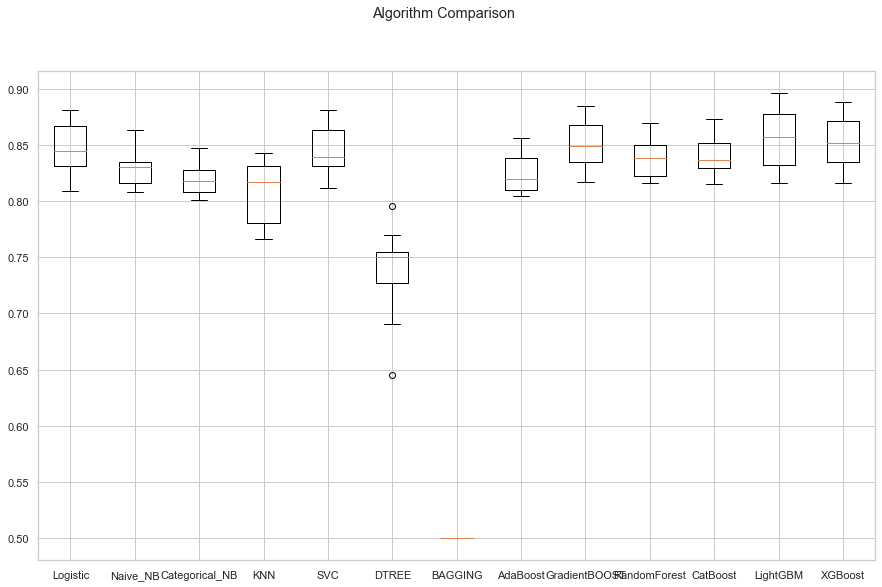

In [428]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### Therefore as for now it is better to go with XGBoost or LightBoost,or Logistic ,Knn for future models , but we still need more information to select the best model  which stands out from other models 

In [510]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
def scores(model,x_train,y_train,x_test,y_test):
    start=time.time()
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    trainscore=model.score(x_train,y_train)
    testscore=model.score(x_test,y_test)
    r2score=r2_score(y_test,yhat)
    mse=mean_squared_error(y_test,yhat)
    rmse=np.sqrt(mean_squared_error(y_test,yhat))
    rmsle=np.sqrt(mean_squared_log_error(y_test,yhat))
    f1_score=metrics.f1_score(y_test,yhat)
    recall_score=metrics.recall_score(y_test,yhat)
    roc_auc=roc_auc_score(y_test,yhat)
    
    scorer={
        "r2":metrics.make_scorer(metrics.r2_score),
        "mse":metrics.make_scorer(metrics.mean_squared_error),
        "msle":metrics.make_scorer(metrics.mean_squared_log_error),
        "roc_auc":metrics.make_scorer(metrics.roc_auc_score)
    }
    
    
    cv=cross_validate(model,x_train,y_train,cv=5,scoring=scorer)
    
    r2_cv=max(cv['test_r2'])
    rmse_cv=max([np.sqrt(i) for i in cv['test_mse']])
    rmsle_cv=max([np.sqrt(i) for i in cv['test_msle']])
    roc_auc_cv=max([i for i in cv['test_roc_auc']])
    
    end=time.time()
    duration=end-start
    return trainscore,testscore,r2score,mse,rmse,rmsle,f1_score,recall_score,roc_auc, r2_cv,rmse_cv, rmsle_cv,roc_auc_cv,duration

best_model={}
for name,model in models:
    for train_ix, test_ix in kfold.split(x,y):
        X_train, X_test = x.iloc[train_ix],x.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    best_model[name]=scores(model,X_train,y_train,X_test,y_test)

0:	learn: 0.6892469	total: 2.98ms	remaining: 295ms
1:	learn: 0.6853206	total: 6.15ms	remaining: 301ms
2:	learn: 0.6816705	total: 9.18ms	remaining: 297ms
3:	learn: 0.6779132	total: 12.2ms	remaining: 294ms
4:	learn: 0.6743649	total: 15.2ms	remaining: 289ms
5:	learn: 0.6707953	total: 18.2ms	remaining: 285ms
6:	learn: 0.6672293	total: 21.2ms	remaining: 282ms
7:	learn: 0.6639117	total: 24.2ms	remaining: 278ms
8:	learn: 0.6606215	total: 27.1ms	remaining: 274ms
9:	learn: 0.6572651	total: 30.1ms	remaining: 271ms
10:	learn: 0.6539922	total: 33.1ms	remaining: 268ms
11:	learn: 0.6509417	total: 36.1ms	remaining: 265ms
12:	learn: 0.6479334	total: 39ms	remaining: 261ms
13:	learn: 0.6449588	total: 41.9ms	remaining: 257ms
14:	learn: 0.6418899	total: 44.9ms	remaining: 254ms
15:	learn: 0.6388361	total: 47.9ms	remaining: 251ms
16:	learn: 0.6358889	total: 50.9ms	remaining: 249ms
17:	learn: 0.6329041	total: 53.9ms	remaining: 245ms
18:	learn: 0.6299939	total: 56.8ms	remaining: 242ms
19:	learn: 0.6272506	tot

1:	learn: 0.6855768	total: 6.99ms	remaining: 342ms
2:	learn: 0.6819361	total: 10.4ms	remaining: 336ms
3:	learn: 0.6783889	total: 13.3ms	remaining: 319ms
4:	learn: 0.6748720	total: 16.4ms	remaining: 312ms
5:	learn: 0.6713573	total: 20ms	remaining: 313ms
6:	learn: 0.6680034	total: 22.9ms	remaining: 304ms
7:	learn: 0.6646652	total: 25.9ms	remaining: 298ms
8:	learn: 0.6614139	total: 28.8ms	remaining: 292ms
9:	learn: 0.6580618	total: 32ms	remaining: 288ms
10:	learn: 0.6548376	total: 35.3ms	remaining: 286ms
11:	learn: 0.6517466	total: 38.5ms	remaining: 282ms
12:	learn: 0.6487575	total: 42ms	remaining: 281ms
13:	learn: 0.6457878	total: 45ms	remaining: 276ms
14:	learn: 0.6427665	total: 48.3ms	remaining: 274ms
15:	learn: 0.6398063	total: 51.2ms	remaining: 269ms
16:	learn: 0.6369437	total: 54.3ms	remaining: 265ms
17:	learn: 0.6340342	total: 57.6ms	remaining: 262ms
18:	learn: 0.6312235	total: 61.1ms	remaining: 261ms
19:	learn: 0.6284709	total: 64.3ms	remaining: 257ms
20:	learn: 0.6259207	total: 6

86:	learn: 0.5130659	total: 500ms	remaining: 74.8ms
87:	learn: 0.5119889	total: 504ms	remaining: 68.8ms
88:	learn: 0.5110272	total: 509ms	remaining: 62.9ms
89:	learn: 0.5100491	total: 514ms	remaining: 57.1ms
90:	learn: 0.5090074	total: 517ms	remaining: 51.2ms
91:	learn: 0.5079759	total: 521ms	remaining: 45.3ms
92:	learn: 0.5069773	total: 536ms	remaining: 40.3ms
93:	learn: 0.5060370	total: 540ms	remaining: 34.5ms
94:	learn: 0.5051682	total: 545ms	remaining: 28.7ms
95:	learn: 0.5042542	total: 549ms	remaining: 22.9ms
96:	learn: 0.5032986	total: 554ms	remaining: 17.1ms
97:	learn: 0.5023696	total: 559ms	remaining: 11.4ms
98:	learn: 0.5014654	total: 563ms	remaining: 5.69ms
99:	learn: 0.5006480	total: 579ms	remaining: 0us
0:	learn: 0.6891786	total: 5.95ms	remaining: 589ms
1:	learn: 0.6852291	total: 10ms	remaining: 490ms
2:	learn: 0.6816801	total: 13.5ms	remaining: 438ms
3:	learn: 0.6779048	total: 16.9ms	remaining: 407ms
4:	learn: 0.6743470	total: 21.6ms	remaining: 411ms
5:	learn: 0.6708086	to

56:	learn: 0.5509658	total: 174ms	remaining: 131ms
57:	learn: 0.5494291	total: 178ms	remaining: 129ms
58:	learn: 0.5479925	total: 182ms	remaining: 126ms
59:	learn: 0.5463899	total: 186ms	remaining: 124ms
60:	learn: 0.5448817	total: 189ms	remaining: 121ms
61:	learn: 0.5434311	total: 193ms	remaining: 118ms
62:	learn: 0.5419401	total: 196ms	remaining: 115ms
63:	learn: 0.5406182	total: 199ms	remaining: 112ms
64:	learn: 0.5392237	total: 202ms	remaining: 109ms
65:	learn: 0.5379489	total: 205ms	remaining: 106ms
66:	learn: 0.5366058	total: 209ms	remaining: 103ms
67:	learn: 0.5352141	total: 212ms	remaining: 99.6ms
68:	learn: 0.5339420	total: 215ms	remaining: 96.5ms
69:	learn: 0.5327002	total: 218ms	remaining: 93.5ms
70:	learn: 0.5314251	total: 221ms	remaining: 90.3ms
71:	learn: 0.5300935	total: 224ms	remaining: 87.2ms
72:	learn: 0.5288197	total: 228ms	remaining: 84.2ms
73:	learn: 0.5276005	total: 231ms	remaining: 81.2ms
74:	learn: 0.5264372	total: 235ms	remaining: 78.3ms
75:	learn: 0.5252114	to

In [511]:
Best=pd.DataFrame(best_model,index=['trainscore','testscore','r2score','mse','rmse','rmsle','f1_score','recall_score','roc_auc','r2_cv','rmse_cv', 'rmsle_cv','roc_auc_cv','duration']).T

#### • Select the final best trained model along with your detailed comments for selecting this model.

In [512]:
plt.figure(figsize=(10,5))
Best.sort_values(by=["roc_auc_cv","duration"],ascending=False).style.background_gradient('magma')

<Figure size 720x360 with 0 Axes>

##### from the above evaluation metrics seems that LightGBM and Logistic regression does really well in all evaluation metrices  more importantly there is no overfitting.Now to conclude with which model goes really well as the  best model.  

## with respect to the duration considered Logistice regression dominates all other models 

## with information considered LightGBM has high roc score and dominates other models

In [435]:
for name,model in models:
    model.fit(X_train_sm,Y_train_sm)
    yhat=model.predict(X_test)
    print(name)
    print(metrics.classification_report(Y_test,yhat))

Logistic
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       517
           1       0.51      0.79      0.62       187

    accuracy                           0.74       704
   macro avg       0.70      0.75      0.71       704
weighted avg       0.80      0.74      0.75       704

Naive_NB
              precision    recall  f1-score   support

           0       0.91      0.66      0.76       517
           1       0.46      0.81      0.59       187

    accuracy                           0.70       704
   macro avg       0.69      0.74      0.68       704
weighted avg       0.79      0.70      0.72       704

Categorical_NB
              precision    recall  f1-score   support

           0       0.91      0.62      0.74       517
           1       0.44      0.82      0.57       187

    accuracy                           0.67       704
   macro avg       0.67      0.72      0.66       704
weighted avg       0.78      0.67      0.

LightGBM
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       517
           1       0.52      0.72      0.60       187

    accuracy                           0.75       704
   macro avg       0.70      0.74      0.71       704
weighted avg       0.79      0.75      0.76       704

[10:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       517
           1       0.51      0.73      0.60       187

    accuracy                           0.74       704
   macro avg       0.70      0.74      0.71       704
weighted avg       0.79      0.74      0.76       704



#### all models have imnproved recall score  compared to the general modeling which is more important interms of finding the Churn

In [439]:
best_index=Best.index
print(best_index)

Index(['Logistic', 'Naive_NB', 'Categorical_NB', 'KNN', 'SVC', 'DTREE',
       'BAGGING', 'AdaBoost', 'GradientBOOST', 'RandomForest', 'CatBoost',
       'LightGBM', 'XGBoost'],
      dtype='object')


#### find the duration take by each model to predicting is one of the important selection cretria in the industry .For example SVC has predicted really good but since the models takes huge time to process we tend to drop them from selecting the best model

Text(0.5, 1.0, 'DURATION')

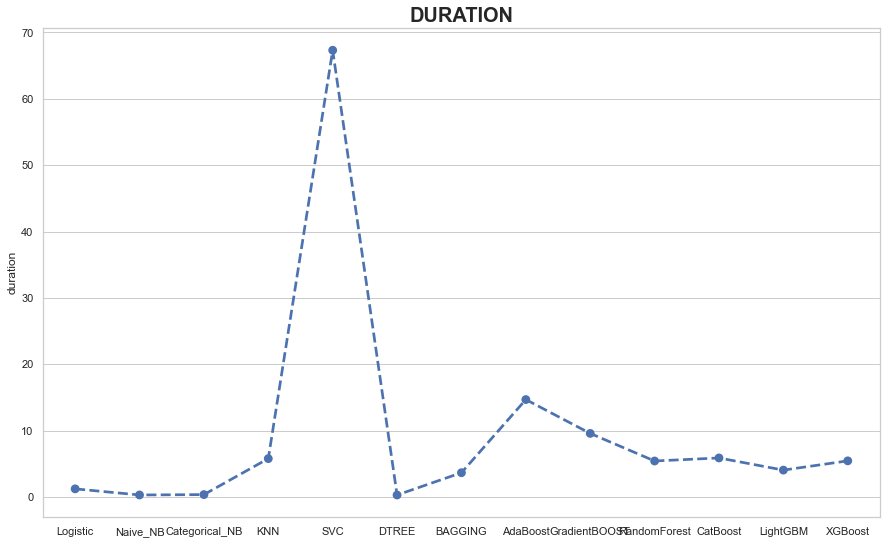

In [446]:
sns.pointplot(data=Best,x=best_index,y="duration",linestyles='--').set_title('DURATION',fontweight="bold",fontsize=20)

# Best models are Either Logistic or LightGBM

In [450]:
lGBM=LGBMClassifier(max_depth= 3, n_estimators= 300, num_leaves= 50, reg_alpha= 0.0, reg_lambda= 0.0, subsample_freq= 20)
log_reg=LogisticRegression(C= 100, class_weight= 'balanced',penalty= 'l2', solver='newton-cg')

Best auc curve : 0.8145098728782879
 Best Threshold:  0.4557757083069046


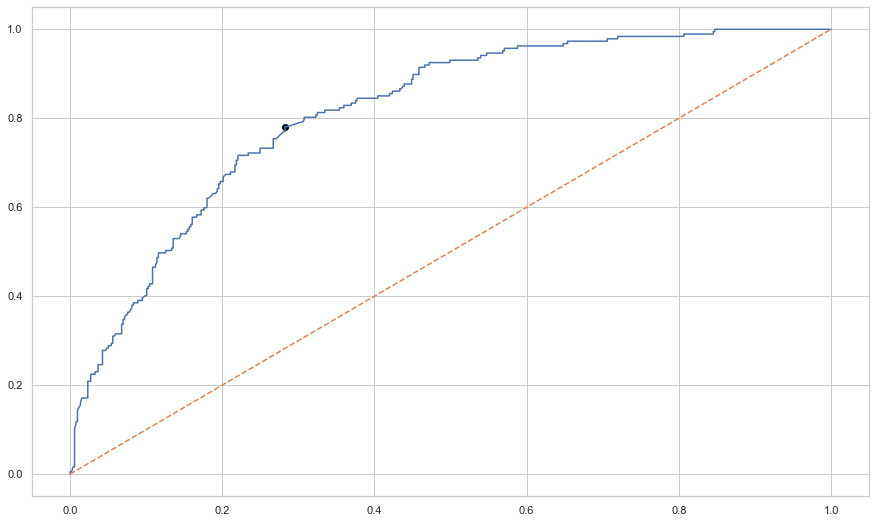

In [456]:
lgb=lGBM.fit(X_train_sm,Y_train_sm).predict_proba(X_test)
FPR,TPR,Threshold=roc_curve(Y_test,lgb[:,1])
print('Best auc curve :',auc(FPR,TPR))
gmean=np.sqrt(TPR*(1-FPR))
mx=np.argmax(gmean)
print(" Best Threshold: ",Threshold[mx])
plt.plot(FPR,TPR)
plt.plot([0,1],linestyle="--")
plt.scatter(FPR[mx],TPR[mx],color="black")

<AxesSubplot:>

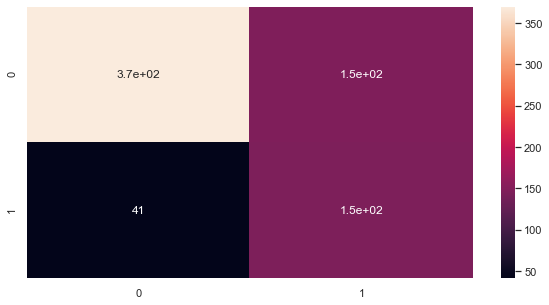

In [485]:
plt.figure(figsize=(10,5))
from sklearn.preprocessing import binarize
lgb=lGBM.fit(X_train_sm,Y_train_sm).predict_proba(X_test)
yhat_prob=lgb[:,1]
yhat=binarize([yhat_prob], 0.45)[0]
sns.heatmap(confusion_matrix(Y_test,yhat),annot=True)

In [466]:
print(metrics.classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       517
           1       0.50      0.78      0.61       187

    accuracy                           0.73       704
   macro avg       0.70      0.75      0.70       704
weighted avg       0.79      0.73      0.75       704



Best auc curve : 0.8110965152721894
 Best Threshold:  0.5027391674151396


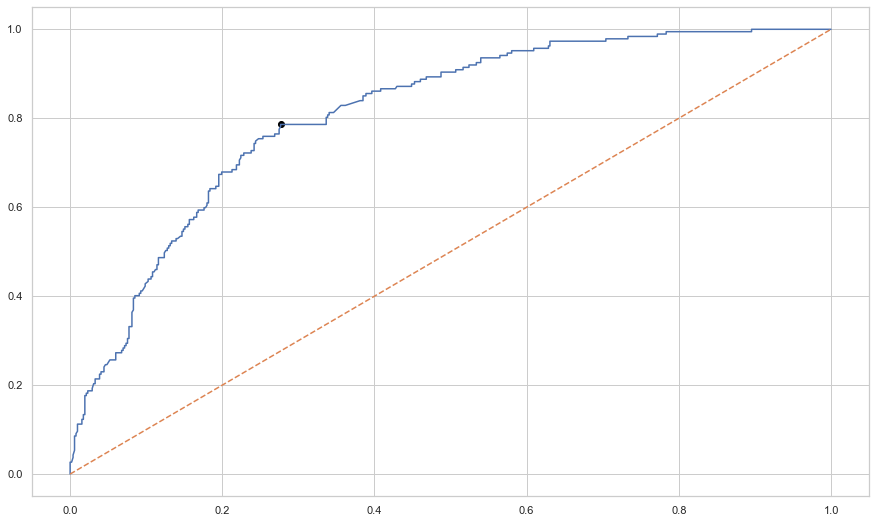

In [487]:
log=log_reg.fit(X_train_sm,Y_train_sm).predict_proba(X_test)
FPR,TPR,Threshold=roc_curve(Y_test,log[:,1])
print('Best auc curve :',auc(FPR,TPR))
gmean=np.sqrt(TPR*(1-FPR))
mx=np.argmax(gmean)
print(" Best Threshold: ",Threshold[mx])
plt.plot(FPR,TPR)
plt.plot([0,1],linestyle="--")
plt.scatter(FPR[mx],TPR[mx],color="black")

<AxesSubplot:>

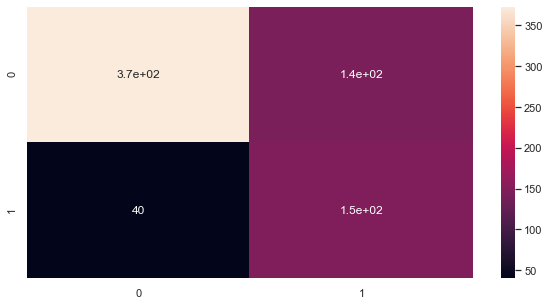

In [488]:
plt.figure(figsize=(10,5))
log=log_reg.fit(X_train_sm,Y_train_sm).predict_proba(X_test)
yhat_prob=log[:,1]
yhat=binarize([yhat_prob], 0.50)[0]
sns.heatmap(confusion_matrix(Y_test,yhat),annot=True)

In [489]:
print(metrics.classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       517
           1       0.51      0.79      0.62       187

    accuracy                           0.74       704
   macro avg       0.70      0.75      0.71       704
weighted avg       0.80      0.74      0.75       704



#### Conclusion and improvisation:

In [ ]:
def scores(model,x_train,y_train,x_test,y_test):
    start=time.time()
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    trainscore=model.score(x_train,y_train)
    testscore=model.score(x_test,y_test)
    r2score=r2_score(y_test,yhat)
    mse=mean_squared_error(y_test,yhat)
    rmse=np.sqrt(mean_squared_error(y_test,yhat))
    rmsle=np.sqrt(mean_squared_log_error(y_test,yhat))
    f1_score=metrics.f1_score(y_test,yhat)
    recall_score=metrics.recall_score(y_test,yhat)
    roc_auc=roc_auc_score(y_test,yhat)
    
    scorer={
        "r2":metrics.make_scorer(metrics.r2_score),
        "mse":metrics.make_scorer(metrics.mean_squared_error),
        "msle":metrics.make_scorer(metrics.mean_squared_log_error),
        "roc_auc":metrics.make_scorer(metrics.roc_auc_score)
    }
    
    
    cv=cross_validate(model,x_train,y_train,cv=kfold,scoring=scorer)
    
    r2_cv=max(cv['test_r2'])
    rmse_cv=max([np.sqrt(i) for i in cv['test_mse']])
    rmsle_cv=max([np.sqrt(i) for i in cv['test_msle']])
    roc_auc_cv=max([i for i in cv['test_roc_auc']])
    
    end=time.time()
    duration=end-start
    return trainscore,testscore,r2score,mse,rmse,rmsle,f1_score,recall_score,roc_auc, r2_cv,rmse_cv, rmsle_cv,roc_auc_cv,duration

best_model={}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
for name,model in models:
    for train_ix, test_ix in kfold.split(x,y):
        X_train, X_test = x.iloc[train_ix],x.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    best_model[name]=scores(model,X_train,y_train,X_test,y_test)

0:	learn: 0.6892469	total: 3.5ms	remaining: 347ms
1:	learn: 0.6853206	total: 6.9ms	remaining: 338ms
2:	learn: 0.6816705	total: 10.5ms	remaining: 340ms
3:	learn: 0.6779132	total: 14.4ms	remaining: 345ms
4:	learn: 0.6743649	total: 18.8ms	remaining: 356ms
5:	learn: 0.6707953	total: 24.4ms	remaining: 382ms
6:	learn: 0.6672293	total: 29.9ms	remaining: 397ms
7:	learn: 0.6639117	total: 35.1ms	remaining: 404ms
8:	learn: 0.6606215	total: 40.7ms	remaining: 412ms
9:	learn: 0.6572651	total: 45.5ms	remaining: 410ms
10:	learn: 0.6539922	total: 49.7ms	remaining: 402ms
11:	learn: 0.6509417	total: 53.4ms	remaining: 392ms
12:	learn: 0.6479334	total: 57ms	remaining: 381ms
13:	learn: 0.6449588	total: 61ms	remaining: 374ms
14:	learn: 0.6418899	total: 65.2ms	remaining: 369ms
15:	learn: 0.6388361	total: 68.7ms	remaining: 361ms
16:	learn: 0.6358889	total: 72.8ms	remaining: 355ms
17:	learn: 0.6329041	total: 76.5ms	remaining: 348ms
18:	learn: 0.6299939	total: 80.3ms	remaining: 342ms
19:	learn: 0.6272506	total: 

62:	learn: 0.5424485	total: 194ms	remaining: 114ms
63:	learn: 0.5410524	total: 198ms	remaining: 111ms
64:	learn: 0.5396292	total: 201ms	remaining: 108ms
65:	learn: 0.5382734	total: 205ms	remaining: 105ms
66:	learn: 0.5369535	total: 208ms	remaining: 102ms
67:	learn: 0.5356002	total: 211ms	remaining: 99.4ms
68:	learn: 0.5343449	total: 215ms	remaining: 96.4ms
69:	learn: 0.5331268	total: 218ms	remaining: 93.5ms
70:	learn: 0.5318739	total: 222ms	remaining: 90.5ms
71:	learn: 0.5305693	total: 225ms	remaining: 87.4ms
72:	learn: 0.5293226	total: 228ms	remaining: 84.3ms
73:	learn: 0.5281305	total: 231ms	remaining: 81.2ms
74:	learn: 0.5269713	total: 234ms	remaining: 78.1ms
75:	learn: 0.5257660	total: 238ms	remaining: 75.1ms
76:	learn: 0.5245429	total: 241ms	remaining: 72ms
77:	learn: 0.5234015	total: 244ms	remaining: 68.9ms
78:	learn: 0.5224719	total: 248ms	remaining: 65.8ms
79:	learn: 0.5212865	total: 251ms	remaining: 62.7ms
80:	learn: 0.5202269	total: 254ms	remaining: 59.6ms
81:	learn: 0.519183

33:	learn: 0.5940785	total: 188ms	remaining: 364ms
34:	learn: 0.5918785	total: 192ms	remaining: 357ms
35:	learn: 0.5897450	total: 206ms	remaining: 366ms
36:	learn: 0.5876873	total: 210ms	remaining: 358ms
37:	learn: 0.5855780	total: 215ms	remaining: 350ms
38:	learn: 0.5835353	total: 219ms	remaining: 343ms
39:	learn: 0.5816142	total: 224ms	remaining: 336ms
40:	learn: 0.5797245	total: 230ms	remaining: 331ms
41:	learn: 0.5778483	total: 235ms	remaining: 324ms
42:	learn: 0.5758537	total: 240ms	remaining: 318ms
43:	learn: 0.5738897	total: 244ms	remaining: 311ms
44:	learn: 0.5719586	total: 248ms	remaining: 303ms
45:	learn: 0.5701409	total: 253ms	remaining: 297ms
46:	learn: 0.5683346	total: 257ms	remaining: 290ms
47:	learn: 0.5665252	total: 277ms	remaining: 300ms
48:	learn: 0.5648017	total: 281ms	remaining: 293ms
49:	learn: 0.5630713	total: 286ms	remaining: 286ms
50:	learn: 0.5613477	total: 290ms	remaining: 279ms
51:	learn: 0.5596988	total: 295ms	remaining: 272ms
52:	learn: 0.5580764	total: 300

22:	learn: 0.6205311	total: 69.7ms	remaining: 233ms
23:	learn: 0.6181412	total: 73.3ms	remaining: 232ms
24:	learn: 0.6155120	total: 76.5ms	remaining: 230ms
25:	learn: 0.6130866	total: 79.8ms	remaining: 227ms
26:	learn: 0.6106128	total: 82.9ms	remaining: 224ms
27:	learn: 0.6083019	total: 86.3ms	remaining: 222ms
28:	learn: 0.6059872	total: 89.5ms	remaining: 219ms
29:	learn: 0.6038075	total: 92.9ms	remaining: 217ms
30:	learn: 0.6015435	total: 96ms	remaining: 214ms
31:	learn: 0.5994017	total: 98.8ms	remaining: 210ms
32:	learn: 0.5971550	total: 102ms	remaining: 207ms
33:	learn: 0.5948929	total: 105ms	remaining: 204ms
34:	learn: 0.5927098	total: 108ms	remaining: 201ms
35:	learn: 0.5905882	total: 111ms	remaining: 198ms
36:	learn: 0.5885108	total: 115ms	remaining: 196ms
37:	learn: 0.5864295	total: 118ms	remaining: 193ms
38:	learn: 0.5843664	total: 121ms	remaining: 190ms
39:	learn: 0.5824571	total: 125ms	remaining: 187ms
40:	learn: 0.5805814	total: 128ms	remaining: 184ms
41:	learn: 0.5785529	to

5:	learn: 0.6710613	total: 19ms	remaining: 298ms
6:	learn: 0.6676965	total: 22.3ms	remaining: 296ms
7:	learn: 0.6643745	total: 25.3ms	remaining: 291ms
8:	learn: 0.6610976	total: 28.4ms	remaining: 287ms
9:	learn: 0.6577587	total: 31.5ms	remaining: 283ms
10:	learn: 0.6544911	total: 34.5ms	remaining: 279ms
11:	learn: 0.6514479	total: 37.8ms	remaining: 277ms
12:	learn: 0.6484396	total: 40.9ms	remaining: 274ms
13:	learn: 0.6454580	total: 44ms	remaining: 270ms
14:	learn: 0.6423959	total: 47.1ms	remaining: 267ms
15:	learn: 0.6393402	total: 50.5ms	remaining: 265ms
16:	learn: 0.6364015	total: 53.6ms	remaining: 262ms
17:	learn: 0.6334976	total: 56.9ms	remaining: 259ms
18:	learn: 0.6305873	total: 59.9ms	remaining: 255ms
19:	learn: 0.6278388	total: 64ms	remaining: 256ms
20:	learn: 0.6250816	total: 67.4ms	remaining: 254ms
21:	learn: 0.6223934	total: 70.4ms	remaining: 249ms
22:	learn: 0.6197437	total: 73.2ms	remaining: 245ms
23:	learn: 0.6172384	total: 76.1ms	remaining: 241ms
24:	learn: 0.6145993	to

0:	learn: 0.6893711	total: 4.46ms	remaining: 442ms
1:	learn: 0.6854765	total: 8.83ms	remaining: 433ms
2:	learn: 0.6818459	total: 13.3ms	remaining: 430ms
3:	learn: 0.6781136	total: 17.8ms	remaining: 426ms
4:	learn: 0.6746024	total: 22ms	remaining: 418ms
5:	learn: 0.6711236	total: 26.4ms	remaining: 414ms
6:	learn: 0.6675673	total: 39ms	remaining: 518ms
7:	learn: 0.6642725	total: 43.6ms	remaining: 502ms
8:	learn: 0.6610183	total: 48.1ms	remaining: 487ms
9:	learn: 0.6576964	total: 53.1ms	remaining: 478ms
10:	learn: 0.6544275	total: 57.4ms	remaining: 465ms
11:	learn: 0.6512095	total: 61.6ms	remaining: 452ms
12:	learn: 0.6482183	total: 72.1ms	remaining: 482ms
13:	learn: 0.6452317	total: 76.4ms	remaining: 469ms
14:	learn: 0.6421723	total: 82.2ms	remaining: 466ms
15:	learn: 0.6392241	total: 88.4ms	remaining: 464ms
16:	learn: 0.6362962	total: 93.5ms	remaining: 457ms
17:	learn: 0.6334166	total: 99.8ms	remaining: 454ms
18:	learn: 0.6305853	total: 108ms	remaining: 460ms
19:	learn: 0.6278411	total:

88:	learn: 0.5086736	total: 270ms	remaining: 33.4ms
89:	learn: 0.5076879	total: 274ms	remaining: 30.4ms
90:	learn: 0.5066462	total: 277ms	remaining: 27.4ms
91:	learn: 0.5056133	total: 281ms	remaining: 24.4ms
92:	learn: 0.5046078	total: 284ms	remaining: 21.4ms
93:	learn: 0.5036624	total: 287ms	remaining: 18.3ms
94:	learn: 0.5027797	total: 291ms	remaining: 15.3ms
95:	learn: 0.5018505	total: 294ms	remaining: 12.3ms
96:	learn: 0.5008864	total: 297ms	remaining: 9.19ms
97:	learn: 0.4999517	total: 301ms	remaining: 6.14ms
98:	learn: 0.4990486	total: 304ms	remaining: 3.07ms
99:	learn: 0.4982212	total: 307ms	remaining: 0us
[22:45:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

In [ ]:
Best=pd.DataFrame(best_model,index=['trainscore','testscore','r2score','mse','rmse','rmsle','f1_score','recall_score','roc_auc','r2_cv','rmse_cv', 'rmsle_cv','roc_auc_cv','duration']).T

In [ ]:
Best.style.background_gradient('coolwarm')